# Assignment 3

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## SECTION 1 : Preparations

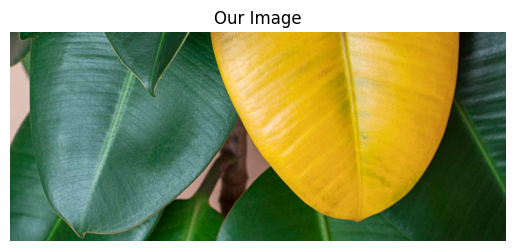

In [17]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

img_str = """
/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAAjAAD/4QMsaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA2LjAtYzAwMiA3OS4xNjQzNTIsIDIwMjAvMDEvMzAtMTU6NTA6MzggICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBob3Rvc2hvcCAyMS4xIChXaW5kb3dzKSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo1NDU0OTQ5Mjg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCIgeG1wTU06RG9jdW1lbnRJRD0ieG1wLmRpZDo1NDU0OTQ5Mzg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCI+IDx4bXBNTTpEZXJpdmVkRnJvbSBzdFJlZjppbnN0YW5jZUlEPSJ4bXAuaWlkOjU0NTQ5NDkwODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjU0NTQ5NDkxODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIi8+IDwvcmRmOkRlc2NyaXB0aW9uPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiA8P3hwYWNrZXQgZW5kPSJyIj8+/+4ADkFkb2JlAGTAAAAAAf/bAIQADgoKCgsKDgsLDhQNCw0UGBIODhIYGxYWFxYWGxoUFxcXFxQaGh8gIyAfGikpLS0pKT07Ozs9QEBAQEBAQEBAQAEPDQ0PEQ8SEBASFA4RDhQXEhQUEhchFxcZFxchKh4aGhoaHiomKSMjIykmLy8qKi8vOjo4OjpAQEBAQEBAQEBA/8AAEQgB4AR0AwEiAAIRAQMRAf/EAKUAAAMBAQEBAQAAAAAAAAAAAAECAwAEBQYHAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUGEAABAwMDAgQFAQcEAQIGAwABABECITEDQVESYQRxgSITkaGxMgVCwdHhUiMUBvDxcjNikhWCwkMkJTWyUzQRAQEAAgECBAUDAwMEAgMBAAABEQIhMQNBURIEYXGBIjKRUhOhsUIjMwXB0WJy4YLwkkMU/9oADAMBAAIRAxEAPwD54BMImyaMU0brNEi8AJdpmhKoA5DpReGCCbCpZl72EchOAqZwkB4tRfPhxNjQi4KVZe4n434OjGYcDVpKcxIFuTx0SREieIqXei6sfZZpR5SDdDQn4peqMddLekc5MpFzU2Cf2ZCsrGw1Vx2neCX3Y8Y0BLlkRxjJsrZWvxo/mpt+bT+PE666/NOJ4GgcjRYnkXKbJKEj6IcBrV1gGYkOqjO3nrnBW3Q4km1FcCL2bxTgGQ9NBZVIM5S9uQYGjo+wRWlVUYJSYn4phjOqeD5RGNtQdlWGISqSycYS/RXhggSAC3inICxhjgfUXjsqR9iZegCP9uJGhoie04gGBd7BVDP/APbggcmG66Iy7cP8iox7QgPIVOisMAIacS/RVAfHLtx9zJ27bI9EkMECW/V1TDA0WEa7jRMMIdsSQPtA1RMMUPtI40SmLXCsY4ZAX8WQCyh29wWlsFuMSKEEWFfqiMOAiknJqQFj2cB9mQE3MTRAHHCMZAxNfivI/K9qcWfnGkcvqBG/6gvV/sZxrGTEB3BUu47XNmwShIuRWHSSneZmcdDnk8MwD0oAsxAcDwTwBiT7lCNOoQ5GTtQaMo8BUJes1d0wjECzyTmIBcAV3ScWLiuzogbkSWYAIswoUSTJokcWDUCHOMA1zvomGcx1qlM5SDW6IExkXkW6ocATQuEhGBAO+6PI7PWjo8LaDdMPbB16JmnEObKwaN9EQZaUCFyzIAFpM1ETFrFZy/pteiDgOTQIBSQC92+CTBGWXMHqHRnOJPpr4qnZgCRmaCIJWfcvCaHfZnmYg2ouEycuqZvvJf1EqBRpOBr0Y1KDuERdhqFo2VKYRo61ujJifSClYylxFykeHb+J7KXd91GnoFZHoFf/ACPvRlyx7TGWxYbtuusGP4n8Ych/78o9O9V817kjIymeRlUv1US5ufLou/brjxqdP91iFXjEig8tUnE6aKmeSVBponGQkeqv1RAgfuuNkDBjQu+yDyaIFxUfNer/AI7MjvZDSUD8l5IEo1XofhcvH8nhEi3ImPxCy70z2t5/41ft7ju6X/y/u+wjAv4p+I80cYVREC68nW5exQgBx6qkPUCTYJIBz0XTCMYlrUqFv25n5M9rgccWI3ayqZAl7AKEpsf26sl5uCHd9ld2knBTlczgYSH6jUpefIAMx3vdCOORiG8wnjChFQ31We12pzED2yGpRPEB+iInFiNNehU6yk8aFTxOnJ9TcgKboCUiwcsaB1hF2lZkwaosRZTcgpg1SgY1v5pwafNJLQHdZ9zGDmSl/JAGtNEzHyREWtqua5qitfcotpomIcMLpbFK8BnDIGjFZkPDzU7Xg8Ca+GqF7WRAdayi2mVg9dVn80DfotZAYOyxWJAH7FhboigHWvdEhkoIKAzV+iyDraoAEslkQiSpTLvqqkIJyDBSLmqYQJL/ABTcAB1V9C6piOp+KB3sE5f/AHSSj5n5JwYPjIMSLOEe8JlFmvEJYNH1SurZYPjEjqF1e2v27z5VG3GA/HiLRbzZe1Anj91914f44tK9HXvwgJQ6stexc3eeVRv1gDIQwk3wW5tUs6M8T1FxdKcRHhqFvZsnIksxISGUbChQkJUcEBYwJP0UbXbnEXKxIIYnogGIb5IES2SEl6hY7dyzrFRRw3mklqWokMiFvcNjqs73Nbx0PAe2H1SmJtdMZjUIiUaLOzW9KrlIirpCAA9laTFDgCsdtDlSqh9U7B0CGKylNN2WdMRqgwVymzokulstXVGAZlmSkkIci7J4MSAyVtUX81jIGicImqU3ZPdA1VGnIVSGisQ6nKPzVSglVtVmPkt4qgzqU7/RUNqKZ6p6lUsv2lfn/dF+5yn/AMz9V+gZvsPgV+fZy+fJ/wA5fVep7D/L6OX3XTX5lFOqKATAOu5xmhVduKBYEBcsI7Ltw0DEqomunFEarpjGQIOhUISiqwybfBWiqEkOicwMWKSXImyFAG1QKYSAoLFUExMcWqkiAQHCvjhG9k+SIxAayX2agmyrKVWC0QTGttEsFR4x4Nosk6Osgk08IusyeIZYuk8XiRKNCKqWbs+xyzOaUZQnKsoxZiqkUCWVAiyUrJjmFgMOKJ9rGIf+V5fEqOWZJHVUkWiVz8nmB1Skk6I2vgbuf+0EUAYFlzSrTUq2Yn3JV1soN6m1U3q59utMImNTXonAdvogXMWNVWECz6BVEBjjYrphxYyJ9Mfmeil6RTogZuwiKDROHOFfeJHEC+pTAgCtSoet2FDsqxBat05TyrGLkGzK4MRduq5hE7sCsITNAabqsm6xlxCkiKq+PNiABcPZcWHs45HlKbNYLoh28WqTRVLQ64dx215FzZlv73DGRLlzQFch7Z/UCQ1kPZBcEF083yDsHddvwchzeyI7zDEca112XHHDJ9W6rHEHF3F0ZodZ7nAWYsWRh3GFuIPqFnsuWOKFARXdOIxDkBjo6M0OiOftgGcAph3GORIJHE6qAxYshYvGRQn2kRJonp0TzQ6RmiJUYwYsHTiUTUkAUdrLhPbydwQ1iknjlEsQSBUMjIS/M9rGOSOfHXHP720kP3rijwMSS+wAXrY/WDjyh4TDSfTqvIyQy4M+THIMYlj4brLpcfoq8zLe5AHj9z36LNilVuJ20QEKHUlEQIpYHVNKWTK44woPmVOUJEP8gnywL0N0kYyd5E0SMvtnxVoxEQ1kY0sL6rEeaeBQiA9SmAP8rvqj/TAZiNkDKQI4miAakb6LcgbB+tkgBd9UXY1LSu26YjESf1Gp0CQxraqJNyaFJIk1JSMkwxaVtVeLY+2JP6i3koCDzAkWa6r3tOMBaIsst+bIi9XHkl5v8VKVE5rX4JJF1U6Kk4Ct0QzugjTRBxiV6n4TsvfzHNk/68dSvNxwllyRxxDkle53k/8A27sY9th/7cg9ZU7XwnivWeN6R5v5nvT33dGMD/TxUgNCvLkGJf5K0of+pK2khXdPGJhFttykCYl4lUBjkIf0y3QlDjUCm6UgCoQRpQPLoVuJCeGRwIny3TmAYG8el0FlEbgqvbZDi7rDkN4zifmlkKgxDHRasfuFRYpWZlnmeu2LL5V+gwfSiqIkkPbVcvZZPd7fFlBfnCJ+S7o/7rw9My3W/wCNw923iWeLRaNWSyymThmNk0hYDxTY8YBK31t6RnsnCE5EuGCtjw0oPFUhD1Bh5FXAAiNlc1ninNbg2wOyJgxNGcVbdDlX9yI5Euf4qrZ0g5TOEEk+YC3AafFWHoAFnSzFf+V1nddZMqmUrlgaLAb6IkjkRrulDs6w23ORpXca0KVnfpoqM9RZYROijbXKih3dk1LajRElwGvYpJbvVKya/EC7ONrFTIYdUXMn0R4uPD4rPb7uhpsFtETTw3QFmWFwoTRK29USaIO5UcgDRC4Y2TNugAP4KhlmCBKJZzVY2pbRL5kmSf4oCJJqjIaop5NiAkkXKc1ogIpz4hJpENoj7dKqjhAp58gQhlOScpT8AqgTOyEqCtTsmlemqViC481WCsCIPIE1Og2XaYmWIwJcCxXJG4Juu2DGJAq4db+2v+p6f3TDPdydt6cpGjr3sBPESegpVeHjaOcjey9jtyeC09ttZ3d5Ub9I6uTUuRUIgPpdT5AVd3sniSSK/Fd0vwRj4txEhsVPgSHJY7qjEmqzgaWRcXrDiJifjqllFz9Fd3FqdUhl+5Y7zXzXHPKAZSljAK7GiSUvELDftS+XKpXFLGQKeKmYm67ZY6MfJTlj1Zcu/Yxczhc2crkdETMmipKJ2SGPxWF9U4uVcByKxkCgYgIMbhHUCWWSkoEpyGYhBg6HPRDk56JzIHRZgVjILOCHTMjVosU7BKAqlBbWWFkzOh4p5BCSCgS6Yxq6SVEwDJSgaJTJXIBNUhoapuRF0k6lVCqOd+JbZfn2X/un/wAj9V+hZvsl4Ffn065Z/wDI/Ven7Dpt9HJ7rpr9QAqycRCUGqcBwu6OSqQLGi6Mbmuq58cXXZhYBtVUTejpxQcB10wxRjJyo4yFZyz3VxNUM4g7up5YAlwhK1FnoxQR4AyAGgTPVh5pMeRmGivHGZAyCZFcAIxkZR4vXRaOKRLbK2Lty/UI5JP2j5rLp4VtVlkYJy8U0QgAnjRYOrDSUslqp5lc+SeiEbXgk5kUUsbnNHxWlKpVu37eRicpoAlbIy5tSzVyk/FJIeoHdGQeZKQVlQ0S8WG1VBAoBXVUjINvE3Uxd/mqxgWVQCwagfxTwLWDN81hL4owMqsmDAEzJ1KeIu4S8TypQaJzFogpmaIFBpurw9oCvkyhGNKFYZBEsRbVOU3fhy9vEEGPmnOaN4hw6hhyCUDEQof1KgqwFCFcob+4ahiW+aw7iDfZfdEg3NQEOD1LM1AmGn3GnG1ilOVxayxjKjs3RAj9JFrFIFGfeN9RoUpzRIaUZPYlV4gkClbFaWNrgHxQAx9xhiQauLFXxd3inyJN6F1ERgTWDUoQsccGqK7p8h0CeGRLMzLCGIkgEea5zCIL1r0WeNK1dGQ6JYYEvYs1Fz/k+054BniXyYYtNv1Q/gqc45CwpILY+US7uLGJLgjUJb65nHWdD1vheleLDKbAP1TmEjU33R73tz2ndOK4Z+rHs23kgCZ0u9Tss9bmCzFRlj613SxiZF6ll18QGEvV0CnllGJbHTdPBEMQOg2QDgOzbIAB7uUeE29IfxTDMLmqYRDP5oAZR9wdkSbAiiDgFyHJY7BLxBFqqkpRBO2iSU/ADZBl4gXBOrJZFhZhsi8jV0kwwfU2U0qbBESzB7BJ3WQGU21LDwVsD4sU5tVmHmuLNIlgTUrOc7FOqRLRSsLJpkW0S00VrAhvBbR1iunsO1PddxGAHpuT0StxMn14ej+I7aGHFLvc1BEeh915/dZsufNLNImth0Xpfks+OQj2mEgQxXG5Xm+2W2GynWf5XxLe/wCM8ExCMzWh1CnOMokx0GqpLGLgpBIfqDvrsqRlFiDSoRAEn0lsrEG8Pj0UZQYghq7IKgwFDfTogDMScUTxY0NExxMxDkGxSwDCZkGADpZRl+qpW4SBd/IKgnGQAlQhBvqv8eynJ+Nxg3xmUD5FwvbxxoPmvmP8YygHPgelMkf/AOJX0wJagXie4n8fuO5PC31T6vZ9vt6+xpfhj9OD8fUBen7VeERfZSiDSRvb4pwJHVV29p1VtFOUatQsyaETK/8AoJYY3k5oArxIjWi6Neeb0QAxhqaVRMaEahG/QLUFrp3AJQlyhKvqsQjKnmgIk3oNAsdr4KiXE7XTRjpqqsLNogzElqMs/QeSgM26BZzoiSwAsUsn1StxODKWFr6JWehTNrrogCD4rDa56qjAB+u6D7fBEuS6Qm4Cz22wZZVrZDREOiACC2lljJb4GVhqs7HoiwZzdJIhwCnNb1LJiAxSBnIdAyLbN82S8mPjdOzBZHjqVnPlolMj4unuoOFDuyLdVhdYmrCyZjog61GolL6XTwGKU1Ta1SyTgKSkJqmJZIbq4GJHipyLnw0WkfJZtkytblWlyu3tjYHWhXCLtqu7tR8rq+1fT3NL8We3SpZRxyiTasy9fsyBjD6ryu4H9SQ2K7+0keIF1vrZr7jbPVNn2x3oxFqeSiJk3imOQWs+q7ZvGeFHqaUZAmx1SBtJVOyabM2m6LtwcajkJDEH96x3Zlg3kotl6qJUFAuCmILusbLGzqpMk+PRD9Nbp2HydAh3+Siy+akyBJlMgV6XVTEhJKLFYdzXxsOImFVPXorOlIAai5rJ4VXJCPNIYlUICxANUpcGgywBVDFZleTTPRAlMQg3wVQAJdUQUhDFYungKBvisUh0WEkYNteiSYdOapbqoEyN0nAMwVSEpAZVKEjZJIuWVCCHUrnqFpCqfcFsct2K/PjWcjuT9V993kgO3yH/AMT9F8CLkr0/Yz7dvo5Pdf4/U0QnFPFTBTP8V2xx1bGQCxsuvGQD0XFjBJXoYcBoVUKrRJP2qsebWVu3wb/Bdke3gKhXNUVxY8c520TjAQa3XXxxxL2KSc+lU8AsMMRe6sYCEHBqbhTxguORZGeXFGQcumkRdW9zjGlyuPJ3MRWKme5lIk6BL1QV38+vqWXme/N3WS9ROsXTOLoRopTnXosXVbhss2FFx5JF1eUgXdCHbnJJ5UilbJyxuaTtsByzc0ivSzARwSjGwDJYQjCPGKOYNhks+btmotxPTPrXlEXSQrJgPimf1HrZNDGX2VsdusPEB2NhsnJNtBZKRo/kmBi4J+CoGjEE7A6pwGskjJx6aMmMpaJw1IuXLp+JLPbRSBk7WCpEHU+CYXMREXFqqvb4sUm9wuFy+5F2uBddmEQkOZLMKMnDXmaNCDQFlGUpRNgSrwyGQY0Gic48bRoHN1YcUs2QNQbpPfm2jrulhLfbTRSl28tYOjFDjPc5DqARoyH9zkDOa7rsOCIFYgN9xUj2xl6scROOhslihz/3UjXk5F6Lf3eQhnB8VX+1yEfaB0KxxzB4e0KXKOQke7ygikUB3+kocgdQVY4QQ5xP1CWXaYyCY4yCLxv8EcgI/kIagjon/vMBFy4rZRl2WM19UZBJHtpAmhdtkZodWPuMMg0ZAS60TDPjk0eQrdcBwzjKhWMJE2CM0PSyQxd3il2spDmfVikTaW3mvJjyxPjmOMokiQPTRV9uZLtUK/cQPdYfdEW7rCB7o/niP1jqNVntxfV4XqqczHjE8YiQ7fFJLHycxQx5TwZqnVWjEM8j4hX1S45AQprusJt52KtMYTSAL7qEoQFQXKQOCbk/bqUnuEAsXCmSDd0WjoKIyo3OLeCwjEh7aIcaUPigzDdBZ5FiCwKlmJdurOqAGl62KUB8oHkp2vAvRTODi7eEZC7nxXBIgy/YuzvpynkMTThQeS4gK9VOvmIWVTSj6JQGTSBc6EaJE1CAZFhcr6DBjH47seZpnyinQLh/EdmMkz3GUf0sda7q3d55ZsplL/rtEbBT+Vx4Tqr8ZnxvRxyEiSR6iandYF6SoQLq3oL8TbTVQyPKoDS6WV4ZAYGNZBIYcg4DEqgmQz1GxR4iYeNtkEg0oitBr1RgIzBY8ZNY7qntk0LkVSe1OBBZw9WQXKfA2N+tEIylEtcD4Kx4k+qj6pCCA0Q8d0ibhKVi51ScNNk0ZTiSQB11TRyxkXyBtv4oOdHX+E7j+3/JYhL7cj4yf+Vj8V9zjAP7l+eu0xOF4EENuNl972eaObBjzi2SIl8QvI/5TT079vueF+2vT/4/fOm2n7b6v1dgDggDqPJUgxZlogJoBj41WevGHVT8Xd9LKhiN6WQMgHB6FAzGnwXTnWROB3G10spOWFVqyNmDqog4DhlPO3QdCCJd28GTcCKtQ6KkYhmAqViRBquyr0STkZSYA7gJJEGllpO9KgoxiDU3CyubcSGThKXgkmDuryl6FEuxfZZdzE4l6qifTRY2RJpSh1SSr0C5NtvLmrB3H1ZZk/Gj2RYMOl0TtZ/IskEaeCBYdNyiTsklI3OtnV4kgI5JpTqUkqXunID0Hmgalljttj5gjuK6LcHqnEd0Q37lnk4XiB/FDkzpykaqcMEC+tU5CxAZPJlHh5rFkOSEifijJZAyfxQLJGq+1kSXFfgqK0CQpmxCcpW3TkGCgeRSmWgRk5sgIVVRN+DAHku7tS0hHc2XLAMeq6cEmmBr1St+6XysKzg/fADIW/UHfqFbsiTEEBJ3EOceWtkfx8zFhZ11bf7+m37kf4u71Atd0XJ3dVPqb9qVuEnXd6WWSHiWLV1W8mTFpFmLLUq5U3VcpDU3ssZEeCLPV6BAxcfILG63wXKAkbHRZ2B0ISkHzCEjpZZ23BmBfwRe7KTkIc21WfrPCsmLJZMl50W5ApXbr8TJKF9UhhQKxkHZKXtuufbWeBoFwbLalVIHkpmLVCy+FUQj4oEpyKpTFlUpkKxsmZLJVDI26HFMQWQVApBQ1TkoEKpQQ7JQSnIdKyoFJKz1ogUpKeAMgD4qGpVCVNXqVcf5IgdpmO0JH5L4WK+2/MS49hnNniQvioh16vsZ/p35uP3X5a/Kj9U8cZKaGMOCVeIiF2yOWnwYo3l8F6HbwBY6BccMkQOqtDuCzRVzERXowl6iHorSyxEHeq87HOdUzmVCWT9SXR/cxeqnLuw9KqOT24AVcqUJRDkotJc55yJIskeT+oqUu4FWUxMmTqcnheRfVH3BELmlM2BWclLKat75d2WUmpaiyWSewSWXMSTJhV16GLsO5zFuJAXs9h+BhAiWQOVndvLl1fx7bfCPJ7H8RlzDnMUK3fdse3AEQwF19lDDDHDhEMvF/LdsJRkWSuvjVb9ueizV4UJAxQ7kvgISQcSMTomz/wDSUp1cVeb1IshGUv4pxuzhaPwcuqjO+AxuH0RAdzoEeLVe6womSkaRpfdPGqmCT4BOJS8lUqjxDlOIixokiZE0oyrDHyBJKYHHjiTv0XoYMc/ugAemjLlw4Jk0NF6eKIgGJ8VWsNExzCTmIgEfVTUixVpGQ48qwclkvNv0gF1YSOTKLRpqhHupc2MXOysZCRJCWUK0iH3TAnLIgf03PwRM2HpgxKnGcokiTHwuqe9GER6QZGkgUBM5SKyxu+gSnuIiT+0SNlYzNCQBvFIc0SbC9SEABnxE1iYvYLcsT6hCYjKwDXohExlEuDSzIAynAxu53R4gsRIF1OcQzh2N0sYh+IvukDzwxJNBZSOGLRcUs4TyZm5MR+1TJmIekkjRATOKPKjhqJIc+3yjJE2r47hOZZBUXN1PJKRYyjUaKbIMp9/24hKPdYQ3b5Lx/klrFJF8kWt+7dWx90IGWPLDliyUnDfqOqnmwHBxy45c+2mfTMadJdVnL6bi9PBV55n1YYDcW3XPmxF3enRdJyHg0SyjKJIq4G6upcoDAgAsmHIMLCyoeEQON9QgZ8qFI8pm1S6YGI8E4gJVFUsogFmqgJkkmlAAm7eIeWWX6AjMf03ld2RYR7cv+tRsK5ZAz6kl3UjLi3G41V6DHb1H6LmcCRoiTEVOIU/dWpT9t28+5yjHAU1KkHkWFyvf7Lt/7Pt+ZH9bIPgFNt6TrT1meb0g55ww4o9nipGLc5blcsoSP2/aPmqESmeQ80h5AsB4jRXrMTCNts3KJhX+Ui6X0l3oV0Ti8PSQPnVTMX+652TJzzxysQ406JImcS703XS7Uk5CE8RZ4m9gapFYAnGYYljogRRg72pqpywSgeRFNtVXFlFRIV0KBnzJLDrxpopEcGf7TWlV1zkWeALtq4DKRhEtTiDQk3QMJ+1y9UWrRrlTMRyYuFQgwl6Q767JxkiQ041OtUFx8koOCQ9F9Z/jmf3OzOF3OGRiP+JqF8tKJjegXq/49nlh704SXjmjT/lGq4/+Q7Xr9tvjrp98+nX+jp9n3PT3p/5fb+r7OE/SzOq4xy6NYqGCv7l0wDE/JeX2dvVrK9WqkEsKORdAY2Hyqmj9276qpZl2aybdUW4JGIYKvAMNgliCRRwRQJ4sA1P3rTWYiaBcRprqpgcvSfDomMiTTS2ywgbk+ACVuacIYxh6fqkcAb6ErZAS5dIHAWG+2LZ0XIBLAkqZk9BonIv81uBuzBcu+t26dFRHi58E7CjqvECoUckiKbImk0maM5Zw3ikIP3fHZYF2c3QyzDUqNVNvFv6AsjqNVOR5MNU0ou1U4hEAFZXa3M6HgnBxRKSypI6CyRvNZb2Z4NjJw7JQPJk37EAkeAWbUpgz0uldi6eutvQZDSqSc2smMy31UCKk76LS6yYyWR5FnW5UfZZijxCngguHHxQIp1TM42WA3RDIx1WYJyNNCkLAqpyZOLFEhCcwKJeRKoGcM6fEXk6kz+KpjAFZaKb0TXoSJ9lxYH6qHaHhmIeuytjJlhMSL1XPCPHMQb6rfuXGna3nWYZzxj2nPF/MBM+two4J8ou/kqXNQCvS07lusvmyurNUljaybiNPJKaCoLLcuLUIKr1TxGCyhXwSkHi4NE8pRNDqhYF9dFltNeVzKRBJEtBcIOXbRU0SEAHqsdp8VwvEEABLKGyYUWa9fBZWS+BpkEdWUyS6u4dlMxDFY76eVVCcqn5I86ocd1uLllz27z4m3JYEEF1OUTos6jBmoyDJXaqBJd1UhmZ0pCPIoOCqgKRRkpCo4SmqqUJkFZkS9mWZVkym/wBECESNEGuqgJIOkPzTlTcgqoE5VskDFUmp6LSFXmfnpN+PydWb4r5CK+r/AMiLdhLqQvlIr1vZT/S+rh91+c+R3OieLvdIPgiCSutzOmAjqV0QMI2XJEqgBTymukZRv5Lc5NsFKA12TVkEESUySXSmThgqDESqQ7Y60QHOAVWMSbK4wgABUGJrWRgsueOAyLlVGIK8caoMQdk8Jrm9oMsuz2w3FqrIwT7yGDFCwCo6CyyeiYLj73FygV1pckeUWQHxneYvazPobqGeQ9kr2/ynbOCQF4OUtiIOinxcXe09O1vm5CfRRKDqzDZEtxQg9QSqjmpmJD6JxEN+9aIbzTgPZMMTxDabp4j4JIgEhzTZWnKDADTyThnhallbGX0tooRylnApsnEpFjYbKob0ISjFnPinlmuTJiPNcQL/AL05BIcGiuB1SzYwL8joknk5tU0FuqlGAYG+ysANqpgPeMS9wQzrHNMAMOjoFiPtZM0uI9NEBP3uJBIeqMsnIEG+iJjMxYRDaoRxTdyLaIBJdxlcvZT97JxYM2quceRz6QyxwF6DwZGKET3OSMePEboR7iTOYtunlilUSiEhxGzfNLkN/c1Zix+DKkO4iDS43XNPHOLek12S8TrEu/mjkOqebHIE3KEcsTHx/wBOoRNLGtCllAPQpZoX9zcvu2y0iNLaDVc3Cha6UCTsClmhY4+TMHfRN285YJHGI88UvvxysQVESyR+2VLBdeDJGXEzhyNqJXFmKJbLmId32ku3bNh9fbyqDrE/yyXOCZRoXrZex20RkzSxBjhkGnE2K4O+7DJ2mUSh6u3P2n+U7FRrti+m/Sq6zM+sc/ASL5PTHdSlA7NHddEScg3Oyxx8RudlphLmA0AusMe9VUyxg+kF9CUC9fr0SPKE6MNEO5JIjAfpr8UxDzjG5ukzn+odxRRt1LrUMhIxOdTTyXK7eavnJ4RHUpe3wyz5hjGvyRavm2R2/i+zE5HuMg/pwt1K655zlmXDfRk0+MMccEPTCF21URESo7AJay/let/sW9nGs8P7nOPYn6BLxJ+6+6wyMeLPGwVngwYOTZaRDnMDE8npoExlGV77FUMHLE63U5xr6Q4/mKDSIP6h6dSEoPAvH51Vb0JTewbBq7pBAwOQ8neRupGE+TxiCVc48kZPGp6JuImCLSRgVLFNnhkBBNjcAJpQlWMDyif9UQ4VadRumJ4BhV2bZkAnDiGkzG6jKEQ8oXH+tV0yxxkBxAkBcpThItFvCoQHPCQAAPqibgrqwThiy482I/8AXIE+V1M4RKp9LVtdQlCUJMPIKbJZZelmKJbLLOs5n0foXazE4xkLEOD0K74igXzv+O917/ZREy88RMJeVvkvosZBA6L5/tz+Pu9zs3/Dbj5Pbm02013n+UyeD8tlagqSwKkCBXXonEZSIJoy7NL4TlNES5AiNANVogkhzRNCMY11TGVaarSTxtTnyExiPC6kZGo1ejaKhL+GqmeMQja/Q4jM6XKmXTycllTHjcF9LbLl9N32XnBIRJHI22QJAcaaK0mAYWN1yyYFVvPRJIU5bn6XZjspya5QlIiyaEOQMpLntu1xOcKSKzJyGSciSPmstsTr1VGLOyBdmQNzsULhljvv1h4aWjea1Sszo8Tp5qZLt0h8FZ0eLDwRIAshKRrvZlrNJJm9StJIhRkS9KDUJ5M/11U2eR62CJeeABJemtFgC5eybjVkQDrZTvepFGo+CYDeqPHZHTqoOQrHT5oGg6ppFgoz5EVoNlesUEpirXF1MknV90JGQ+0ONkfbJqTfTRaYkBWJsKphD4qkYsK3QlLje2iVpBQdSs4dkkpsHsEgybJelF2j1u3JljYXXPlJGYS3Vez+ylSp9yGmNADRaW57En7aifk9LtzHiP3KwOrsy5O3yERFPgqDI7sSKrt7Pdno1nwRdeXQJAmhc1dNRmvq6lF2u7o8jstv5PMSH9N/JTlxNlnoK3WZrLPbbPgqQpDGiSbt1Kc8n8qpZFzayy2+CoQmVrFbl0oFjIP8kJUssrKY0JZY2Su7AIOophION0D0R66LLHadTJIJCGqqlmO6QhY2YqoSiUiqchJqVUMtjRYorHZUCOVjJYhLqyrAZ3RcIEVolYgJyAzhAiiUlDkVWDYgspkapzIWQoU4EZ2SMwVMgSEsCtIVeD/ksv8A7OMd5hfMhe//AJPL04Y9SWXgxde17Sf6U+OXn+5v+p9IIBVIxCEQTdXx43K6WDRgSzLohgyEOAwVMUIgMV1QpFtCnhNc8O3OqrHAI6UViwNLDRabmr3VSRNIMcSiQBK9EHiBU1U/dHwQSxHKQpRZwKFTObyZIJEpZDqjx1RlkAtdQibHyWkXkjJLe9J30ZZS5R5M6yMk/SEEVli9FlkFkByd7hEolfKfksHtCRsCV9pOPKLL5z/IsIh24k15AJY5jHvyXt2+T5sSiQdUziPipxLSO4TACVTqiPOt54UEgaCyJkzEUJoliKNsn9NtSqMQB9ywjWtymiAAOiYcdAqPCkMZkwCqMVQHUociCdSq44SIBJqTZUbohwZqBODGyQYhYl/BUgIMQY23VAfckGIiG0RMyS4HitEgAAAEA3RcuZRLB6hMEMp7LcszWtd1QCUrhOISs7jVPAc/uZgGpe6eMsolpX4JzhBB4kqUsc43kR0RyDmWbjy3uyUnJQtZNjLA1PULESYtKmjoBOWUPyjTTdKMxqJRHJVhM8CHfQJRGMnL6IBDlfjGUDTVIZYneTxIVTAxZz4boSjyuA7JBIiEiz3UzDiasYmyYtEuPghyD8Lm6QKY+hwxIKlwL9QqmIoY05fVSg7y3rVKgDHkCwqCujtogD1D1GyTETyDl9G3C7ssYDHGJ+6VzsppK9hiMYymbSsknnJzGJAnhk4nHcBdGMDFgobCgXnvMAzZncLLWZ6iWzGEs3a+0ff7c8+3OuseklICM6uxFPNDB3WTts0j9+GVMmM2IV+57WIEc/bPPt8m14nYq9drLi9L0rTjaZn1iEsFQABIbpZYWi5Ztl2xxxjDlE6UUcuMY8cpGTnYdVphDz4xIymWkVzkxk5L9PFdcokY55Sb0XHNx9Vj/kJ1rnmTOQjqF7XadoO07X3ZhsuSz6BQ/Fdtjlkl3WYPjhYbldncdzLNlPINECg0Sxdtsf4zq0/HXN/LboiQJWFSkIJIBF9VYNKgoy0gHtYXWrNzygRKoppogJGEmMWV5SEfuLtZTnxNxQ2KWCNAvJwX67IxAeVXi1r+ai5gaV/cm5Ehwb3ig8s0eJMAw+iA5xNbJonaqfiZVlcaaJhOUWiCC726pJQIfi/I+SqImFSfJNGEDHk/q1QSMZEkDIKhJlgQepuumEASeYcCrqZyxBIMXexQblAlEv8A7Lqwy5ikrXB2SyGsWINwyi0olxpsl0DplEO4LgeRSGEZhpNE/wAyOPKJUJaWyoxZyAyfUOv8AT23eSxO8M0XDbxsvr8MqFfB4zPDmhnxn145AgDYL7btcscmOM4mkgCPNeJ/yfb/AI/cdvvTidyem/OPT9lv6u1dPHS/0rtFY/RWjOm5XPHl5KkQxZ6KO33LnMdFh5Eklg4us5Ae3RMWiL0CjKRNRquq7yfGoxlT3Iin0WMgSwspxgSSdN1UARqSymerbr0O4gQxxjWV9VpSaXS/ijIybqpZZV+iW201nHAnNLMmuxUJ+osKp5OUeDAProua53vwX0ThAGp0RySEY00umkQI0USXvqp32muuJ1okAlw22iT/AEyJLH5BCIJd1x7bXa8dVlZ7IiKeMOicxahDKtexcZ2FpIhY0iiaJJVb5rTia4wRZEH7apS7vqmjAALEUU7XEzREmFXW18E5D+CHEBY+rPwVIACADCtSnb/dCgQC6P8AEJSTp8USXNUDEnoE4aU7UqUhhIsZFxsr8SAwHmiI71ZX6sBLiT0CLMCAqH5KcpAeKXqtK0popTkCKoymozLjoq1ibSTkJUFhqlBYsEaiyFjS61jKvU7GdG81TvQ1eruuXs5GJquvuD/Rrslrzrvr5fcfjKp2sqD6rpiwJO64+zLBvgF3OGBIq66vaybdufBG9xWF6C6Ilo7eKAIenwQMdRULovb8im5uWguty3opGJAcV8VjMtXdZba1U2ihkN0hkbBJyaRdkXBKxu1i4BJsxZKb7JnrutQ1Ki7KkCNA61XtRFo3ARpdKgrBmShwCNU50GqUjVY7YMllnRr5lAgMywqipDdUKQpwylmSm6YhAhXAGiUjXVEoEqoYNRAuDVMC6xD1CYSkEpFKJ5ApeiuAjIGiYpS4TgLJj4qUrFPI1DKcjQq9esKvlv8AI5P3OOGgi68qNKrt/Oz5fkJA/pAC4ASvd7Ex2tJ8Hm9+57m3zdAMdFTHIuueKtE7LZjXXAPqrRyiNFxRJIuqxiTc0TyTplmepU5dxKdBQbpKIyMWGiMpK8pG6eEHKTmB4JfdbVHAX9FXKbnGMaarkOR6BH+pJLJOj3aUU5ZibFD2y1UwxhHJYI8rvVZW4RZtVkE/T1lkFm9EVlkEAV4f+UxbsIS/8wvcXjf5S3/t0X/nCIz73+3t8nx8DEuTcoxuwHghAX2T0enkiPNECRZVhGh2FUj2ahTh/L6qzYRJrojBgK3dAPIsKJhiJkyAvGWNnJYnRk8covEE9EvtDjQVVsOFtKqzGOQyJoQmiZMQzk6q0MTX1TyERVlUDl9euiw5MGkzq4OOoHwSOAWY9EAoOV70VImZB9dXrohExGlyxdGUb8Q4OqAw/wCRfZKQJ0JKBJsAxWByEg/FAaWGQN6ISxEBnqsMk2INkwyWcVFigJCMh6XpZDiQL1F0+Tl90RUFLzIcmNaeaA0oux5fNA+5INEnZHlFmIIOgVIzhEB39N/EoDmnHNENEu93UZHIPX8F2yOOVYkRc2UY45F6uA5SsCHvyEagHomjkH8tDo6EsdJR8wPFCQkMdbix8FNyHV28MWQinAm2y6jjOXOIRLcakqPZCJxyyG8f02ddXYxEhKUaVus97x8yDvcnCIg7mV1DPKAxRjIu1gE/cQOTuJ43cD7SuPPGXMxNCNEazEJyzMHoGXT2HcDt5nFmeXbZqTGx/mCgcOrtsg1GPkdk7MzFVrbLl7X9n7eTiWOIh4HQg6qXe4BHGIRF7o/jO6E8R7XKaxrhkfojnyPiJkfU5Egr0uZ6b1i9pMZnSvJ7wCHZxEReVV5sgZmMBWRLBeh3h5dvGO0qpfxXbe73YmawxDkfJZb3GaWkzth0jEMWMYBeIDjqkAIJIqOqpkHuEziXJJJ6JYlz1CvWYkidrnak4uSUHJvoL6KxJtGoGySMeW/VMgALu1NEs4EkkMypW5DRG6Wfrbj9uulUzSOJzQ0FypcSC8L6LoYRFD5JSAAZ3+SWCLjIFCPUqHKwtXdczyd9dlfFN2Mg5FkgMi9ZC9gEphOJuxdOaly3JGIqxDgWdMNDI8TEsPAMllCMjWIdNlh6DIByVKE+ABMfSUAAZQoDyjrsnOMGsGrZ07gx9GqnxIL/AGy1QEjjDu/q+StDKRSdQCjGcT6ZAOLEJSJgkEBtAUzW4RIMo/EL3PwPc8sMsEj6sRod4lfPQlIFwaG4XZ+N7n2e8gT6Yn0yGjH9y5Pf9j+b22+s/LX79fnHR7Xueju629Nvtv1fZ4y7KrA0sdCubFLbVWi5Xie37nq0mZnwerZyc8j6WdNjxB+UrBGMgJMnEi7NRd3b11zm+DPa0WCUgf63RfailLIX6La7SIxRnJ+W4spnG7E1KcRcgkWqtkmAwGmqx21l+7ZcvhEzxBqpykXcrTIfd6BSnNyw81z93uYlVIxk5OymSSQyZiZbDVPGAp9VzTXbf5L6EEHNU3DXUqjcXHRDlRzpRbTta6lnKZp+1Eycv0olJcltFo0vZT6s0YLIOP2JQNSqlv3KUi3msu5ZryYE/BAuRS6YAn9ixH+yxt22+EMjfFZqBMW80hJbZR8DaRLADRK4KZkp+KeQQAvW5TssAiBtZO7GC1ropJFIglILmnJ33VJlxspmJ011WmsKpEFqoSFKqjcXU5UB6q5UVElyw8kYiqIg9U4jWqu1OFu2BEn03Xfk9WEOH0K4MZLjovRh6sRceCnt3/Us/drYdnCPbEDw+i9CNhxND5rgwj1GNmNF3Qg0Wao2XX7Pa4swy7k5F9KEC/msKmtALNSiYRLPcIxcPR12+qeKMELs1H0daTxDkOEwA5OQwNFiAQR8FntizquZQLW+qAGxqqGLFtBdSONnrRYb6xcrV1Qci3wWEZPdxqsQdVzba+MXKwJTCWiQ0WqVlbZ8VH5B6rOFMkhDkQs/XPI8KNdwxKBrdIMgR5BnKjbmmxBSkJndKao1MtaLG6ZArSBOQ0GiVinQ06KjTqsHsmNUodMBKT0SFk07qaqAzpSKIGmtEOXwVYBSGLKWWx2VjUrn7iXHHM7A1Wmn5QnxH5KXud9mkf5m+C5wGTZJGeWc/wCaRPzQ4le/pMSTyjyt7na3zogl1WFw6SIIVIxdWmqghOZSsEscZKrHGdUJT5MGuUCSVf24hYwGiLCQ4yNU8cNE9kQX8EYI0cMIhyUaCyVzKiHEjVBGd0xNEBxj4oughfRZZlkB+mrLLLN6DLLLIDBeP/lX/wCuif8AzC9leN/lJ/8AxsXtzCcZ97/b2+T44E1FjdlWEdB5lSiA73BVcZr9Ep1eaoI71AunDAB9VMBtU9WfRWZo0dx4KkORmGodUojSiviiAHJ8SnAeESQxNi66YAgj5rnEgJu904yBzV3VzAdWTJCJSwyQlQl9fBc5n6qha1Q3LTqnk3RIi8Y3UpzMS7joEeUmvf6rSiDF5ByfqgDjnF7V01TGhJY2ULfaGZNxykOCWZAYSPiQ6YzMhRwblR4zer1utLFIOQUAZTBi7sUHsQXN1M4yQHieQ1SNIbskFhOTs9rhPEvSVgXXOYODTxrVKPcidQQjIdJiJyPG4t5KYlKMjGWqlzygiTktTySTllB+7q5RkLEh2AO9KoEtv4bqHu5IEOQ8tERlm4BYyjqlkOj9PJ6pwDLGImofZQh3JE/XEOaNo51XpdtLFkoYN+9GSJPjjxjHEgPddOGBxYSft1fxQnjgcwiA7eZTd9nOMRiwaX+yx252+Q83Bjnk5zMyzmhOylmzx+0i5+5W7qbYwBFiNVwE8hxv0V9ApJ7CqDEtXqkjKW1BdUH2vFOGwBgQYaF/NU7nLKUDmD8rT8d0oIatDsmjiiQRI/eGI0bdFnkJf0rhyz5ds5sS4XV+PIw9jlkPuyS4uNlwTBwSn28w9XidwuzsJRPbyxu7SBWd5sz5xevF2+VXEQInjVwl4AilSjIH9HnsiHkALbrXCCRofV5LRLAk0OizjlfT5JQ4IJ+0/JIhkeQZ6m6QgRJ4+oihTniZOKxFikbi5Brd0GDmRGgGiHGU400RMTFyblGEnepAdymCmIjQCooVKTkuBVdEqSLXFyklGNAfuNgzhKkGKYccx6jurk7AFc0oEEsHl4JsEohzIueqAsIyiGMeUb/6KAwiQ3j9FcShKI/k+R8UplGLiMX5AUPimaHEY5lvtCpHhMNc7bJuEZvKLPZTlEwL2loUAxxYyKVOyUSMQ0w5FHOxTQlB/XfomnGBEg79UBOUMZaUQ4GqjlizThUaE6FdGIxbhYhJL0gsxCDj6f8AEd4O67PHkf1j0z/5C69aJBYr5D8F3PsdxLAT6M1Y/wDMfwX1OOThfOd/t/8A+f3W/bx9nc/1NPr4PX7Pc/k7Wu3jOL846pfc4R5elyHa6nEuycElwFvptzceKrG5cj0KJgIdU0XgLJZkyC6JMTN5qSzmX4imynKRDAoSIa7EKZk5DCnVYdzf9arWBIuWS+36g9lWMORBTgRHisZ2rtzsrKYixdOW0smFa6CinM/HQLSya6l1oSkwropEG6oxlUrOATsFltnbrwZeLVSGycmjHVTJq2iz2vhFAZF0DF1TiG/Yl5CPVZba4n3UwFEJS6LOg9aLG7cYgwUoFmdE1Quohhqs3RMBsiwZ0+QUA66I0WKUkV+iQCRAroVEpiSaaboaMqhEa/VJJgD0VJUD7KQJkHZvFXAUnlaqUxod1QDj4JMhb9yuFjzIwiEpkViSUviqkRb5KY5l2C9TFN470XkwNfNep25oOqJcdzX5l4FxyHunY1K74WovNkeOamq9HCRKDs2xW3trt6tpPMtpOFeXRNGQ01upydunVYOL/Jdn8lzzE+lXjGTtokMACtE1ZY9Ai7SnISUXLJCC26qHGrkpZAv5LHb4KiVuqV/NPx1tsEhBWO2VYYxFUrELOR5Lcn6LG4+Siyd30SGvRUJDWskbRY7Sy/1OE1ZFyAyJCDJZyYcqovRKQsVRm5DVZ1OoW5J4ByxogUokLrct0zYgIMEQQStomEp9UlFSYPKljdJIFXAUgJJUTFJIh1cAOWouD8tm9rs8sv8AxI+K9C0eoXif5FmEez4azIC39vr6u7rPijuX06bXyj5UAurwgkiwR57L3I8lcY4vVPERC5uZTcyFWSrrBBsUDNqXXOMmguiJlGSdHN0K7qQnI2WeSAqwFzVYSB8FMRkSqQxyOiCNyLUsg5+KrDBIizK8O1Y1TxSy5oxKpHHI2C7B2wpRWjhjEBwngsvP4SWXoe3B/ksj0k+6WWWWL0WRQWQBXi/5Uf8A8YP+YXsrxv8AKQP/AGwP/OE51Z97/b2+T44EggaK8I1cfaVzh3bQq3MsID9KU6vM8ViA9KqkSACDqoxMm2GqaqtSsZMwHxTQJNNFOESBsV0Qp0KcAiNeifi1btYJSADUuNVSJgAdZKoD4oA3uqxgGaIfcqfMXa4TibRAAbqqhqQiwETpcoig4u4CmJSYg1erowPMkGhN0wp7MiBKjXoknExLA3+qaJyn0uWAsl4EnhybdMCMbueTMl4mxNPot7RgWc1SkkUL8TcpAZRAdSOMk8jb9QVTyZncHU3YIQhIPWhugIyxjn6ShxLnomnCYiamlUGmzktI/RIJyhShpspTFeipkM7BmGiSUjt6TfxSCcojkCWIZ4nqEDoSATssTIVMXGyQ5CRUVsEgoIxcyZ9wvR7SPGHI6BxuuLBKOWmouN16IeOIGNjRtUiW7OAInkIc6F1zdzklkzgfpDMu2EJYcEjRyCW8VynGDD3JWJvqFnrM3I8nJmnIu+l1zkRJIgKi6rlETOhfQFJKB5ER1VgvEtWiIia1ZPxLAO5GqPFrPVPBhHiYncaJhyNBYXCABIG2hTcpC7DZBJ5u3j3Ea0mPtOoXP2uDusWf0gGMqE6LtII9T1NymiCGFn1KnbSXpxfNWu2LmzLasDWtFIgON9QnLxPKFzfqkLuXuVRELGXqLbdVnJpTZaQA4h6myAoa6oBSCC2moQLVrTROWuS72UpcoF9/okQyJ9PKyzVqb1RjEl5GoGqDx5vd9kGaMw7kMUxmCXAtZt0mRia2SxPLZzbRMHEuVZFplL7eSVABUuZapxV6U3CaBEn50jGzIBIkY4hz6SdFaDi9QUs8cfSdNEmORgSNLkfuR0JbhyiJRBBHwKI9VJXNCbBKZEsASRp08lQxEqgerVM0Z44x9JBANyKLRkIFpgmP6bUXRjeRGOY61/etkwHkSaCPT4IwHJIcSMkDTXx1S+5IxcgPVdEosGI9Js+v7lL25AHj9wq3RIJOxjlxFpQIkBYghfYdl3AzYYZY2kH/AIL4+c6inw2Xsfge7rPtif8Azh4fqC83/lex6+zO7Py7Fz/9b1dnse5je6Xpv/ePpIzPxVYzINRTQrnxyBI+a6BIWK87tW7SWbfJ6FV5chRLkIY1Z0Ig/pPpWnEyFB5rpm21nxTiZc9ySyrDFqRTRVGLiNPFM1PBVp2sc7c0rt5Jh2oG3UiQZPZPKQHwbqpAGVqJdzbpOpyC703Q46myfgIgG5QmdVlvMTlUKSwU3Mid0TJzvsmjClbrHne/A+hBFyG81jGI8UzgKcpF2ARtdZPiOoTIHnolAepRIcArUZlz7W5tv6KKfkhr4ompoFmYufgsMW0ym/RMIuU/D+bVYsB9Fc0xzfAsgQAyQ3RkUhLqdrLePA4EpaKbAEndOQyUogKbOldMfklIVSApqUpDJ20CQxNU4EyRVJIOVSUJAl7FLIMFUTYlKIFTcWSyk56J5EySiIFSrnxRTY4MXPkF34JOG1K87my6u1yPQKN5evkMzot3MWyAi+66+1PpZ/JQ7mNQfAsr9rEmL7rp7F9Pfs80bTOsdIa2pWIIDIAgM4TONNV33FiI1W66Im31RFS1kCHUXXhcpa2SuHayeQY0+KmQx8FjvLFxiXPRKRVtEC/ggC5WG2yiSFegQbe6Y1NbI0UXk0SJPulOyvNrqJFFhvMXHmcAFgAtTwQPRK50UyKNSyBWWJINUwBCnK7KhISkVVwJkeRQ5EXsn4/wSSjdVAHJETbqlIolILqsQLCQI6rEKHIgp4zLJ4MJhRN/qrTLi1VFqlVqbGVF8z/kc+eTHjH6QSvo5GhXyX5LL73e5doniPJdvstfvt8o5/c7Y7ePO4ecA9CgxCecTErCPJepK82g58k0YklVhiqPorwwhXCc8MJdVGMA1XUMA4uDVaOMA1qnhOURF04hoyqZ4oBhVKe5iLBPE8xTY8Mj4Lox4hEuVAdzRrJZdw5YFGZCd3odgyf3sMTVivLObrVT92ruj1FXqZO8i7xUz3RPR150u4OgS+/MpXYsvQ/uJPdZedzneqyXqLL9YQRQUPSZZZZAZeN/lIf8X/8AGF7K8n/Jv/1UidJBOM+7/t7fJ8XAap8YBNTUJI1iWvoqYmF6kpR5uOV4gM710CYRBI8bIQFCU8Iln2stDNyo0RXqm9dHLFLARBc32VQYk9EzEQcVurQiKEud0kZQ3TwnVhc2VTANQk3oulvTGJAjouf7SAdb9VYylkcEekUCqBuBDgSulEhYX1KZpM4FkIgW3FSgGJaputFqk/dvsEPb5M5uLhIcZEmciKAcn1B3OlEMhAccaigqllAykxcbFYwfxjclACnFjU7IiXCtaiyWcQbaBKIRLvR6IBwYkmJN0kwwcFLLECb13Q9sVc0NGdIFk4mwuEpGkixKaeERsS+6hljMUcuNX6JUCIu8jolGMSoLqUpTjFnT4ZSJ9Rb9qm0Ont+35ZKDqu+EJ+9jxuGia+CHZenGZSuHddXZwGQzzSPEaKduhE7s5DkiIyYVJGpXHnyZMQ4XjIWXVMP3RjKsQQxOij3kQZEgAiwCNZiB54lKJeJHV02M+4aFuif+35FviFpYeNmLDSirFEE2AAqURjET6i4aoFwljJqTDDdUp9w+1k4YiDihHEaKcoiTuKvQJ2kATGh66rBpMbEXGqeAQExHE1GhKMn411v+xacRIMSp8pQIBrHRIlDyEQZWspyc1sXVJkGID9VGRlAEku5/0yDK4LUA6oREi9aOsZO7DwdKXiA5ukBtJ9Cpmpv5p5E8OnVT48YnkgMSwrQbLAs1aulpIfRGQMSNnqeqQM9XNrFEAS1DbKcpaAGtE8BGgB80BSJJIixcqj4mZj08VFiw1JavRUiREAGhP0TBhGIAer6HRabNUAgap5AFqBzrolIJaJDH5FASj6S8QSTroujESQC9R9w2QOMwYihIoFGXuRNmAsicB2+5AwMZOJGx2KX3cgHGQ5MKKeOccgeLAChGxVHlGwszqgV4yxcJAc7E79FCRyYi8A8ZCo/crZhGURONC/0UsoEY3c0sgJECYeNheOq2Kf8Aa5seeNTEuR01+SSYLiUb7peZlH1f+rWqjaSy62ZlmKetutlnFlzH2vb5ROMZwLxkAQehXUC9V83+B714y7SZeWOsDvE6eS+gxSOhcL5z0X2/f37O3SXOt+F6Pa03nc0m88Z/V0Rk4VYzakrqEZGNlTGeUnNyF067czFKw3uEuALIeskF26KjgWDKc8g81p89i+ULKIMiSa3YJRsBeyxmBc30SCegCi76y8KxTHl86KbklUAN1hBvFRtrdseR9E2EXACUykWajappNy+qD66BY2846GUxsSlIqd00i8Uhos99pOkVIEjQboRLmiIiT5KkcYsNVjO3tvsM4KIJjBh1CowjTdJItVb/AMWumuPEs5IJEgj4KZNWRMmNNUG1XNvtmY/U5Cl3WA1RJ1QJYLORRTdvmpk9UxP8EG8nVgrUWuiQyV77IApJEfBNdBk4E5VqklEnoFVkCHTyVRMVz5JXC6Z9Fy5hWnmVenVlv0IPquvsy0xquPwXV2jib/BV3PxqNer088TKPM7WVu1tSiXi/btdw63aFkT/AHu3b46xX+Ndn0WWr4oAkaeC9HPHVAu2iL1qg6BL13Su3xVIJYkpJAVHyRMj4OkL/wCyy32VIVt0pDdEz1tSyD+a5rVlaiU0BJ0TAvYLEMK1UX4AjlnQLMmNQUjFZbUwISsiTWqFipMOOqBTOlLKoZQgfmjVAqoAd1kDQIE7J4NiEpCZz47IOqmQiQxdlgaqhqkI2VgspGgSVDoyLGqBuqgQ7iYhjnM2AJXxHumeWUzeUifmvqvzeb2uxyl6yHEea+QjRen7LXGl2864vd7c66/V1TgJB0mM8XBVMMnHEpckGk4XVLiuS8w4lqE4nJRqzjRDlNayodXuyFSUhzE1dc7yK1SnklOT6rJYxCfwQGJOhQ9ScRFHT0BFEFUhGRvZP7ZKfmtyCCD2WumEIALAvVAyIogh9O3kslf4rJE/VVlllL0gWKyyAwXjf5Llifx88WpI+q9TuM0cOMyJXxn5Pvpd1mlF/SNEdGXe2k0s/dMPNgFWPpi4vqpiibFUsTROPO8XRCdK2RDl31SRYuFaEoxjWp1CqKCLnxXQIk2up4i7qrkMQdahVAeESA26vGhYXUeU6GlUeUrm6qBZiZAFXlxiw2oo4z6w4caIxLykRWtlQVnM0jEekLD1SLDi1wdUrSFNSlPKTAyoblAU5ysA41WMZVLiodJGtXrZDmHEdkwYicIjc1Sf1DW41K0ptLiT5uhEwAOg8UAw5F3IHRLxqwqHSAxlNya6uhKXEvGQFbpZDGRBPIa0ZLObuLkXAR5R4mocFSkYhztqEgaWWJgzODbxUpyiGa5CMZRokk/IPd79EshOcImDghyhCPIxALMXKsIcyYxair2/bS5j0111dKh2YsfHBxJblddsYxx4XiRzjFx5rlljOTJHD9lKkK3cxmICMbCjLO87Y8gk8JYjklU28lySzGJP6oix1CtMiERGQYlc0oglzUdFZGEi7iri6pAGTcvioCM4SEokNtuunFljIMaSN4lOGUxHqBYxCmfRQVjoFQ3IFa20S+kytXY7phgXclglJ5l9UZQc0PqHwQjLk4HpZAakvSKgapKCBLVsCmABF/UlEvURIWRQnWNqRF/FGRDAv4Jpyqw+3V7qU3fkB4BSCyAofiECQQNQbLE8gZaR0SSlTcApACfuiKslnIlEyAcpHcEkODVkBn4s9gmEh9xNNPNAtxc66JbyDDjHcoAyl8dFSDu0mpqpek6W+JTw6vSyAqOdyWiNf3J+EpQc61r9EgEpln9IturiZiBGRA1ZnTBccjy4y+KpF5Egtx66oTjRhffZGOaQYUPUa7Jhg0WjItHSR+ibI739J02RyEyhxItY7JISjEiOQvEW6JhFiKwPqjd7LojM5IiW/wB24SZBjNcbPqoCftk04kmmyXQO2UYtSzUK58mMxDxq93RhmEn30G/gncmIFjZjqnxQ55HnBj6ZRuy5pE0BNV05QBCW5NCuUtJgb3J6KaFcGaXa5secfoNeoNwvse3zxy44ZIF4zAMT0K+IyH0s9l6/+Od+/LssknlB5Yn/AJf1BeZ/ynt/X253dfy7XX46u72Xdxte3em3T5vq4zBqKEXVYyFwfUC65sZBsrRAf1Lz+3vtZOPq76vKYF7qJBJs6oIRJYkqkQI7Lo11u/NvCM4RGKRPgqjFEB9Tcp+RIokkTSrMtZprr0hZtISORpQ3SykBTZY3J0Ucodt1jvviWxUgSNSQhp+xajNrqgdlx3bx82gPcXWjEyLMnhjc11XRHEQa/FX2uxtvzehXaRGMDRwqAAAppniGAtRTMvSK1XRjXT9E80uSijyJv5JpPIuiwiHXHvbttb01XOE5RYObpSjMvVK7rnvW46KgOlKZlmAS+EBW3QJCJKQ/6KqQBJKyZqLM6ZlPRZvmmaqaIYVSt8iJxDOpTKtKihJya0RM+JOebxLv5KU/URsuicDJ9ipGDDoFrrWdicoiJorduajZRO6thBcHQJ7fiU6vXdsPyZT7eblk2IvAjcUUcDjIRaqUs2vavlx+hXiV6ANAQTRNye1VMCjn5IhjV3XozSY4rP1U4IbVZJyk9mCNSHuo31s+K9dpWp8bJTVkTRiLoEm6w2rSAaHohIIhAkFZ2mU76IF7pnJHVAg6qaZSW/akNEx8EpjVZbSgrUJSkeSc1CHRSpOqDudk5FEnFXADtdYnUIWQeirBsQlKP0WLMnAwFEknTvslJTgIhVOlkrgSnokdMS5SSoCrgfP/AOTZv6ePCLyLnyXz4ovR/O5vc74xemMAea8117PY19Pa1n1eZ7jbPcvw4XxSYrqMecVwQku7BkDMVe0YkhQsVpAOqZYEeoDxScOQpdPXZG3ANHRLusYyDrCMzotExqIxIRGORTRwlNTOywJKtHt9SVSOKwARhNQEZNZYQkdF2RxE0ZVh251T9JOGOKTKke33XdDBEHcp/bi4T9IcP9tRZel7eK3zWR6Q+4dZ0Flk9FlieIJOiIC838t30e3wmtWQVuJmvK/PfkixxYzXVfOYJc8zE3BTd13ByzlIl3U+3YZApt5cPc7nq2+BwwkjFhMg62QJHI+KeETKYOqtgvAEByE4r47JjJgA4JUzL+UVVmviBItRVNPT8+i5oyPGpY6AJwSbua3KcpukcQ3IvsEJZMcXuSpF+SxgX9XknknVjm8SbDRUDvyBHRlz44kONF0RFgQ/UKp0NhCR9RkSdQ9EZCAixBqaIkyApQaLOCYuQB8kwB40IjYVWMWZg3imLMwkAEWHXqEBpY3eQA8UkuTjiB1BTSiARxdvkiYgjkYkaumCygOPIj1bKeTGCGEbVVYj0jdLM1o9LpYDmljALmNCpTxxjRmfVdMgNCQVOdYOPBipwHP7UY/bok4k1rSy6KzDOxIqoz9yFHeJqlYAxwYuJFer2b+p5EGLELzYWJFwvTx+ntxKN56KehOntRIyMiKStIoeqWXlElmLjTxT4zDH24lIl2ZjRc0MjRcWNVOnNyfkh3DymzkxAoVGMREHWKaeXlMkFwEYkGo00WhDxiA90DiBYg+vbZAyaTirXCMSJfZfUJmwycQIT+6xKYgfRJIQIaVCliZQLSLxGqOgMJjm0vIrGIkb2stJiwpXXQIGQgC1dkAg+71i2u6MmIZ6Iz4kVNOim5A4mws6QIZEEg/H96WRqz+kDTdMwNLgKZFdgbJAp5EUN0gLUf8A2TTOjs6Swqa7KQ0iOPWVfJK7AjZaR2rq6UjU0dAESLMKjZEsIgyLHZJziAwBcrVN0ZCmIRMm21TylcxBUgW6FVhF2BNqlMDjJBANCuiPql9vIiy5yRyBjUhWxzlpROBWJIcVANkJY8lgQ2iaJlxJvp4eCJAkBGVzrqqwCwnINjkWI+C0sfKkvPcLTwzJb4FGBOIcZFxKz6eaARsQjQOBaXVLOLyDsXseqsSQSOLuKN+5LKUHYDy6oDm4TjKgtYBWjk9wRB9MhaR1+CEyG5Cl+qlyJhbixd9FIHuJyiTCQfXxUOMRAyFd2V+5b3HBoRdc05s5jYiqVBJTcGg67qWDLkwZYdxAtkxn0jTqEJvwBB9ZsAlmCGiP0/XVZ7T1fbeni6Pb6529X7f7vvux7qHcYIZsdY5A/wDrwXfEr47/ABjvuM59lkND68f/AMwX1kHIXgdzS9jvb9q5s/LT/wBa9SX1SV0RkbKvgucEFgNFSMjpdadvfAsUOQAMPgklzkwrXVNEDX4IylxsH2W+czO148oXyARiIvqCoSkJSoOieci1VJ/iVz97uTjWTEVrALE7qkYPRkuKBJ8dF144cfEapdjs3bnboNtsBDEzSN00ieB06ok23KTLMMzrtt101vyZ82ueU2G6RjIpoxerITYBcVzZ6t+nhGvyCRAHgpSm60pfBAB+i5O53LvcToqTBbrEEXVAAPqlMlndccADRISsUESGBSplmVGVER+CIFeictolSIQAg6J2SyRgFkpHV1VJKyqBKSlMuW3ViXCmYi6qJsS4b2VIFm+SEi6wYJ3lPR6Pb1i2pCEQ2Ug7rdqaRPVE0zVqs5ftn/juWOrtjENf9qPCgsyWHFtQnI0FgvU031xKyxW4/BDiAP2Jo3qgWJcJbbceapAMWSyPzTScJXIFfuWOy4Vkpone3zQIDLLaKKSlvV0x+aSVq3WW/BseiU/6KL0dK5JqsraZT8liSmogWQZUhNU56JSKK5AlK/RKT/FMaIHdXDAUCBCxsgHTDElktgnSSFFUDCRWMglQlKieAQXJUc8xGEpGwDqrMF5v5rP7PY5S7GQ4jxK27Wvq31nnU7XEtvhMvke5y+9nyZP5pEqaARXuSYmPJ5VubbfE0XXRhmxXMFWBZKor0QecWUg8ZMnw5YsAmyxBDj4qOlIBGJLnVWicQC5g5FFMyIK112Q7QIGuiYHELrz/AHp6LDJM1Kr1DL0hPE7lE58YpBeaDJM580/UMvSjngtLvICi83kd1n3R6qWXf/fMKapR3cpF1x0uFjJks0nb/cTe6y4eclkZGX6sgst1UPSJmyjFjMivivy/enPmIB9MSvc/O9/7cDjialfJTyOSTcorm9xv/jPqhMI4S2WPiiSCtBhOJ2KnDk8V8gAnIdVTG4HikyVyHZNEmgCsr1UgSxarpxdgX6pYxp6ddERHiCxq9lQWAOlX30TgEHwS46H1VCpypQPW6qAeMiVT2y4FSkeRoAyrA5BUm90wrjg2llegjs9XUoyJMRoAi4NSXCqGaXFwCSQ1QEBGHJzF4kOE0eALfaDYoGcQwk5OmiYGQiCOMWavmlM5DkXpsUvuF2MXjFCcyQXAY7pg3MsRIgNULOTY+lTYliztZORIg8WfZIDxkHBlSwU5RmSPVYXTSmQGDdUs5zGoZrIBD7nIkFwRspmM2ApTRdIzekcgPFc8pGR5GNDskEpHIA5iCDZT5TMTS6uHcgiuikY+ku/7nU0j9tjkZgGLxXpwg+eMAPSKlcvY42kS916fa4WJnIsTQKduhp95kif6OzUUMrnDxA6P4K2Yxl3BJFIi4XF3GU8icdI6xRrMQE4jiBvUocCGMHEtEsMjy6jROJuamu6qYAAVIlTIgYyHqBIl0TyjGTn7jpojyLcZXcAS/emEuYmDypLboi7ipcmgCGSPKhYF7hT5MeORwRYoAyJHpqRuUxLx26Icwx57UdIZAVZx9EugMHEnLMdEuSRleo0QdyG1SSJFDr9EgIPGhropykDQCr0QJJ8f2JeQZmroUgFAaiqQyLyJKBJcy1SVcuWeyQOCTdCUhWrkMynKZB46tVNANHbZBFEj9oDDUqsYzkPS9LpOLltBoqASAaNgKeKQPCNXNS1UZS5UsNEo+0u7n5oiMgS4Yi6ZniKXqn+0AjTQoQiSNj+xVETIX8XVSBQZf6Zr6rMqRhLJHdtf3LnEJwkKMaN4K8CZBmMSKkBVAcEQJOQ6UP8AsicIMSX8HsyAi8WLu1HWE5QYEUH6n+SYQlOUDwlWOhTOOJ4v1Crki4csQauueT43/lOmyQClQ3psCVHIBKPEUI8rLpHEwflQ2XPKcRlMtgQPFKgJGEokWP7lx5P1BXmONbE3XJlmba/VRteDgAgSM7+2GH/IqbkqwgeIjtU+JQ4gBRPPzd3b19Os1/VOGbJgz48+P78chIeWi/Qey7rH3Pb482MvDJEEDbovgOIK9v8Axrv/AG8p7KZpJ5Yn3/UP2rg/5Hs3fSd3X8+zz89fF09rbFx+7+766Mqqokxf5qOOUToq03+K83W5mZWygk6xltdTYiwdMHIo60m+3SwsROXI/wAEYQJIoqRxmR+pXRjxsfBV2uxd9vVt0LbbELjxiIdnOqoSBUpgIsxUMsgQ0brtsmmrOc0JZIigU2Mz0N0xAv8ABIZsaarm325+68eUaSeQ5CIsB5rmnJy6pORNr7pY4/houTuXfubYnRUxIQQJKoIiNSieMKqMpkllF9PamJ92x80Mk3LC2imESNUPosc55vWqZBE1KIGqDABERTiIZyhIpZIqUlaRKUl05AxKBRSyPmqNjZIQ9E1UEiTMWU5q8qBRlF67pwqkxNdEwgm4o2VFh04GEW2TT/7IkahRwybzVso+2Sy/d+qb1d2JuIdMw6qWGT4wq8h1Xp9v03TX5Mucsaft3QJCxNQsVO08quFel2dB7rHRCoWNtihYC6WT2Fli6V61Ky37nwORjI+aWVgmcBJQrLa5OAUqet0hFdlMMHWJK37FmdWbGwSlFKSnDJkiSEhDWVSUhVygnjdLROI7okPdPII6UkW1TFTI/iqgAuFOSYnTRLc+CuGEiwXzf+TZ/wDqwA/+RC+iyEWXxX5buP7jvskgfTE8R5Ls9jpnuer9rn91tjt2fu4cS3+mWRZeo85gnikCeJZKpq+MkFehj4zgy8yMi66+3yMWU2JvmacTCVLKcogl115YiUXCnigClrfBO3m5eKYRXUMcXcpiMYW0hRycCiIsrnhqlMoCieAmYvayAi5unOSNgEr62QSgwhqFMO3iSoxykJxnIFEcDhf+3izLLn9+W6yMwZfqSh3eaOHESS1Fe1TovnPz/fED24mslD0N9vTrbXh/ku6OfNKT0Fl5snVMky6mVNrz9ts20GRsVlkSIy6ZFymDgB61SA0B6KkY+ZurgvVWLM+ycQLPqpiVGTBhF38AqCo+1ybFmXRHwouaJBg76iitCcTJi9PmqgXADO1RoqRB/gpxlaWjqwIuAwJ1VBWMXDWTECNgGKr7UuDixZL7B3cHRUaTg6uBVAkyNG4tQphiiaVZZhAmjjdATJeI5Fi1whIxIFXOzJnIxyLANTyWMwwIIA2QCRIBq9OiIMTMvEh7o8o8ASbGpCJ4kO9dCUApMYu0CpkCTUMeNWVH5AcZ+amZuXJ1qEAr4+JJo1wklkgADWpYdFQtMMCyMQONG6JBEmI/W7quOAkTEFwblTniDmTBl0dnjDswHUJB0RwZMWMmJBkTQLqyTOLFAEPI3I0QgOeQOLIZ82Mz9sGuOshpVZbc3AcmYmEKlpGrrglIva66e/zRM2jQC2y88TkTX4lWSxESxDAo48kftldTEmNaNqt6C5F/mg3TEga+nY6JncMDyiQuWGXieMtbFUkZAAwLHUCxTyAlIgM3p+ixhS79UOZN9dEOZjQ/bqdkAhLBpVBK3IgMW43TyESenioScAiwNkgb3NiWNksnFNCgRQA2H1Scqsb6G6WQxnFy2tKpSdqkoSNWul56Gj0CQYyLNYqciWs+5VDIPcFKTUsKHQJAghKplV1nqxp4arPOQDVWAepFUEriceKcEnr0Uwdddkwltc7IB9Huyz5BcuCs7BimMXi5umasJuBGisHNqdSuQQkCCzK8HN9NFUoXhUGRL9T+5BpcuQKaOMRrLUU1ZlQwiaxNBUkKg2PKCSCWJ06qk4uBGRofiueWOTgux0ZNiyOT/wCIteqYOHjExYtvSyjOJiKnlFqbgq05HlxGqnKUfbILsRQ2qihxvKEo8fsldtlssGlIRYgVL7JogHJKVoiynOXAktRqqDQykxiHrF2AUIVJkaiB9L7rZZHIaA1sl92LcR9oss9ubht2NPVt6r01/ucSZCUqKE8rJhIEBFdc6nEglhlnjz48uMtOEhKJ6hYWSwrkHioqn6D+O7sd1ghljQyFRsdQu6Fqr5j8RnOEiBPon8ivooZBc6rwu92v4O9dL+G33afK+H0dMvq1z+roiSOqoJDwdREnTArSb+RYdGOYNGsn5gVNG1XPGTEvqmlMeK20709PN5ibrybJkBtRtSFASYM6SeSvglJJoKlYdz3F2vFyqan5k+AFEBWq0cZlXVUjERDlTNd9uduIeZBhj/VPagU5y/2T5MpbouWUyTRT3u7rrjXT6nrL1rTnVkl1mKC5Lc3K2QC1U8YfFAYR+JTs103ERr8EkpHVK+V6lnLSPwU5FaRQuiQymt0CmKUsqMqyNHbdEBinQVApilNSpIk3SsqFIQVUBCh01TEKUvuYJptXwEcmXTm+yI+a5MRaQ+ZXVlY4x0Wd6/OJquLIBFtlQTfwXPjfiWVI5YGTGhXZ2Zte3LKy2syrzHmty+ASkl6F1nahWe93l5XMGEiHSmQdlnQca3We2+3TOPmvDcnOwQKBogH8lnd7epistq6Gik4KUooFVDIVtEWQKswKQh07JTSqcBDQUSPVUNQpTBBVQCsDRIXdZw7KsAT8UJdEXZCVAnAhKlkqY1SyWkNy/kM47ftMuU0MYlvHRfCkmRMjclyV9J/kvdtjh2ovM8peAsvnAF6vstPT283/ADef7vfO81/b/wBWZZZFdTlrDrZMgskRhRWxSq6hdPEsgq9TDMSHG6TJEwnTVRwZGI2XbOInBZ7cXKPg5zIs6jLKWVeJB4pJYyDutNai9U+UjVBiqjFI2CrHtpE1Vw88OcDVMQ+i6v7cBMMAGieKMOPgVhjkdF3jt+iqO2arI9Iw832pLL1P7ejrJ+kYfcd3mGLCT0Xw/f8AcHNnlImj0Xv/AJ7veEDCJqV8nkmSVlXR7jf/AB8izFaJExfVITWqUcm14GMTf4osmiQyIYqok8R6QdFWEmi4upw+3dOAeDsnFKYw56JiAR4bKeOW/wAFajKoIIBI+i68UI8QTRcwLigel10Y2YV6eaqBWL2C6gBxiJWuoQiHcq2M8ZjWliqOOz3I0Al6bMUspiJDOZdPolnKxIYaMhIgOx6g7qjySZlyJtuepU5RJPHk4TyAMH1Ngp1BdhE3qgmEYRDSqFpQiHPHwSvR5FtmQ9yJPFzyCAcRDcQPNExqaO/yQfkKSMWoFmb0mRfRAJ7chQADcKcoAgER1VZiIALky8UnCjiZJuyKChgKj1OtHgPVx0sjxmSTGTHVD25sQ9EgaMYy/TSxXViiMcXr0XHgx5hIFwQu2eYwiIEOTdgpt4C3axnkeZPBzTwSdx7EZZJSDSlqugyGPFEwDAgCQN6rzfyGY0iCAwus9Z1pOHuMvKTBTDkB6FTmSZPtqjEueqoQ8SAfUXC3I/pvusx3ejBKJcXBt00TM5IOjboDIY+kFwddkpm0nZygMoYlvEJBWWQigFd1jlpUeSiJX0RlIht9E8gxn/6TqlnIOwsEsptcUSAiqWQaTAKfL/QQmAk5FiwSoOOJYmxSSIcEj96EZOQdRZaRZzdIqBIbl8kvLavRKdSjxcPYpFlQMA6aIDPcKcAW63qqWDXdMxNbJgwsapQAbijJuId3p1TM4HLXyKeIJDE1upgR6urQjyI41TgVhi9ID3uqR7ebjia7p4RjEAgM9C6s8RjEolpRNeqqQA8WiZgcyWMUWDlgxFRxWyRB9bBt/FDmRBpWFaUKoDL1liatpqoSxGEiRQbhdECGMonm7gjUbLSDgA+ToCUTGQEaUFf3qWaRyeg+nV91aMICfK/EMR4qGUCIrV7nokCPGxtalwuTupf/AEx/urzkIRJkXBXDOQJJP2RqSNRoFG9xFay2yTrUckzHEB+qbt0ib/FRZgmeWSZnLWw2Cr7bhZ68dXfrrNdZI5MpomwObp8uOqGOJCq9BOqxLBDF/wBsViShiplj4rNb6HEP6QbyXt/j+597E0vvhSS8Ttq4grdvnPb5xN/QaSHiuT33t/5u1x+fb+7X/rGum2L8K+liSwT8m1UMchOIINCriIFSvG7e29bWGcs5pugeRLC+6I6U3TRIi9lpjN5248SLHCTUqjY4hmqgZkqcpHyW0200n2z60sWqGe3ySzyafFITq6UNdRv3ttuJ4iRpPLoFMkCqbJN6KZGq5u5tr6uOb41cAlygbrEFqXTY4E1OiiS24nNMYQJurgCIqsCApzk56rW+ntzz2TzSzlXdJIk+CxLrdFjFFQKJukc2N1RihqizLGhDIAMwWJQJdbwTwAKCNEWRQVtkIx3snAr4ISNFOSTlEW0UZMFWcgp8TIubKokYOCF2GuGnmuUEBdMS+Mvso34xRT4QDFkufCS3GjW0QwSIDBdXMBnXX7bfGnXpWO+ua58ePIBU/FVc2R5CqCfc3lPXXDB6/RKaV1TOPLcJJGjBc2/p65+TSMj0SLOQsDNVBYFbwVw4x6JQXqitboqhh1QoyL1qgUwFUCi6V1UMsqdHslLOib1QKoElRKyeT6pCFUBXK0i9ESEjuSVQLIh1KcxGJkbBUndeR+e7z+27Qwif6mWg/atezpd95rPGo339Mtvg+b/Jdye67zJkH2gtHwC5VgiF7msmsknScPL22tt2viwRZYBHohDBBFBAEJkqIqgLY5EL0O2yOGK821F04J8Sps4Rs6c0SKhbGHXQAMmNc4/pyIU6XFxU3zVjPjQjzVYzgA5XMZgXUpTJotpsWXYc0Hom9+AFLrzucrBB5lV6hl6Y7sRFkku8JsuA80GkKo9VGXof3ZZll53rZZHqoy9n8n3JzZ5VdqBeZIFWlkHKtykkxWV5G9u1tSJNkGqnlGrrAbpxltnIAVRqnAoiIumAxyIB+KvFyDXySRgAD4LRKas8RTGRy8Lq7vW6hAVdXizVVQQ8KMY+atEBxx81GMuMmuOirEmX/iE4bohIAMbuqRk0wTqFHGGvYroiAZeCrklp+qMRpEOj70OIxmLyIukcs0S2iERMEOK79E8qaciaXa3RRLF+dSExPqd7myQB3ehKZM45Rd5dEwON6ReQSAvSwFAVuYiSHsLhAUFAwi8gbJ+UpQIEQCLdVKM4XcvdMMsSSakJhp8jcMUnKUYkM2pREnqQTslJDHk6DEZC/pAfUp3cjkG6bqUDEJwRKYqWuUskvjxglgKCrBUjB8oNGG60AYYzME8VTtYc3yEXt1Cz7l8PMls7jG5YagLw+7kJEkGy9H8jlMcZBev0XjTk9Qa7ovHAt5LyDM1UtjS6BJLtfUocm1coOKCVK/BYkNQfxUrVJ8lnFCCjIYSlFxIU3QLAkrSPIeCQyNY6JATIv+9ESerqMjJ2+CYNfkyAaROqBJZAmjgoCdWp0QDDlJtOqE+MSC/kmMyIPooyMpRJ0SDGdKUkdksZGoNj9UR6ACa6oPEypVJNVhjBJOmmyPFx6iL6qfKZYEMChIz5OXAu6BmRX0xDAW1RiXJa6QVDm+yqImIB+SZiI730CIjUuzCpQBLsbBPGINLbpmFSaN5q0HiC1KXsmxgGgH2qoiJRag63VSA3ORAjH1OqgEBjWIv0UYRtAFhcdFURLuDY16pwNEycAO0lXi4EYx5RAYvotACVWeewpZPDI0eBYCpfdUEAJYZEQTQynITjIHIa6oynwLcXi71/epOCSR6TEksdSLJBm9LChBJLbqM5848ZNy336LATkTKUuIN1z5ZsOPIbi6VpxDNIvwubN1dmXLnnHl7caiJr1KObMYw920y4iempXBLLVY/lc+EdXZ09M9V67f2dkWZdOMPFeYM7BdeDO4ZVjhvKecapBHVVkX80g3SohZBrpY/9kfFPMpIF8kfFQp9B2n/UE8w7pe1P9JUkhTu/F92f/wDPM1H2+Gy9eEhqvluUoSE4lpRLgr6Dsu4jnwxnraQ2K8X/AJH297Xc/m0n29y8/Db/AOW/b2zMXrHYJGw+KcEXl8FMGLdU3IFxrouK7XGczPkrB+Q0oCkNVgHVAAAq0223nPEg6JiBZzV0JHTVNKT9GUyePUp7XWa41+tBDQ9eqBNNyiXkeqpjxkssddbtcazKs4LDHKRDq3GMY+KfjxCjkkWXTdZ2tb47XxRnNCZoxUneixLlitYLnttuauAyUlrIkoIMFhEAvqU3U6JSmGejJKpkCmGZA36Is6LaIBGTNqUWYVQJSICaKcpOmKWl0SAhD0Wal0yElUGCLsxxJhsuQBdeFjEaqe5OhUMV22XRwAG5UYR9RHVWNDuq7Fn3ZrPYhBfohWvROSRdIZApdz404yx+SDt1QdYKFBF/ggqkNkqZBVAHJFKdkDdlUhmKyDogugFLpWagTmiU1VwypDdOQ5S8QKC104CF/JB3um40JSEMqgaVBTVT6IkvTZKSyqQElS6+M/N93/dd7IAvjx+mP7V9L+Z7wdr2c5O2SXph4lfFVJrcr0vYdri9y/KOP3fc6aTx5rMiAs3xR6LvcVrLdVmWQTOsyy3+mQGTIAI/RAF08JMVPVNG6EvU7TMw4nVP3GP9QXDikQQV6cJDJjbVZbTHKPHDkNQyHEJpx4TbRaTNRaa3KelJQLGQFEsnqp1WmRFOaHMqblCtkHlTkHuspVdZAy6JSJKzla63RZINyDdVueqmwdb/AEE0+pYTTxkFzVBTRkQeieSzy6gS4RIHIgWUI5irGTtLdPKp0UgLk2Fk+N5B1OnA1uq4gAz0CqGcBiw8iuiAa11GDkktRdEK6sqhq4/WC+m6pAtQBmSgRJaNinEanUqyXiI0AqVpUB/mFAhCBq10wxkguWeyDc8sJJqfV0Szx8WBLk7rqywq4LUZ1zyh6vXJyEwAhRrPuhx9NWqrx4AAnS5S8YyNJUTBcXGjsG18E5hEBwiDGUhEtQMCiJREmLEBATm0eLn0yScou4qNFaU8RpRlEtGJAZAGJ5F3ZUgA7OzXKjExBqV14IiUWL9CyQLk+0Y4nlyXZCQwYBySY8fLKwtEMXVO4z44YzSkRYrO87fIfF4n5PujkycI0iNV576hW7o85GQoCaKUYtGlClepQuj/ACQLNv0Rl6R1SFwKlAZzV0OTPWp0Kxd3FUCSatVBtzLUstIuHeu6W1StyFGFEBoF6G+ixBboLoEB3BZEHlQXCQDSpZk1G9Otkpg4YPy+SwHCTTD00QRshjECN9VGfIXo/wAmTZBL0v4jzSFz91QEslaaMqbnRaMf5bjRAcSGVYxaJ2QImQTcl9EeOh0Txr6etEYxPmdUzwAhFqapuMiegTC7AvRUjGRq/RMJgElyCV0YxIs6GPGSb2uuqGKZILAQs/inIbRxkORFx4sSqg42+0g2ATmEYAvcW2QAkdGk7gtoVeASYMm4ggb6vshAmoBaUdGuFUQIBlCn8EJY6cgfVuBVGAaER+mpd3BZMBGQD3e3VlLCJ8uB2oN63VsuPiREFt0QJymRI47aBThGAlKRNdPJYGL8Z0YW6oSzRg/Iek3bogOfPkEImdwbLl7fBk77LwjTHGuSWg6IZPc7nOO3w1Mzde3GGD8f2oxRuB6pbndY77ZuI6ex2fVfVt+M/q+d/MYxCQjENGNAvDm7r0/yneDNlIjULzCHSnR0bdQEpKuLPKJZT4rcdU8pr1ceYSHVUH+687CSF1wyUZFVrcqSG6TEP6wGiP3FPgA94KVvf7amIJyhg/6gmNklpkKna9xLtswkD6D9w/alKQhTvprvptptM67TFEtllj6bHMTiJAuCHVAwXi/je84H2Mhp+gn6L2Il6g0XzfuOxt2e5dNvpfOebp1s2mVORWMnLJbLAvWyw58wccQOqQsaIgB3dPAQvKoVz1bWa5mvxDY8RNVYiMbXS+7GIIF1GWUk9F1TftdrXGt9W164Ti2qZJrmlIk1TE6ulO659+5tvc39FSYKSUCdEb0WYJKABYsyxLJSX1TDOSsg6ztZPAYlBnTAI8aoyCgaaprLEtZIaJdSYlArFDwVYMKoEbpjZLVqowA6pCqMkkWujJUsjxVu3yFi1guaTyV+3BCW/wCKVoz9Z2NXVDMFRySaaYSHGqy9OehWnJdLVA1Qslz4iCL1RKn7gF1pTBDg1Tk5OU6KWMgwReqrBjRkFtEOT+KqGKDIPVF0zBmWdFLIap4Avqg71SEseizvSyYEpS7dUbXWunKCk0UpSoqTooyqW0CqAA2t0synK838x3v9n2kpD/sl6Y+JWvb0u+01nXZO1klt8Hzn57vv7nujjif6eGg8dV5oCzkkyNSakrBe5ppNNZrP8Y8rub3ba7XxEbrI6sgqQyLLIoALAfNZMAyQBmCyxNKIFMmqUwogLIxqglYErt7TKXDrhBYKmKZBopsTvPF6ncYxIcgueIoy6cMhkgynL0GoU63Fwm8zKIxEpj2zB1T3BEKOTO9FvMFLA4RGinLilllNkhkSjJ5NR1lJy6yMh01ZKSXD6puQRDFZIpTHVZ03ijEAp4ReoUKwjXon400QATIDBWxUgH0oyEYEhUI4xtY1TwrUYikhqrYiOI3UY1LalWwxP2/FVDWBJZqK8Iij3U4AOH81aPENqQrinRAdKJgLF69EIzcMBVaEat8VQXx5miYM60vcsA2qXC0JgysLdVc5DKRN+icCM4ZTSgAU/bDly5V8oyFntdLweTSIs9EwEccXIZ3oh7TSbiOR0VIY4s4sUHjEykT/AMS6DaMIxJiY8SnjjhWgB0KwlFw4DlUiYANR0whPE8qRAJuymwMiJRFKOF0TMOQaYFEkfbiQDeWqCS4NLQ7K+PS4/csBF20FyqwwgVMqGgCnYKYg0JTs3zXnflMwEBGxZy116WQxjDiL76LwvyExKQALNdZzpb5ivPlIu8krkeCE5B79FgXpoQkQGrlKXTNZZ2IpZBgxdKS3imf5LGJkX0QQOONb6oGuzdEzAuL7JRF6BBgAAWTcZOwALpnYW6BAyY2fcIDTHCLi+qm0mexuU3KrEeCWQlIO7RGiVKhyBLytdJKRIpbwZExrUpmeoqUkgKx+qIIchqdd00YTApZNw0ZzqmcaMBbVN8mowWjxAYG+qYmI8UKLEsGAoujH4+S2PHCQBNT9V0gR5MAz6+CqQNiEYkEDl0VxOJizEHUXCnGMTIeqtPBXlACQMbildVcgTrH9Tg6dCrY3YzEuT0HRkpgxJAelVPhPHHnE0esd0wtKLOY2lp9W8UIgSZqvumjLmNABWmqHHlItRqDQWQDcRyHS0tkshIzIdyR6f4J4SADyBEmYdEmb7WFJ3c/RAc0pNIGTuQanQrh7zPxAiL/Nyq933DAh7UHQJ/xfY/3OT+9zj+lD/qgdSNVnvtiY8Wna7d32kn1dP4/tR2WCXcZm/uMof/iNl4X5f8nPJI44Fej+b/I8QYRNSvl5GUi5qSspHbbNZNNfApc1Oq0QmjFz0VRiACZSE4EojEqQjuqGcYpWqxwmIcQ6rii6jPIDQWVsBqEFrFxHjdN24fMEJJ+0/wC1Jce9iDYwExWgPQEShZClTFBkAkhqLixXq/j+9OT0TPrF+vVeYQlBlCQnAtIWXP7r22vf09N421/HY9drrc/q+kq6cE+S4Oz7r38bGkxQjquuJYVNV89v29tNrptPTdesdEsvMWBbVODZQBJPiqA02WdgMSkJRO90hJ2TkNiQgDysjxJqbLMAfBWGtdKZVr5LSKCIYXWosXQ1VBvBERREU7Mlb5AGosT8FnSEpSBpUSFyUS5QNlcDIG1qLPSiFT4JhqrMmavRCRoyWQBKlJzdOECjBYTor4HBc2UjRPCXqAS26EfK/N90Yn0ppioWMHarBR29pLz5M9paDgFliyBiQUA6W2LcynBIiVOUeKoSsQCjVWEwaVuU8XQ4h3TPtZXTEpeqLhYug2oFnCFfFbqmDpSKLCW9FpEWThpsGQTIGtQqAOVvBDVKTdGAEyTQKadJK6uADIC9F8X+c77+77swgf6WKg6nUr3fz35D+17c44S/q5aDoNSvkBuSvT9j2cT+S+PGrj933f8A+c+rMjZYVWXe4aLVWssigAy3iiVm+SRMLokraIIDLMtdZMMmAZABii6CM6aFCFOuiMSXQHpdrkIIXXngJx5BeVjyEFen2uTnFiVntPGMulcsgTT4qMoELqzw4zdCEeUg6rS5K8OT2yt7ZXpx7eDOVvYjstpqp5fsy2WXqeyNlk/SMPPai1QmYsUGKykZ0KoxJCYBMAGqngmBpVPBiUBjfom9pqhOQsOjHxZHJEcCpREgOqeMqEHWiakg4LjyXRCnHQ6rnjQ1uFeMn4izIgdGOJJL6LowAXa11DGwddOIsPHRXDVP3gijqvED1BSESz2pVPijEA69VRxVweo3VIT5EAiukipRoKj4LGVfBMKTJjN3dqFAxjzBBejqZm9b6owMiXD1TCh9M/SNHQArYVug05FhIghMMPImAmSRdMARQ0DsncNpWyEIxDNEnclGID2ACAXliEvU3JkhyYpFywjoqzEDoBo6wjBzFg3ggHwnHIBjQLpxASm+kQ46qMONIxAHVdBHHGCFnv5HHJ3+YRwk2lYLwMkjL7qsvQ/J9w8uA+K80mh63U1LnmwBLVQhomlEyfR0sA0QLNqgHIF9tEunVM4NHssYV5aFBlEXIsAyZm1dYRqyIFOOqMAn2u1HF1hGXGlHTEA+SwoTskCmBd/ndE8RABnkqRDiqBiIgtUJ4CQDxs5SvQbq4oHL10S8HLn4pYCRxsHArqhGEwai9grVFB8U2rk+CWCw3BmBkPBAQBBOhqjID+b1FPixzkd4/vTMkcYN7aJ4Rx0MqAXAuq+1MRtV2CYYSwJHqlQjR05AGOAJ5RFVYxDAChv1KaOMFxYnZEOAXHh0VyAsKwY0a/7FURBbmfTupTiB6hU6hVBEgByA5VIQDxiYPyPKEqA3fVbFGUOXuWLsTcHZZ4mIEyGFGH1VZRhMNL9LBjqEzc/A4+MjU/qB2VeQMmZiQ7oj28noncf6ZMwrEjiA/GWjoJMyIYiVbV0Zc3cZ5xMgzFiOO/VVzZY4Yepi4vuvKbN3eaOHFWUqE6RjqSp22msPWXayTm0e17Wff91xJ/owrllv0C9jvu4x9rg4QaMYhgB0VsGDD2PbDHjsLy1J3XzH5rvjkmccTTVYdbmvQ00na0x43q83vO4lnymRs9FABEByiBVNGVIQDOnNEsClnJnQ01CeQRDBc/KUjVYkkpgGTFNELqw0IUIhXgWB3Soi5LhU7MtmXMJ2T4JccwKlb6jHXGFip9tLliBVChRUGR+qKAVDjVPS5oAvK/I/lYYQceKszqErcFttNZm3Dpz/AJOH4+YnA8pC8dxsvouy7vF3nbwz4iJQmHHQ6g9V+a5Mk8szKZclen+C/MS/GZ/byF+1yn1/+J/mC4ve+2/m19ev+5r/AFnkz7XupN8XjSv0ASTCW6jjnDJETjISjIOCLEFMNgvDuvg71T/ssIO5lRLEalN/pkTj4gZSABEdFKROiaVaJSPgqznmjBb1TPRA/JBBsfqmhGvVGMHTtx6lF6fArQNAySRotKWuqREhiT/sgyyx3TAUCU1PRYl0WapTAMiGFFgaOhomBMhoklus9W1WZ7XSwCiVSGNESE3FihIsi0qSZZLjPrC0qrYx6wjwqXTldosmjJgky2DaFLpQ1WGOE1YyiUrBSJNlhOSqQ5VCAlYBEFwiyqSKTNKmqLoukmP4qsGeJF1nUgWKd0WA6zOg6IJCABolJ1RnWiUpwEKLrGlUpkNFUApJbbpqCpsk5OXVQMSoZ8scWOWSZaMQ5KqZBfM/5H+S5n+zxG1chH0W3t+1e5vNZ08Ud3uTTW7V5H5Du5d53U80vtdojYLmZZkQvckkkk6R5W21ttvWsAtdFZCW/wBBayICGqAyIpVa6JQTElKUVmp1QAFP3ogPVABPUIAEII3LrMgMCiBdLqnAZMGBsuvts3Eiq4jdUhJmSqdpw9icRlx8lzQnwl4J+1zAx4k3S54EScLOfbszvMPLugKfJIe7OgUJRauqmZLebUS3xdP93L+Cy43LrKs1WV+a3IFBYQZZzLOnBG6YVKlxLqkeQVEvEMqgUXPGZZUGXdM8xVkRFJHKCriUW6pnHJmiBkaz1VMbgPsm7qMWjk8lPGR4peIdeNyxXXAcZRbW5XL29wDZdL+qhfYK4HTEliCfNGETZSjztGlNFeHoAkD6qXVmacePp11SS6i6oXkXNSiTZhVM8NEenhYUTARBHtgu3kUITEgSzy6LCcmIA+2zpjBvUAwABFpIASId2kbsFIzym+tvBVi7NKQrqEBRgIgyna6WAgfWS3iUvCDu5INgt7Y4tEa1dMBL2jkoQWuE8ZY8kmoK3UxEipiK3ZPjjGMDKUQ2yROnFw5ANV2pqqd1kjCBcU+jrdtCEYmcWZed+TzmEOL+ol1neufI7xPm83upf1S5caFcx1O1VScgRWp0UXLt8VKQqapJUFNbqlA+2yUBiz0P0QZYmrM7JxJ716JJAgojfTVMCSX26o1uNLrEOPBNyoaBjdALK50ohZimifUxTSOgFAUg2OJkP2p4wLHpRAy4xp93ROJOHah1dMEETtR9VpAkcRqqiD00utHG5Y0A13CMBMQiDyNYsyqcTxBoGBKMoBzB6DTosKkx0a6MBM4IAAgiX1TiUoRkAK6unjCUSJHTQIcJEeoFpXRgFD0JLA3GgV4xPBpFtQmiIiQizACniqQIlL25UIdwnICz5QiHci60eMyWobADoEx9R4vWN/4IDF+qHpm7XVAnHgC9/wBSXHE8w7F6Don5ziTy1o+lF0Y8cfbchyXY9UAMeMB3pqGWyyEZiUj6RdvotITjRyHollH0sSGPxdBjGDy9wDo1wyXPkjCJZ+NW8VoZTjJhOPQGzdF5feZpZc4wYIk5DSmp6pbbSTIktsk8SZZ5+6yDBjeU5m2g6r3Oy7LH2WLiPVkl989+iH4/sI9nieXr7if3z/YFbuMox4zIlc9ttzXf2ezNJm/lXm/mO9GLGQLr5HJM5JmRNSu38n3Rz5iH9IXCAgt9s1mRiB5rMtXREKKY4EyW7mIiFaOPJCPIjRcefJzpsm16RIXVhANVQF1eMqIKGZkQSsKreCVMQWTRm04lJZB9UjfUdhk5YwuoheT+KykxGy9c1QqdCrFgHNAiWAMpFgF4P5T8qZE4cJoLlK3Bb7zSZp/yf5YB8OHzK8QyMiTIuSs5Jc1K11Lh7nc23ub08IC10WTUCEPof8a/NexKPYdzL+lI/wBGZ/Sf5fBfXghn1X5fTzC+u/x384M8R2fcy/rxpjkf1AaeK8z33tc57uk/9p/1d/tPcdO3vf8A1v8A0fR8i1EwPWqmC4cJo7ry8O45SlbkP4pgxQZGfxTRhYogB/BGU2tZVLPH9CokiAbUqZlVCUgdahS5FPr8PgJDErAoE/BAybqngxJQcLByHRAAHVAZqoFElkrAXQGFqoXRoiA6YKB8EzAWTAIFgkAKlJUJcpJBBVMsjAeoFbVgmAAroglMlYUSwNGTyrjWhCJFLrO9L8ysTldLza6rKB8kkoAB0SpxS+4xoqCTsomNmDrDIYmqo5fN0Ehanko+98U0ZgpqlY4wTRHim3WAdPJlZgi4ZFvikIHxQAJN7rAulcOwRKAxD0SSCclou9VOUnFFUBTJ6aJZOg+oSZs0cWMzmWjGpKqTNknim1x/lO+h2XbSlfJKkR1XxkpyyTlkmXlIufFdf5Pv5d73Jm5GONIDouRl7ftex/F2+fy25rzu/wB317Yn46gAiUQG8VluwAIs63RH6oAFZliEQNUBtEEVjVBAFmWRZ0AYhwsVnaiyABQIRNlmQGAZF0qzIBgUwSjZMmHThnxIXouMuPyXjgsV6HaZQfSbKNteM+TPaYufNOcSCR8EscQPiunucbeofFQ5ME9Nk45b2Qsl9wustMw8iCEwDoCKYAgOEmYxx1VBAJQ7OVSJdUeIMcYuiYBkQSmDMmeAGKLfRYRkm4lPGEjdGATJGUsUo7VXPjNWXoxxkhl55iYZZQ2N0rBXbiNIxOpuu3HB/KxXBiI9I1XpxcQAAfqFeoVxxbSqJeDEeouliJkO7HRVhpEM5utDKBIkklgjIswBd9E0sRjIOXjK/RJMxEuN2TNmyMDGjlPIHiA/iUo5yh6bdVsmEg0kSGqEBnjEu/pGpTS4WhXlYitUsIGgMWKtN48SAAwZAThHNKgDGO6pwykXYoxyiRrIA2TyIZhKp2QMJeyWcmuhCpjx2ifU26IMQGuyOEmRkeLVZKhaQhiiIu3Kq8D8jlM8xANBZet3mUxIJIMRR18/3EzKZfy6rO9Ct5SZyyJG1x8wjEUcpjIGoFNUgkByOwK0nJAOlk0bkCyxiWvUICZrQ0KUFjxNtVWTkupmo5JhSGwFTqtJxS4PwQhUCtRonblQeSAEQSH1GqfG0wXukZvSfuTRPAkWdICQAx3LFFyBRmWZ4ttdGIpWjUQFsPMjiAACHdNlajUZCEosBqtImTHWxVAcZiYylRxdBhOJkBxLioTe08TIXGg2RhAnHxgaSLmRQAPuNxf0hUEKcS9ak9UQDAkGNxQq8RwIBANHVYCEdQTUVJN0cno9UGMtmTZBFpSA9US5rojHhIj1AAizWSAQEpS5xAEjd91Ycg8YsZ6hJkJjKHAPy9UyfCyo8QYyBYk10+icMuSMeJkCRYEH9iR+JlGB+5mZ7dEZSlOYGOPLUv0W48gZRIEtEEMST6OXrFz43UpZI4niTS4eqMZQrzpkYgdVw93mOTJHB28Dk7iZYDQJbWSZpyW3E5odx3OWWWOHFHnnnaI06r0/x/4+PZxOTJ6+5yVnPboE/wCP/HQ7OJnM8+5n98zp0C6iufba7V39jsTSZvO1/oBK8D8734hEwialet3vcRwYSX0XxXe9zLuM0pG2iI07m2JhB+Rc6o2CEQUU2HUCWXV+N7aXcZhT0hcpBJERc2X1H4XsxjxCRFbpNNJmh33bQx9uQBVl8llBEj4r7X8p/wBZXyGcPKXiiL2jmBVBJSZkwKaHQDS6YFQEyiCaowqVWUgjjjzkI7pQCV09lj5Zh0S6G9z8d24hEFegWAJNgk7aHHGPqvJ/M/lOAODCa6lTae2001zfBL8t+VJJw4T4leIxJc63K1ySb7oqXB3O5d9s1tUwS9AtUISaiU0WG6B+SALrRlOEhOBMZxLxkLghYLIHxfb/AIH81Hv8Qx5jx7rGPUP5h/MF7JkXvRfmOHLlwZI5cUjDJAvEhfcfhfzOP8hiEJNHuYD1w3/8gvI977P0W9ztz7b1nl/8PR9r7n1z0bflP6vXBCZ6dVNyFgWXn4di3VJIsUQaIEhOBMh6OsTRkCHL7IGn71ZjcMsIl0A5P7VR2RkAYhmCxoGWJZLIvR0YBeRNTdapos219U8Il3KYAR+Cdk1BVTkWS6gSUHZIZNe6D1QDEtZC6wBNSsaoIgiHJHmi1eiZgy1EA5rjKMRRD/6ZCaCjacX5lRBDJSIyRLJC7qYTECNkphGVdUXLouqDkyY5xk4+KOIsbq2UllKEOJVZ4TjF4XjMFFwocmvZUiyMqmyj6JDsQiDXokMqpnkGHmsVpNZSnTVMGk5J2UTyiehVIya9kmU8vJUm9E+RBJK+b/Ofkzkme1xH0D7yNSuv81+S9iJw4z/VkG8Avm6kmRqTden7L22MdzafKOPv97H2S/MGoiAjFN9V6DkKbrUZMYgDqlN0UMyx0COjodUgzlmRZAXRdADosyzOUUyBHRYbrC6AF1iigUBkSKUQCxOiAH0WF0WYOgHQDWC3JkCgSmDxLrowz4yBXLE1ZVEmQVmZh7AlHJjAuVxmDSIKPa5GLEq3cQf1Cyy6X5s/h5Odg7aLLLK8kcJwHUBI+SrHIAtEKMURSqAmCmABsmZgHsnjEpscQVYRDJmmxCsHYLRiHdWhEFOBo0C4e+hwzDILTH0XosFz99h59uZC8K+SLOA58JePVevgPKDC68XtZhxVet20jCjPysU9LyI6qsImtaokEkCH3CxRxQ5yBmW6KvCvp01C0ii+3KQJyS9SWMAJcqEo8zxlQu7IxAhUbVTBQ5keNTsnPM4yw4kalHHkgR6Qz0NKoZckTSNW1QGgSwOSVSWDIy4kgXI1KQO1mBWjEH1yJfomBoDImID/ABRGYAkCw1CbhGTNRi5JTERB9IvchATx54ylwIPK7nVdGIERJlQXvdToZsx3QzThAwvX7lG4eb3mYAmMT/orgywe1dl2d8I+48KxK5Z1jemhUJRhI0Ft0x9JIIdKaASGl0waUmehFPFBt6SDGxeiQuS+yaID1q11p25j4JApBbleiSw4nVVAoXLAqbPR0wD8T5qsAbg+nRSId9GVINxALuLFAGYY8mWiCQaOxTfcCJWFvFLjBBOj0LoCsIuOWyeUSamgNEsWB4ixCq3o4ysEAMYqzO2vRUEQSSNLIYmiPUTSrdE4yccp9Ia8dbqoFIgcXNrEJIT4tC0f0n96wM+ZeoNQUeMZek61fqmFOIIaTuDRkwMvugQbhlIyMTVzGVAfFPjgRklJ6NRkAxmMkWI4vSQPTwS4MUoykZWNYsqEQyFoULOPEapo+gycvRohAITLDKRlF3DNdglhLkDH9JcilUJGRkSHMtWN00hEB9RdBhETj9lheYLXSmYjBomxcxN63Wz5BCImTQC4+hXCJZO6yjBgDzlcj9IuapbbTWcnrrdric2tlzZs+f2cAGXLJwGtF9V63YfjsfZxMj6+4n9+Q/QJ+y7DD2WMiHqyy++epXQSufba25rv7PZmkzedmKWREY8jYIryfy/5GOHGYxPqSa245eV+c/IGcjiifFeGzlUySlkmZyqSsAj1OfbfNCwQJRIdAxsBUmicLV0/ju3l3GcU9IK+wwwGPGIsvL/C9n7eISkK3XrSNClXRpMR5v5WYGOVV8nlk5Pivf8AzGYiJY3XzmQ1ThbUtCjxSA1TCQTScQonjEMgDRYSqkZwQCu/8aAcq80SquzBllhiZ2eymnmSZvSPZ/Jfko9tg9vGXyHZfMylLJMykXJT5ZzzS5SLpWAsl8a4e93rvf8AxnRiBQusxRd01ikyyQhZkxQJCSmYsgzLOs/wQCoh0WYrIAKmHNlwZY5sMuGSBcEJKsiAi89RLZczivu/w/5bH+Rwv9ueP/Zj/aOi9ImrL857XuM3aZodxhlxnD59Cvufxf5PB+RwCcKZo/8AZj1BXke89r/HbvpPsvh5PU9t7mdyenb85/V2ibFvknoVJq1TcmO64nUJDaJSHTv8UHaqfILUBLzNgiS6U0qESATMW1S860+KUgv1VMcaVVZwMmhEXVaMkBZLIlqWU9QM5aBJIg+KHKqBra6o03q2qpGIF6laEWqbrE7XTIxLIIP5lYF/2pGJug7IsECglI1gfBNCySFYHomgaKbOoEpC7qhSpYIousQSmQEhbRHQFMUOATk/7JQwNdUYGEp4josIkeSs+miE4g1HwTLCRol5UusZCySRVCiSSpEl6rGWgKx+acRnLHouH8n38OywPfJKkI6+Kp33fYexwmeQ+r9EdSV8f3Pc5e7zHLlLk2GwXb7P2t3s32/Cf1Y97vTSYn5VPLkyZsksmQvKRclLVFZj5L155RwWiAUbLD5rGqCZyQ6VkaIpUFIcrOisyRMzLVWeqyZssPmsi2pTDGiwCJQsgARVBkz/ABQNkADRC6xQNEAalMGAQisSmAqgi6FygGiGTO6RGJQHRjkQQvRxS9zHx1Xkxku7tMjEOo31zEbTFyPtn3GZZdbR58tGWWeaTiimEXPVKIlWxx+K6cMuRGOipCJRcJonRVIeBjIurCRU4gOrwgGc3RgxgVWM2SMFiEwsJBM4kDE2NFzhwmBIqgPPEDg7gwO9PBepDKY44TApEsT4rk77G/HONKSV+2mJ4jF6EBkteLg3rYRRzUFUx8AZAXBcuufs8nEcJG26uZGR4iIc3K2htOWOFw41W5GbcY8RuhIAGtS1knuTowYEphTJEQA5VMrJHiB6gA+iLRMuMy5GiD45xPEa3QB4kAUobKsQWgCaAVAFFCPucgxAIFXRFKymSOm6YWaPJmbdNyf7dFKMyRSNdCmMyCHAFGdAMDJwRST6rk7vI5nI+AXVImAs+q4O7lStQahZ3mlXKTzBevVR4lzAhOCQ8XoKukkSa6j6JBGTgmJubhCDxkOmqfKLT118FKhDC416JBQirg11R4+kgmhWFTWx2Qs70ZAARJi2yQOQ7O30TkhyRYoRLBhrR9kAovE3GvRa02FYhEyMR7YuVmHASA/2QDjpSMqhDI5I460JTYomQJFONQFWERkLtQphogngdqBlZjWRsLKMHcA13VZyI9FzugGEWMZSsSQdlaUBEAigNkjR4CJrumhI8DFqgUTAwjGcmNBuqkRx4w7mWvh4qEIm4tqqRM4kvWJpF63TCshHPjBIZrHZRxS4TabkbrogCYAtW0tqKeSUMpYDiBaW5ToaMhEyEQwNpG7ISkeQFzYdUoIj6TURSz5ExJHIix6pGcyECGH3HXRLk7iID0p9z6ixUs2f+nKjNquOMZd1MQMhhwH7pm5HRTtvNVaabb3GsMTm/I5zg7aLYhScxYBe72nZ4ezx8MY9R+6epUu37n8f2uIYcBEYjXU9Sqf3/bH9QWFttzXf2u1NJ57eNXKDKR73theQXB3v5nBigRGQdTbI0tk6rfkO9hgxljVfJ9zml3EzOR1oj3ffZO5mSTTZRg5UXbLm7nd9VxOhRFFqKoxrcHS9TPLnIZdP43tj3HcCnpCSeNfQfg+zGPHzIvVXpta17XL0seMY8YiEJ0iSqyXN3U+OMqnS+a/NZQ5G68Ocl2flsxnnYaLzjJ1UjK3kwKPKqQEIEppdMS4QBqpxlRV7fEcs9oi5U3hWVsGHl65UgPmmyTMztEWCecnHCNICwSiKjry5O93fVxr+P9y8SyVlQjaiDOEMSNqEzv1W4l1rU+KACyJCLAAapHCEarMmLMgEjwDbo3QcOgZbIGFAzpaVQBW/0UHWJKv2fe5+yzxz9vJpi40I2Kg9KrMlZLMWZyUtlllxZ4vv/wAZ+TwfkcAnj9OQUyQNwV1ScFfnvZ913HZ5xnwS4yFxoRsV9t+L/K9v+SxOPTmj98DcHcLyfde0vbvq050/s9X2/uZ3J6duN/7/ACdjkFUYEPokMSTRPQABcjqAilEhi3xVAaIsLtUIBBHUpnAsiSCoyJFbBHUqczGiETSqlDI4dljIg7kp4B5HQLRYWQ5MLVQjMHpumMmMwLJSsSywHItoEG0auqgMEAGWJASDFIUxqgyYPj+wpsdksT6Snxmim+JCUEJukDgm9VJGaiWlkXZC6ABSmXmsSUHI0qngGLmyWZIF/JDkRpVLkkD4oLKUyT0U5Emmm6JkTSSztQ2Vxnblohwy5e+7/F2WEymXmftjqSo9/wDlIdpGQg08ug2Xy2bPm7nIcmaRlI6bLu9r7LbfG+/GnWTzY93vzSYnOxu67rN3maWXKX2GgUWZZtEV60kkxOJHDbbc3kEYjRZn8EwFEyYgB0pTEFKgML1WLLLFTQFyibIC9VrpECOizLXQBAROyAosWVG2tFjVZlkgyU3RPRBMNo6CxdFqOgNYJXcolLR0wzorC6xKAyLrBB6oBomq6MciCuUUVscigrMzDv8Ae/pXWXJyP2rKPSz9P/Z2RYsqxupiFFSMSFslURCYRSAsnjJUDiBVYu1UgmqCQTBnomFVokJnGyAEW1Rv4LN8ECWKAOSMZRMJWkGXHgMsU/aJsV1uSufuMbtljeN/BTfM3rdoYSj6xVduMjj6LjdeP2WbkQf1WXqQmIg8QSTdlrreDgiJnOUZUCHEifGFhqU3HnMSdqMQkyTkCeNBQKgBxjlynL1JjxZoBidkpm5kBXclYGRHpA5BvUgGIBIcjY7hA4olnr1SASck66BPATi0mvogHjPIAI8TxFHRaPIm6X3ePjssCZlwKb7oopZZgRwi4IL12C4O6ImCxdi4XR3EwSSLxoVwSmRJxr9VnOnzJMn07FBxECQsbo5A0qVev70sqQ4mxt4oDWjUODXyUIgxP0VYyPF/5aHwKxiJAjUVHggFif4FNOpEjYXUwWP/ABqycPKJAsd0gMSDFtSkAjrd6BNBuAOoLLSf3AXoUgSYBHIOGT4AJONCEQA5iK0Lp8XMQAYAApwBjieWwFE/KGORDvWi2RhIMaFAweTNYuEwdzGTgUOieIcOR5lK7xJH3CyLkxDG7JhaDe2emiMmYZA7xuNwthx8fVUxaquBGUZci3Gnj0TAQHIGUasE8SIg8iKaHfRJwjjgJxqTQxenwRnKBiBKLMgFGYzkQ52I6LZI8QAKxOiXHEAeg0WMwQ3Gux2QbUkGkOMa/JQy9xGEOMjzJ+0C5U+47tn4kAQ+8mkR4lfPd7+ZJJh2h9VjnN22hss9u5jjXmr10tmb9uv/AOdHX3/5KOAmMmlluMINIn/z/cvGn3ndZJGUshc7UChUlzUmpJTBY3zvNX6sTGv2xQZ8/wD/AGS+Kcdz3A/+pJTATRASpeq+dVGfuZUOQt4poxkayJPiliAFWKztTdretEBlfDElTjF114cYZTbwrXqIilIZWnQLnnK6mDes4JHivqvx4H9sG2XyIkxX0P4fvYyhwJV9vbnHm39rtOY9OS4O/cwLbL0JDZc+eAlAutnVXwHfRl/cS5LjkC6938zgEZ8gF4sgrlY2JuVnTMtxTJTDjllmIRFSvTlGOGHs49PuO5Q7TD/bYfckP6kx6eiDFupustrm/CMO/wBzH2TrerAAhFm80LIys4Q54xDpREogkiqxKAXxQK1XW1SDOg7rFbRLJyAShoisQkorLFY3WDsyCC9UWpui1EK2QBqbrBYBroskTeCp2+fN22WObDIwyRsQpo/NK46US2XMuLH2/wCJ/NYfyGMQmRDuo/dDfqF6RBC/OYZJY5CcCYziXjIXC+l/E/5LHJxwd8eM7DLofFeb7j2dmd+3Mzx1/wCz0/b+8m2Ne5cbefhX0IJTClzdIJRIEosQagiyWWRcLszFX/3U8kX8FoGidwyZoxiLWQoPHdWYbKU0ysYtJK8RRJItQXSR5Gl905CysCJHoqxDMdEsIhOZAFkqYkpSKhFAlqBBseiEi3iiUktkA8fsLqmOoUo/YdlSBLJbEM3SOqVKUhnUWEFkCyEuTUuizipQCFDwTGICQhMmMtBdSmOXim6rl7z8h2/ZwMsshy0jqVWmm21mus9VqbZJz0NMCI5TIAF3XhfkfzQBOHti5sZ6eS4e+/K9x3siH9vDpEftXCQAvY9t7GaY27v3bft8I4e77jw0/UJSlOZlIkyNyVgwossF3OW3zArMiaFY3sgZaITeCzUqtdBZKSXWARWOyBCkoOj1WAIupqmKCxQcpELrdEE0QgDaiCxJugmbOiEvRNZMFRenVY1SkOUBhonJohaqUlMAboLPVa1UBiigfmtogMStqgiEAU8LJI3TICnL4rKbrID2BVODRQhlVPcC0jBWNVQKMZhUjIeaeQtFkwFUsGKqAEwID2T+F0IpwNUASQAlDG6cRCBABTwC8Qhami0qJDKqVCcP/t8rx+w2P7F6vadwJHqvNPEjjKoKOLJPBIBwYm0twp12xcXovGZmeHV7Bpk5vc2QmCZmZo6TDOGWIL0/aqR5xjwNQS7lbRIQbiaX1TRILB3KSUWqC3RA5DFohnuUwd+Tj7ToSmDTpKXTZS5k1ZysxlWR4nbqg8uiIxxo1N1sk/bDivGrKUTG0/VIVBUsuU5CeNh+xTteMeZZQzSkZSO9x4rilSfE6LoyZDKX18FGR9fJvtSoLIuSNRVJIP5eoJjP1P8AzJKDJexp4JUMCeW3JYPclyKMlLxfUgsjUkHWSQIwgSbjQapokiQO9mSzBcElyaLEng4uCgCB6pR0d0024xOoLJPU4k7vdXhESiaeoCiQLCId3qVSBI9OtkBAtSnFbk55H5JhVonDIWlcHqEmIhjKR9QVIRBvZLwjDI5tLRUBxzBctU/ROISjNgPTKxRhD1RIDAUZdPtiUSSeJjX+CYDGDGHI/aa/BNM8okxHoNQ9FiBPE32tRnugP+kM/TyQAEgYgWrUftWEoxcyDxNAd05hQZRcXC5s+RjWp/TAXdF45pznhXJlhDH6pADSi8zuO5jGJMpnHj2/XM9Bot3GaOJzICWT+W8Y/wAV43c5Tkmcky6x37ls44jSayWS/dt+3wnzQ/Jd7kzAYx6MekBbz3XngJsszkmZfBYBZyYitrmsE46ICKeMErU1gE8QSiIhUhTRTanIwxn+CvGAiFMEqn6VnaPE0A8l6WKDB1wdvF5Ar024w8lO1aadHN3EhYLmZ0+QvIpbI6M9rmoyDI4c88E+cD5JZmqmQnrEzay5nFj6bsPzWLKBCZ9XVekTGcCYlwV8GTIS5RcG7r1fxv5meI+3mLjQraXHV29n3M2434vm35zHQr5uS+m/LZ8WfETE12XzchUrSNNuqa7fx/a+9P3J0xwu65sWGWbJHHAOSvcGIYcUcMLD7j1S2vhOtZ77zTXP6JZCZyfQUiOilIK0iEh+SnDhttubeanYILSJBbRKSSKBBxnRJeyCN0ApiR5oXTSfVAJBj81qNVb/AEViyR5BqrFE6LJGQjULdEwt1RYXsUgUUoidmQ1RdAEB0CwWQZAF0pNUWdZmQQ8luKDJrJB6P4/8z3XZNAn3MGsDp4L6jsu87fvcfPDKv6om4Xw91ftsuXDMTxSMZDULm7/ttO5LcenbzdHZ91t27Jfv1fecmDFMJOy8fsvysskQM4r/ADBepHLAh4l3Xndzs79u/dPr4PT7Xe07kzptn4eKySQdSnmZnogMz9VGGuYJxkmgT8WAWGQt4qgAkEUgDaIa9d03FrIMpArLfJJKReltEzY7JTVbkT4pXbxTkJSTiDJ4AgBT/RVUEhxU3oVPp1WKSqLso5ANRCrJqFJknjxgynIAdU5LSZSzZceMEzkABcled3v53BhDYf6ktxZfPd53vcd3LlOREdIiy7vb/wDHd3ufdv8A6evx6/o5+77rt6cT79vKPT/If5BxfH2oc/zn9i+dy5c2eZyZZGUjqVYRJCnKNOq9bte37fZmNJ9fF5/d7+/cv3XE8p0I6FVtUXJNVqz5DZMwARYMlKAFSUzaIbJwGrdINYWQYEOETVCjMgAgTVNcdUhLeKAFzsjI2WHVAqacpTVEUWQkkbXTUZLEJnQAO6xLLEi6F6FM2vVaqLUQCYZYIFMLIASNKJSjK9EpQGoiSyCz0TDLHotog4sgAjqyywQZwEdErrIIWWQdZAegASn4yZNCCqMZ+CvDnSEJ+SpjxZZFVjB114YcU5Dw5oxywVIZJuy6zF7hAYwq9IThlOqsMgQ9qJRGEoxQrjlEoTIdKMcoh0knBT5DEqZRkUpIIZLJkkTdIO4jF4ZKwN9x1CM5CIquXickmCy3swXqsvD08PcS7aYl92KVpCxXse4JwjmxFwV4InHt8HGY5QNx+5W7XOcZBhPn28jTp0KXa73+OzSyXnX6zyewQZRJlQFQlOMfFPzOWI42UzFpEkORourKDwnahbRLmYEFz6tFiYGlydVPJKLbkUQF8fHgZgfbopZJREJyFDqnhw4B3Gq4u4yFuIUW8hEExyEXB36pQXNdXBQjIlyKtdJItNwXf5JZChJIMdqv4JJyAiJM+6MpSAB/nSyH9Mk7oBBIcj1WvDkKMUrggk+SeAeMkgPH0gs6biBjk17oR5EAvRCEeRAPwTAxcAiz6q+FwxJbZRAAIfRUizhALOQ5EdVSAPP1N/BKYS5xO9yrYsRkR4pwNGMjLj+lXlg58SaMHRmIwAB+4Gg1WnlnIAANx+aYMJtjYC4dKZTJDvWlFSX2gi+vgiIEn3HqKpgDyIDUJe6cHgBIXArVLPLi++QYn9J1PRef3XdY3MJS4A19mJc//EVO281+N8orXS3npJ43o6cvefdHC0mPqyH7YlcEu4Jk0BU/dM3PhsmAOSI0gLRFgkMYh9CFGLtzt+ngfrmvGn/7eP08nL3eQCJGpXj93k44xHWS7e4mTMvYLyc0/cyE6CgWe1zt8j04lv0TCcIAJwErTtEKkSlATxAUVOTRThkIj4p1FpDEKrUSQBdXiLKL1LLo7PHWoXV3EuMWW7XG0HU+4LyZKc1pbjX5uUXdLM0OycsFIy0+CGVqEpElBifNNIAlx5pQTFaapLIPRIYFO7nZY1TycqUjNmei5ckSD4rtZyyftu2GXMHHojUq9dsOrtdy2+nqv+P7X+2we9Mf1cn29FUk+KvOtbABgFEgnoqxet61l3u569+Px14iJHkk+itMUKmUmacok6KcnFwruWU5B6iqAU9EASEQzoSQMga6IsywqsSkeSlmogyZiUuqAzfHRZA9FtUhBdb6LIsElFaqxCZvgskAYNT4rAFkfBF9UABRA7o381gNEgzUWb4pmWdBMABdPAgeKmDVNG6mh6/ZzsvQ9zJAcoFivH7SVQvYi0samzOp9u3XbMuEo/mocvazwY25Bd+DuO3kQYT8l833kOOV+qfHyIBB8GWV9tpvMT7fk6tfe7637pN/6V9aGNXVYyAF18zh7vusbNNwNCuzH+WyimTH5hc+/sO9Pxxv/R06e/7O3W3S/F7XP4I8gTZeVH8xg/VGQKtH8r2p/Uywvte/Ovb2/u217/avTua/q7zIWUyQSub/ANw7aX6wt/c4TUTHxU/xdyddNv0XN9b02l+q8pAUCR2UjnjuCsMoKPRfI8x0PYfFViRa65fcCj3P5PF28X+6WgRr2d976dNbanbbXWW7WSTzejy+C5u5/I9r24ecw+y8Dufy/d53ED7cTtdedISkXkTI7ldnZ/4y9e7t/wDXVx9z3+s40nq+N6PW7r/Issnj28eI0kV5Pcdz3fcl8uSUhtohwW4Fd/b9v2u3+Gknx8XF3Pcd3ufltx5TiJQJj6Z1inMKPGsSsYkLRlKNLjZay2M5fCmaIjRc8ySegV5wIHKNtlLgZ2tqtM5h1GUdUYxonmAKBKxZTgs3oSVLLaVRAqsaIOUBdM7LRGqEmSNi6GrrBYoDapSHkEaoCqAJ2CUrLXSpxhRKapkAEjGwolq6JKCQZkBWi0isKVTMSsBRAlF6NqmAZymNEAsSgFda6y31QAJWWKyYB0EWQ6IDBOgBqtdAEiiCIQQB0WQWQHuQLKgISRAVoxC1jA+K66oU8FHFELoACqAzjRYDVAKsYKgAiCnEStCLFMXCASbqMouaqsnSSslQ55gAqEpMq5SubJMBRQnlmSq9rBhzKhD+pMfNdGXIMWNhQrm7m2bgvi5+7zSnKlgodv3c+3l/Njl90P2pZT5OoyBrop1145Glsvqj6fs+5BjGcDyxH5eK7JSDczRfK9n3mXtZco1ifvgbEL6DHljm7cZsJ54JXBvA7Fb9ru4+3b6VtZNp6tfDrr/1nwY5iZcY0But1MqrkOQRmRI+DJfcMpgPRa2s3o+48CXBIoOi4M+U8uVlYT44iRquLIRf5KckpGYBYWKEG5kGyXExfYJskQ7x10Rk2ccaFyLISfgNSSsIkkbKoiIyiwdqsnkInG1G2ZNAXAumlGfNx/opoREJcp1J0QCiA4gGw0RB4k7EUTzD0s9/BYQgWeVAmAiCJPvoqRxGUg9AjKUfSIhmuVvUSHNBZAUkxoDSNFscsgIL0AoyHEg0Vowk1QwNlUgIIznJzUvqqiBaJuNSqcIc3BAiBe1VP32J4yEhrpFvFFs1mbcHNbtcSZdHphh9LF6EnRc88/GDYwI4xec//lC5M3fwBlwHvT3NIDwCnjlPOXmXP0Wd32241+2efivGmv5X139s6fWp5u8lI+3hcaHJL7j4bKQ7WX3b1dd47KJrqnEfbgYmpT10k/7o22u3X6TwjmxRMRxK5O9y8DS668kuMSdV43dZ+ciTaOqW+2IUmbJPFyd1l4xI/VJcQTZJnJMk20QEVk16ceQhMHREU4iptTQATgIiJVBGL1UWkAHRPEOapTIaJ49VFTnnC+OMfNVxxeQZJjDhdXbY3kozTnNdkAYYlx5SSSu3OeMGXDkNES4mVb3w8o55kgqMm0VZKNXb5IlZNa9FOVVU0U2+CuUrSIokLNqnkShxLr2O3wRw4AGeUg8iuHscHu5nI9MKlesaB91p29fVc+GrbS+nS3x34ny8XJMiykQ3muicKlRlbwW1jOomxUT93RVJIdrKcmJdRRLksiko6c1SkJG3EMkkOiaqEkAACECPijqAt0RgFNEpdUI+KVqpHkrLMmqszoIL3RuXQZZksBno6wbxWai3FkH8RbRZkOWyBOylXyMi9EjmyzFANyShFZykGsaJgUmqaF0Unb2s2LL2e3l6V4WAtIVXt9oXionjClxY4vycA7hQ7eVAu78jjeLhefgk1NkaL3dIkU/uPdICCiOOq3jJpSigUxjFLxVDBCeqXmQn4guhKMTZBtDNOJ5AldcPycoj1QcjULhaqJDqNu3pv+WsrTTvdzT8drP6unL+Ry5HA9IXKZci8qlBlmVa6a6zGskLfub7/ntdmkwQJDJ2cMlI3VIJyDLcorcdqrCFUAaG6QsFjCT+lAwJG7IDCRj1GoTECXqh5hRIkgJziX0Sz4nKoMYnJ9Es2FhZOJiYpQ7IEGRYhlpLKaRA4uUrCxurygRRqKFj1RYTEMa0CQs6sYvBzdSZlJ+DUAZKsX8lidkHAIqi1KLHcpS7JBmdB28UQaJdUCM/miyFUS+iWFWgUu6YhKWSAI6LALFkzbVCjonogKoBhQdUpKNUEAAiVjRK6A10XcsiEpTAPVYVWCICYNYeKXoETRZINVZBYmiAz0WWdZAfQgKsQlACoAtmB4UKrySRCKYXizKsZUUYVonDgphYXRKnzZYyTNpFSnIMtKRUMsqJWhLNKi4c03LK+WfpUcUDlydFj3NsRN8lu3h7cOcvFcmfMZzLWXT3eTiBjjdl50pF1zSW3JeOPCGJ3SyqsZBkA5WkUMRddX438hPse4c+rBOmSGhG64iSCtcIxk9drrZtOMPe/IYYRA7nAeWDJUSGnRcuKUXErpfxffxxP2nc+rtsu/6Sq5sR7bIY3xmsJdFeu3hWm0ln8mnS9Z+2rTmRAN8FzZMwmwAZr+Kb3DJh0VB2ke3xjP3JaMrBHqwjXTbbifXPSNijxhLJKzOyXHKWQcmYaJ497+NmOMxOI3CfHl7A/blYbSCc3njLFfxXw202+W0JHHMvVXECGVsR7aT8c2MiQZnZE9tkMnMozAtxIKc308x/D3P22/LlymZJaKIGSUjTXVdf9tNmEbl3DI+zONSCC1U/Vr+6F/H3P2bfojOJJFH0WOGR8FcRLB6tuQFjOIJLxG4Mgn69PM/4u5+2/UkMDs9iqDFDiQC8hZSn3WCAAOSNNIgyU5d7gNoyl4lh8kfyTw1tH8VnXbXX6/8AZ1yljAILRPxSzyzhjcDiB+qRb5Lgl32QuIRjAdBX4qE5zyF5yMj1R6t75a/1o/0559y/pHZLuYk+uXun+W0QklzzSHM+nSIoAuWAc9V24otUpTWZz1vxLbuW8fjPLUY9sTYKmLtckC4DrowgtWy78eOPFwtZrEyOfHF4EyoQuDuJAF9Au7NLgSAaG68bvu4AdkbXAcvedwXYarx+6yfojrdXz5mBkTXReeZGR5HVc+1zV6TjNYBOAEgunCmnacMzBGMmSAVTAKai03IohzVaMXVo42UptIIroxwfwWjAXKtiDlTUnjjYLv7PGwcrnAoAu/BHjB1nWmnVLuC5ZcOY6LrzTqVxZJA01S28Ina5tQlqyRgfFPIEKZBFk4gpQKoa+KVtlUBfFBvinLNWhTdtiOXNGA80z1mbJ5vY/G9vGOEfzTqVbLBpEbK+DEMMBKVdlOZHIy0K7NNfTrI13vOJ014jgnJiQoEmqtnieTiy5zQpVnS0YqJjWisSQpyLWU0vJNi6Finql6qVzoBDoGIZ0ViCAgFYIkLGqDlAYhJV05tRIalAbQghZlnFkHJSDONUOSyDIAuQs4bqhQLapYPIVui9GRWZq3Rgs1tEYh0roulhWW1osQjFE3UmUBwiAywe26LIJXGQJBez2WRl4sHdep2RqApnVNdndDlArx8dMhHVe5OIMCvEyejMVM61pedXXGMWcoMNEkZlkXK3jIW6rW1SklIXfoqCiDFJyoyBmdEHkxFarDZT5lAyQFECFL3CjzJCeQoJNQqjxmG1XNykLo+4QU8hRmLLM6QzdD3EZBpRINEQEvuAhZwgCYA0SyxxbqiJdVpFM0OBiX1VYSBvQoSLlKaBxdLHkWcU85XDVUo468inhMSDEVTEtdXNs9VfFOZemik1VaUXFEpiIhyiwYQkGSgAXVCQkNFIl8APyQNaaLPRYJGCW5TGqHRBwQ11iixASoMqW5TFkAKpBg4QRN0EGxDpgGCA0TSsgFNUAt0WsgM7+CFEUAmGNKJQCiSSsgwAqnshEIkpkUrIrCqQY2SovVa6YbRZbiskH0sU4dLG6cLZgMDVtFTVSAYp3KYVjJMJbqIPyTcijIV5OsZ6KbslMgjINKahlnRaU1zZ8jCl1NvAqeYvRXwgYocjdc/bxM5cpVCbu8v6I6Ll7m2biJ+KGfJzyGQXPMuXVKM6l0uq1nB6zgYkrapQmMSzpmBCAIsiwZKzFCdr4DIhep2Pd4suH+27mw/65n6Ly2dMQwcGieMq7fdutzjMvFnnHdkhPBlEbh6HcJ/y+aUsmLByeOOIp1K48fcSgP5jaqRzJ5E1KJLle3c19F11/wA7M/CRqjwTUZZqI8S3VUywAiLo8skaxkQehKwCYgURgdOlNDJn0yS61Kf3cxvOR8ypA6KkRujE8jzt+6/qpEykzknzVSHCSEAQrgAR3VQ+UQG0unq1AmFRUJ48WsmEhEnRMIaK0eIuiGJombY8FQV2RgCAAoRegXd2+LlV1UgXw4vQqOYBgaFGAGOkip9xkiAToFfQ3D3eYQjKtV853PcGU5bBdf5HuzKREV4vc5D9oubrn7m2eIUmb8Es2T3J0sEgCwCdlC7QEUwAWAJTiJUotYAKgC0YOnEUqkIxddEY/NJGIVYMKJFwrjxuumGMAfVc8JLqg5U7WYAwi8wF6DccfkuXtsZlkXV3IMYss8ZrTXjW152eQclcE5epdecsCuCRr1SvOzLamBdAhaJKdxYpCIziboxexTSdIqlHiJhR13/isFfcNyaLz3JLOvb/AB2MADotu1rnafBenFt8noz+xhVRlEkMyuRRgpT9IrddYceSA4krhyxANF15ZHkQufKHHVRRXKa+KUirp2QlF1OEk0dInLMtxpQJWKhaFAiiYRK3E/uSwaYCLJ2+SCMAhi3mkkFSVUGKQTP1WTS6IMdEiA0QZF61WdBlPyRRJ0KBKA1FltFmolQzArNTqsASEzMKKRkofZFkzDRCoSV4DYha6xqtFnZICCu/s8jSAXBR+i6O1PqCnxia9wE8arye+i2QFexinGWMAiu6838jjtIJbcbL1udUcRoqsp4WIHRUIHgttbxGd6txZKYqhI1Qo1FYTMCbhBqMqO+qEgmdS4OsY0TMyNXTxE5SMRsgBVVIWADIwcuU20QMVUx1WEXoU8GiALFA47q0sbFJxRgJcd0GVpQcIcEsGmHWunYjwWAZMIuQVuRKoQErBIE5MmGUEtJAxBKQwCOSXdqioU5kyGwSQnKLg/anl6ovGyeu3mpAlygappBrfBIHdFIt0TZHi5QkkcpXa6IugmsEKyxKTlsiX0S6IPLFAItVE0og0zfZELJohqpBhRYlMa0SFAKiVrIBAELMiAhKhsmA1WuibLMg2DALFEpWTJiEAiKlYpGCIv4IBMAQmG1WQfRZBP/Z
"""

img_data = base64.b64decode(img_str)
img = Image.open(io.BytesIO(img_data))
img_part5 = np.array(img)

plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

## SECTION 2 : Questions

Embed your own image, the above shown is specifically for last part.

### Part A

#### Task 1 - Convolution
Write a function <code>convolve(img, kernel)</code>
Hint : Lookup <code>np.pad</code> function for padding and research how it works. It takes different modes, one that we want to use is <code>reflect</code>
Also, learn what exactly <code>*</code> does ( particularly if it can convolve matrices of different sizes and if at all you use it, then where you can and where you cannot ). Use it later on for your ease.

#### Task 2 — Average Blur

Implement a function <code>average_blur_gray(img, ksize)</code> using:
* A box kernel of size ksize × ksize
* Only NumPy (no cv2 filtering functions)

Repeat for RGB:

* Apply the kernel on each channel separately.

#### Task 3 - Gaussian Blur

1. Implement a Gaussian kernel generator:
The function signature should be <code>gaussian_kernel(ksize, sigma)</code>
It should return a numpy matrix that is the normalsied gaussian kernel with dimensions ksize x ksize and the 2D gaussian distribution calculation done with standard deviation as sigma. I had talked about it in the lecture, for any queries, research first cuz its not hard to put in values and compute.

2. Convolve it with:
* Gray image
* Each RGB channel

And, then display all results along with the original image.



In [18]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

(np.float64(-0.5), np.float64(1079.5), np.float64(719.5), np.float64(-0.5))

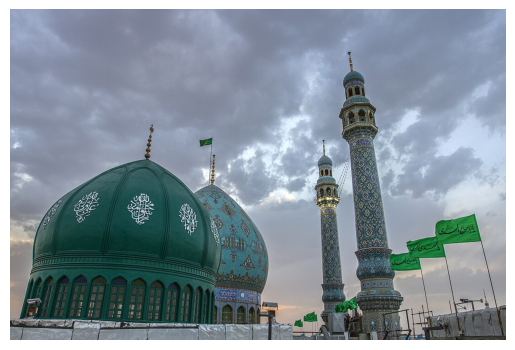

In [19]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE

base64_image = """/9j/4QDARXhpZgAATU0AKgAAAAgABwEOAAIAAAAmAAAAYgEaAAUAAAABAAAAiAEbAAUAAAABAAAAkAEoAAMAAAABAAIAAAE7AAIAAAAQAAAAmAITAAMAAAABAAEAAIKYAAIAAAAPAAAAqAAAAABKYW1rYXJhbiBtb3NxdWUg2YXYs9is2K8g2KzZhdqp2LHYp9mGAAAAAEgAAAABAAAASAAAAAFNb3N0YWZhICBNZXJhamkATW9zdGFmYSBNZXJhamkAAP/iAkBJQ0NfUFJPRklMRQABAQAAAjBBREJFAhAAAG1udHJSR0IgWFlaIAfPAAYAAwAAAAAAAGFjc3BBUFBMAAAAAG5vbmUAAAAAAAAAAAAAAAAAAAAAAAD21gABAAAAANMtQURCRQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACmNwcnQAAAD8AAAAMmRlc2MAAAEwAAAAa3d0cHQAAAGcAAAAFGJrcHQAAAGwAAAAFHJUUkMAAAHEAAAADmdUUkMAAAHUAAAADmJUUkMAAAHkAAAADnJYWVoAAAH0AAAAFGdYWVoAAAIIAAAAFGJYWVoAAAIcAAAAFHRleHQAAAAAQ29weXJpZ2h0IDE5OTkgQWRvYmUgU3lzdGVtcyBJbmNvcnBvcmF0ZWQAAABkZXNjAAAAAAAAABFBZG9iZSBSR0IgKDE5OTgpAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABYWVogAAAAAAAA81EAAQAAAAEWzFhZWiAAAAAAAAAAAAAAAAAAAAAAY3VydgAAAAAAAAABAjMAAGN1cnYAAAAAAAAAAQIzAABjdXJ2AAAAAAAAAAECMwAAWFlaIAAAAAAAAJwYAABPpQAABPxYWVogAAAAAAAANI0AAKAsAAAPlVhZWiAAAAAAAAAmMQAAEC8AAL6c/9sAQwAEAwMEAwMEBAMEBQQEBQYKBwYGBgYNCQoICg8NEBAPDQ8OERMYFBESFxIODxUcFRcZGRsbGxAUHR8dGh8YGhsa/9sAQwEEBQUGBQYMBwcMGhEPERoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoa/8AAEQgC0AQ4AwEiAAIRAQMRAf/EAB0AAAEFAQEBAQAAAAAAAAAAAAMBAgQFBgAHCAn/xABVEAACAQMDAgQDBQUEBwcBABMBAgMABBEFEiExQQYTUWEicYEHFDKRoRUjQrHBUtHh8BYkM2JygvEIQ2OSorLCJRc0U3ODoyaTs9LiGEV0NURklMP/xAAbAQADAQEBAQEAAAAAAAAAAAAAAQIDBAUGB//EAD0RAAICAQIEAgkEAgAEBgMBAAABAhEDITEEEkHwUWETInGBkaGxwdEFMuHxFEIVIzNSBmKCkrLSJFNywv/aAAwDAQACEQMRAD8A9KSLKnacenFI4IHNNjlIHOce9SWIkhP9odMV9CecRlPPNHBBTAxUU/CeaLGxK46g0AOA+LkV2z0osSAnLcU5kAJx07UCI4G3t+dIee9ExyfWmSLkcUABbHPNAk4BxT27jNCJGPY96RRGl7+tQ3HYfzqbIMg571EkXrmkMAx5puePrTmByTQwSCQDSA7pmu7fPpS5HOaZ09x6Uhoev8+eRS7uOfyoYJzzShv8KQx+Dk4A612eO1JkdwW9OaU7TkZ5x1oAC3Xjmm54GKRjgtjt0zTM8E+tIaH7vXFMLce/zpueCRTSevQikM4nr/Om/mK7PPWmn2470gOyDwOfpSBgRwfrSE4+frmkB/X3oGPBHbHFODA55/6UJTwO3elDZFIA68cj508DgYHQUBWxyD8s04OMcHFABQSO3ekzn/pTN/uOtIDjpmgBGHWgkD8qMSSMmh55/KgAe05/p70mMZx3pemcjp7UmOCenNACKO4A4z9KeB1pPoaUdOo96AHD1BoigA0wc9B1oq0CHKvvUiJelCQZyD0qTGpJ7k0wQZEHPAFSoYx6daFHGcD++ptsmWxjvQAVIQw5GSKR0AY5GKnpBtwPXg+1AuVHmHHUAD600IBFGC3OMH2qUtuwGQBzQ4AX+E8EmrFCEQK31piAtbgdx0xinxwDuM9acxG3A6etNWRui4JpoQjRIBx160ER4f8ApipIJP4vnS4yR370AILcNjA4A9KBPattIHT1qenAxnuBR3iDxlaZJkJlwSDxgdaAW+HoM1bXtv8AE23lR7daqJEPOOnpmpKWpHkbORQcg5orpgH+tCYHkGkMRaeMEntimqQvWn8Dt/SgDsgA/pSEgegppIz7e9MYgDjGfegBQ30+tcHzjvQS3uaTdz7UgD5yDjH99CbAzjmkDDkHpSFs/wB1ADCMA96YVGD6U8mk7nPrQALHXjpSbevSiEHJxn0pmMUAN4BP86cOBzXYx0pR3x+dADl4Jz34pw5FMpQe4NAhT7dflSAccGu7HPSlHvxTAQL8vrXcGlz6+vekHv1zTAQj5V3QdulLx+tJ26k0gFHGePnS8GkHHbHpSjjv8qYgqkgGiq5HSo4OBnrTlPTvQBJDZ/60aPjrz6VEUjn0xR1fg5poVEnftOTThKoI2gH1JFRC/Hrx2rt+D149qdioNI2VPrQM7idvHeuL5+nOK5BycdRQGwSMYH09KIin/pTRhevHvS9Dx04IpiCAAEniiJjnjiooc8gHgelERtxxkflQBZwR7wDntke9HATPHT5VDtpioVSB0ojS8Ejp7VRJIDjJxjpxT1AAww7VDhbOcflUsvgcGmIbJ+LHT1OKMMbRxj5VFB3E+gFFDbevegBzEYJ6moUz9hRZJcD++ojEkgmgaBSevp0oB6HjPrR2AxzzxxQD39+tIYM8+1MIGT78U856Uw/LNIDsAHoM/KuA4ORSgc9aUKMHPyoAaO1Lj1p4XimE4PWgBOOT6UhHyprMecHmml+v5daAOYgDt0puQc/nXNznHFIOvpQBwyAP0FLjjoKaDgE+nvXHnOT09aBik/40zdx6VxYk5OeKQAjnv39qBCDvilAz0x864DH50o6dKAFxwaQ96cGIGcce9Ifr86AG9vYV2OaXB9DTgPrQAirwc9O9EA68d/SkAx6U8A8k96BD0UA+lTooty8cfSoaDGM+3erGD4FOe/SmhDoodwJ7CnqgHCgGniQ7doO0Z6YpYV3Nx/OqFY+K3BIxjipiIBxjFOjQKoGM96KBk55qkiREUc4+ldTx1rqYERD1BogkIUgcZ9qGAQ5GKfsbHy/Sszdiu+QO5oaPjoc0mOv6U3oc/wBaQImpLu4I5BqSG3gqR0qBEpOOfzqYOC3Y4piGnuD+lccEEZxSE8+uaeDleBxQBEmj9M1GI61PcZBPpUJ+QQB+lIZFc4JGOpoDr16k0eRuueDUdmGeeuKRSI8g5PH61HwBnPT1o7EDPPX3oDN60hoT1xTSSOKTI9a4kHr2pDEz6etIrcHnmm7hjB6U0nGT0pDD7sjrmhl89DxQ93BBOf6U0kHn1pCHFsgkk560Mnv37ZrgeOBTCcgjqKQx2etNJyMAf4U04Oc4PNITwe5zzSGOZuMZxmk7/X1pvUZJrgeue9IYv559uaQHnjJ96Q8dOnzrieM9TmgBRhumGOKXOOc5FNGOaeQcE0Acvt/Kng8d/lTQOD0x704L8PHp2oA7PJJ9cU3I707bjqKYeCaAOz/kU0NkE1w4xmm5yB3PrigDvQDGB0NIO/5e1KD2HrSc8859aQCjgH1HNPHU/PGc0wdu1PHAzwKYD159TRV565yBQV9ziioeP7qBEhODR4h7dajoff0HpUiNs9PpTAnQN61Ot5FQknGD69qr4eRnNSEkXucmgCe96vwqnC55OaBPceY+7OTnrUWQgjjpTAc9xTRJY28nlncMGpglDDI4Pp0qriYgYz61JU46cc0wJJJPfH9aahwen60zzNuc4J9q5Dnp/wBKEIlIfX/rT/MGSO+KiucKQeldGxIyTjn0phsTom+Ln+fepRJCnJqvjb4lHap+cDHFAiFdW29fhGQec1Tz2pQnI4P6VpDJkcdDVXdjezcc9qYIoZogM8GoboRn51azRkdKiSQ8En+VSNEHgDH9aTp74o7rjPY/yqO2M4GOelIYMsQCCKYWznuaVu4HBoZ69P0pDWwhPXPNID796bkkdfauHU4oAcG7ZpN36Unb1rg360CHevekPI5FcvWnAY470ANAPtmkCnPFGVM9BT/K2kUxEbbjOAaXbnPtR9nb+VKI6dCI5GAeK7acnFHePGaGVwe1AwY6ZHWl78U7ZgY4GOlLt55pAMA65pAOCKfjIPQUgX1ApiEI47V2DyKeFz7fSlCYByOlNADA45pwGM0RVrgvB9fnQIGBilHt2p+2kxg4GaQHDOMH5U7d6U0cDuRXdCfSgBwbNKCeD1BpoB+dKMknNADs5zyDmjRjOcgYFNjUFB0/up34QfT5VSAVnzkHgD0rlYZ45NCIyfWnBuxOB3oQh475654xTlBGec+tIOQPljAp6EZAGeKYiShOBk8U8/EOOQKCvPv60ZTwQevWmIeh24zRy5Ixn6UAd6coJBx2poRIiO5T6965skHHWmREY5psjDGBwKYA5eM885pij4cmn/C2c5pmcDpSACwwOP8AJoJwc8/pRXORz0oY69cc+lA0DxwcY/OkCZ/z1owUEc/rSqMEnj8qABhfX/pS4AJ/pTiAaaePSgQxzjI/Kgnqc49qIzZ4oROf8KRQw5ya7HB9a48DI5xXdOOPnSA5vQc00dSc071zn60hAHHFACDj5Ck4PHX3p2MZ9fakHP5UAIODkjJ7U0/0p4GeO59qaR17D1oAQcV3b5da6u+fAHSmIU8dKQLkGuUehp4AxxxQAgAyeRRNvQc49xXAcf1p4X/HmgBoUYOKIq9a4DjH9aKienrTSELFGSR3qbEvHsKAoA6Gixlu/WmiSRnBAHNFiUnOOmfSkhgLHnn++rGK3VVHQH0qkSdEMDniiZIFP/COxoJPALHtxVIB3frx866hGVecnJrqBphgUwc/30zJ5xk0AA7snjmjohAzyflWZqDdcKTjig4x07+9S3BZcfKmKu1cHOfU0gEjBGR1NG8zC4yaFnGccUx2OeM0wDB89+9HRc8giq/ed2OtSYpfU0h0HcfAQRVfNGVJwKsh8XfI56VzRKVORmgEZ+RTk/PrUUkjP6Zq8uLUKTwetVc8JB4HQ9aQyAxJ65oD/L86kSLjtj58Co7Drk0igZ79qQn2x9aQ9O/zpp/WpGcT0FMJ7VxpvfJpDFLe3yFJn0PtSfPApM5H0pDOBPJFMzgce1L296bnB5pAcDjpnNISeQDzXHpk+3UU3tzzQAq5IOD9a7tnOAetIfnSZHXj5mkMcOnt/OlA54OKTv1x864DPHPJ/SgB45P6U9Rzn8qGpx1HAFGUkZ56UgHKDwB1NECcdO1JGR0xmpUMQkxjj2pjIrJxwCMmgYHf5VZTQeXxx19agsuCeKQiOc98n2poH696IRj6imkYHr680AM7cc45waUYH0OOKUYzwc4rsYB9f50AIvA4+lO+XTtXAc+o+dL2zzzTAcOT1oo6HrxQgfT++iKOv+cUCCqcE5zRkY4oA78Zx+tGU8enpxTQEiOUjgHg0dX5B9qhnoflShyDg9BQImrICaeJADjFQVc9Tx9Kesme3T1pgWMb5zn61JaXaDz+tVsUuCM8+lFEmTyc5560xEgOWb+lHiOAcEYqEjnOM/lR4iCfY0AiUTn3p6Hjn6UMZA96UHqM/OmImQsAwJ5Ge9TGcdV559KrVPHJ4NERuVyTjI/rQImMw+LA5FQpBlif5UViSTzkYoB57Ee1AAWiDfOo08GAdvQVO/U9qDKMgjmmBSSxkZqE+Rx/0q3niznFV8kZAPtUFIgkcfKhHNSHXGR396Cy9c9aQwfzz0puMDB4p2OCccU3/pnFIBAR880oPXqPWm849aTvg8/SgAinAJ7U7OCRgD2oYOOtOU/r2NNCJMR55PWilwVI71FVvrinF88dSB9KYqCBh7H2oiHHHSowPTOTT1b4v8KYEhviFD2ZzjmnxsKKMYP8hTJIxj4OKbs7GpxUFSOo/rQigwcj8qdBZExxxTQKMVI7UzAyaQCxrn1pxUYOB370ijGR1pxHXIycUAIAO/NOUccjnr8qZjrxShttACnAyPShsOoHXilLHmmE55IHXrQB2OlcAemM5rh0OacBz70gFAFOUduvHelVc559qcFIHHeqQCKpHGeP6U4KSTTlXjsD7UWKPcTjFMQEJjOewpdpC4xnmpy25zzS/d884FFCshhfh/voipz0x86lJbnBOPlmlEZXPX86YWMSMgDn5U7HYdKfgAEfSmZwKZIgOBj8jSlwMj2xTcnPpTT09KBhfNIyM9KaXOKFuxx0rgwHpSEFLZBPpQ2biuVuCM0M0xoQ5P5VwHXPNdnIp47k0AKPhJyf0pCfyppO3vx70Nnz3oAfnsfShtz36Cm7uvz7Um7g84pAhrHOT6fpQvrmnE89OtM698UihfWkHbJ/OlHfOeKTHXHGKQC9jnqeuaQnPuDSjp07+tKB/nNADduecZpQMD1FOHQjj+dcQAT3NNCGjjr9aaw44p5FdjgHn2oEC21wXrRAufpTgvA7UwBhcZpwHUZ/SnheMelKqnn1oAQDHrTwKci4GMcZ60ZYjTEDRfaiKOcCjRwk9jkVLS0+HPNMRFihzjtzU6GDjoOfaiQQYbp9asEjQbuDTRIOGEpk8Zo6KV5bj5804yKMgdvbtTJJSUO3tTEJPIFX4Tye9V0kuTyaWWQ9CeKiF88detOxh2mxnbwa6ohbGRzXUrAuIzjrR488jGfao0R3fP8ApUiNsdMAnioNg/l5z39qaIwTyKKMDk07Pfr60xESWDBOO9RmjOScGrF2XGMY9s1HO3JxzmkCZAZSPy5pVY8n+tSGAIOe9BK7Rnt0NBQaKZgOMkVJSb1FQkYLn9aJux8xQIkuSwO04PSoM1uQCSDUhW6kmnBtwwTnigZRTQZB4xVfIn51rGs0kUg8CqO9thGzfpSGinZQM5NDI4J5qTImM4x17DrQD8yflUFIZjihkYzRR6nB9KYy8nFSMZ06/wAutJjrwB6+9OxjNN49aBob1HrjFNxwe9LjIxSAE9etIY0d8c56UnGOmcfSnd+c03nnPPNISE6Z+L9K4Dgg46muzweoPSu+XPfNAzvpTgOvP6d6T6EepFdxnJyfWkAo9sEU9c8jGaYBz0HrzThjHI+lAB0YDHOcVLgl2DjPSoA46Z9KIr44Oc4+VAFg8wIIPPNRmGWyDx2oYbPSlB/zigAZXrj0oJGOCPTjNSyuRwaEV64GOaABdec+9N7HHUelPxge/wAs0g6HnPHFACAZNKOPalx/jSgfyoA4YB9xRB0PT2pAuD0709VPP88UwHAZJoi9enemqpGR2/lTwuB8qBDlPoPrXDpjg/KkA4/lmlHGPSmAmf8ApTwxHemY60gOR/nmhCJCscdc9qKjHseaiqc8n+dGjPoBTCiWjEnJOOlSEx16UCFcqCBRN2O9NCJO/AABp6v3z0/WoqtRVYZJJpASw4xRY2H1qIrDpx2oysPXNAg5bH9KEx685+lKG6k4+tccY+nSmBwOM011LDFOJ60RU65xj0pkkR4d+ce1RJbMuhx1x6datdgHODTOPiAoHZmntiuQwI9qjSRYHzrRzxBgeOhqruLcAccZqaGmU7Kec/nQSO5qbInXjNRyPnn2qSgHQnHOK4Gn444/xph7/OgDhwOlKDnpyKQAdOeetcDnp3oAeD+YNdnikHtXHk9s0xUOB5p6kHk9KED19qevfPpQIkoc9frUlceozUJG2/ICiLKQMcmqTESy3B7/AEpCw9/pUYN79aUH5+vpVWTQ5sEcexoPUH0omN1cU9fpQMYOvHNOzxmu28daQjjv+dJAIT6/9aHn5U4jOcnPvTevT0oAT58duaUDnpmkAx3+ldjk5/SgBw/WnqMjjrTF9P6U9e+OeaEAVenHFOUc9aavAyMYo0Y7jGapCHInrzU6zi3H3oVvCWIBwcHnireGAQRqx5J6ZqkiWONp8JIHb86EsSgNnk0Y3aqcYBGO1AeYPnaOneqJAthTxz8qA7nBxTm+LI7U04HQflUjQ3k+tMJ9c/lTjkA89KC7Z79fagYpbg+vtQz1x0+tJu+vpTN3B/OkA8EYPuflXA8e/wA+tD3etJkgegoCggOPzoeQCRSFuDjntTT6Y60hpBFY5H9PSnFxjg9aBn559aXJI9aYDt/px64pmff/ABpCcDpTCdvTigBQw5xSE4zikB+g6+ldjIOOAaQCE9R1PT51wHrShc5z9OKIqj6UDGbaTbnpR9nWmlPhOB1ooVg8dfelA568U4rkH50qjv6d80hjQOD8/Wu68Zp2OCecYrtp5/rTJGAe9djPSn4z2pADjpn5UDEweO/9aVRx3NESMnPX6URY/h6CmIEq/l8qIsec+lPC8nPrREXj1piHwwFmAHHrVglmu3JxwKjxKVx0qUJMHnnHrTRJ0NuMnPAqVGqhviOFoUcgxz9MCmvJkn0piJQ2D8B4pUl4I9/SogfnH6UYSYHpQA6QhlPHNRnkIGM07Jz3GBQ34Dd6aADK+T3oO3dn+lEZOPShlwOAccUACbA4rqYz5JrqQ0aKKHG/FPMZGc0JZuc8gE08S7gR1Hv2qTU7ztoIGDS+e2DyOPeo5kDH4RihmTI9BQJEiaXjH50JH9RnimnvikAAye/TrQOqFMme5/OuLYUjqcelDZSB+lNXjP6DNIY9emMinFhjk/4UNctmkYZJ7HtQASN+ucCjA8ZzUKJsdRipCN8Ix/1oCiZG+R1qFdxGRcN0p6PtPoK7cG4yDQBRyQHecDvUSSLbitIbZWViOKrri15YgDH5VNFJ9CmK8Z/KmkVMeIqSMUBlIBxz9akoj7eOOfnTSvfj50Yj+VMI6j07UgAbeu7GM80wjAPFGxzx2ppHIyPoe9IaBkYzxTeOMU/ouevvSAe4xSGMC8Y7Cu6Z+dL1J+XfilGMZ46dxmgBAB6jrS56j8jXduOD7UvBA6mkCEUfLNOXoQefUVwGSM8/5NKM/QDmgBwGOv1pR7j6ZpB7Yz8qcOB0wMYoAUHjr/0p6DJ44pgyDxjn3oit8+tAx2MDHBoRwQQO9E3cH+VDPQ9aBAzzniuHU4pwBPWnKuc89BQAgXHI6CnqmcAc/WnomR9KLGmOo6GgAQhbJGKNFCeT9OasI4Q68dMc0ghx3+vrQAEQYYjnin+SMHPpUhUwOQPnTggY55osCB5GMj3rvK46cVYGPjIpnk55HSmBXlPf50zZgfKp4gDNj0Pamtb4JPFAiHt4z0+tFjGDz/KjeR0wM05Ycc0wDqcDGc5HWuxz7Ui5A4Ga5eCeOQe1Ah6Kec+maUtgHk0zeRxXb80AFVz70aFt3XvxUMfiFSIc55OM0xEsHj3Pf1rsjFcAWGSfypcE5xzzQhCoOT7dPais5QAgfWmKQqljz7VHkmc8D60woJLcdQOKCJePeozsckmuV/U9O1AUSQ+QQahzjc3t6ZojMdpNAY7j8P8AOgRXzJweaiOvPWrKRBzmocoA/OpKRDI+fJoZB546+tHIxQsYyPekMYAOT/KlA4/wpcd/ypRz9KQxMdfelHftSr1Pakz9AKZIhHY9qcBn++uUc55p4UkdqYhBnofy9KeOBya5VPIHAoipzjpTEIBjrxT1B5waUJ1GD2oijt1/SqoQqLx0xTsAZ5BPpTfyNcPfOKYHEDHHTPrQTzn0PaikZ6k0m3PTrSADgnPP1pu3r8uaOE49eeK7Znjt86AI+3r3PuK7GSexo2zHHWm7O3egBgHHpT0U04JgnAPFFjj4I+lMDkU9s1KtwNw3dMUyOL2/WpMSZAHp39KpEsuLIQoAE5Jq1ubiEwhUCs7cFsZwKzsZKng4+tS15XJP51aMxsqIuSoAFAZc5wBRT+LGcV2RjA6+tAyNtwDQ3wAe+KJI3X+dR2bOffrUjBsevbFALZz/AFp0hGMYoDNjPekMdu+tMLdv5Cml+v8AKmF8D4jjPvUlIfv79vnSZ468AUwHntkd67Jxg88CgB276n51wbvTASDxxXZyOtIEE4z0NIT6kkUin/HFN5qkFC59KbkEf5zXAnHf+6lHGOgpAcvOQKcq8e9KoHIp6KTn1oEcq8n1xRkQZpiDJHA60cHvmmhDduM47YphXOeOlEPHahnr8x6UwQwpXYGOK4sP09KTd1pDFFdx9OlNB4PvxXZznB/woELjnn+dKFz14Irh1J60aNMjk8e9AD41PTHFGEY2kg8Y/OliUAc4PyooOeMCmhABFyc09BtHXPejKODihkAZ7elMRwYjPT+lFB+dB9qIo5x/OmAYP8I9D2pQC2SelNUYWjoQTwaBCwxMW6YHyoxVUOM5NIJGwq5prkjJHWgBW2hT6/zqNK23OB+RpJJCuc9fnUWWUnPJpgJI3P5VHLdR1465pTlj9aYR2PakAm7k9vpXVw9s11IaLJZ8A8jrUuB8jGcccVV5OTz2qRHKFXj9KRqSzhCc5BP60NXAPPahGX0Oee9N8wYOCelAUSGfjj8qGJMfy5oBkI4yeaYZM5J9aAJ0UgPB5pXjz+E5qJDJycGjrLx9OvpQMUKc/FmuboeOlOzk5GKYzDB7UhAmOG6+9PSTGfYUBm+P2Apu7BoGiWzcjrkUnmYORQBJxycVwfoBmgCUs2RgHnvzXM+4DjrUUP8AnRFkAA7emKAIsic+pP1qKYSeMZz7VPfBzk4oJIXnr9KkaIfkFfy9aA0WPw81Pd/bv+dRm+LJpMpEMx8+9CK9R2qWQOgoLJweMfSpGAKjHem7Qcn5dqKRk9PlSY49KQwWOCTSY+YopXr603nB6UAMHAPypR6Hnvmlxznt71wGBjOfnSA4cce1OA68H50mPT0pRgcdf7qAHfXpzXA4H0pA3w8DA60oHzoAXPp19e9KDzxjrzTcfMZ5p2M9M/OgBQc9O9J14P6dqUDnk/WlAyx/rQBwUkEEYp6rkkdD6URUyOaNEFXk0gFWDaMmiwlQMMMkGuZ8DHB/pQWFMZP3KQSnX0oisGzznjAqvjkIHxYxUjzvhA4B9qBEkjbjpgClUnPFCSZcfEPyp4b1wMevpQATgkA8Ui8Hg4pqkc8ilznOOfrQgHqPi4P606WL4BgUkI3seufWpbOFTB5I9aBEJIj0zkDvXFefcUTeASR0zTiR/kUwI74xgZ49KBngY54oz8+/pQsY74xQgE5+lKFJ9DiuUZ68VMWNAoDc5oAjov1oyY4A9OtL5YzxTk46UxIkIOASc0ZRhMnoaCjcU5WwDnoaBUPY5zxn6VBdyWzjP86kM5Un5VE6k7qAGSEnOeueeKCDgY9KLI6kN/SoztgmmAYP8JHcd6GxIOe4oYkGD3phk59aBCSNwST+lRJTk/4UR24696jOeuaQ0Dc+p5/nQuh5/lRCeuP0ofY8H6VIxufrXdB6c0o4HqBS4A6U0Ag+f+NOX+tKOfTPenxqCe+BTEPRMn/CjJCx6D9aWNPQYqdAq+ntiqSJIv3fr79qcsPfpVgUU524Hypqpz0GP51VE2QxCcHNOWPBNSHUZ4zSAZyTwfnTAB5Yx14pqpwRUhuc4pYoiw6UCACLP9R60RLVmHAJFWcVkzjgDHerGKz2wrwTn0ppCszv3U5xg5+VKbTj1zWgaxKjcV/OmNa7hjHNOhWZ02xHam/dz1ArQS2BVyrcEYoD2/l5zzRQ0yl8jb/IfKiJEfnirH7uOtMEYUhe9KgsAiY7fU0VFweKLsA704J8uDTEdH1P8hUv8KnPFR7dcyc8j9KdqMgs0aSZliiSMu7yNtVFAyWJPQAAkn0FUhDZGG7AOBQmYgc9BWE0T7WNA8Ra3DpWmjU/MuP/ALVuZ7ExQXBKNIAhJ3DKKzKWUZArZmXcAeuazjOM/wBrsdNbiM3pwe1BduCKRn9KGxPbHzpjBsc9/wBaCx69sDvRG7+1Cb58CpGhhP8AL0pp6GlIP9a7GRzSKG5AzzXZ7dhShST/ACpQvFADQKeBwKVVxnjpS8ng9B60xDM9eK7OMjPNKRj0rguSRzmkM5Rz68U9VrguemKkInHT5UxA1T0ziiBcZHIp4UA+nyrk9+1MQ0AnP/SnE4HBpGIAwDQSx5xQIezY9xTd2c+gphOf6Um7gjr7UDoU9R0zSd+elcDx0PSnd+o/KgBpHHenITzzik+lOGD2BoAcoz16+1HjYBecH1oSinD5UCJCHLY7d/ejZx/1qOnw+goin6j09aYiQmNoHHrSOOc5IFCD9aWR8+p9KYjgMk7sY60dRtB/zio4YKOe3rTxIRwKBBgeKLGrclOcUBX9c0ZJcZGePnTQBlz36ZrmO4HFDWTkZxj3rjJxwB16k0DAsASc9qDtBJNFJUBjmg5yP6UgOJ44FRnX3PyxR2OBxnFR3OcZ5+tADe/WupVHX1rqAQ/eBn5U4SDH61F3Hk+/NcJMdaizclb8Ail8zg89aibzziu8zk+hNAiSXznP60gbB56VHEn505XywosZIU4OTk0ZJcYPoaiA9O2KcH69wKYiX5owMmmvICeDx+VRt+RnJpN5we/bpSAPnjApM8cdPao+/JOOaUy4HPP0oGFMndTxTfM4xnPyoO/qP1xTPMGB8/zpDJXmYBPApfM68k/KohfAyO3rXeYSKLFRIMmB6Y5obueccc0HzOcnmm7sj1+lIaHsR6daTceaYT3phbrjkUhodnjrTSODn0pueOexrs4PFIY0jjnrSEAHOBmn8AfWux0FIAW3r3Ht2pmMfP50Y49QPlTSMjmkMDt644+dJ/LPajEc9AKbjj09aAGAHFKBz86cB7iuAyMjNAHAYGBil2kD3pQAMZNOx0xQAgX161wHA4wBRFXIOKIEz17UgAhen91OAIznNEEZOaQp/PjigBU4zj/pRRyOD1oO0jNEQ8H5UAE57cUhXjHtRI8ZIbrS7eu38qABgcntSjIHHIohAyCBxTsEZ6AUwGI2Ae2K7cQfl0p2A+fUVxQEUCCRMXBx2/nT+/X9O1DjG3IzT+MevFAwsRKnINHGTx1HzqPABn1Pei78H3+eaAHIuTg9KdjIOPXuKYrnHJz1p4YAHHfFAgLDb1+tDbnNGZs96CR75zTARV746UbzducGhDG3njiuJz6+xoAkpJkZFKH45HfHSo0bkDAyDnrTy5OcHr70CJAckgrjA9KeZcL29PlUUN75pyt1560wHM+SSe9CZwVIx26iucZPHPPaguf89KQgcjnPPrQS3Gae3OSTmo5+eff0pgKzYyc9+uKGz+4pGbAOOD7UFm9+3JpAKWzmhk9K4nrTOpoGIaQL6c08DPzp6p1yeP6UAAC4+WKUL2GKk+VwcdaZ5WAeBQIYo/woyL3rlQj50RBgYH6U0IJGMUdH2DjA9RQVHBx070oB+ftVIkkCU5OTz+VGVtxwf0oMaZP91TYYicYzVIQMRs3TmnC3xkEY9KsYEx1A4pTbncDjgccelUTZXGHqB1NSra1yuTj5miiD4ugwfep0UAwMAEDFOhNkrT4lZSCPmalTeXEpUdfaktQFB757U25GDv55PHNUiBhkDKBjntQ4VUPliAByOKasbE9D1zRgAcqeuRzQMc6rM4Yc5HXHaq27XZkFRz0qfLExU7G24xjjriq66dpMKV5BxmgEQMk5yaGBuJJPTpRJE2g85oCZG4+vepGP3YHHX2rlJIG0898iuyMAn1oyMNmF49aaALblYhkDOMUHVfKvLeSKeNZo5EaOVHXcrowIZSO4IJBHoacXAUBenHFCuHGOMmmJb2eYeHfCdt4V8dXECXAniu9LdtKhMKgWUEbopjDnLMQpK5J5BPTnO75AxgisjrV1rFv9o+hPFZWZ0X7i8M15PfpGUMr/ABbYyclxsUDrncfpsSp/i69x71x4WrnBdH9VZ0ZLdN9URyfShl+D60ZxjkjpQG+dbkIYTkc03GePzpSOlKi56d8UgECcc80vl4+lGGMYHWnYHTp9aYWAEeBmnLHxg4p+D0oqRcZ4piAiHr/SuEXOcYqQcY/rTM+vJz+dAAjEPpTPKAHOaOBx7mux13UACQHrxRhjHvTGAQYHPGeKF5hzwcdO1ICQfUdqGX+E4JoZkLDrTd/B9KLAVj1oZ98UvbjBpOT15+VKx0dyB7elcM8gdO1djr3+dd6nvQA8Z9cYpQODgcfOuAHPGBTsdf7qBCD608DOc80mD709ehxzTAUDPB9e1OUHgUgI6daep4/KmIcq8nn+lOGeeDnpSK424P1pNwPHamIIrYNIWG09uc9aYSR0ppJwfT5UAPByP76Ioye5AoCsD/PNFXB64HPIoEFBznnil3dfamgZpD3x09aYBBIcgda4SZHXOaED61xOePz4oEOZyc85PekB4NN69+aUcnn09aBiE5X50PBbPennk8U5UPGRjtQA1U7evSuoyjB4rqAK4jHtTCOMjrUkDOc4prRZHfiszcjjrjrTc9c/IZopjODn8qGRxQAgOBz0Jp6PjPb1oRPX/OKUcH+dAySH+H3pVb14oCk/p608HBoFQ/d700n06V2SQcevWuABoGKpA9/WubrkV23Ge39KYR1zQA3PoflTSRTyCKYevB4/WkAzPvyK7cTnnpS7T37fnSbf049KQzs9+cVwPBB7cU3GR8+9JnkdvrQA73xnNd6n+tJnr15pueaQHZ9eveu7etdnnkmkyO+fWkNC5+mcVwbI4pPrSZ780DH9Mmm9vauB6jp9aQHI7/3UgO9TXbefpXDkfT17U5RkdBQAzB59q5Bn50/aOTXAdfakBwHbNOX2z1pFHUmnqPT0pgPRefSpATjpnNBToOPpR1OOOvpSGcE/sjOK4qMc96IgwCMfmacV9sYoERTH1wP0rguCeoozDjrimL3zQMWMckH0pxyM8ZxTgwx9OxprNn5etAh4IPqv9KUjPY0NTg8/pRc59uOaEAiggk9z1rtwDE/kK4DOSB17dKRhxjsTQA9SCOK7bxjJ5pqdTn50VVJ5/wCtAjlbapIPNJu79abj17+tKBzwPkaYBo8j5Up4Bx60xSAvB5pGYg9OnFACbvrS56/5zTcda7PHFACA8EE9OaYWwSc+9Iz4B9v1pmc5HvQA8MRjt75p6ucj+6owbOcevanxnLCmIlAkjr+fPFO3hc455oYO0epFJuxnmgEFY5B9KAX6ilZzjGM5oTHg9D6UgBu2RigOxBI5Jp7NnOOlR3OP6UAIz8Ht8zQmbPfrXE+hIpmeeePegZ2c57Uq89eaYD6k5py9eOKBBkXOKKq47c0JM4GKkgA9fzqkIQDOfQUoXdnjP609RTwoOTwKEIZ5WRyMUqpnrjnuaOFJwD3PrRI4x1Hf1qhEZUwemPlR44wM5A6UbywRnjNOVOv6GmhHQx5OPSrGGPt/Oo0ICjJ4qZCQMc1SIZLig+EmiMo24PrmmRtgdqNw5PTGKokYiDngYo8cWBzQ+BgjiixtzjPGaYiZHgHpzTmQOAMZOfyoat1IOT0o0Knnkkk0CEFuE52kn16/Wo86iEqw5PTrVoqkkA4plxHHtbIywHXFAFcsbvEzHCqehNV1zAY3z1Aq8cxvGqnlQPw4qHfbHwFxjvgd6YWUTQ7yTg+lQp0ZGI96vnjwmVGeM5qru13NxSY0QR8QwB9KeOoHPNOWE9hXMAp4oGLkdcnsM13Xg59qRRwacD68fKgDy/7SvAVx4k1vSL7SoNLluBC1vd/frU3J8kOHUxqSFXksCwIY5AB616L5sdyTNDkxyEsuRg4z6dq88+2TQrDVLLRZtTn1L93dmBLWzjVxcMylgGDMqgjacMxxhjxnFajwVbwWvhHSreyiu4IbWNrbZeENKGR2DEkEgjOcYJGMAdK8zE3HjckejSZ2ZNcEJX5FnKB2qMwznnNS35Bzk0Bwfl8q9A5UAI6ADP1rl+ZBp5HJyM+tM+fTFSUO3f5+tKDnr0oeeKenX6fOixBUxyeuaLu4HIHzoQI5x16c0rHj296dgP656nnND4PT1rlcDOW4FD3dTn6UAPDAemKG0vXuPnTW56nrQx1ODj3osdDi+Tx/k0wn1pCf8aQnAqQFz/hSBh0HTvxTMnB/6UoPrQMeDkc8f0rs5pvSlBz/ANKAHjnPP0FOXnNNXB69KevH+FCEOA/XpSheP1rjwf8ACu6ZpiFBxnP50obgZ6detMB967v6nvmmA8Gl3YHNMGfninxrnrkinYhQxI/yaVSeoPNPEW7iuK++Mcc0Adn39qRhwcfLFL0BwfWkx7UCEUksQDRxx0OaCvcUQk54/limgDbSUByB61xA+Zz8qanA9vWmyMP16UCHd+BTQeT2pqcfiPenjjHagBRg8UqjI4B5HpSov99EAwOcUAciBvmeaflABt5NDCjIJ56CuGCOT2pgO3rkj0rqbnGSMZrqQEHOM49aIrc89+9Dx19PSnADHXoKk2HMNw57UJ4vhoyA85+dOcArzxSAryh4PT1pqjBzUzZu/FihFOuBQMCAeKcqkdOnai+TgnP1pwhwcf5xQMYoJGRk4osaE5oiQnJyP85qSsC85wOKEIieWCG2nntTGQ5/rVgLblj6frQJ0xmmBCK0zbnoMCjEMPrQ/nxUjGEdvX0puOvr3p/XOM/Smnp8qBjceuKbt9T0p+eARnJ747UnTrSAHt+mKb0B74+lPJyDTc5z1pAhnc460gPYcUvU4xTB/k0hjgevpxXdc4IpucZ6HvXDgHjPvSAXtx27VwPXJzSHI/z1rgfXj6UDHA9eOO9KGwD1wepoYPHPX504dyKADKw6dTTwQRn6UBTjOcnFPVuBzmkA8Lx8qcBgZ/LNIG4GD0pw/SgAiqOefyoyKc+/rQkwPl8qkJjbyKAH8Y9PlRMZHFDGOa4OQf0NACTLtHFRjnn26VJZiQRzzUdlxkD6UANyecemOe1OzycYHrx1oZOD0xxXD8OKACoecEng80VX65zio68jAoyjuenagB/16c12cD1rhyST0pwAJ6dRQAiqRycUZCD1+fzpijrj60Q9cCgQNiCPn6Uisenr1prkj1pEcBs9fbNABcgcU1j1+lc8oPQ9P5UMt6n+tMBQfQ4p2SM88mg5IHXn1rg2CMcYoAe2Tjn34oeRzg/LFd68muIx9aABnk4NEjIVufpTD8Pt7VwJGf1oAk7+OCPah78Z24xmhhsdKQvnOaYgu8HANCduo6UgOeaYxzSGMc9aCTk8Hv6UQ+ufnQW7/L5UADY03170pPX8+lIPegBeTnHXGKcuM4X6UzOc5zkinj2OeKBB0/L51IjbjBzx696iqce5x2NGRuCM/pTRIYc80ZBx/hQY+c45o6AEc/8ASmIPHzx+lEUcH396Guf1ogbGfSqEOX60obH/AFpu74eOD7Uo5HtTEFRh65qTGTjjkfyqCpOD71Jhk5zVIksEb4c9MU9ZByAaimQ805ZDnk859aYiZu3DoMkelHgVjnjOaiRY5J5zVlbc8HgfKmSSbeInkjPFSxCFBOMmi2kYwMjvxUwwBl+Hrx9KAK1AUG5sgjP4vSmzO7W2/q5/KrOWIuFjCfiYAH0qVHDF5gR1BUHA9M0WFGQWRhkN0xjNN68A9PWrHVY0SZvLwMcsR61USTFVwuQe5PNUhULJIu34uuOKgXCxgZzlu+KWaYnJ7VBLk5zwc0Ah7Hjjj50Juef1phcZwKaZBUlHbtuT60qt15yO9CLCoer61ZeHNPa/1R22ZKxRIfjmfH4V+nJPQD6ZV0gSKX7TJIrfwPqFxduyLDPbyx4jLszrKDtUAHLEbsfKmeEPFel3mjKtxcnTZGupTFDqERtpGQ4bcEbkLktgn0rz/wAQ+ML/AFyWV9SuVtYkIEVsjFEjyQCMfxEA5yeTis42pMA7QksnmDZI6Y3MeQTnrxxj29ueF3LN6RdFWvf3NPSxUOTfXp3fyPopkDRiaN1kjb8LowZT9RxUZ16k5614jovia60iR30u4ktBxlGIKsxycOuM9M9uwr1Xw74qtfEiyRALDeoSSgOVlA/iT8uV7V0xlejRmpLYsSML9KYwx8hR3XGf1oBA59TVGiG9vSnIeTjp603Hakzwec0gDAjGD2pM/CT7Uzf1xXZ9c++aLChSevemk46EUucZ9+9Nx60AL05JpvHbikJxn1+dJnGaQ0djr/nvSEcVxPY8j55pCaBiHvjvxSDvjj3pedxApADj3/OgQopyjI74NIBwT+VOCjPPrzQA4DqDRAe/OMUwdyP0NLnr86EA7NO9QKaBRFQ88fmKYhgHB+XFPCHn9KlxW4Od3XFKIeo7UxEMKQcYyKNEuQev50QxDOSOPSm7cAkUwHbuPWmduenrml6ZOM13U+uKaEdgYJIH5UmQeOaewKZGetN2kg8UAcPf+dFQZ5IBFNU4z0Hzrg3xDt86BD5Bt6H9aCevFPeQsB09aYoyexzTAfGOenTpRQCeTQ+3anq209f0oQh3Q9gaUN796aST2pAp79qAHFuSM0iilC55/WixwGQcA4oAGFz0/nXVPit8KCa6mFlOUAU0i5HHHWjHDZyOc9aYQFOOD9Kg2GjrzS4JHGaXHrzXL07UgG84IPTvTQmOtG9fWlKjkjt0zQAEL1+dFA69KYTj0pUPI/uoGSUXHTmjohHX0oMC5x1yR+dT1CsGwDkY46ZpoQxY8LnvUaaLdmphbggHjvigt3HXNMSKx4gCcDgGgNHgc1ZOue1RpIsg9PyqSiDjFMxgHHIo7p17EHpQsHsOKkYM9O3X86Q+1EI9c+9NK9qBgjkZxTP6UbZ1HNNKVI0Bx8JNNPHB/Ki4wOe1NK/zoGDAODj86THB9P5UTb68+9Jj1+dIBmODnOO9dj5U7Hr8671PQ9zSAYMYp3QHH8q716YpccfKgDsU5T35x/Omge2cUuM+tABlO4miLxQF4ye/rRlJx6Y6e1ABUPXH50VWxQVx1oinIxQAbcccH50qkn8VMQ4oqYwc9qAOx1zzj0oMgBJHzo5YY7fOgt8Q45BoADtznjNJtwaJ0/Ku25HOCfagBY1/OiBQeMAU1VwDj/rT89eeg6UAdggnBPFcDycDn+dccEHt6VwwBjrnrQA9T6V2/rTA2A2eKEz5PUCgBzNnpzSJk/M9qRP4s0aKMDnqR60ANWEnGaIICcn1oij05x3oygnkYHtTERfJIHoe1N8vA7ZHapRUA4PrzQXO7HOP60IAOwDgHJpSOMkYNKGzyMHHOaGxIpANcAkCmbeeOmaIqZ6+1EjTHHp70wAhe2M8Uvlcd6PtAzg01sEH+lAgPl46ihSrwcc8YqVn5AUFx1HT50AiIw+VBIGKlOODkDrQCMe9IYE+vrTe+KKRSbSMccgUAM5HQ4x7U8cfSk2/59qcBjtxTEOX2Joyd8cGhouflRo156UCCIQPSjpxx2oaJg5FEUdqpCDIeP5Um7sSaaWwD/fTd3U469vWmIMD70RW2A+3egK3XBpw45A+dMQUHrzRUbg+tRs4yM/nT1fB4poRM35HfijRnPzqHGcj0+lS4qaIJiEgcdKsrQkDPrVfGmR3/Kp9vkJjsKoRqLNFdM5yOuas0iXZ/fWf0u52thj1NaizhE20g5B6UhADGNjcZVTnpVVfXPkuUjOQTnI7Vb3t0qkwxIQo4z3JrN3ZAjYqTuz3/nQhgLtN+dpLDrnNVN3FtycECpsd6Y0Kt0OO1E8zevxAEeh6VQjMurNng++KiSBhnjNaGUrE7FVABH0qruVVumB64pgirIPPy5oPmgnk1NuUCxBgOpqrY8ipKRIRkG5pZFiiRS0jt0RQMsT7ADNeC+MPFsniTUWu/jS23eTa26tgwwcsrMeQC20MeDycdhXp/wBoN89l4G1UxnbJdGK0DZ4Adviz/wAqn86+edb1ry3KoUlMjKwRRt5wcM2F98DGT6dM1y55qC1ZUYuWiVk2W5kYwuJQX+JfKSP4CxbIzkZbg55wOuemKhSXdnbyGC5+7I8jq7eaw3bxn4viY+oHIH86grZ3d0vn3sbISdjpCjYGckDYpwM4JwxOewqZYaJGbPzfMMULSiPO7aMnJPEY5XaAQeQdw5rkWTNPWEdPPQ09AuWpSp+W3gHj1TT5Cuy7tLrz2GXEgyzK3A/hOeo5HcY4xWl0zU7i3ullgmaGQFWjZFyAQeCMdOCehOenvWcPh55L5raSX7sSpO6a7ccdPiQgkf8ANjqOuaS40DUdFlMloy3KwEFjFg8kcZUcH5EA+/NUpcRBetC/Z+BPBB3yy+P3Z9K6ZqaazpVrfxAKZ1/eKOMOOCP6/WiZ9O9Yv7KdQbUNC1Bfg8uOeNlC8j4gc/TgH9K25X6/SuyElOKaJSa33BHGOaaOKcRge9Jt645xVFHDjP8AfXL1wK7AGP767GaQHdQcZrgRj4vpXbefbvTgvPPrQIYeT0wM8UwA84ouP8cVw7+tAwRHpTSMdeKNjnsD86GVxnGQO4piG45pw5B9+pNKF60vHPekMaB1zTlJ4xS4+WK4ChAcBRFXJ70gH5VIhiLEBRTEcidqmQW/GT1okFv161LQBAeM0yRUtlVScc9s0F4QPcVI8zCn0x61Gmm3Dg49qYAWGR1+ZoW3jt2pSeflTGY4+LHNADgAAcjrTGxjiuLHoT0pueDz+dMRw/3ulOyOuO1MJ64GK4N1FADwevFNJ69x7V2eT867GTz07+9AhB8sCnDg0qrn50VY89P1pgMAzzRVRj2yaLHCcjAxmrKztCxUAc/rVImyGtptUMfxMeBQzH6/zrUDReNxYbsdDVVcWnlk/wBRzRQyFFAGbHXpViFHlhQMYHWo6jByeDStPjAB49qAOLDJx0HeuqOz5PBzXUCKmNvWnqM8UBSRz+VPV/hxkD0rM3C+UewzSFdoOcj3pRLtB6Y70wydc9qAEzg0u7nr3pAQfTJrgADigBDx1rk5znpTWPr6UgYdBQMnRSDPr70fzsjHH0quWTjrTw2famhE9ZR8Qz+dM3Zzxx3qIHx1+dE3+h4pBQY89enamkZU4x+VD3D9acpyOeaAIzw56c4oRhOD349asFUNTjGQpA59aQ0Vogz04HrTvuxPY4zVgIuTgVIitxLzjBz+VIZStbkc4/woRhznIrQPbqqt8P8ASoZgGD06cUqCylMWPfNDZe/8qtJYCM8fWojR89uvWkNEQJnpTdnapgiBHakMB5GKB2Q9uOldszjnFSjBjr/KmtFjPPPakNEUg/KlAHIzRGQj34pAv/WkA3p9P0pwT0/605R9PSjBMj19KAI+0c57U4DOcenFSRFn8/SkMWO+cetAgSnjB7mnq3IpfKIzXBSD8z2oGFRgPY0dSMdc/wBaiqT75NPDY60CDOpzjrXBKaHJzjpSl+D/ANKBjXxj+tJxiuZsdD8j0ppbjrgfzoAeGpynJ9eKBu7GnLISRk5oANg5yKaTnp/Ou8wHOeD0obvznNAh5OFOOc9KD046Vwfg4PPTimEj6UAFBx0/IUaJ/wA/WoisfqTTkfA64oAsw46fzpwkABA4PtUSN124zinFwKYBHkySc8io7OTn0pC+QfT5Yoe8YJ7ZpAEB7fnXAZoat2zRUPNABQAcjinqvAOKGpAJH609XAHBwKYhT3x+lRixH+FGY8H1OKjtQAu4HjI9etMk74P6UgIzyM/OlDDB6ZoAA/fGPzoRBJ/rR2X3poXpn1pAB2N70m05NS1jyORmmGPB9fT3pgAVOM9MU5Y+eBRhHjoKeI+elAAVXOScH3o8YwTk/rTlQH+tOC4A4waBHdjj6V28dMZprHP17UMkHnkimILuyTjr61ynJ60NeSQfWipmmIIi4Ax+dGA4PFMQDOOtEAGOOKaJG9Cc9OtNU+9PaPrjJ9O+KZ0piJEfFTYG6Cq6M9R6e9TID0PftVIRbRBjgDpipMakN8zUe0kDBVOMDpVvbweYzEYI61SJC2+UAIIHNa7Q3NyvwfDhemeKyxUYKxk8evNXekzD7qsQLLgkll70hIm6nse6IXaMgF8+tVd9abUJAGM8g96m37hd6ggnH51USXLzMSzbk6fKgZU3UBYgquM9qauYw2/GfWp06qACTnFVsz9QDgg0wIt0VPJGWHY1VTMQx+fQdqlyPwd3PrUCRuSc/WmJAbhw8XPrxk1WOpYnHSpznIxQgB0PPrmp3KWhhvtOjd/A166KXFrdW87LnGQGZf5sK8L0DRpJ4ptXuEE4jZmcyluFx+LIB5PHUHoBx1r6muLC21G3uLG/TzLO7jMMy99rDGR7jgj3FfPtzpNxZ69feHIby5jsdNkFtezQYBklC7UCqWAGQFLNnKhuOWBHFniuZTevl5nTikuVlXJdW7wTWgsmkWFhIY1xujGz4mYIAFHfLlOmcc5o9lpl6k81jc3MVtN94WMwSXCBhnAZg0aAMEGA/wC8Yr0OWzVbqHj1dEmvzokdqulWLpDFaRXDRzTlt++RTyGCEYbdljuB3VcatPHp/hi9v9HtFjZbeWSOQF2U/B5mFDZRAd25lXqyqSMYB8//ACnK7vyr87m0sc7SVanQ2RaQW8WrWs15DECkUjSMxwm0KruzYJAVRnAOQeO8qG41DTpHe+VNQso5dkklpJ94RXAJZsYVz/FuIDDIILDFeNft66VobiELHqKPPLNqA5muPMKnD54IXaQB6MfavZ31m50/wtZa5A6w3MwjinvmnkUoJApycDagyxLFcswXnGMkxcROP7m7+P1snJiaa5fx9D1P7PdLtLXSNSv9OkR7XVLtJolRgQgWIBsY45cs2BxzWkxwew+deffYzq/7U8MXl0kccEVzNFNJBDxHBdbWSdFGeA2yOXHQGQ4r0MYIyK9XFJSgmjnd20wRXucD50wjGaI3v/1oXQ59PatBCZyfSkHTj8qUj3/OlUYHJxjpSAcgyRin4wD6+9MDAdQeDS5yMZzQA4DJ5BFIU7YxXB8fKmluo/yaAExkdaQpjPPSl4APPypjMee/rQAmOetKOh/vpAPU0RVyMYOaQzgvPv604LmiCPPY0RIiRzxTQhiJmpcCEMe39aWKHqMZqQsOCcYpiHFiOh/KjCRWzg98YqGzbenH0pvmELx1piDTSYyM1HaTOf0xQ2fIPcGm5znvQA8k9sAetNA9frTVJPUU4nA46+x60gGk5+VJz3rs5HWkHWmAp4z0Oe1J2x1FcfrinAc8c00Aq9D3pwGTx2rlX6cUWNMnpz6U0IdFEX6cnFWNtYySn4V7ipGmaf552kHKitJDYLb7cjOB0AqkRZVW+jsoUnHX1q3tNKjhIeQ737egqZAoIHQdx7UcDGfeqQiFeOyKQO4yT9aobg+YxPLOT8s1cajdlQyKw44qnRgGy+MDmgexBdCpOPWoj8e+KnXEuSeePaq+R+fnSGMLZ+tdQ+nvXUrDQpw/4jTxKMlSf0phQkH+pph+E5H5+tZHQSQ3TmuD8cGowY4Pel3defaixUSQ/vRkPB9BUHf6nr70RHOPWmgoJK3OCeB+tNVs9f1oTP74NNV8c9aARKXH0FODevQ0JHBHv6dqduyTkg0WMMpHb6ntTsnp0GKCrc/DRlxjFMQ4c985p6/5xQwy45POPWnodwzmkAUAgZx37UdTuH4uc/pUdG5NPzjjPHtQAbPoBRYpQg61H3DIx9OKaWxnHFICwMiyIQ3yoWzK8nIAzURZMdST2oyzb157igQNouCMA+lV8kW0n+VWRO0fD1xUOQhySfXvSKB28BlPAzipAtgwwV6Diltm2HcCMegqV94RsEAAnrQBAkg2k8YqO0OD6+tWEjhxgDFAMYPP5UAmVzRYz6HvQTHjIq28gkHHWhPbH+FelSMrlX1zRkGPantEVIBApFGCTz86Bhoxu9M0ZLfPWhR9Rnv7VJRwR04xwMUIBhtxzQWtsHkfpU5W9+9OwMY7etAFYbc4yADimeWRkVa+VweOKa1uD/npQBWFTzXYPIJNTzCAp/upjIMHAxSAr2BOc+lIRk+5qW0XA4oLRjtyMZNAAD/kV2SCc/pSnp86YeKAO3kZPFJu9f1ppycjvSYJ6HHpQA4HGRmlJ5yOKZzzmuDZFAHbsDBpVfGT2BGRSE8nv6UwjqeaADrIR/1pfO6ZOe1Rs4J9TXZHX0HGaAJJfPGee1NB9KAGwD2Ppml3Z78fKgA6v15HviirIP8AGou407fjr2oAl+aB3pwm5PfHeoe/HcYHSuEnGM0ASmlyaZuyD1NR95P5V2/3/SmAXdilByT16UFWPTPWiKewpCCqC3XjHOaRUz2FKgBPrUlVAxx17UxHRx4Xk5rnjUDIFKvTNPZRx2FMQAJjPFcAM807GO1NY4OBxSAeoHtiiFATnGRjFARj1PQ0dGBB456e1MCK0ZBwQMUjRHrUh/iyQckUnO0HmgRGClc5FEVsCkYfT1rhx/0piDRnHXn6UZMEEn1oEfxeuPSpMceQe1CALGgIznjFMeLHIyKJEMZGOOtc4JJOOnaqJI4UjpwPSpEX1pNoxxjsaJFgA96YiwtiAc9qvrK4VUOeRwQKz0RP071YWpzzk0xGisR94lbaQqEcE9KuIrQxw+YrbWHb2qlgZFtwxAVuB86NFchpMJIeP1oESzcAK/mLlvUVWGZVZwWAUEYxximXWoHJ2D059arJLks4Y9aYE+aUBTnBz1xVRcPk5XnmpTsWQseAKiMdpPegRXzFsZ6VXykg5zz86nTS8kEk4OOlQbgdwCB2oKAs/wBPkKHkg/3UhPXsPauUgkdqACIBxu4OK8a8UTND9pfiexaODy3QanDKzAuvnx/EVBIwQE2FsnGQADxXsijrXjXj+0Fl9sGkXDiNF1DQSheRwq5WSROSQcYwO2fl1rj4vXE/d9a+50YN37D538RxJYa1cWy/gVF2g8YBHP65r1PQohrHg2zcxxt59kls8xEYPxRvHt/+6EZBOF+EdTyRWN8S+GtR8QeJyuj2rThoxvcjCqdzcHrz7V6L4U8K3Wg6Fb2eq31haiF+ZJIxvxvLgKx/CATzhhnABzjFeCoylFOKt/x+T0Msowl6zSpp/M+f0n/cIEU7/LAbnvjmvabKM6x9kV6EQs8encvhTtK7yoyTnkoOgPTkjAydPsu8LsxMU090XJcvEHk75OAhPFX1n4Ui0rRZdO0rUVtreVGjdNQ06UFcnJ2ysuV68+o4rpeKad1tf0Od58UkmpdV4+PsC/YHcKdN12zQ8LPb3Sj/AI0ZTx/yivZgDtGeTjNeP/Yl4Z1PQfFN5Y3kSXNpdaUfJu7VhLC7RSKcblJ2tjPBwa9skhK5H9K9LhbWOn0MMtObaZXkUM9/7qkOpGffvmhFenP0rqMxg70o746/KuxxSHGOfTvSA7Pp9KTd15x703Hb+lIDmgAgbI9hSE9cDk9aaOf+lPUYJxQITqc/lTlTP0pwUY9aULjPzoAVYiff0oqxEA4FOj46Dn5cUdASDTAfHAGTJPI4IFIqDd7fKnoCQQaIIj8vXPemIVCULHHFL5+QcDg85zQCwXIB+tM3Y6dflQCOkOMjpj2oee2QCetOYZySCff0pBjvzj36UAMAznPNceB7D3rs8YprHAI6DpQIVSBnJzTS5ORnGaaD1/lSDp34oGEB+tOGCOaaoJ96eoyP7qYhMetEVM89qciVKhhDc9PnTQhkVuScc9etT7SzJfJ6A9OlEhiwvBHFW+nKqsGZWIznIHerSJbJ2nWvlAEbunIx1qx8s7i2c4PShRzhyBFhQB0PFS1YKFLkDd096ZKOiQ4569afwoJHpUWe/hjOwODg8kdKZNqUMcLdSdpGBTBGfu5gZGOe5qvknPPPan3MwYkjPP6VXvJnIPFIodI+e9BZu/emM3p1700nJ6cUgOJznHBrqYWz/wBa6kCIb4bPFB28HGfrUxwO2KHgZI7Z5rM3ImOelNCnjGalmMc8UMxjBHPP6Uhghx7YpQcnH607ac9Me9O28/3U0ALGBwO1JtwvXJ68UZUyCM9KQpjP60ADVuoFPR+OTSFabtx8qACh+w5NP8wgcHPzoApw9+PnQAZXJJx696kxEEdahqOveiIOfWgZNDY+dKHHSo4lzw3Hv1pS/H9aCSQz/CcnnFIZMjvQSRg+opu7n50DRILcYHNckmOehoGcjiuU4+WKQiSrg8k1Hc4zS5I46ih59TjNAx+444pQ5bjJ9MGhkHp70qD1/IUgDqM9+aIgwTuyaYhAyXxzUlVEi5AA+tMAYHfp2rpBkUYQkD4SBigMOoPY4xQBHaMtnj2xQ2ixzj9Kl4AGMUwjr160h2R0WiJj1pCNpOaaH2k7QMUgCklfxZwOmKKsoHB5oJcMKZnjOaARMEnv86TzcjqDUQP1HpShs55oAks4Occmht8X/SmbvXFdycjrQMdtyOeflUeVP0o4OAe9MYZGWooVkF125zn50I/nipjjK8cio7Dn+6kMDgAkDH5V2P8AIpwHUYpwj70ADHA6CmEc9OKJjGT0+dMxjP8AKhAJ1Jznp2pOnH5UvXPcU0989PnQBx6f596Z68cdKd60hHBH6UAN6Dr0rt3T0967HXBzTQM0APB6daXcOcUwA475OKTk98UAEDelKTgE9qYCeaVc+lAC5pwPr19PamgHt6Ypw60CHp+ooyjnk/pQh049KKvft86YBlxwB86KDxntihJ6URee2RQSEDdRj3p5I65xQ17j17UueAcUwELgA4/60Enr2+Rrs/Ee3emEnpnvS2Adjk459aIjYoYP8qUZ/OmIJ6k1zcfP51xO0e9MHIPzoASuAAPr2pcEkjBz0Nco465xTEFiOOTtFSI2UHnPbmoyqaKgP+NCAlqep7d6Iccl+woSA9PanM26MqOg5zTRIIPk5PpUuKMsBx19qghsNkjNTIZtpzmmBLVSo6AD2qy0tDJKqEgAnrVal2Hb4l4HpV7pMPmNnhcjvQIspEWP4FwSKjhwVZQBnpnvTpnKbgD9ahqVySTgmmhAnb4zg5FRpCOexFGlK54A5qJITkn9aoQ4y56n51EupzGCAfrmuZupoMg3g5waB0AJ55/60CWQdD+ddJIVPcfOorvknnv8qkYjHk4+lNRsHsKbuwD8+aVCS3WiwJcK5OBXnX2taIx8S+E9STUFsH0+xuZJmjZfOVPNXy2G74UBJf8AeOQoxxk4B3t/q0Hh7R77V71S8NnHuEf/AN0cnCJ9WI+ma8B1DUL7WryS+1aeV57uV5dyoXJlC4UYU/AeQFbBWNRhQB+LDNUo8j6/2XGThqiwn1y0062KaTbPFDgjMAeNHI25zKV86RviXoIeowTkGoQur9J066Y11C0sDwQrEZowSNwky0rEspX4pMkqewoUTXE3hzHlC30+CctLqEtwkVupK4KNPI2zzMgAhN5K/CQ2FxGhvdJsESWW1jniuVGbu/vjpsEu1QF8vfG803GBvMaLx3zmuFZYYlUqSrbd39AeKWT1sdt9Xsvj+5jru7lImM+ozM6SKirLdTylkPJcFiQQWwoA5BBJBBBoxCWd5Zw2+qOqXARmlNy67GZf7SHIUEbuh4JHBGKFD4h0OPIaHT7oZ4U+N5Ihj0/d2qH9akHxJ4fWN0TQNNR/xFk+0GfDHPPDJ1xxzWb4nG3+5r3I0hw04xpxi37WSLbUr5FW6juJ53LqIhzJIzEkIAxxICeo+IYzz3x6n4S8ZSayy6drIcX6kxpMy48xlzlGOAC3B568c5614udfs/OaQWNu6MhXyv8AS6zl6j+2YQ351K0/xlDZSwhNMmCLcrKJbXW7a9lhVByViRVZwB2znGcZrT/LxJ+qycfC5Y3e/tv+T32VNpOR2oITk8DHtTrfU7XWrC11PS7iG8sbtBJFPA25Gz1APqDwQeRREAKnH0r0E01aJAeWfQ0Jl4+lTOcn39aG8fUj9OaYEMg96bjA6flRmXkg8/Kmbev5UDEXrRVUE8cZ6YpET05x7UeKPPyoQhqJkYA/SiBD2+lPUAA+tdx24pis5V5PFSB8K9qBnngnmnDJz3+dMB+/kmuMrMO9M2E9utcF+HJNIDt3XnFKucnNJt69vkKT+HpxigBzPn696GW6/mKazfShkk9eR7UAOJ65pm4nOQcDvSEZznrilAzjj9KAOHtmiKuRSLyKKvT+dMDlT2qQkRxzTEHPAJx1qZbIcj4eOOtUSEit8/h5A5qdbWoY4xgDvRreLK52/wBKtrSIBPw9+CapCIa2mxODgE/U1Mt42XKxnHHSkniMQ3AHPUk0JZyhw6nAPyNNEkqREsUVmY7h0XufeoVxqDzscnAz0zQLmZpCWY5z0qKWwcA/OmBIa4OevTpQpbj4Nu7n+dRmfPU/maA8mcjrQCQySTdmgFiaczZNDHQ/0qSjs98frTSTyDzRFTJHPSnCLvQAFVPWuqRHFzg/SupWBDxwehNNEec44p4wud/f1pVdVY4APfOKk2AbOvGMe1M2jnt9KnsqFegHSo/w469eKAA+Xn5n2pTFzz9aLkDP6YrgQT070gA449/lSMMgnPFG+EjOPSuAB5B/xpgRduMnGKTYO/bpUh04PFC2/lSGgGCMhfX6U9BnpgZ+tOCYJJGc8U5EPp+lAIJHEWPHOKMtt1ABz2NPgQDBBwfWpSqSPQ00KyG0BwcigtGcelWTDjnOR2qNIvpikCIZzyT37U0tx6URl4J7fKhkAf4UhiiQ+vPpSq+KCcf40o9fTvSBB9+Rjr7Uq8ihJ1/xo8a8HAoGOQbhjpRTCccfpTo4MkDqOKnrCBFlhyKYtiqzjvgj0o0cw706WABDjnvUUqVPt0oBFlDP8LA/EfehSNycZGT0qIsrL0pxm39c0goUvjvjFcsgH+NAZupBNNDZzj6Uhh3cEc4oJPz+dPRd5NcyAcYyaYhinsc4z1pwOTzT0QE5759aIY1A4HegYNEAJpzDA47c0gBGcdqfgEHPFAAQduTntXE9eKL5fB+X1oTKQMigEKGPPfiuL5B7UgHqacFHUUgAkdeO/rQpBnNTBHgkelCkjxnrxQCIePibnrXE4yCRwKJt+lMK9ewoAFu4PYdhTSevI9Tmi+WecDn0pjIQTigAR+mabnHTjkdKeRj6e/Wh4+nHakM4DgYrj3+dJ/k+1dQA3t9a4Y56n5Uvb1ruucUAcMZ555ru3FcO/NLxzyD0oAaB6HoMU8DtSY5HPpTgM8UAcBnPenKueg5pyggHA/MU8Lxg9DQIQAkcfyp+7GaQjoa7HFMQZT17Yo8QJAyMZHGajIOeef1qytFCDe/YcChACYY68fOuHHJ5FElbI+EECgsx2jNMkHIeeOPrQR1ODzT3yTzzTB/WkMIOBx8qcoAznGPWmKM9OtEzt6nPtQI4YPNLgLgZ96ED+lLknOTz6UwFJznv6UVI89R29KEvJxxg1MgQev60xDooSKlLbEgso7dqNbICAB1q1jiVU5H6cUybKN1AG0dT2oZbYrLx8zVjfokcjBSDVRI2/OaAGgknOP60VT2OcD1rok4qQICcfDnigCx0a2+9zKgOTxXo37JjtLdZDtCIgCgL1PzrA6Cfu97E8gJVTnCnBr0Oa/jvLbcN0e7qv+e9Auplr/Cs2PXkVVyFuccGrW8BeRtinBqtlG3gChDAICScn9KbKoU8cn2qUqeWhJxux0zUaTIzjvVJkkF+egOKjnrx61Jkzg5GDiouDkkHigZGlQ9uTUZoyAf61OdQFyKjSDJPU/WgCER1xn600HHH9KI3wjAGAabHF50qRl9ilviY/wAK9z9Bk1NlUZf7Ubyxi8JW9vqGrWGmGS/jlZbmbBdFVzwgBZuSMADJzxXjeo+ILDTohDFaLHHztudUicLtyT+609W3Fc9POZVOeVqk1/xNcaz4qvtU0544L3WHaS3nIUSxQt8MESu34B5SoxIwcsTniolp4ZR5D+1Zw81458hF3PPMS2PhjALOf94DAyMmvDzcROcnTpeXU9COKEUk1bXfyF1PxXd6nfW89nFcXl5GfLi1LUdtxLCvJ2wwqPKtlHUCNfh/tUKx8OXWoagLrUrhrmS6lVfMab95M3VtsjZ3fqRz0xWga1tdLurayvJYtNE4xCjTJNPyQAFX4o05wDvL88cHpsbDRdP8yTUNKdbqYMPOkukeW6T4OFEhB2g4Y8NtwwG3ODXPGLd8ujXx/P48ByyJVzbP4fj8+J59/onp8E9yPvkbsGaJlxKFEg42oVQ56jIySex5oX+idnECBf7zJ8UTSOwLZOOFKjK9cAfma9geWe3sXv1aS5lW9FtZBjlIZJJGxgBdw/2hYjK7uBnivEdV+0G8ur+SSG91Cw8p444PLkTbIA7eY8oAA6bAqKNqgEd8nSSUYJp22rM4SlOUlWidfAM3hfTooWjk1iOBtxHmTTqrhec8HHxdvTrxxTrjwhJFaWt7pcpDDLwzxvuE+AMGNlPXjOM5z0r0Lwd4wbxSrfeI2imgCrbyrJ5qgv1ABGW3FSMHPLcnBNWujeEo9X0jUIZdRWwvNBmuFjuHjGGXzW/dMgOCpJQ7R3xgrwQctqMovd1r7L8RLJTlGa1WvzrwMD4F8f6h4fv5Tbqqz3TBrywuCIre/P8Abz0huPRxhWPDAHmvobQNf0/xLYG/0WV2jR/LnglTZNay945U/hb9D1FfO+qaJDr6LIFjTVJYcwOZleKWMEgsrDIYZGCfxA8P2Y6/7D7C8uNZ1bUb87otMgGniZXYGSVjnymxxII1UkZztLDBxW3C5JRlyrZ9PAeaMWubqe2gevPFNZRgjnNcvBGOaIEJzxmvYOMjFM5ApBH0x9DVhFaGT5CjPaBSd3GKdCsrFiBP881IjiIUnFGWHbu9qKidepNAABFuyfanLaO+cITz6VOghXoRV7pVtHJIA+AvfGKdE2ZUWzJkEGpEVnnoD+Vbj9gxXbsYVABO0H+uKnnwoY49ilQTgZp0OzEQaJLMAUXIOTxQrjS2h/EMfKvQW0J7W02ovxg8sDniqPV4VtrdWyWY9sdKKBMxMkIQkVHdAPnjHWp87EsxAxmojKSTmkMiMOv9KbtJH881K8r1FOEBwffviigIYTrn6UqpnsT86liI88gURIPbuKEhERYz9BREiPBxjFWENnk1JSyHPpVJCIEUBz8qtrK2BKg9KeluoyPlkGpMK7R7U0ImJGqr8OAT/niptopOcDoKgoOMCrC2ysZI5pkjZ2LZAABHBwc4qokkHmsrDdjgmrC6VkLkNndyOaqkVg5JyATTQxsqHqRgdeaiydSfWp0qMwG0E9etQZ1A45+dIdEYtjrzzQWPXmnv/KhHNADCcnn865R79K7HXn5URBnPSkByA5xjNHXpgACmonrR416Z7UgOVPTn511S44wR1ya6mCMl5xweTS+djPr3qN0zz8qQnIrNG5K8/gjmk8w5781F3fpXB8DFAUTDJ7j2pVk4/nUUS8f3Uol4+dFiJO7nrgClV/rUUSZ5yK4Sdvz5oHRMDZBAzS8ZOahiTA68U8SZ6HH1oBIkgDGDjOeKVQBjoR7UASA5yaIJMnigRJiYZwTUkSBV464quVsc84+dOMmc/kKdgS3fPJPTpTWbHXFAVwR64rmfjtQA2Q8ZxQGPb3pzHnnpQ8Z9iakaO/u60oHoPnSoKMqZ4xzQMGg647d+tSIh1z+tIsX/AFxUy3tixHGfemImwqFgyoJYnmhSyEEcGrO3t/hw2MdciolzHGWIHXFMkr5Jgwx09eOtRn4yaNNCVPX/AAqOxwOR75qRoEeBj19KaDx7ikdh2/xoe4Y460ig2cjPalUYPt86Ej880TeD6fP1oBEkMMe1cOev86jb+2TSrJ79qYExSvPf29a53DZxgDpUfzQM/wAq4SZyKBDycGuRxnBHWglw3T5VwOMH360ATgVY4J6inqibWyO3U1Ej3kEgkD3qRn4W6Ek0xEcjHX+6lU47c4pz9ORimBvQ4FIYZQOT6noa54wVJ/xpiPnH609m45PJpoRHMIwTgUFouvFWKxgg9Ce9MkjXGQeRRQWQAoAOaGygk8CiyjGRjpQCTUjQB1xmgkYzR25PHSh4/lQMDjIrsc4GQfeibcfKlCEnHbNIYHGDXYxnjIxR1gJDcUhiIAzQAEcjPWuAPpmi7MDNN29PXFAhAMjAoijmkC+nSiL6elMByrnPyogU4GOnSnKvGRTwvBPtQIHs6Y4pfLOOBxUhEGM9TmnBfxdh6UCARJucAnPPSpr4Vf6elDhwhyTSPJn0+lADGbJPTnvTGOeo49KQ9+/zrvw8e1Ahnvj8qaOuO2aUnj3pqdeaBhRxz6c0hPUc+3vSZBHWm/PigQ4e35UvXNDJ4z/SlDH0oAOnw4xknNS45OcVXqck/wBalwA59PamiS0tTzk9fSraORmiJ4HT61UW6Hg8j51rNPsUeFASCxHTFWSZ26SSZnyP0qEto2Tx39a9Ei8NTSruaPapGc4p6eEJpZHZEGF60AmYe209pMKF5Jx0qyXSJFGHQjPTitxF4XIhicR4l3YOT1rTLoEZSIyIGcYGKLA80s9DuG/DGc9uKv7K0mEJj8sSbT8RI5rcDSFttptwSFHI/upf2URKZbciItjepGeR7VPMhGDvdMkVFKoSO/HSqWfS5FJyOa9WNvFgiWVZHDdFI6H2ql1uxgUPsIXYgJ98mmtQs8zeBoiSRn1oMhGDx+dWt8oickjkjpVVNKhTbgZPTFMZXNgtwQfnTWQfL3pxGPc+ooROPmO3rSBAplAHP04qG4XHtRp5t34uvzqGWJJ7c0DGOvp2rG/aVqx0bwVqRjk8m41IrpsEgOCnm7vMf/liWQ57cVsWYY4xjtWI+0vwXeeM9GgXRJguqWLSGCGabZFMkigSLnGBJhQFJIGCwPXIzyKXK+Xc1xVzq9j51s5vNfUr+NA/w+XBb7ecsNsaqen4Rt+tet6NZpZDVbry7cyNcRMAVIaadokCszfhIXL4XuC3TrXmc1ve6Va3FuLWa3vdHD3d5BeR+S0L+YkcakcZOWBBHXGRkcnaK7avFLb2WoS2tpqENvIJISSdvm7CSD1+Fj16dvWvn1L0MnJrxXfwO6eN5I8vmu/meX+KNXvLu/uIrmTMkkPlTvjdviOCFJbJPQEtnJPNXHgHxPd28qaKhEcSxSOsyE7yqHzfLPtkHpj0PSqPxbod/aeM9e03Y8osNSm0+OaRNgZYnKKOOrEAHCgnJ6VZ+EdJtLLU1vLqd7h0LW0XlSqirPIAmGU5LKofLDIIyPhGaFBxXmi5yi9PE3XjmO4TRfEF1ptxJbXVraxzGSPIfyg/lyJnsMSZ4/s14WoQAqXT4eOGHSvoS2DSSTYS3uvNtJgYbuPzIpV2b2jYAjPA9eCB16V508enRgXc4T9jxl4XeciCRrhG2GMP5ZjY5w/XOzPQ0Y4+r5/jQmWTle3b1+5V/Z6l5qet/s3TdRfT5obW7vIpIDl3MUZkMWM4w2zr2616nq2vnQPCHjWSwhhmDPHN5Mo3jypDEc8nnbwR8ueKzfgkR23inR0WW0W61Ka4s7K7t7dmt9hgw8gbEZZiJMAL0IIPQirb7g2q2N1pqOVOoaD5OApPxorJk9M/EopTjyarvVL6WGOaySqu9fukQfAt1958I+JNDlsYZls7Vta0mcjEkcsewyAN1G5B0HXkdCa9+8FeGLXw34N0eysHWVZ4fv8ALKowJZJ/3hPyClUHslfNPgm01i1/+ppeRRRaRNbWMwVCwmguUkXdnpjClcdckGvqD7PpfvX2e+GXYktDZm0fPUNDI0fP0UV3cE/W5Xuu/wAnPnVarZ/Uslg7cD1qVDGqr8YobfCTj9aVZDnP6V66OMnqUjBI71ElcPzjjnrTVVnyzEkd6QoCD1wKYhu725oqcdPzoajBxn51ZWsCsMEAEnrQAtpbO5yoyOlavRtGllkU7Bjvk4qPo9itwyqu4ADnHO6t5YWX3aJFVQihfrmgQ+0tfuvlo5G05AAA/KpvkoCzYyx70MRl8ZGMUYKsakZJFCER7uS3ij/1hxGrdzWH1+1huIg0Eo2jjbjn61qNc2rbfFyCfhBGcZrEyWcrKzRowXn5UxozM1sA7Ac80D7oTkgVffcwD8Rz60x4QOg/Wih2UptsHoad5A561bNbEcn9O1NEKgZ60UFlUtsW4xxUmO3x2qZ5Y5CgY4pCOPnTSFYFVCjA4oi+x4ph+hNFgwxwRTEF24GRT05GaN5QERx+LPNPgty4I5/KgAS8HNTIJt6hQuMfXNESzz+LnPejQQNG/C85wBQIRLDzucFueaWTST5/wD4fWrW2tX3Dnb61MESqqhVGT3brQOzL3tkLeNtuSoHX1rNzIXduK3t9C06MrkcDhRWdOlZkck4APWgZmzAewNCaH1rSvZoANuOOKhvaDqo9qkZULCeeOaIkGT0zirIWgUE7cinpGEJx9KBEJbcjtRY7bIPrUwgEAAcimb9vTrinQhgQrwOldSsdxJOcnrXUwswRB5/KkI9uKnvaEA+1D+7Hdxznmszosh7Tk4pmMZwMVN+7nHTjPIPrTPIJBOOlKgIuDmkGakmHHamNCaVABzj3rg3HNO2Ee5pCuO3FAzgeOefrTlfBpoHXt712OeR0oAKj89RT1kz1PPFAAPOKeCf60ASBJgUnmf5AoQ6U5V6gfoaACCTAPNKZTg/rQwuOvSkAx1H0oEFBz8qcFB9qCOO/NEVhn0oGGVMDjNSI489OPnUdH44o6yUxEiNAOvWpsDBTx2qtWU8gHPtRBPg0CLYTFuhwR0FQZ5CGIbrn1oBuW9e9Bkl9Tk0xUPaU4I9Oaju2aYZTnk0NpM5x8qkaQxycntzQS3tx7U5zkHHWhnv/AENIpC7sU5WyetC5z8qQf54pASVbj2pd2fnighgQcDn+dOB69qYBNx55704E+/UUxf0p68Z60APjODweKUvg+npXDG3PGabjIzTEHEvwcdfSmrIQeCaYcgcZ7UhHXoPpQAQynnHBpA5PSs7r+salpOq+G7bT9JOoWmqXr29zMud0AVd2QM/2QzEkEAIe5FaILx6/SkndoeysLEAAWyOKcGyxB+lDWUj04NduPJ96okkq45B5FJI4XJGTmhoQSevtmhSH86BA5OSajMBg9qO27kHND2HnoR8qRYHHy/vpoTv0zUnyj0xj2rhCPSgLABScYBoiRgZ3DPpRREVPTmnFeORigVgxxwP+tdgEEke3FdtPPFNIPXtQANkA6DP0oWORj50XHypCMduvrSGDAPyzT1GB/hS7cdvrj3py9emaBBUUkZH8qKMAY/rQkYLgEdKUkfQ+tMQZDgHpikMgXFB37QSOKY0h7ngUgJJKkEggUIv1HXigh+DzTd2M5PWkAbfn5dKXdkcdOtBDdu3pRBz8zQAnUcUg4pVUnHWlKHntTDoNPoOB6U3GCetGCcev0pu3GfagQwAnNECEduvFOjj3DipUduew6GmhMBGh54xU23iGPrTo7bnGDU+C1K9B+lUiSRaRjgHnBrWeHj5cp3DdgfCCe9Z+2tXyMcGtLoOmuboM4bA5JBpkm7R4Ly1g27Y9zASknADYPFW9tbrGQVO7bxgVQw2bO6CPIh3Zx6/31prZWUEKoA4AyMZrOWiGjhaq0nmEfEBgfn1or7YV3HGc8ZFERw444wcfWot9CXgkIYrhT7ZNZJ26YFbrGsQR2ciwyjzemPrWQk1u8ugyPOfLzlsHG75+tRtVuDJI4kOccZqnNyyfhPBrpjFJEmu0rUoLZ3M5KADK7Rk5oet6vDI++JDJuhVVzwAQTk49TWWimLSAHnnFEnRpYyWl2kHgnpj0p1QkQr3fIhYc49qpnHUgE1PmZgjtuyO5qrZyjZAJyKCkNIA5/rUOTLE44Hv0qXv3K2Rwe9Qbl0w201I0Q5W5IP1qOX64GPlTpXzk/rUYvuJx1pFBM57npXKeRn1oSuT7/Six8sMAHmkB5d9uVm19qOix7g8uoaQ1lEkk6xiSSO9jZELMQOjnGSKwOiXMltaaehWMfd7SWNz5yuvwtvOGU44GOM8EHpivSvt3it4tF8PXt1ai7WOe7hVDMY1BKxSfFgZIIQjt86wPh3RrnU9FjvYLODS9Jhu7hbu7uZ0gsrcOpwpnchXzx8Klm+I4XtXi8ZG8l97M9LE/US70aKf7UJT4b8V69dyGWW6tmjnE8c7Q/fGuIlImwOQsbsQfjxkrjJyaofD337Xxph0/SJbq/BmkEFgjKtspZHEjJkqiOsJx0y29iemfT9cj0vXNb++WVvea759raRSPdGaz0wGGNkDbf9vcBt3A2wrlRhj2mx6FLqNlDBq07XmlIvmNZxYtrCHAwuYQcN/xStI3GS1ZTyqtNTCGPlpy0fzAae2kWd3C154m8PRGF2jkiE9xMCu1l2iSGB4i2GGQrHHfmsdrXg6w1oXK3/jTwxIrSpJHIk12ksYSHagDNbhCu4vkbc4INbDT/F/hjSoTZi9muAuwM2mWJnhjcElgrbT+LgEAn8PTtU1fHnhyY3SibVUEigRxfsmU7CAeRhO5I656dqxhJx6/Jm0lb/b8130MJ4d8PW3hu40r9neMPCkX3G4SScvqbeZNGx3TJvMYUYYLtACkjOTyBWqH7Pj1aG6tvFXhJIIprnG7XY0dYnmMinBUcjJBAqafGvhrzzLNc3okVl4bRZQTgHIB2ZG4/FyeDRJPGnhmWO4Vr+6DyD93u0idvLGAMfh5yQevrTlPmVP6P8CguWV180Ul3bxR+GtQNnHa3UIuWt4ryw1EXFm0ccKvGPgwBMrBjhhz5hI4r1b7HbwXXgq+tmxmz1mcD2SVUmX/ANxrJ6JaaL4ttL+XwVfW0GtxlrW8tZrcrDeW56RXELYynYHgg8qQRmrj7G5rew1fxN4dvAdJ1Cdraa10y8lLSSGONkk8lyB5qBdpGcPgfEOMns4ef/NTZhOKWNpdGb9xliMZrhHnrRXQLI2TgimSvsH9o9a9s5LCIAeOmPenbd4AXnkcAdqg72/EBg1O0t2EmcZ/vpiHLasCPhJZuBxWi0rRpCxE6kDaD0qTbW6sI5lAwi8Z5ya0+mp95QPIFx6Zx+VIW4bQ9J+6rIcg5X171oYxhQCcnGMk1X2cX70spbCn5VZjgHJpAPHBHeu6f9KhalqkOmwl5PibOFQHr/hWT1LxVPdxeXAPu8ZGHCnO7+6mlYF/qOoacoLPIkzofwhsjNZXVdYW6fESCJBnCg1RzXRZuT/hUZp+uCMVaQE7z1DHcfb5UkkqBsAY9O+arTLknnrSiQnGeaaETZZAVGBg9DQcjjrzTBJkEf1ogYKuWO0HIHtQAySTauAOAKFuLZyeAa6JHu5CE4X1pZlEYAA5zSGgfTJqVbRjYXZiMfrUQNk4ycj0qUsgWMADn1zQBLRzIxXJx09zVtYYR8Mue2KprXOQetWtoPMb4c4zQIt9sQdSF+EnnFWItUYA7V461FtYmlOHBwp5JFWiRiMUgBrGq/hGea4jqP0p5X29zXYzngUwIrxBuuDjtUOa3UBio6jkYqybJUY4oTDJxnIPtQBmprUnJzxnpUJlCDAx7cVb6gT5jBeFA7VBTTZbgk4OM/SkMrZGxkfWhr32ipd5bNbybW5qIAS+0daAFjUs3v8ALFNlUqx9e9SkQqMYBJ9O1Ibd2P4e3rQBX8jPOM11Tms+CWB47V1FjRVxaU4DSGBnU8ZwcUxLK2Zn3goRyvYfWtbp+pxWxKTjfDjDBRk49qpbhopZXMRJXHcdKlF2UdzaLG/HQ+nSob24yeD8+tXMqoSVjII45Y0zbHgqQMZ64pgVH3XODzTJLTbyfnV6bdAhOQSBQHUcjHHriigszbwYPHSgGPGPlV1cQjsKrnTDYP1xU0XZD2nBwP0poB+tSGUEH3oZWkMbjPWuAA9h6UuMZ75pwGf50AInBOaKoU+nsaHt6/yoiZyc8UgH7OxrtmQMU5OR/k08dOAKdgAMeASO9NOQMfpUopkHv6UF0wT25pAhgPJHcetGjPoM0DGOvGPWnqdvp/fQBLU8fp86eiluDzQ4j6mpChTyKYhvkNnjvXfdWxye+alRkfMmjIRgD6UAU8luwPPSgNET/nFX7qhA71Ge1U8rzzmihWUjIcH0+VM29atXtOCVHNR2t8jgEfOlRSZAxyaTHOSeR3qU8WBkA56ULb16ZzSHuDxxge1KBgc5zinKMAjj8qeAcEY6dKAOTOcf5NPAyMDrSKpHT14pyjIOelCELz7j508AH0x/KmoB74/pRVHrTAZjGf61y4DruxjPIJwKMAOfamtHkHOADQI+fk8barbeJRqupi6aXT55I3tb0FGtnKYdDHkAMEJx1HKnkV75pc41HT7W7SJolureOYRs2SgdQwUnuRnFebeI/AH+l/i3XZLOaCwFmlnA/lQBTO8qhpnlbBLOsWFXAB5AJwOfW4gpdyvAzwD2HYflXFwmKeJyt2un3OnNOMox01AeUfnTTCwOcVYAA54yK7aMYxmu+jlsrQhz71xj646dKsTCuTtx1rhCo5ODRQFekG4nNTIrDdjI+dHSEA56VKTgYBBFCQrYL9koy8EZ75FCGnFPxYIFWEc7YxweaXcGPxdMU9CbZWNDGgxihNHGcjAqbchWyF4+lRgABk0FESS2Ujj51DlgKEnHAqyZs5oLjjn6UgsrvLPfkdzTliB6CpJXBp6qmQTUjsiLb57flStCF6GpksgPCDGPWgs+4eg6UBZDdME44oeeOakMBjjj6UErkevvSGhO9I44PalwB9aa3IPNAA/XIz864E/313v6GuUc89KQx69DzRRwPahLn5fSncnOf76BBQcZ78U5Tgn2oCnPalHp0piD7goP6d6EME0qjPUZp6rz7mgRIgHP0q5sUHG/kfKqeA9OOKt7NsE1SJZOXT9zFice9SYrZ4yq5DAjjFHtJAcg4xV9YafDOAy9U67Rz9BVbCIMdtLCA7Y57YrQ6GXtkWSRW2bviOOD7Gi31o9vHH5zb2GQMkZAqfpuooYTFBArS9t3v/OkxGhgmRgCg2fxADoPWrC2c8fCQrfFk9xWZtg8lxEkgZpM8Y7H+6rm9vHhtf3GXJypY4yoFZNdBldq3iMWcjmJFk5IBJxgfnWSu/Fd3d/u5Hbyw27aOMcevpUy+xJuUkFV6Z71npUHmYHGD+laRSEIzvcNlVOT39actnmMMQRxVnpkJndVTHIxnHWrG5ht4vMt5JFjkQBiG44qrAzEUf7zcB04qzj0xrmFmIJCru6cVcWOkxzyDG1y3QqcirG7jj062fZEJuGzhsDgfr8qV2I8qv8A90zJnoapJZhk8cVca88f3gmL8O0ZwMYPes1KW3HAwaY0Fe7CqQOmMdagzTbmJz1rmBOe1MKZ/wAaRSI7sTnv2ofPOfWpDJwSR+tCK8kDnNIBF96PFjIBPegAY5wKNEcHuP0pDMn9s1n5vgmwvZYIbq107VkmmifJaYvFJHHGB+Eh5CisD2PHesZf6T92m/aP2ga0s+o26eUuo38o2xS/xJbxdEQcYSFV44IrXfaBqsF14l8PaLdMP2ZotvL4k1cZwPgVktkP13t9RXzfq+qXd9qUuoXbKl7eSPJLMclgzHOwE5KqoO3C45zXkcUubJp0r8/dHfjdQSZ6JrP2jadp6AaRaRyyIV2XOoqyqSCSGjtl+MnJJBYpWHvvEl/4puDHfXk94SGaGGWNVhJUbsLCpEa8AnJ3tQjpiv8Asz77NHaDDeavCkR8FGPHOQzc8njmg2ptrFLT9lRB9SVSWnVmLuxbhtuMEYYgLgjnk9q5owiqe4c2jS0AW2nanqtvLdw+fMqKHw0uzaCQAAM47jgDvVidKup9KSW08iea3MizrHIY2ILDYztnhecZJGMGrK9stbtoFj01ore2RtgRNiujYXrhQeSw5HT3qVY6F95t54oNTj/aMDgzwou1pRtGCTkHIOPxZya2SpuzNtumZdtE1Sza/wDvTZl08gzP57TLKCNwHfsMc9+DU/VtAvY5JpbJXe1M7iFrR2VWGCQQoPTA689OKuNW8Om2F3Pq2q+baogy/lNEJ13AHKsQFUAnGRz+VG8nXdMubxtMu4jpltGZEaRlEbQYJARWBIyp7ADvjFFerXULfNZR6bdyaLFa6hdXV3a30VxLbpLEu64iKY3EHOHUE4Mb5GOhFeuW+v6b490u1tfFDRQX5kDabq1kxjjlmwSNjfihnHUxtg9du4V5teaRZ3F6lpfXj2bW0tyCjjALPhsDC4zwM5wTkEgU3QLG6u9Q0nRdBFpd3WowxRyxviRJWdixEo6EIBuBHKgZBFTy6txDm01PqLw/b6ifDmi/tu7bUdTeyje5uWQIZHOTkgccDAz3xnvV3Dp0skZCx8g9cUXwxoaWthY2Ucsg0+xhS2jubhyWkVBjJY8knr9RW4cWFnbqYmEmVyOcnn1r3IKopM4bPPbfTnlkwRgbsc9q0dhoJitnmOFP8PP4hUNZzvnIUBlOAcdqurPUjDbYyXZht2Feg9c1oIHal4YQqqXZmGOwxWrtU3QRvjYR/P2okOnr5EYdEPAPAwaLJdW9mCHO3GMjGSflU2CLaAYRec470O9uWt7WSQAk4456VXprluiAySRwp/vNkkfIVn9S1lpkkCS5jZuMDGR8qEgKzVL6S4mZ5Dlj/nFU8k7AEckinXM+Se2ah+ZjOOprQDmZm78njigFzz/fRQ/Iz/KhOOeOOc0AjlbnI5p4Y8mgAj++iLnnr+VAyShyTnp0pr5Jxk5NIuMc0RRlsqeCcUCJFoQkZzgMeKFIueXbPp7U7btPzoTAnOORxQAweho0agr7+lCRMnB7VaWNm07DbyTQAewtXbLcAe9anTNM2L5km3PbHal03SUjjVpPibsPSrqJAiADGBSsQNIlXoPanEcH1ogGc88Um3GaEAzH+NNIB7UQ98etNK96YAGQEEHPPFNSPauCf8KOV4PSkI6/PPNAiBcWSSyBh1J5NOWHAx269KOf1puD05606CzOXwWSZ2/FxgD0qrWItNlRkkdB2rSXCCWRwmGVRg9sVX2sB+8MwB47VJV6A1hWNhuX6mmNhJPhPB6HFXcsCyAYVRnjaOKrru2WHOQSvOKBIEoEaM74Yeg9a6ligJjBXO3tn1rqBplHFcLGxMnxdhSvKhGVjXYB8XXNVSuSDuOTUuBs52kZ7+9SaEW4RU5U8E9AKj78cZyKdOjGd1ZSCvGOlRpPhPJ/6Uxbkhp8rweMdqUzE/n9Kh+ZwM8j0p2854GPkaLHQdgGB3elQZYwc8flRTMQCB9ajNJkHNIaRFkj2g4PTrQCMVKZsgk80Fl647VJSADIJ6dfWngY/KkIx86co44GccUihM8E4INcOhyPyp4X9aUJ68UAIOhp4c49KRUJzg+9Kqcc5zQIJ5pAPfHvzTHkyPl7UuzjPemMtAIZn9BXDgmux1pASMg9qQw0Z+p71IR/hxnNRAR69KJG+M0xE9XP1oiyE5wfzqGkhwPSjK+e3HpQKiSrk5z/ACp+7jHao6n07U5WOfX60xBD0pm3JOeaMGBz8u9NODux9PWgEV9xFhsDniozxcf31aPHwKiunJzSGiH5WM5okaHqeOKKy56DmnRrjjAxQMasBb14pwgOPf3qTFy2cUcR9CBk06Jsr1hOeme3WneUQf8ADrVoIlKnPXtgUFowBx0oCyFtI9qjX9y1jYXt1HAbmS3t5ZlhXrIUQsFHzxipsoAzwMfzrz/7TvG154LsdNk0/wAyJ726eI3EcAlZNqbgoByAWyeTngHFZZZrFjcn0KhFzkoogfZB4sm8TyeIZbkmaWd4b24l8jygkrLsEajuuxVx3+E5616mqYHPavL/ALGPEFrqmjX+n6fDFHBYSrIWSHy28yQtuWQDq3w5B6447CvTQ2PoKy4R3hi7s2zpKbSVEkN1/SlyD0HGPnUbccnJFOyRnniuo5gwbB9qdn16UBST7mnDj2x3pgSUbrR1bHzPeoAk2nNHWTPXg0BQcEbvX9acwwpPSgh+pwfaldsDA596diBv04+nNAkOAR7c0vmc+nNCmkBBJpDASSFDwfegtJx1o0mSh9u9ZPxh4ri8I2Npd3VjeXyXN2LVVtmRSrFGcFi5AAIQge46jrUuSirYm0lbNCJe3HHPSixzrkAjg9a8un+1vS4rZphpGtuQOYwbZSD6E+YQKo//ALL+t3dtLPpvh2zsotzJHNeXTzuzA4OEVVHB65zzx61zPisK/wBjN5cag53oj3HCzEJbhnkJHCjJ/KocEy3ESSx5KPkrkYPUjp9K+ZPEXifxNr1rOut6rdPbhGK29vm2iJweqptz9SetfTNpb/dbS1tlXasFvFGFHbaiinizrM3S2DFljlTceg9s9KGenejEZ6jH0pGTIzW5sRz0PFNxgEmjmPIOOfSmbPXkCgYIg/4GkC4o2z6+tNCY6dqAGqvqKf8AL+dKFx+XFPCHJ9qBAwnHc09V59OaKkdSoLfdj2oERo4CfTHyogix0q3g09jj4TzzRv2W/OFA79e1MVlNHFj/AKVYWy7c5H1o508p2oqw7cA8Z6VSES7eQ7QeTzV3p91LaSLLbsQRxkdaqIU8tPi9cVaW6Om117frQIlXt9NMwZmJPHJNTdM1ERlW2hZVbKkd6DEEuvgjRlbuDzzUy106S3mjlkAyPiGQMEUCNbYTyLKk4h83eeFzjHtn1q0uovhMSkDd2Y8D1odtGstiZlVI9ij8I60K8s5b8ErkSQZbpgAEVnYyiv8AShFaicvksxG0c9D61mLmLy7llHIOPlWrh069k0w5x5UeTHngjJ7j+tZSVtsp83nHr3q0InaTN5cqoykDPUenrVZq2oLc3jXDKrEgcc4IB7+9Sbi93QKFVQ23bn0BqgubcPkRttx3OapIRqLDxBG0JiWAO2QTubaMdgccnFaGQJHZuAigvGzHaeBmvKIp3gk2k4GeR61brrcn3eSJHP7wAPz1x3zToRXavAJJiUXaPc1npYsk4FaeZjcLwobHeqmS0dJBuU7c8GiirKn7qx6D8qGYcfStQtkgRMlFY4GCcd6wmi+NLfxLr2r6Va6NrFgNOUE3F7biNXO4qQVzujJxlVcZYBjxipbS3Gk2mS2QjOKAyc8jHrV4NNeUZA4NLHorM5Ugjnn2oBMz4Q+35Uq5yM1fXOkeWo2gk1XmwdecYFIdnj32yR2OlSK9kji+8UhBqP70kvFaY4XJ4DAxKQOOM45NeMWwV3nttTtZrqSK8jk3bgqp+LcG6na2R09OvNfW+s6HYa9p02m67ai8spSCV3FHjYdGRxyrD1H1BHFeF+Pfs4n8LNaiLV4JdE1J/IjmkBjuA0eG2SqAVf4TwVwDjkDFcObC+ZzR0xkpR5eplpoNRe5ur7XrYCxaBiIo0wFUHCDaDuVc9s85q70vT5NTk1L/AEZ04gR4uGgcDaXyyptJJLHJb4Qwzg9cYDNPsg8x1G/vprq1BuFhSBlUPMAAGII2sA+ST6960WlrqjNNa6dPHptpq062w8y3VBu2EZDlQEfYzgsTkqemK41yw/dsXq9jI2ln5Uli99rdzbWtxKfvE0cgMqocAnyi3xEbvwLyoPOMGj6RpNgtmrSpOhaZd/lRLuC8FyvmbcPszzypYgcgc6CU2Oi6bZXM0Ny6y3G1rRYQJzBkKskOSEYthgCV2gISTxio2q+J7m0s5IbbThNLeXkP3FlvULGJ4llERCJtMhWRQckMSG2AgE1pBZJ6wj8X/AOK27+pa+KtK8KXmo2j6HJ94iMRDrChPlgHCEtJtYO2fjABAAPTgVW3GhW97Z21pBqdzbeZLIk1vuMSJGSu0oWI3E5JwBhdueVGTaajqNxFo2qXr6daLI720VpaCaYrCXmEeI3kH70nqVcfhdSvBGbC3ubDU9QvYDbw2E8RiWGCLUElwudrl3UAAthmRc5BG0+2soZquUPn/H4I9Vde/iVPiXSYNK1i007UNJupr+4tbV7WaH4g0eGPGGGDgZIOfc4OK2n2O6E5spPFOo2tvBd3MK2NmyKUDKgCTSbMfDkjywc87ZMAAipE+h3nii70bwtrmo3NtY/emt7LVI7ZFurY5YqrxnGN/AUtjqAQR19T0zSbeCO1sovM+62VvHBEu0EhEUAZwAM8ZOAOSa0wwTlzIwnK1RoItJkvbOEMV8tWzxyGPrxUbUbWWzcQxkyKFyeOBn1rUabNCLJmgYOqL0HBHoCOxqCJ0uruUvEoHBP9TXcmZGahYoXQx4dj/Cuc1b6av3l4UIO7duY4HQf9Km3NokMHmwgNtIKgjt3omnvY2KNPqDBHzzhCw+oFF6AFvdbjsJfJ2F5UQZwcAGqO51I3JkkkIDN79Paq/UbkXd1LNGAqk4GfSoikKmRknvTGS/vAY5yeK6WT4fhJHc+tQd2OOwprzE8E+lVYqHyvu7Zz61HK9c/lTvMB4HUmpMUG4YY4NAyDnp6/ypWyRjFSpLYqxB5AqO4I60ACAyT3FFUHn2oYxk5J69qKpz16UAPCN2IzUhI3ORg02IgHJq20+CKSX98wVR2oEAt9OlmiZirEAUb9mOFBwQCeDWuQwSRiKHAwOcD0pjW4KE4A4wAf55osEZIWPlNnqB61eae8Nrg/ic/hAogswZFyQfbHWrvS9MjiHnyDdITxkdBQIm26nylJXbwOD1ou3jinAHB9zTwuBSAYFxTdvHOaLgHP9aYR2GfWmAIr0GaTGB70TB55prc4zimIEeh5zTep6d6cfw5FN6H8uaaAaRz04z3pmMZx2FFxjpTSDyAMcUCKiFWdZDIR8TZxjg0e0twgYBcAmpqW6gEYziieWOTSGAWMBskdOKgakm/IH8PJq2288d8dqFMgdW5APrQCK5EHlIcgE84HOa6pYi+Ej+HtxXUAeZRW/mE5bFbbS/CDQ2H3q+R5VZN4iQfEB6msrpVzZR3iPevJ5SMCVRQxYelejXfizRdG0dLmzd5klYhIQ2WDdwQen8qxd2dOiVmO120h8wzW6MCwG5j0NZG9i2uCehrS33jC0vnZktzEhPwxgYGKzF3d/eG3AfPFUiER5gEG4GhCXGOaZNJyR/D7GgljjnpQUg5fdkfLmmE/TNBWTjB/WnBuBmkMUjg0Ir1p5bPeh5/zmkMaQOewrgccimscZ6+lM3EEetABg+M4P507eD0qNv8Aek35/LrSGShJ14+VL5g/yaiBuOOvbinB/rQFEkyDpxmmlxzmgb+DjvXbs/nQNBGPH0pB+E7cn6UzOR/OlAz2zikART6D6U9Se9DANPTp9aYBk55/rR488evyoKe/HTtUiPAHShCJEeOeMUQRGmIR1Jz/AEqRuB5H1pkjRGWGfWkKMBnBNGR1IIFOEgK88H+VAiJg4703ywevFWAjVjggdO1MeMDkDjtQBA8jmuEOzpn6VKK+p5/WkI+HOKYAkTHTrRVB6kHA4zSKQM+/pxTllDDA4xQgHhwQfzoLt3GOtczjHwj8qA7dc8niiwByuNp/SvIvtR8Y2ri88LCEfigkubqSUAqw+NURccnkZYnuQK9WmbII6+1eIfa54b0e+8T2FxbtB+0rhBDqrtiRYgGVYnYfwsFzkDBwoziuLi3L0TUep0YEnNWemeAbzTbzwxaPodslnGn7u5jVFVmuFA3uxH4i3B3HnBx2rVKeOvOP0rPeGfCtp4K0qPRdNM8sMDuzTTsGkldjy5I46AAAdAB161fg966MacYJPczm1KTaCdQf6UvzpMcY6jFcR6cVoZi7sZpwamdCaRTzxQA/p0Pyp6seMYxQueeceldG2PnQBI8w5PPX0onmgJ8Wcjtmom7t1PtSsQwH5cmmFDS2Tk80hOevTtSKMnn0oiqOppADA3DnpXnX22aaNQ8BXsy4Q6XPDfk7sfApMcnzO2TIHfFelbcjgYqj8TeHYPE2kz6bfPPFDK8b77dlVwUYMMFgRjI5BB4qMkeeDj4kSXMmj5LsrBdUuUt9PYXEr55DbEA67mLcAYB5NXl3q+kxJY2umaubu4trVI7gWSK4d8k5BJ9+TznNe5aV9mHh3ScsdLj1OU4zJqapcYx6JtEY/wDKT71s7a1aFFjt0S3jXhUgjWJQPYKAK8hfp8pTUpS26L8/wZRwR9BLHLdtW99tq0+LPmS28Ma7rFnLNZ6FrYtNuZLu5j8lFTOWbLkZwMngGvqK4GbiYqAV3kD5Co/iOxdvDt6WBkMsaRFmOT8cqr3/AOKp1zCfOlYdC7Y4969LDhWG6e5WLDHDHliQdpydvp3rsE9akAHGTQyODXQagQfz9qQEE+1K4FNHGT0NADiv1+XFckX17U9cY5+VSIY956UBYBbfNSktGzgjFWFvbdC3FWEMMRwGx706FZSxWLMcAcg9hVjbaewIJUnnnit34c0Sxv1KsWNwoLFMYz9frUxPDUs108cUe3YMnHpStAZyz04oAXOwbcjIrWWHhuO8s45Gwd6g4HYetS77TBa5jIWUsq+WcYwMdKek7abPaeSRxHtkBPBOf7qluwKK+8M4U7DuKdO+earx4bc4Zozg+gr0uyjju7bcANvRlx0xUhLCCJX24RWPPpSUhHmg0B8NmJjtxkY9aFLpM0Z2AEYr02ayXycW6ruPJJqGlmjkv5LEgbjk9RVJiMJZxSWsm5htDHknnNTLXUJLu+itgRGpfBbHGPerXVNP3l5I12gAsnP603wzohu0uJiAzRuVPOCDim2txGt0iBoIiHZJUOcD+171aSAG3fAPxKTgdqj6bD5VvtOMgkcVF1nW4tJCqzRtIefLZucfIVzO5SpF7IiahdtBbeS0aFXjwFGdxPY/nXnOqRPHcMuRjpkdK3t/rFnfW0b284jk2/Cvcev0rPaxF98KSJCqR4AYBvxMevHauiOxBjZJcDrnA/Oocs5IIBwM8VZXNoRLtUbeuearr20aIZBBBPAFaiKu5BGWzk5qOlztOeoqQSDkVE8olj/SgZd6ZqKRyB3HwqeQOpq01CaLVniFsDsUZIPbmsrHEyMMHitRo03+sRCJFPGCpHX3oJFfRWCkgliw5z1rK6V4UaHx34thtLS1gaey028uZFAV5JCs6lmPf4UH5+4r1+1sHWLbJtBIzjOSo715zoNjJH9vHjSR9Lsobe50W0mW8j02RZpkXYse6Yttb4vNB2rzsUE5QAY5J1XtNIK1L2fdF9aaJcGCFZbd4woJzt61KOitbRxFQC8nRXB6+mK3kEaFAyKBlR36VmtU1qDzS9qwUxHCvJ098fOruyNjLXGmSR4FxEVdiRjbgVRahbrDIyE9OfpW2fWrfUo0jnKxsp2xuw3Y9z61j9bUeZM7PGVJ6If0poDLThdxK9O1FtLexupEi1eytdQtC2JIrm2SZSp4bAcHBIyMjmgzHJIX60e0TD5NNFWfP2vaLL4JSHQtWjtC2jWxhieyL7bhnBnFyxdM/u0eNSuM5GF65F5bWFr4gF9PfW96trc3qWq2dvNsJlkAaScKoXbtVY0VQCCTySea0H2326T6loZZWxJYNu2q5zsaTDME+IhcAn1UEdcViP2rq8AvLux1F7ebULX721uYvKEp3BUMLtnDBgT+EAAdcgiuHJDHifN1727+p1W5JaaGc8TwJLd3UVvd6hq0lrqBPmW6B7mbaSibXLEKPiYFhvYHbtB4Is45Z7C50uWxv7aztTp6iWJ4VtokCAqLdpjiSVyGCsMll2fCzM4FMvrrT7G2ubS4uoPuP3aOCzkeKFZYcqvms2AfNLAEfE/PU88Blvf2trC76TpCi2Nktlxp5EAiJ/Eu9WVXLZO4HrkjFY/5kY9LXn3Q4QaXL9O7OsTsPiHTxb2VnFqVq4iEltL5+EQN8RchLciQrhmAbA3FQMMbCK8spLciwGntPdiHzmS/aeVJUlRfjCqFYsPMzENgBXcECsrUO11W8U2LW1gQLOJ4oAYYWAVsnJDfjJyTlgT6EVKttRudI/Z0lzocyRxRPNY7oV/fLIDhyyndIM/hbccdvSq/zlTVfNByXsvkz0PwhJp0NvoV7ZQho0vI/vheT42kEoPRTj4RsIJ9T7V65exSwXcyQPtIYhvfn0r550jxDb6g6wSX93HdOsUbC6c5uZELEEs3AxkYUA9wCBjH0pHD96jhvFB/1mOOYlxyNygnA+ea6cWSM7aONxcHTKOS4kt3EsRYKcYGT+vrU7TNQ8+4QjbleDx1zTL0pLP5W1UIXAGeKlaHpKL501wNsYONxB4+Q963sRobe+iv2EBi2BWAORjJ/wAiga3YztEtrZxDyGbcz45U+n+NGg1W0sePLfkjbuIzj1I7VcJImo2TPZOrnI3AL0OOhpWBgL6EQRRRhSGx8RNVLLtJ7/Otr4g064ba/lllVAC2Pz+VZOS2YgnacfKqTGQy46Z4pi/GT2PaiNb89auNJ06FnkNyDjbx86YFfa2ytKeRwOp71drYpDb7nYYIBBX+RqZpen2jTtEeS3KkDn5Zpms3Kr+5jjMeODz1+dKwKScfDgZB9KrZB1xUqaXqv9aj7hwepqhgSm3k8U9FPTOaeCGOf6U5cs+B0/lQhBUjx1PWp1pJsZcnPPU01bYbASwz6ZqVbWW5o2YHaTjPp9KYjQWM4Vi2NxIwoz0Pr71dWS7y0cu7/d46iquz0xYZk2ygqMEcc1oYUBIJ4I5HNIAZsIy24KPlUtI9q4HboKcg9aVcEcGkA3bXEcdOKLjihnAUliAO+TxTAZ0z3pSeD3qn1DWhHJ5dsy4U8vnOaS21cTv8UiKuO5xmmhFoepAobHJP9KgS65ZoWCuXYdMA4P1p1rfxzr+8ZUfPQnGaYiVjjml+tKjLIDtYNjqQaXHbvTEN2nNcEwPlTl9aco47GkMaBg8UnPIp5BGemKZkUgG/MfSmEZzTifemE84PQ0wGletdSeufWuoBHha3mB8J79aU3bNndyT1NVgkH5U4SDBBrKzpaJhuMfhNOSY7hu5x71DVwM8jNPMiYPGDmlYUHklVzkDk0FifyofmcnGBSmQH2oBIQZyc0oPNMB55yK4D17UFBAc5964jAyKbuwDninBwQQT9aVgCYkZz2phOP8KNgMD2PtQmXbnrmgaGc/KkB5z2pTjn3pVUH8xikMQd+x9KcOhGe3NKEAH+FKF4x3oATFKB0zSgdQfmaeq56UCGge3yzT1XHqacq+nGaIAMHt86ABhffvT1Hr69qUDHocmnquc8Z9qBHIMUdTimhMZBB7UQRkZ4/SgAit1B6URX/TvQ1T0zTlXr+nNMVBN5wetOD88c0LqCCMV2eOe9AqDh8c5zSmY+ueKj55J6Y681xPUH6UDoKJOD/dXGbg8daCTnOP76aOffiixUFMgwcZzTDJjntTCen6Uw9zkGgB5k4oTSZFITjJ5oZzzQOgM0j/EEk8pypCOeisQQG+hwa+Vt/iPQby8tNStB9+ilKT2jKXlkY87lAB37gcjB5B4r6G8beKIvB+hnUJUjeRpVghEmdm8gnLY5IAU8dzivLNE8fXk3ipNbnurGW/I+EtEY027dgTg/D8JwCOnWvG494pOMZOq+h3cMpK2j2PwbHe2/hfSYdYieG8S2+OGQ5aEEkrGfdVIGO3TtV8MduB8qrtNvY9QsbW8gRkS5iEgQnJU85Ge+CCM96ngjvXrQpRSRyStybYVTzzmijGOtRhkd6cr+h96uyKHPnke9ND+3Nc569aYPb/rQIfvJ/wCtLu/P3ofAA7A1zEA9ehosAwbPJJpQ30qOGIpwfr0FAUGDc+9Ej9zigI2MY4xRlfjHyFAB1YAYAzz1pwUY5weKErAnpj6Vy5FIBXjXIwMmiR/CeRnFMyTy3JpQ20ggcfOmIdrskTafawHAFxqdjGRnqPvCsR+SmuuJNzkg5U9KrdZ3GXQlB+H9rxPx/uRTv/8AGsndfaj4atvEzeHp9RePUUmW3cNZTeWspYKEMm3bksQM/hyetRzKL1Gk3sa+WQYOKESAMc0uMn4hz0Ipu3JxViG4z0pViJ6jAoqR881IjQfnTER1hYHnjvR4Phx0o/lZU5GM11vAXbA7mmIlwklcg4rY+EvDqapNI905ijT0GeaHpnhmSe0SZYt4wS3bbXpHhLQmsbI8gMCML8xmolKkCWoXw94bt7G5knTIZV2qjdee+fetAllFEVYRAE9SeT+ddFAVdHGcEZbB6n0+VSSQgJYhVHUk1zSk7LSKTXvJsrJ7mddyxr0LYBOePrXmc2ttLMSVxz3616F4rsGv4od06xW6ozZ5OXAJHHpivHrmTZMdvUnI4rox6rUiRutK1dpljigRwA/xMhwWHXH0q6utQhK71u5Y3JGYnG4J/ca830xbm5uESAMrZySvpWtstNnlmhW9Ur5j8nPLVbRBotO1OYxsJEV4YwCJOSxz296s4riKeOQxlWULjI6D/PpVNDavbfAmSjHOCOBiol/rT2Eaw6bCHkZjvJxg9sYqaHYQyMVuDP8AvSDiNcYLnn9PapGi6nbWcE8kghTAHKN8TnPJI/KsjqHiK9urjPMQVx8CjjH9at4NOb7lBMsYjkmJb3X0H/Wqa01EjZ6VrEd/HLIUa3CnPIOCPXNYLxXeJfapK6NmEHCHZt/61Yz+Jxo6+SgZpyB5pPA6dvWsRqWsSXLOXIJycce9TCFOx9CSswYBAwHZauL67SztEcSGQNhSuMdOtYZr1t2c9KIt3JKCOq9a2onYuW1GK6d5WQKcYUA9TVUkhkmZdw56Z4oCmaAgrhgx4707d510m1uABuI45oAYunSXJbyxgDLcegqM1nLCTkBhXoegW6taNGkQMskuMlM4A689qqtbtrdS6+ahaPO4pwDSQGPjHxfFwB1zWk0CaBLkAyLEpBLM3Y1T2tm97cMIex/TNXx0K3jtzIPicEg7m24+tMRf6LcQ3sszlvu0UWAWZvxDnqeleWR3Of8AtGZg1u78q5tN8NgminYC1uyhHu9uPLKxFwNwwwxtP4q3Npo93f8Alw2wRVnZVXJzj++vN7TxZosX2y+Hrz79NDpkliEnnu1WCK1ZPvcbCfewKsWKhcBgcjnmuTiFcLXRr6m2J0pX4M96uIlh0W7jSRkd4txAbLds49c15rqDpu8reWA6/wB1b6c/tFmAkXy3jzBNF8Ssnseh+leZ61aXVjcssqsrZ7H+tdETIYjzbwqkAg8YPSmaniAK5mWV2JyFHAqFDdi2YSAfEDyTUSa+85huA9gvpVgCdgSSBg+9EgYluT70kqxCFmLYYYwPWutE3vwfakBgPtweCKDw7PchZDGJNsbYIZ1lR0BUg7hlScV5Rfw3i2lpcX8jrDerM8Nrbkp8ET4becHau4kcc8E5FexfakjT2WganZWs1zJa3V1CI2hzwxCHAJ6ssTEH+yc8da8ruRa3iAQyXUEFvFumYiVpI7NMCRT8Q8xpGbBOQoA9687PDnyW++/j4HZGVQSW/ff1K7SVvNM1Kx1SzsJZbaJo2ZbJUl3GQN5as7BhuJwdjEFh6ZNTo9Q/0qthpFvCIoPvMc8s+q6ixaGUsCyoHwCAqLn8W1d20EnJa8Wmwz6k4W50F4LgJqum2V1HuW2aIyP5cORlAdhCqXKgyBl+AGo9tbT6NZDV7+ygvbadWItYZChlYqSjDaOqlQRg/CF5H9nKMUrcV8PZ4+JEnOKr4fHv2DG1DTbTU4IxH9+gtTIt5NFOyh0Y4V1JG6JWJXIIJIxwDwNVYzWU+iadBf6xB+ylilWKeGcLLZiXJmjKFHLKc8snTeCOR8HaEh07w9pltBq1ulnaPvm1O28v7pMSxb7mSdreYcklmweABkIMCv1aPV72CZIbW71mZbiWC4f9/pmMZWfYBHtf4enJ2jIBNXHLzScbfffv6EPGoetHp33v8S1uHm1aOO71i2jj0+aOO0toZ3Qu6pgcbfwn4xk54PBJYGvozwVdsPBOhPcuty8VsYBK5yxMbso3HucAZ9TXzdpyQ6Xf3EU0UUuqW2yESMzyLJI7HlUUYXbEGLMeAFwMkk19FfZFJBd+EbiEGOSO1vCY33BvgdFYHI46qeldEdHZl6z1Zd3Nnb75byQqXwNoAzycDOKh32ux29p9xtwWeM5aQHCv9OppdU1OCRXmg3CVSwXsD71j2lZ2OSSWOSa6EBZw3iGXeylgMHr1rZ6Pe7Z4ngy8WAj4OR3rz6KJpOVxg1rfDSTeZEsJVIlcM7+/YfzpsRsNSU3EbRkbVH4j6n+6sXe23lJKsSnGevrW8NzETgOrKePhOaoNUJgEixqoDd8/pSRRgpAV9RVjYXAUhZslTx0qTZ6d95uDvK+Xzk9atJvCx8tpEZgnUDHNUIqLq4+7yERnYufhZTUOS6kuDmVtxAxuNXlvoQZsuQc8AkdajXViqwB41VQGKHHXNNAUcsOd20jkVE2gMccj3NW8sOR8IxgVCWA+YN2OvX1oGAWMg45Jqda2LyAMAceprvLAPHbvUhZigwpI7de1MQVIFIIOeO9T4plC+Xtyg7e9VfmsQc9TVxo2nteTh3X4Rzz0NMRdaQ8uHMqEELwTV7CudrkFeMYoKWiJACNqKMHIPHsKEl8sVyFluIx6qOcD59qkRYsCDgd6cibFPPHfNIs0bIHWVDH/AGt4xVfNqdhsZpbpZgg/BHnk+lAFmHBGc8YySemKzGr69DPEYLYttzkuTgH6VU6p4jluxJDD+5tmI+AHr86omuC2T9apKhkqWbcTj3NDM52sKiGXI696QODnPSqFRMWdsnk1aWQ85hukKk9vWqSNiSetWlqCGUt27UgNPYSSpH5LRhFx8LVYom3JyTz3qHZXDTrjYAUGMmp4J46Z9qViEHH+elLnGfSkJ6evrSZ7Z/SgDmOB8vShk8804nrQz9KEAvX+uaGTxjJzS559/Wmk+hpgIT+VdSH0H6dK6gD505Gd2CM12fnVkthnr9Kd+yznI547VznYVoJI9fSlB4OOM81ObTZFB4yKjvAV6jv1oACeM4PApN5+tPZCM8YoZU5zgjHvQCOWTHQ8VwkOduePnTOR09KQ8fL5UCC7+Dnr1GTTkkxnmo+T3pQfQ/LFIpEtJP8AOM0vB6iooc9M55ogfpzxTAVgO3SlT4T8sUmeOg/OuByO1IAhPw9PzpM+p49KbS4OCOaAHq2T196Ip4/uoIzTgfrQBJAz/SnbTyRj/PahRvgHAzijxuD+IdaBDVBH8OaImP19KTdkmnIc+9ABkPGPzo6gHk4HNR4wCPX5VIUDtigQ8JkcHNNx2PX5UWOM84wTRktc/I0WBCPT59aRRgHPQ1Zfs1sA4yRzUd7J1DAg5osCLyCcdf5Uozg56VMWwkkOAMk9KWSxkhHxjB9zRYIhhfh+dIU6cVKEYHB49a57dlgadx5duvLSuQiL82OBRYiJtPNN2+3NZzU/tL8J6RvWbWI7+VTgx6dGbk/IuMIP/NWN1L7cgxI0Hw6ZFz8Mt/dY/wDTGP8A5GlzIh5YR3Z6gRjGeBTltJpFOyKRh6hCRXg999pXjPUnMcN/DpAb/u7G1WNh7733N/Ks9dPfaqT+2r/UtQYn4vPvHdc/IsR+lR6RGbzroj2zxx4b0jxLpEmk+Jb62sbeVlcStfRRSQupO113HqORgjkEivmzwR4Ms9d1e10y91r9ivOzCOVrGTzJmDgKiHcYyWGTliNuO9aFNN0+AM62UMQjGXkMak/Ie9SFlI3K3mW4RQ0rRna0a9kBHc8Z+fzrnnGOR20OHEyi7PobT9Mj0yztrO1Ro7a2hWOJC24hQMDJ7k9c981OAx615B4e8e6xoUMUFyBqtoM4s5c74U9Ek6gAY67h7V6X4c8W6P4pPlabM8F+Bk2V0AsvzXBw4/4T9BXVGSapGsckZvfUsgDXZozRFcjnOeQR3phX0Iz0qixnHc0mf5UpXr1GO1N2noeTQIUHPGDTc8E556daQ+uc0mSB1xmgBckZAOM124A+/TFM/X5U3ORg/pQAcP0xREYHAJz6VGB57miI35UCJiEA/CR86MuMkg9u1RY228r/ACoqk59OKA2JsaBkzkZqPLhGO4YxXGZhHhe2KjOWc5YUCIOoS7tU0BV5AvJ5T6Hbayj+bis7PaFftBGrfemiiTTER4zErGTLNGpEnUAbent24qw1wXCaroTWtwIGRL12G+3TcNkadZjjgt25rKaFqVhf/ajqKvrH3m/i086f9wd4mMTRP5rSgxgIQdxHGTjr2xy5pU4q+pvjjo/YehgHJXnrijRxcZ6H3okMSY3Nz7UfAVQBXWc4OMHB6+xqbFbMWGR7Cks1VZVLj4Qf0rVadaQTSeYqKVVMkE980XQFLHpbyZIxg8cDvU3TdFYTAyFFUdz3PpWgsr6LTLkyfdo5gBwjj4Sar9X1n77cbooo4EwAEjHGe/5002yXRu4te0a0sjbsGllRQuANoLD1PpVn4d8RxTIUjU/uwPNLHHGew+teQPPgDb1Iq20K5uUmxbuVLYJA6Nik4KgTdnt/3uAcKVDEbtuQD0znHasdc+MLaKS7t2VrqOXcpViW2t0xVBqs91b6OSnws0hEjqcg57CspYmd5lAwdnIDDjnvWccaQ3IvpbjUILaUuPgmG1QrcqOn5VnhaMSzu24g4rUajLFbCIRFpV8sA44GR1wD6VQXFwCW2469K1RDNT4Zs/ve5IdoMagtn+Id63EOnxoqkj4lHBAxivMfDmsLYXm+YMYyuGA47/yr0rStWg1aKVrdlOxgDg5pStAgz7drEsuMc8/rWH18pFchmkKRLycdSe1b8RKM7kBJ6nHWsnf2Ntca0YJ1ZypDMducA0RYis0HSzODdHMgYnAYYIq/v8wrvj+DykOBnGP97mtHALWErDE8WQMhFIzVB4sEctuUMZBXq+eue2KlS5mOjynULsySud2/J5Oc5qqlkfk+vvVpdw+TJKHGcGgssflByMnPFbpiKZpju5GKlxXKELtXaRxx3qJcIC5I6ZpNoY7sYPemIso5Q5+HnHYdqlbEZdykI4I6VVR/CQQOT6VIYgkE+vNMRoYfEbWGmXFrGpMkhw5z/DjnBHSs880rgrFlY265pFaJZcSswX1ozXEQALAsnfnpilsBbaGkkaFYCTGwHnEL1GQcZ+lW16ILWOFnCyk5YKcggk8ZJqo0e8isrg7pUkikU4jZ8ZHt70LxT4xutF8Lapfi1iKwQeZA8pBfeWCoCD1+Jh+VTuxoxn2h+O30aGbQdNkC3YaOW8vFJDWTAhkWNx+CbOPi/hBx1bjyKe4jtLl1uIkEpDSSF2AdsswYHcCSSwzgg7uTuPU1up38rzeVM53y72leRPN3mRGyzcgbi5H4jg9eOBVO2rW9nG63ksNoWWIiA3KJuZWzl0xkZGcjIA6DFYy3Tb0776hzVaXT399K2PVfAn2j6n4LnlXTUW80rf5l3ppceUOCWaJlJ8thjrnGeCD0Hses+IbTxNpUepaMZTYSqsY80BXSUZLq6D8LLnBz14I4Ir5ITXbe6Plw3Cy/BJiFJY9ib8MjKhwTjB2rk56HOOfUfss1p4tYvdNSTfbahEzbQgRBNGCQwXJ5KhgecdPSlClqnp35it3TX2+y2NZcuykjPyqH5209cCp99sDYjUknp3zVXNFIp+JSMmt7KJMl0GKgMM45qYL9rOwmmtIhcXWAsUZYL5jMcAZ7df0qsh0u5mb4Iy2R1HStXpPg69c210XhSGDdPPHIrFmG1ggUjod3POeM98UrBGI+0+3e68I3DwJIRDq0bW4ibe8kSRlBjHQsd4+leP2sX3mN7GCS2mjltZbqOGeBnjdMb3jkZGDIrCNMthvwsCoyTX0L9o2lPafZjrUF2zy3WlXFraT3TQeUJ5EALyooPC75sDnkqa+eoX0+FPuc4jgubVl8qTzHDeYyfjEyEbCOoz23Y5NcmbVpm8HypPwIlvZNa6HeWZa5iuZVVbWO+lhSS3jDA3ZZTuaONm3Df+IhVRSwYimJp0FrdzC8tr86bGYrSbUbufyoYrt/iVHIwACp3ZGM5AbqAY82s3qTTRwXE2o6qoSys7iJY0AhGVRXjxh3YsSGbJJIJOeTd3eoNpmtiz0DcEubjZpeyOCKHUcuv3lmuySSyKiYmDkM67gXHwjD9i777bLd5pMZcpL4UtJV+62utaZcMbq6gubILMirkZyJNnl5Ushb1YjgnNrplhJrYk1rXzF5rKrTQRxeSiooLCZ5GbJLEkBlyMgDgYFVGpuYXabSfPtNI1sNcxWrWnkoQmxWJxlXQuxYSJmOQ7woAFCtVn1a/wBLsZbi0ljhkEsX7Q2/dgqnJjAbO9mzxH0IGBnOa1UdLRhLn/Y+13/Zd+HPutzayTQRvFA0cttcxtNIQwbJjZUHJKgBvcqccjn3v7F79LRNYs585kghnjiWQOFUMwAHAwNjLjIya8RubQReZc6PalJJJm+7L93eCWSxQYlSRQABtOSUPQZ24xivQ/skvBc61JDbswkukm2KG3hFCqY1UnkgBQB7Cnjkpq0++/lRMk4uj1XxXFBDCksDBSx5Q454rGmNt+VHXmtRd6XK7iXUJnlQHHHr8vSoroXYBEUYG3piupAQ4oZekStuIAOK0Wl2BggdriQLuyPhJODVpb6SLazgkI/eYDMVUE5qyIhZQ7qCCnQDPPrRYim0m9i0qSXzCEL4Q/Cenp14p2v3kVwjizlJA/HkcfSraGzWZC0sIIYc7jzgVnzaO0qRRR8bhyOw57U14gXPh5YrXSvvBZQCeS3XNGk1gNhF+DcQN7DJxVVfwBZI4LH444k5weC3eo0UrQMHmhaRMgDccY9qdCNDLI33VnSNVBHwuTz/ANKykk8qRvESCrnJ4qVq2vPclYWjEUS9Ao5+pqjkumfJB4xnFNDCyS44Y0At69qjb2lbC846mnBCcgsMDPJqqAMNzZKjNEAVT+8PHoO9JDIYhnCt6ginM8c4J4XGOopiEyA+U6dualWd593mV97KFIyM/iHpUWYoB+6PA9utQnmPPUH2NAUaa/1mS/xufEa8Kg4Cj5VBF0OeeBVGsrICQetSUlKr8WM00It/vIKhWY7ccAnj8qh3F+xG2MhV6ZHf51De5yDz2qM0mRwaBpEgz5zkimbyRwevpUfeOvyp6n4QT096QBN/z/Knq/BzxQSpxTkRmzQMnQMAwy2Ks0vFj5GNw7dqpkjK9f509Sc+9AqNrZeIIzAfvCbSB+FK4eJI5HIEZCg5Bzz9ax4dscHA70SKUhwSM44IIoFR6Hbz+fErgEA+oonrgnFZ7TdSkMirO/wKMKP6Veo2VBJ5pCHetNPQ56V2etMLYHoB74pghW680MkBST0FIku/PGKBJdorEDkdjQAxpJJTIF4UHHpx866meYXBVeM9eK6pKVHkUTjJGetWNswUghc89M1RJLg596sLWfGAB34rE6jQCWILkQntu4ziomoQ2dyjGJPL2cY7nNSDKFgQ7Nj4yWLA5qruWLsZHJXA7EUkJlXdWYjJ2EEEZBNQmQDB71NuZtwwOgqExO7I5I70wQEx/wAvShOuOOfWiMxOeDTD/n86BgsdSaQjjGOfbpTznnn+tNIzQMQHnrxS9vb1pceuBXbT16fSgBynrinL09femAZ609Rx2+VIYQfX5UoGR04PvTVXjvT1HHrxxTEKF7Uo/L508AHPPy9qUKAD70gGAY4J6URSQeeldtx7Y/SlC8df76AHg+v1p657daGvT+6iKOOOPegA0bdj3PepcTdM1EQfz7CpEfGPlnpQBOQjOQOtS4WAqBGcZyOlSIiD3+LtSFRaCdUTr2x1pizB87+azviHxPo3hVUHiDUEtLiQfurRFM1zL7LCuWPzOB715T4l+3G/hd4PDumxaUDwJ9SxcXJ9xbqdiH/jLfKlaRjLJGG57vJdJbwSXDskFrGMvNK4jiX5s2APzrC659sPhqBXFhLc+Ip0PTT4wIQfe4kwn/l3V4BqFz4g8YTLd6zPPekH93Pq0m5E/wDvcQ+Bf+VaV/DdpIQ2t6pPfnAAijOxB8hz/Sobswedv9qNdr327arOzxabJpuhqTjZZx/fbn6yuNin5J9awd1qt74quGOpz3uq3Sjcfv8AM87KPUI3A/5QAPUVdWOl2ER8uwsBFu6OEIb/AMx5NQrlIlu9JYnEn3mRtw4/dKrbgfbGB78VOrOdyct2Ja+GYpJN91OoZTgIW3EH0x+EfrVtHFDZjFtD8Z4EhJbI+dQNMmWTToJ5mC/AGZnwOPXPbiq681u2nJ/Z9sl1jJ+8SZWL0JHdvoMe9UqIui9n8qdWEwkCnsrZ/QVDlijtY9+8ouP+9IB/Ws8v7Q1HItjNMjEjMZ8iEf8AN1P609PCZkJNzNGHx/3UO4j/AJmP9KncOZkue8tUJH3mBlj+MqJVIkkP4V69BwTT7WFw6ROd6x/HK56PKeevcKOfnUB/CVqUILzgn+0qD/44qE+iXmkszadcyKpHIjOM/NOh+n5UtRqVGzgdSGkZS25ccN/CDx/fTLhI7shlDCQHKsTzkdDkcg+/WqC08QtIEi1ERRufhWVRiNj05/sn9Pl0q2F5tJEilO3B70FcxtfDf2o32kSG08WfeNWsshVuODcQcY9vMHfk7vQnpXq+nX9jrdiL3RrqO+tMhTJHn4D6MDyp9iBXzvNEblN0ZUyD8PPDezDuP1qFpuu3nh3UlvdNmmsriLKM8Zwyk4+F1Pwup7ZBB9jzVqZvDO46S1R9NMnPTvQ9nOMVlPDH2l6drKRQ6/5Gl3UpCxXSnFrOx7Ek/uX/AN1jtPZu1baa2eJmWRSrDqCO9aJprQ7YyUlaIJHFDxkcD61KaIg8dqCVI9cCmMCRnP8AOlA6U7GOOtcAaAEC470aOEnPb6V0S+oqwtIgxAI4pkgY7dieRj3qUto7naoz8qtoLaE4D9fnVnZWcW8GNs8jg0gM8NOcRk44HWmDT5G5C17NpHhTTNThcGYC6AOY0GQPQg+nIpG+z9ojj/aL6gYOKzc0VyngF/o9xd+JtPhgt7qYpps7YgsoLnG+4hUZExAH4TyOTWA8HeIdD1jx7qt1p2pW9zd6hbC3jtTaxRTRLAi7jvWNdwOwgqrHaeuQBj3nxf4atI/FN39+hhNvY+HIpHluNCn1FYg11OxbMbKI/hh79cdsGvMPBVppM3izxDfWb6TMdUPm2KWVrarNaJjc8UzRMdrEDGAAG25Zi3Xjyz/5mNc1a9/j3nRjj6ktOn3NEFwvNN5HXirZ7Fhg4/8ATUZrIgk9jXopnKNtsk5zgV7b4I0G2vfDcb3cSrIqsqSqSCwY5ye3B4rxqGMoAF6ivSvBGoaja6TeLAHax+JmkBA8v4Tnr2zgfWonbjoKO5mtZia3nkj5yrkVShtrfH1FTtRuDJM5dup4zVeZVB6ZI7+9axIZItreS6crDlznoBW08JaTDeX09vM5R4kLKB61iLK7W3YYLIQ27cpwRWss9VZ79bq2QGEoouFZuWXu2fnTldCWhptb1B7S1a0tUt5miPxjA9Oceg9apW+4WXkXO0ee+1mXOQB6AelTL6N54pJDAkG4gLGrZYj3H61l57DZKFkfqNynOBioitBtkjU7gs7CGQtucgDH5VVP+6yGABI9c1OimgtrcrOjmViArDoB86p7iYeacE8nPBq0Sw8U5jlVgSuDmvR/CkL2t5loiVmjOSuMA4Byfp/OvNrGNrqTywm4noB1re+DbFollSO4iVmyssDN8W3scf1olqhI1mramNPtt0bfvSRtQAE49hVDqULLEbtMRSTrliRgkDjtVodLL3scmA+Itp9B9KTVL6CJVhISY52SRgYIGOoqFpsBmra7udNUzwgojMCJCB71LbxwpfZNbxyk5YjOPhA6fWm32px2ttLLFGssDoIxGzYJ65PFYp4ZJIi4J3gk7R1qkr3AFr1++oz+cYlhMmW2IcgDt9aqYbsqrKx3A9BVnfRNDanzB+9bI5HT0qhZWH4u3tVgK0i7SGHJPUU1vh6HIz3oMh6gc/KmhixAHPNMRMjIYEnt1qVFtkBG4K2QeaiR20uC2PhxzTlbY2Dw2OlMAl4PMjwVKyKcDHSoTCVgI8Z/hzVpDJlCEyzngDFa7w34XguVkmucj4A8eefnUt0FGb03w9e3bKBASqn8WO3tVH4+8O6hJ4R1+FEkuPLgE6lRz+6cOVGeh2g9a9ZXxRaac0dtplut3cPIAzB8ZHr7H54p7aXdalN98nVLea5ljVYg2QIyRnI9T6VHPWrGtD4IfSb/AF37t+0buQWF7OEjt1lKRRIcAFuu74R3/MZ4sLbwpo+nTxWWqJZ2ty0gDoqrIShyVKklgOnJPHPGeBV1rXlWkeoR6g7izj1iW0t9OQqglHmsFL7mCABQTgg4XHrioja1oGmeHrnxSjwX3htYA8MUUcrSyMX2BSDtAJdtpHThcqNpZvNl6HFOUXHma6vr7NH8DtfPXq7Pw2I8Hh3SruAx6hLFHN5gjAMiKnIPxctgrnaMjj4vbFa/7MfBF5p3i6xu7Vo5dL+63ExAyPIYL5arg427i/GBggH05yfhLxFp/jaafTrW00+PU7QJIzhZlhlhfb8AP4gQ7FDxzztIDfD6v9jN9puoa7rC6HqDXGjwWjLKsuHMbqYyrowI3I+XXBAIZD1HNPHPDNpqCi/L76Gc1ONp6r5GkisZpdVigEfnMAdyqeQKs7HwzcXUJQrvi3AoARnPf516Hpem20Y+8xw7XZMKT1Cn/Oan6TpsWn2qQp8RQk7yeetd/McyRU6NoMdqLcQ26kkAMR37dD3qFNa6cyx2uq3cn3PxHqge0iRyuIraPzgquvRSLYyZJ58wjPIFaXWtR/ZemPODKJZJYbaIxRmRkeaVY1fA7Lv3E9gCT0qh1K0fTrPU9G8L6RHBDp9hbadpQkfbbs00jCSMHJYbEVCT/vADvUjMx9otrFffZhrxlDmWS1W/mKZAyZ1lOD8iB9K+W7pkufC96L3z4y0qXDvHIi5uWZxHvRh8YYMCW/hCtj0r7P8AHlpFP4L8VW0AHlvps4jG3HCjI4+QFfGFi7XCrpWos1lpvJmuZXZ2kiSTeI4jjCnLDAOT7qDWea+RPzf2N8bSWpnIbW7Tzri0URS6ci3KSbQDGSTh9hGCCx/DyGXIweM3hstA199UkszZ2NnLYRtq1kdO2mOCIb5WhyUijfzDtIiLrh42CqwrOXM15eazBdT3U9nNK0SxyXERfbAF3Qv+7+MnJAHTAO7nmpc93c+MrbT7m5uRrF0+bqZFk2fdZV2rlicIGOAxfq24AlulYvXfvvvcUXLG9Ov4+vxNJrT5vJNf8VWFxpOnGKK1Pmlba6kaND+88sEhVUOAdrFVwi7mYsDETw9O9vZ6BLHHZa7PH95ijlu4hC0BBaLZtJAb1GRhtynnaKXSp9O09ri5u0uLS5s7J7aQoqq0d/K48ryBtaKImOJ9zyFVXexDbjmhaT4hkuje2/i29kmsJYJ2LzKjRwXDg7Z2KoZTh9p/dZfPZhmrttNd/XvyMeVum+v27/vrd6nq1xdLqVtdaTqNhql9FELmBrp2CpEo2SMWjBKDBDAndlRnHJO1+zJn0fxfpRdfJCTwh4tuDEHJTaynlSMEYwP1zWEtrOSLUxc2MU9tHYtHFdzBh5kMn4pWG0jf8R3qT0ULnPQWHh7UGh1qG5eS4uPvcryLO+Y1ba7kEZ/2hJCtnrliOetUtLS6/chtyWvfdH1jdNFaTOk5wdxBypIBH8qzkak3MrK7jIxgDnr78VotVkEzGeIbllw6jp+Ibs5+tRbOzEasXfO884rdPQomWEs33dURlLqMMH5LU6KGQ3QaUqydAOeKS3s43lV3QYBHPTk96g33iSOG6MFum4q2HZ8gdewFUgNIxZYwiEeg+VdbwRwgEKC2ME4psTkqrqcowDA896N1GaAIosUDSLGAA/PAziqbWb+KPNtbBW2HLtt7+gqfrMssdmptX2yBtx46j/rWNuHlVSXzluTkVSAS4mDHBGT35qIXjUAhQe1BklOT04qOzkjnnFUBJ+8AbgBjnsKYjtuz1B71GwT0J9q0Wj6dFcW5kncIqnJyeT8hTER/2dcOu8AkMBx1q30vQlfzFuyq/ASGPAHzzWlt7NE02PALBs9c5qm1O5SAGEYJH4snkUrAzt+irIwXGM8Y6fSqspnJbjnirS5uUdCCACO4quZwCQQKZQw8rjoR+tNM3XI5pjSgdOKAXzx1+lAgzScd6GXz3xihZzSqM8DjFA6Cqdx65qRHhfxcH5UKEYGcc0U/ErHP6UAh/FFhfbkE9+9Rx15P5UVPfOPnSsRYwEMevGMdOtdKqq+1Dkj680OGVY4yFPxE+lHgjDkg4OfXiiwBqCwzgmjx25zkjOTUlbQpk5DccFeamWsWycGbOCRSsCw0/T44EEtyxz+JQB1FWkdx5ikqpXHTNBikWXJYbkXjcRn6CirsUYJ5A5FNEhAwI5/KozzJMrJG2TnAP91dNceW20KMYySTWdmvnW5LwnaoPA9qLHRewq0W5XcnnofSnGEMBnt6CqyK8lvdoLqu44IHWraNCiBSxbHr1oENCBegHvXUTbzz0rqVjR4nBZM7YHNavTPC0k1oZUIKj8ZHO35jrWYhucH0NXun69LaqUAVx6EVg76HWTl8LXV0US1XcCufxAYA7nnihjwnd3AjWHDlxnhgceufSry18U2ISIRwAuOSCDgdsVptLiEsaTWoTLsGAYgDnrn+6s3JrcaSPKNU8OXVlnzoX4OD8J/ziqC4tmjJyK+mrnTkubYxR/C23b05rzzxF4CeSXzY33RY+Lau3H+HvTjkTJaaPGmQ5Oevekx7jnrV7qGlrbTMikkD1GKqZIducc+1agiPjINcFI9/WnhfXnvx6U5VzSGCCE8dcU7yz34/pRlTJ5/lRVQDt1oAiiMgHPanKnByalBO+OlcIx6UAAC9ec0oX68dKMF64x1rhHxQA0L8PWnhPlTlj54FGWPGRigAOzjoOKUR9fSpaw+/SnLCO4oAjBCeOlEWOpIhweevzp6w9f8ArQAJYs+hHqaPHFgYxzjFNvbuy0azN5rF3FY2obaryHl2/sooyzt7KCa8n8V/bY6yvZeFYJbPgg3LqrT/ADA5SEfPc3/Cam6IlkjHc9K8Q+I9J8J2wm8QXi2zMu+O3RPNuJh/uRL8R+ZwvvXjPiP7bdX1ZmtvDEEuh2rkqJVIkvJB3wR8Mef93kf2jWVh0291qR7rU5JNszeY7MzO0pPclvif5scexq5tNLt7LItozFkYMg5cj51DbZxTyyn5Io7Sy1WZ5C7Ppsc2WnkWXdcTZ/tynn6Zx7VMs9Jjsji1jjgYcmXO9/8AzEcfQVbJFCgO1fh7l3LYP1pk1wUIBbOeihOtJIwtEF7WZ3LTSq5zxlmY/WgTF4UcwxxM3GeoP1yeKs1VghMh+QxjihNuciPj1IOcYFOiLKqKe+mUlRHAHOwMFHXueeeBVfLIlzMBbP5vnRNbwSOdoW3BzLKR2BxgetTtSuTIuzzTBG8TPLKOsVqv4mHoXOAPnVSR5yiOQGJ71BJOo6wWq/gjHoW4+eaRNi3Hl6t+9uHZLNf/ALUt3GY9o4DsvRmJ4GeBVlaaFGih75hK3BCZ+EfMdz8/pihw/G+8kIFIIC9M44GPQCpXmk5O0HHfmhBepIZ8HYCPkWGR7f8ASh+YdxJDLzgqM/rQlZVB3RjJGev86G0xO5doVT6HOPpTJsMspZHfL4X+0OKZ5zKxBeFRgfiU80hfK7UORjgE9KVhuDZyOeo5/WlQWQNS08Th5DAuDncVwVf5+/8Ak1Csp2tJUtLpyYH4gkPVPRG9R6Ht09KtQREcxnBPoSKi3doJo3DAFJRgjtn5/T86Q0yWpYBiW2gDrj+tMvrp5naGCCOV4wFlklJ2gHnZgcsfboPaottdPGDFdsZGidAzKo/eA/gJ9Mng+9Oto5Y4FVyfOlYmQjjBJOcH26Uik0Ag1STSS++KOe227ZkUMQV9DnI9uuelen+CvtEuNJtI0tWm13QYgA1k75urNfWJj2/3G+E/wlaxEbeUqiMhVAwMcDFQJdLAuBd6PN+z71TlSjbVJ/p/L1FFtM2hNw2Z9T6ZfWGvaamo6HdJeWUh271BBR+6Op5Rx/ZP6jmnvbnHTFfNvh3xrqOhasbi3ZdK1nCpMHA+73qZ/DLH0PsQRz+FlNe/+EfGOneMQ0ECNYazEhefTpWyxUdZIW482P1/iX+IDqdoyTO6GVTJjQnuCPUVywnuMe+KtmgAGCRTfIx1HU5NWa2V8UODzgfSrW3iULn0oJh67c/Knh/LHWgkmq4Xg9alRz7QME5xzxVVDKGfr05wKPB5kjcY9gaBHr/2aamk8s8PmDEcJY7lyxAI7+gz+tb6QSLKqopKyAszseFHAAHvzXjPgfU4tL1eMSbhvTY5XAPXPGflz7V63ALhrma5knAjkIMUQbIUY/rjNcU16x0LY8n8V3emyfaB4l/b8Gmz2Npo9hBKL3Wbi1DIRdu4aKOJlkyrkYJOc4xyM+NfYz4A0rSfEWqS3fhpNA1JIzFpSnU5Jw1m7HcIleGNigGz95IWkw2CBgmvV/G2nSa5cfabpxbXTbzSxBho93bmdTDYQSho7d/jdwxztB+LAFeOfYDoUd5Pdauuu67q0VuIrYW97YS29urvHy6ySM26QKGHlqcIGBJORXHNy9PBJWjqgksUnZ9FN4FLhHWXManoR8RPt6ispqWkJaXBhcBCc/i4PzxW41Px7DpGnRW2kq0l8Mq5YAgYzwD3+npXmJu77V7wyXEryuert/OvRx8z1ZxSroDntcEeUQTg5qZp2tzaRaXEKYaOddhUtx1zkVHeYWyOuA7spA3Dv61QyzSynYxOFH5CujcyD3d15kp5wpOajNNgdc5qJK/vk+1DaU4NUhUSfPPxHPNWGn3sscqsh7gYNUJkOMZ4/rUy2mKDPBqkQek6Tr8VxqMkdzJuikfCmV84Jxzn2qFd67G7PAseR5pAO7+HP6fKsdauzNlXYMew61KLNGPiZi5Pf0qaQw93fEuUQ/Bn4RnpUJJSzH271HZsthiefXtRoFAyetUIstPnktplnjI3qcjPStRYWt3NbvqNlPtW2kXzFD4O7rxWPiY7R25q40zVHsxJGrERTDEij+IZ4pkmy0i/vNQ10feJTCY/3k8kfI2r/a7Y61oUihvb0Tny4nCl3XO7jna35c1nPDs+nQw/fpLzyp0yu3HXIxlgOcZI6dqqodZmkvboCZ5QzYw5wGIPAOO3oKirGi/1/TkOEidXJZdxU4B69qqZbS1soVmR5WkUgSo3BXHGKlWXiA2kiPfwiSEjKbl4X0569anwLHr04SXaokUspjO7GP8Ae9KWwGc11Ybm3t1tCWAzuK88dvrWUu4wGYDgA4BxjNexReHEikMVuhMCj94G6nNUXifwn5YluYI1ESjJHoKFJDo8mkGWxjvSQxnzQenPpWssfDEt3cxhI/MR+mBwOelaNfBCK8qTxs0gPAQ4GB1Pyq+ZAYxiyQv5Sq4K49x6mq9bSaSQt1NbRPDUMEnlT3Cwy79vlv1B7ZPpTTbW1nNKkLr5g6qf4sdeegosRmILY2z77h3hOfhyMZNaiG6vYLRbuC4cRxw+VhACoHoc/P8AOnfsx9dgaeUrFEkiqCCM8nAGPWtno3hiGxtisjGVCMqrHI5/z0qG0CRkfCnhmOeQ3t4GU+aX4Hwsvp88960mryahbXqSWIHlQjaq52qD1BPqOK0KRx26COJREg6KoxUOeIO8jjfnyyMKpJOM8Ad89h61m3ZVH5/fblaSX1t4rivSWuLPxNfKoYY+GSZJMY+Ug/IVj7IR3X/Z/wBSiyhliinXG9cqUvBJnGc9B6YA64yM+5+PdBm17x549NrbRnSru6uH8y+hMW0XGnxRh/Ldd6yROd3KjayYODyKDSvDGh22hW2gTeIStnbWU1m8dowZp45HldzIItxkY+fInBBCgA9MnzZYMmTLKUVpzNndPiMWOKjJ61fzPIfsGk+7ePblGyBLZtHkuBkrNGxGTx2r2j/st2cMXj7xDYyBdlxHf8AcMEuXZfyzTNB0DQ/DsOoWuialPpVlfTRT3O3TJmEs0LM0RVjGWXG5iRwPUNVz9k1jong37SrfXG8R237PuFuo7xbklGiebLBhwCV38HjjIPTNEcGSMlJLrZnPiMMlJX0X1s+pFVV2gjgHjtx2qQuFA3DBobKUAJO4MAykEEMDyCCOCCOQaVpo7eB5bgkRRIzuQMnCgk4HrjgCvSOQjSSzpqvnyyww6VY2UjSsdwcTMQSxPTYsIfPfLiqmztL6RtJuBqRmhe+uNYuFeBW3wTRuIbdSOioZUIfqRH71Ha3kXwy/l6ZcyXviS5hn1CxuZwskf3gRrcghshfLgQgoOPgIHLVYWMVhLq+rahp0qO0O3R3SN/3cC2xLGMJ0UhpjnHYKO1FgGv4vvFhfwtz5lpMmD7xtXw/i6t0N3GDdG20/cIbsEbopMrGi84YAlsDgAr6jFfdcCCaeNTykjBSuex4/rXwrNZx2l/Ml0D5CF45ysZSIAO4eSRweFX4Mk4H5VMqcDRftZB0zSLS41qx/Y91dPp0QQyXCwvbSIUXAMjMNiszDqrEKp7EEVXC+1C4k1HxBPeJa3MokHnW9sF+8bCUVYSBscbRxwckg8nobxHpkm22jj1C5k0aR9kkUlwl1HESfMk2BcjAO1iUA5bHsZy48V6g3h+3nC2aW3m+ZaW7s12sI4UK7FYkCgscZDFemTXPGNWynJS0XXvuvIleFRcWup2eqaTczXv3pHhngkl8j7yZEIaFVPwzMGdXMch2llx0yRc6JJY6Q2i6xa3E00Gm3j2+n2K6fCl1BPIWaVdonLquxf3bk4j80Hc5QCs09u2l6FFqnhcavZWd7cyLc2ZdcRxbWHxQqm9Oo2yAkFdwJBHLIb5ZtQi1KPSbKUGAQLFHBmBouwJHdiMg8YJGcbedIPnSadmb5sTaXn3/HzRZNbS6HGiahqU0L3d4be5EchnjzkmQNIQGYqSWfPJ65/FWj0Wye6ms4bueSSewkH3XI2mS0CklUQ8EB+AASV3c9qg6drE1tY6ZqU91CdW1GWeytWu7uQrHasoUyKEcbYiA6FnTLsy4baMkqz295p1p5DkRPHvtCjGRlZX8t4nl74VRwMnBGc8Grq3TIUXCKk+p9R6DP+0fCeh3ByDJYxhs/2l+A/wDto0LMDhuoPU1T+ALhbnwdbxRspFrczQrgkjbw4GT1/FSX+tR26yJbSBpg23I5Hv8AOtY7CjsWV/4jgsZ3tjFK+E5kUgYb2BrKXFzFLMTDuCHuepNBvdWa9LGaOJZf4nQYLe5FQ4pST2IHWtUgPQPDckYESmRmmIJ+Jycj0xWmimEqvgcL71hvD9u0moxvAWMarlyR+E+gqd4ieW4dLSBshdzvg+vSlWoI0MtzaFVMk0ZV+AA2c/lWV8RXEZn8q3P7tQMt7+3tWWl8yMlckZ79KWMEqcsW9DTSoZzt8R5pIwrkg9SeKRkK5oasVYZ7H500Mt4bCFBknew6gcAVKtdQWGWIFQUU4IAwevrVYkn4WzjNFU5YFj360xHo66h5VtuhQSMTjaT09M1i9RHxSZOxicuDzzU46ilr4bkNx+9lkmwgA546ZPaspLfSvnzMemPSkkC2HTOcEZ49Kgsx5/WnSSE9SSPlQG5znkUxo7duzk9aT59a4H0p20YFKxnKMnJNSYEB/EMkChxJz0H99ToIwVJJxigQPygBwMClVDnAGRRjhj0p8YXr78UwANFgj1o0MW7pkY9qkqElT4vxew61JsLcltq8nvxSADDaOCDtBHXmri3tlfaVjAGcE+lWdpaxM7AAIMYx/hUiCNLd9vlsWZuu0YFIRDhlt7WVvNAdl9eOfYVCeR7y4ZtwSIdATUnVrMrITGjMznJAHaq5keBNyqc5HbtQh0XNpLGzhYvg2YyD396nxg+YCTuB68dapbZ3ig8yUHC9TnpT4by4kbMbhAeQOv50WIsbkAAOx/Dn3qnFi13L8OAByc1YRQFzmds5FSI0jGQkgxnk9M0rGgdvpqR7W3DcB1FTo0KqAT0qqu/PtpVNuQuWHJOc1b2pkETG4A3A8Y6EUrFQu3GcjArqE9yfOCRjd3cnsPaupWUkeGW6knHr+VXNpp7T99uTxwarLZl7469TWhsrV7mIYnVEPG4nArNs6KCLpkcOCZCx9hV5Yay9qYopY/vcachR8IU0SHw+EtVd7g+UQMY5BqBqkq2I8pEHm+oP4R8vWs7UtB6xNSNTtb9wH8y1UY2fFwPUsx561Eu9WggnElvJJPIpOd8h2H6dx86wy3DhiXdvbJpWnZmzuyD3qlEmyffhLzJYpuP8QHWqG60zYpZWD4HpU4SAkYYnjgUhfcPi5xWiEZmWArwe2aCDjg1e3iq2e3pVa9uaBoZG4IyRiigKcUEQsM8YxREznpnFAC7cZx69KeqfnRI0DA4IogTFAAxDnkciuWA85GeakImMkj86lxRgjpQBCSDI4HT0qSltngDvRjHgkjjPNGilIGO3rQFgGtdoJbIpgjJByO3pVlGklwdkSs5PGAM1kfEPj/SdBdrax261qSnaYoJP3MTf+JKMjP8Aurk+pFK6JcktzQiIRwySzskMMY3SSSOERB6kngD51gfE32rafpNu/wCxAkx5AvbpCIvnHHw0p9ztX515j4v+0a91a6Ed5Ot/OnMdsg2WtufXbnBI9WJPv2rMWmnXmq3AvNWlkkzghupI/wBwdh7n6Cocr2OWefpEman4i1bxbqTyF7iSVxtM8z7pWQ9v7MSf7qgfI1M03RYtNVSVWWdeecbUPsO59z+lGiWOBDBaBbeNeqockn1J9felK7s+Z5jKO2081Jy+0KbtlYGRg4zlQWzg/wB9I135hJ3se3PA9/Sohijz8MeF67c5oVySy7A8UeeRkZz+RoJ5tCU9yHJxKgUfwoo/vpBdCNS4kjVex2kGqxcJlcPKw6HaQtJIPMJ3BvTluKCG0Tnv4sELKZGJ789qDLdARyPOvlwbC0pBGfLHX8+nyzUeJURWIEilV3MSMBePX+6oN5dIg2zpuhgX7zchiMtziKP6nHHtT1JsDPL5sjC/BVSFub1cfhUf7KAew6n3Ndb+ZIGnuBm5uWDv7H+BPkBzUTY7FIbs7pHP3u9PqxPwr+dWMCs7lnboT09T1pBZPhEcabByQO/55p5RTyuRn3/ShQ4C4UAnryeaKrAg7V+YIpk2NyhGNytxyaZtGMAgn2FLgbcbUI6c0PA3cLxwCAeKBWJIhwdpU9yOlKrMsecD/hIprMgXJZhx70vPQsd2McigLF3DP9n096eYt6FQwX0x60NcgfFjn0+dERuuenYhelIqyHMkYYXDqPLK+XPj+wxw3/lbDfnUmyEiN5c3xyISr/70i9f/ADLhvmKbMU/eRv8AEGBJHcjGD+lRraR90al8yg+QzjjEicxt9Rx9aKsEy3IQ8xsRnB78/SkKEdQWU9OadG63EaugwHAYAjoOcj6HI/KkRDnDk4PGfWkWmAubSG8i8q6GMfhYDBX5Z7e3Solte3Oj3MEN9JKgicPa3UMhSSJx0dHHKkevUdDkVapHtyHzInqTyPnTZbeK5haKUb4yOVPBB9vQ+9IpPWz23wJ9og8QPDpPiF4hq8i5sr1EEcd+B2K9Em9h8L9VweK3IIDYbgg9MV8fSC70jMLYnsw4dCxIKkduORx6dOo9K+gPs6+0H/SFYNJ12dX1RgotLsuD98yOI3PabA4bpIP94EHWMr3O/Dl59HueiqqyAjOBjiokxJOFom8xsQvGOvam4GSQeTVI6KBwqVfnnNWlmdzg9T0HNV4IBxwPWptpMsToWQvggkCkxo2VlZLcm3eGYpcK4XMhHX0Hp869Bm8SweHNPhXUmjaXAiBVsjdjoT2FeXReIoVEu2z2yImEHq2evSotq97rV1DDKJHjSTIRRnA3ZOax5b3LTMF9rmuarH4f8Va1Y6PJq2nt4rnkuTJZBY1hhWKKOVpvxPGrwjcoHGcnAWqT7JfHGpeKPE19dHRILGzis3+9zWbk2jg8ojZY/vSxVhjkAN2NG8T+IdHh8G6qIJxa+INUvrwwz6LrNxb38Ia8k2vLuTy41KqA0ZyWBA6EkX32T6hp0mgXmnw+LdZ1y+urnfBp+t3kbzRIAQPLARAxbOWwSfhHA78LwTfExmm6R0xyxWJxe5oHvWZnlIC8jao4qdpExluckAooJK5x8qq7u3kikcOpU55B4INWejQNEkt2mXWNTkHofY16nQ4kaQaFb3tq15MhCkH+IDn2JrDaipVpI4AAmew/WraTVpHKyPNviB4hzwp6DigWE8F7ehLuRYUc/FIFJ2/SlG1uDpmYeFgcndj5VFZWzz0r1DW/Dtn5cf7LuI3jCZkfuT2rD3+mta9SGzzkVUZWFFKF4OM+9Gicpz29Kc6qPw0xUJ5OSO9WmRRMs8l8gZ9c1Knu9obauD0yv86BAYYoWyCXxwRSSzI7AquwY6YqiSKspL5bmjx3JTgHjuKiSkEsFGO1DDZz607Ato7rnk5qXHKMnBqmhQtljwB71Mh5J74pkl3bXTopCPtyPnRJGuIoF8wN8X7xSehHrVdbZJGOvAINFkuGmlSNjhVB568UrCjSaDeXlw8VuymaIsNu84zz0zWnXxCdKvLW2S1VPu7MshCjDgng5Hp0NZXRWUO4kfzEjw8SqvCsetWUckDSsJdzjYxJ7E55J71L1GegaDcyss0tzcQz+YQ2M4YHHY5xSeIdSim0WYWjuGOHdcbWCjPHtzWN0jUtNt79GkMrq+VIVsKgHqO/+ND1nxIFmuBCm2KZfgGclTkgsfp2rPl1HehKs9cj0eCCWRQHZiRErZJA4JPp7VX6749uZ41j04mPY27zSRu6HIx0rF32ps7EO2R2OOtVclyzKR0BNbJLckmtqc8smJJGJJ6s2f1qwfWZoXUrIsqEBcyDOfr1rPBiwznn500Nzg5OPU0xUeu+FNbivrG+TVxAYl2bhEg3uQeOQcnt9a0vh/VFnjNpIWV0UNEHUKSB1HXkg1ivAGnaPqNozrYA3sT/ALyVwfhyOCPyrZQafDDqH3maRXuFiAVcE4x3zWLrUaLaVh3wT+orzf7XvtAm+z/wylxpQR9a1Gc2mnkpvWJgm55iOhKL0B4LFc8A1sdRm1Byp0g24x8TtOpZWI42ADkD1Pavn37dfFOnavc2GkzarbJqOl3xe40+1tpbq4tt0WGZlQHknbgMycEZIGTUWormlsjSMXJ1FWeKanqGoXjTXF3NNdyxTqsrXMhlmYyfEZCzAgcckgL9akQ4vPLXzL7Ujv2sIjJJujBIwB8YU4xxzjJHoaob7xxo+lFm0+zR7lGwHvysj57ERRZUdO0ifXrVVD4z8S6m8pjgvtRjSTmMyRrj2EbxSAAfM+/rXC+LptpN/Lv4/A1fCOa1aXxf4Xy+Jsl0a5/Z8Y/Zdyb1bgvJILCTDRemfL9uB1GffNLcIYkaNpbq3Y7/AIJi67lwdq7W2gk8ZwMcnA6CsXP4g119zRaBc54Kki0fj1XNmCD+VSrbxd4hjcrY6dqduAGwjXlt5Z4PBRrTa3ToVPtUR4ppU4v439RvhIt3GSVeVfSj6c+wrXr9Te+G76YXNhBZreWO7gwZKb4x6Kd4O3jBBwBmvUtYCajLZ6K0l7D95zdyT2qYVEgkRwjSchfMfauD+JVkA6E18o/Zj9r+maB4gFxq1kfMNu8E1vEkdpdIG2ncI2PkzYxnEbRse0Wa+hfCXjTRddtdZ1nTdSM/xF761M5Z7SKEOsQMJAaMug3lSOWY9T16sWWORaPUyljlDdGnutTil16/uxJdM2gWMjSWqDZBcPcJ5g5IwzKIAowfh8w561M0a1dNLtDeQi2u5YkmuosDKzyDfJux1YMSCe+2s2i3d94esbSDWB981aUXsU1xbjJgMi3LxiI46QkRZ6jIJ5rYtMGkYkcOxI78EmtWyUEjQRXETY6OpwRjjNfFmuzNo3jDWFjBM0Opy22yGM+Y29nJUMfhUkIq+Yfwbga+0TJgZHbHavjr7T9Iiu/tE8VafKUP3jVXJilkby3jYsDlBksyna67QTkAHg5A/wDpv3fc2xfu1PO/E8cEWsXVxFb3iQXIS5jhkAjkhMpPG1GYYzhg6Eb1cMVHArvDdxaDUZNM1KK1e1vXLS3JnW2mVI9pESyMwXaMZ8s43kjkEjMrW4G1fU2keH9nrrpJtZ/u5Wa3ihQLJO1sOu4Ix25APIzjmumt8u8PiXRJr3UGmWC2msrlREyRAfupI13lQUJk6JKFOQCOmLalGnr3T738iLcW5LbXv7+HmS9U126tbO5uotTsY/FV3sENzphlFzJaEgeUpUYGf3jM5IBC7c8hRXW2nrDY6XPaTWws72cW1vHDICC4OBvGeBwWz64J6gUDwvG8uqpCkFpq8l3IiWcF1JI6iNXDCMMXUxhiGIOORhSASamosWvLqfiDxHeQqkEzw3UMdqcxE4SOQsjKAucBFRSqhG6cZmFYk0vrr35+SXsHeWVLT+e9iztbeL7tqWgXNzbffElhgiMc0dss1sWYy2zTHG9D8O1GOULkpggqLCOJorS1MouElmuXWOG4lUmK3RCI0CpuVmAPxvlmHwLuOMiDbx3Ns7+G5XsdXhjs/wBoxvPa7DEjLmTapcZYxkMAH2ncG4bJB9L1G6vpL69ns11HV3MRW6T9yY2JVYjIowhwoI57lmbOa2i1d1332zNylGPKe+/YrdK/hzU7aUhjDNHNhewZSD39hUjXbQ28jMi7EY5Az0/rWc+xmX7vf31ikqNC1kQJAw+NkcPnjjjcw47AZ5rTa9cG4uSCMImVGGzn3rog9yUmtDPlSPbHvRoB8QyenXAoRxuIHX5VrdE02EwpLMhDLhu2GHzq9hmi8Pyq1mEiB2g90xQtXNvCGKZEsnCsOQP8/wBKWC5uGn2oI2jYbVRSMD61UazdQ28sqjMkvAbooU+mBSW4iiuESOUqG3KOlNj2r0yT7VGlnDOWzTVlx1NUOiTOR0GCPlUTzBk4P1prycdM0Hk5P+TQOiWs/PX2qQsvHcY45qvTrz1o6nI9+1MVE1rtlGAeCMHHeoLyZz1GaVmxyMgevrUV3JJGc0DSCF8n0NJuJP8AnmglienSnLkgg9OlIAiH6Z60aMYYZ5+dCjHHFGj5IIJPekMlpGVjBPOea5X2cA8+lcrYUf1pn4jx+VMQUMCv86VHwOAfypY4C+dp5qfaaZLMcFcdySe1FhQK1SSYYBwD0XHWtBYaTJhm5kGeMcZq2sNHTaBNFuAHXoatgjIyrGAFxzU2IiWtp9zEkpVmZjwM0eK18xy75+I55qaqFhyPzpduDSsCNLHkYWPcem7PSoLaeSS0h2puzsJq42ELUG8Q5YlzjOFVe9FhRV3dvb4ARjuGSUFQ7VXjlJaFtvT51Y29rKqvJKMtI20A+npVtb2heNfMjVQvcNnNK6GlZSXMDXYU2424IB9KY8r26clN2O3NSNQsZoRJteNE52Lkn+VV+mxK7MZ4RNg8HoPyosdE2yUoqzX8wUHnkZxVtGyXEauvxo47io8qPcAW5i8lSAGDnP0FFAjtUWGPeWJ9ehqHKylEjXyrA4bDAt3HGa6jSlpFYTe2PSuoT8SqR4hbWkjAsgLgdqtYnlAUqvxIPwkGmRyR20haHCjsAM1YR6ms0bLLg+jEcios1onaVraW80f3hOFYbgrYzVZqN6k11K0Jbyix2b+uP76gTOrOzLgc9qjO5xzg/SmkiXqHaUknaR88UPzSM4H50EuCDgjAPpSBzngZqkBJMhPbB9acJG7kYqKrevNPDYHJpioe0mepz8qb5e/OPrSbhjnvREb0xnFAAmgxnJHWhmPByTn2qQ4OOKYU9KEAAfD07UVGOOc4rhGTk8ZpyKQcjn5UwCqc8dO1SY1464+dR41OOmamJtSCWWaSOGCFDJLLIwRI1HVmYnCgdyaBbD0TcTUDXfEGkeFIUk1udvvEq77eygXzLmceqpkYX/fYqo9e1YjxB9qm9Tb+CCojbI/a00O7d720LdR/4sg2/wBlW615nqWo29kJ7nUZZrm6uHDSPJIZZrhvV3OWY+nYdBjpUOXgYSypbGr8VfaNqWt200c7JoukdGtoJSWceksoAL/8K4X2PWvK7/XbjUVNppoa2tc7Nyp8Tf7oA7/7o+vpUC6v7nXbpSxxGDiOKMgZ9h/Vvnju1aHTrOLToAyBTNjaWA4Qf2VHp71G5xSm5MDpOgRWkO+5jaSU8lC2R7Fj/EfboKuDOBlFyqjrg4AqA0pIJeUke1BadFBO0BVGSzHigm6RPNyoyBIx29fiwKZ94wOGbjtnOKJY+Hte1W/+4aXpN9c3gtFvPu6WzeY0LEBH2kZIYuoX+1uHbml8UaJd+D7yOw12S3hv5ImlaBXYyRIJGjVnUqNocqSmfxLg9CMtEu1qQTf7SwGXI46YqOJzJId8Sqw7jigrMqEk4b5mgNdMcgIEB9D1pGbZLeURgBAeeo/xrlk5Y4PJ96g+YXbLZxng5FHik2nK8AHj0oRNhLmYxKfNwIo/3kv/AAj/AD+lUQczPGt3xvJvrvPZR+BT9P51IvZRP5VuThJ2Ms3/AN6Tk/596gBnuomL4WTUZcn1WJegz6cUCJdozGN7iX/aXLeaflnCr7etTYR5ZxyMe/U1EifzZGPAUHIA6Y6VJU8g4xnpTRF6E1ZFAO3acce9D81mJySO45oPTPQA+gofHXkEHimKyWJRgcnr3PNNEu5jtOScVFZzydxHPHoKVQBkqeaAslK+9Cpwc9R/n508LycZXHGORmom5lUNtDA8VwlIJ3D260BZL3lSBgkZ544p4LDJC7geSv8AWoTTE4+LOT0JoiygY2nJ68nPFIaZIuAjp5o/Eh5B6471AkjInkjjOGmjyh9JI+VP5H9KniTcCCcZGMn+VVl3J5SLMpXdAyuf+U4b9DQUnqWmn3iud6jCuBMPZW4YfRhn61YHZllII/xqgtXWG4eLnYk5T/8AByDI/I1cFy6gvy5PxY6ZHBFIokKMdGyOp9qcAEOSATjqtARyOTgDufSpYxJ1GDj5YoKTGMYp0aK4TzIiORnn5g9j71U/dzot2QP31pKOOMEjOQwx0YH06HmrjaT+IL16EV0kMU0DwSboxu4bGSjeo9R6j0NKhrxR7X9nnjj/AEpSPS9ZlEmshM2twT/9voB0P/jADn+2BnqCDtGjIP4cV8o2F0+l3K290WS3EgYMjHMbDoytwRzggjBGPWvpX7PPGSeLBHpWsuh1wLm3mAwL9B1Pp5oA5A/EBkc5FWmelhzc6p7mis7MyzIpA5IBJ7VrLHwrEslzJNIotoI9zyu4RE9SzHgAepNZrX/EmjeCgU1RnudRYKY7G3P7znoZDyI1+YLEdFPWvIPFfj3WfGfm22pzOunKWWCxt32QQnGElA6u/wDZZsksCPhrOVvY6uZI9E8Tfah4c0GCZPDUI8R3qt8d07mCzQjrtP45cDngKp7Mc15hrvjPxL4luJLPVbmXyGVVW0tbiO2j3Nnjy42OXUfHks2FUlgO+aM91dXTwGwhgR8QTtNEyiRTkFGDH4GXacYxkg4zkUdo7y5jkuHhj8jyxGsjKsabFb4gxJw3QgAdOMk8inScdHfsOd5JXUtPb8iMdSRbO5e3uRJHBGGuYkRY0wBtLCXGcgnhQFDZGMikNyiXhsrq2WWSK4zJIHDeZIG2ADGFGTtwVIyOQvOaNqrXkVoZVKzM5TyZRL5qFdmWXsSG2FsfhPPGTkx01G+muYBp1hJciNwluI4VcpGzgEqo5/Eyo2xQSP4sUaVzZPVrz7/BKbusfrJ9+f58TeaH9pWp6ciW+upJq9iC4w7j7zAgcqpDEnIJBAEhOccPmvZPC2uW2r6d968OtFq9o2Q4/CYj02up5U8fI9ia+XrW8gRVdYmjknaVkcDAtwDkqvOPj7HJPwjgYJFz4c8QTeG7+PWtB1K4sLuOPdNI0bOrxFDiNhjD88MDkEjr0NVq3RcZ0rf9H0pcWsOpTPNFAsIc/DCMAAY67vTNDh8NXVt5kohCMGAWQtkJ/n3qN4d8d6d4xsY4Y7dNI1uOPzJ7DfvSVM4MkLZywGMlD8S57jmrmK/USxwSXLeSXGcnr749OnWpTexvo1aLnTtPluZjDqMBVdpJcIAQo6n68VlPF2lGzm3oMQvzFn8RX3rc6x41smtXtdNjxMoCySngE8dPUfOq/TzHqdpJJcAzSxKyJGybsgHIOe2eRSi2tRtI8hmjIPINCDbeRjFajWrFI55VKkMrc8Dg+lZuWHZ0roTszaFjk3cdBXMu88n61HBK8HoPalEuPzq0RQV7Rjwo3H2OaCYwoIJzR4brYwLZOOnNIXVmbKgZPagBiE42rUqL4OT8We1MESINy9OxolqjEkAZIHegRd6eqGB+QXbgE9RSi3Eb7WjZmboexqTY/eNRnjhtLTewHCoo449a1fhjwpdtqnm6ta4TaxKtxj5VLkluNJvYqvDunSXt193t2CEgglm2kVo4vCt1bJJFDs2yja5BBPyB61r7LQLWALtijXaMBgnxVewWdig3eUA47k81lLJRUY8x5G3hC8jaSaOIpGi5TD84xzWT1SCe1kZZo2QtyQ386+i5NOjkjJhZl46HkEVjPFfhRLqxmujblWiX8RYf9aI5UxuDR4PcOSTwD8qi84wPzrYQ+EbnUbsQW64LZxngcVYXP2a31soAxIT1weBzW3MjMwKKzDC1rPCXhL9rXEsl5JGkMKhvLL4ZyfQelWFv4MkgjDSEFmOCudpHpzWg0bw28N1BcBVYRH41cnB9vf8AwovQRoNN8PQ6PFceV5ccsu3/AGQKgAD35yazsGtXGm3TW1zBEjTnInQlwT1CnvkCtrNJiM4OPasVevJZajCfI863mk/ePu5Ung/lUICv1/UP2PeT6ldKLp/u4edE3IYoVyTsK5ycA+p5r4k1O5m8W3us3ep3U6QTyy3bRpJxJI2WbgkKTgEZPZRzxz9s6hpSxi63PJBG0uUkQlmP+AHavmv7RdE0bwjq9imi6VHZx3+n6gqwoXMYmUbvNQE/Adkart/D8TYAOK5uKi5YrT21f0+51cPJczj4nnF/YaR4Q8h9Uhig80FpQNswRApYSFm+HGMEbUYnOBzwNroun291bwpb3T3lvdSpMrSu5LKEPHwkDjOBjjoSCa8v+1DSLzU/EVsbl9M0q3ayS+e8uLz4DDK7qnwgb3fMcnwqGPTJzk1Z/ZreNP4bZNUdry3XU4YYXkb/AGkCTIAADzjYzYHUfSvLdKpVatV8fudHK3GubWnfw+wLxL9pNvpHiZrCx0xvummyLHMJVLyS9Nw3bxghOckEFuw6n0Lw8tlqtxoOoWkLR2uotsdHklBbzUyu3DnaBt6AEg559fD9J0WysPEmqjVbZrnTIriUee1s94IYfPGZmQZJzHhQ3xYL+vI9F+zyGwt7XTZLYT2VsuuXTRtdvICLRtyw4zuAOGI2ryduTnGaJ6KTavcORXFJ0aS907R9U1XXo9Flnuj4e/fPNKY45AUzuljYgh/LZSGUqpBAGeRXq32T+H7jw74S0pJZdQivdfvRqc7uPOMFpCd0EDs34RIo+nmEADFfNPg69u5Nd8Q3+oK8j2n31jbSzAEQSnyJncHgSO2x22/CxBOBkV9T2F3KmmWep6gpS4bSrQyFWZiIo4FIUr037jJnHXI6128PFOb011ObLcajenf9no9lc/f9fmlubIYsLVUtr5nBJkmJM8ajqDtSHLdw2OxrRhiE3klgT0Fed+HWxphnWWd3uCbk+c3xK0p3lcdgucAdgMdqu7DWJmmQKCy9HJHGK7KMTVq24/F06DNfJ/25RvbfaFr5WOWOUSJLHdRM26EPGm8qBxuO4DvwSMEGvqn7zHsfLBWxn5V8wfb8Avjm2u4o5ZZpVgdVX8LgRYZWUDP8AIPYij/V99Soa2eV3l1DDplyEu1N9eNChS6vngBjjLvPEWbOY9pTbk53yfhIXIZHfzw+GL9od2nQWd1m03RXFrPp13Kr7bJedssYiY7t4UKjEIfiUCbcXDC01sarHdXGj6ksM0yaftlEMm4MrBGkQ+btziVclMLkMMinyy208t5pcd/b31sypd3V3HqQUX8yneqFwiwxgLtY7fiJTYCNpWuerers1U4xx0l338ipku9NuNFji06xl++EcXkC7jtww+HgsWwV+A8AAYPTOg8JzyXGk3UFhYm3fRRHKIbFikOoyOoANyjZIcqGw/QFQv8AEKjLpOp3E9xqUN9cpchBBpkLxxWy39uEWSV1d3UqcH4H28qD04I7UNA07VQlvFbW1ndWyC4+8PBDCkcBRSv7xS0c4f8AEGU7CAck9m4+kXLXzMVJ49Xt334+1kjxXFLFpukJcWs7zXUjst1cv5s1kync1tbHj92FIyDkHdgYINOg1K2hl0+aCzOm+Q6CctHJ5cmOVDImGZQwVyDgnGMmqzw1Zx+RfazrsFn98mMizSy2iuYXLEiQwKM7ThuR0LHqc1Laa5XVLi9uEv00a9jWEyXEEodoMFlcgAfAecuDnH51UI8sUqIlJyk+Xp+T1D7JriSz8YwWN/FicyyQOzKEMrsreYxA4C72UA9TgV6LqOx5SoBD/wAXGBnNeReFL5bPXbW58xJJluInUpOXWSNWVjITjaxHCFlwCdvHJr3TVLBY7tjAuEMhzjmumD3BtN2jNR2hEp808DHSrS7uF2JGpVUzk8EAVLght5LtQw+PeNw9RTvE0BVV+7HdCFA/BjHzNaLcQBp/JdHjl2BgMbSSCPUVT3G5icE4J4oUVyyONzGp15qAngRNoLJxuKgEj/rTBFYFO7mnBc44rg2T0q70TTormcLP1I4XP86V0VVlM0DA4IwKb5WM1v59JhZB5caAqOc96oNX0yKztYpAT5rHDKfSoU0ynFoz3GPlzXBsD3FPk4GDzUcHOfn+VaE0GJ3DjFBMRY4Gfl0qVbwl2Xvk8VrNP8MwTqsk7lcjnaelJugMYbRx1U/lR1sJNgbacVv08NW+SY7gOccE84oGp2NtptrulfcW/CgHU+tFgjDi3YZOPrRApUfyPrUzO7hFH8qfLbFYwWGCx4z2oGQVOMAdqnWdq8+AoJNCgtGmkVQPiJr0DSNHe2t1ibbgHJPrSbEU9npYVCXUseCAOoq706zLx73XZGWyRt5Iq2isI4wOMn3qWsOF46CougSsZDGNo5zx34xRRGCCQc/SnqhAOfzzRVXC4xmo5i1EAsfelKY4HWpHrxTQOTRzBykboTkYrmh8wgelH2j3p6gKMgDJ70cwKIL7op298EGnCLyww24yck0/dzxjJ70N5Cw5qNS6SItygdWAHxYwGxmqyx04xvIZTlT0yKt2CnOOaEWxk9vlVWSI3DE8k/yoewLnCYPc9aUyHkjt3ock3lI0jttVRkk0qHuBuSY4pGUfGBkV1IZ4zGZNwCdz7V1NDieLOylGwcHPSoguCucnFR5bjGQCcZoPmFgfT2oRRYLPuJ+nNKJcgnHI45qBG+0HJ5FG+8DbjOT2piJAIZj0pS4NQvOyfenrLnIzjntTsCVvxnnPHSu8wgHHeo5k7A4rvMxn29qAJIbt7c0RGyff5VCV+PajI3HbFMCarqeuDSOw6D8jQRyOtOCkmgB6nJ56UaNc9OfpQYoyeARzWT8YfaHF4ckm0zREjv8AXogBPlGlisiem9E+KWU/wwJyf4io6jdEtqJovEXinSvCNtE+rPJLd3AJtLC2UPcXOP7K9FT1diFHqTxXkHifxJqXiqVW8RPFBZRuHt9It2Jt4iOjSHrPIOOWG0fwqKrZXmj1K9mu5Zr3Updv3y9uGDTSS8gplcrtTBXCHYCCq52kmLeXEdlA1xebd27ESk8scf5+VQ22cc8l7g9Q1P7hCZ7tizv+GMElnPYnv9B8qxcstxrN1vmBl3PtVAfxdcqMcY7E/MDgEkd7fSateNLO7BAASRldqkcAehI/JTnqwq70+AWkLSSp+9Zdqr0EaY6ex/lgCpOSUnJh7S1TTwfLXdMyjzHUDn/dX0AokkyRqzyOMAZO5sKoqLLfLGGJdFAGTkgYrTeDtKjHjLSofFFqlrH5Ml9BbasRZxX7xxs8MG6bau2SRUXJOCNw70wim3SAaFoE2savcWV9HeW5t9NuL5o44N0z7Yd8MaRnnMjtEo4yfMGByK13g3wZpVjBHquvRN4n1qKSGPTdBsnX7td37syxQNKc+cu9HLMuIsQykNIEYjMW1wml+J4LbX5z4m8T61qaf6S3mk3AuDbRzyAS2ts8ZCyXUoYq7ISIkIRDuJIv/F2seHPD/iX7vYa/r+uXWiz3Uclp4ftf2ZHLduPJmEl63wwxJCiWyJbo2yKParAszF3obQjFU333e/iPuP8AXrTxd9pH2gtNr0dvGulKjLNZQa5qfESxiCNlb7nDt/Cx3SMrMwT8At7KQfZP9m+rWIsLK71COWC01GK9iMkVzrN1H5jxOQd7CzswvGcCWc91Fdo3jzStQ+z/AE3VPGWlXcMfgnW0bT7HTEhjsL+5kDm1tow+dot0BZg/Zd7Fi+DlNf0zU9W1q003XJ7TSfD+nadca+99b3w1WN4ZTuub97hdou7iWXEXwhV37Y1CqM0wlpF11r86/P2UjzxfgXZxhRtznrjimsQEYZz796l65b6Xp+qXUHhvVhrumpt8m+Fq9v5oKg8xtkggkqeSMg4NVwk2hjvIJ/3c1BxPQLH8Q2gnkd+mKOxPlkEnc5C9O3c/lUJJD+Llue4xTLy6MME0qrl0Tav/ABN/kUzMi3Unni48vh7uQW0XtGvLH6miK2bq4dCVjhUW8YHt+I/59ajKy29wRkbLC3x65cjLH8zRLNCkEKscscs2eOTyaCrpd9/2WEAEadyeo460feM56Af31GDYwGx2pRISMYxwfrTMbCs+OOnbBGaaGAGT8A9ScUMME5JGBzW6+yG2t7/xfcwtaw3962g6q+lQyIJFe9W2Yx/CQdzAbyo9QCORTKiuZ0UVx4X12z8NWviW40m4h0C7m8m3v5CoSV+egzux8LDdjBKkZrbeBfDVvYeG/G+u/aD4fuG0tfDcUmmvNbhZCbmfyUubcvgFl6g8duRnNQfCGsWd54HtYLyG5uvBvgqF9d12G8myNQ1OTKWtkignZCWAGzgkee7AZFe0/bT9/wBP+yXWINduRqKHRNPgub2XG+5vJbxZJdoHRQq/CoGApUDpVpHUsUVFz8vs/vseZ+NtI04aT4rt7P7KNX0TxD4ctbebUp/2lam1sxL5A3ssZy4KxvsClv8AbSs3TIzn2neAZfA3i/XdPsluLnRLOaNoLsjzFiSXcEilccLIGR0wcElM4r0PSprvXfCvje906dNWtZfAmieGrm5tP3qXWpM6p+7ZQRJ5SS7XcHhuPWn6hq11rR/7SOi2dyYlj1BtYiZEUrNHDN5MqHII5WNPi/FkZBHNTXfwNMuOOt6PX5X9qPAmYMBkkj0WneYVHwkYB5phUNkqcHrzxTSCCece3pSPPZJjctlh8JzxQblRJvibGHO3pzhgR/OmwSY64x8+lDuJAJNw7KD17g0ikwFvIZYoGz8dxZFTz/HGcj+tX8MwnR2TBVtrgDtuH94rN2zeUY+irBqBQ5HRXz/eKtrEj7vGrZ4VoyM/2W/uzSLvQsRNwNxwcdKMl1s5zg44x3qAWG4bT8I55NEGDwcjjPoKYkyyS5DYUbSNvRs5qSk6JkSHyyehboapQcH3HpzRkmODuORSo0jIsLy1S8hCIpE4BKZPB77c+npQ/DusyQSJaTSywyxSia0lVtrJIp9RyDn8jTIZfLOB0zwO2KiazYl4vvlsehHmEdQegb+h+lItSrVHp1prO6WS8kLz3W1t64yXckEytJgtnrnHqSSMZoFzYSvFI6tafvreSb7v963PPGkgUxL1PmkuCFYhwMEkcZyHhvxA8yJvkCXkLDgnBc+x9f51tNHt4blLye3upIRdOTPsZmlk4wAXYnjHGB2qk26R1KaVyfl3oV8c7RTFhIw8uXyzvcPncVZc55XgsvPQoCSO9hdQLfrHcwC7tC0a/DsG/YG3bNrHCEnGSMHgc8VYJZ2dkqmKOCFhgBnXJAHHU4wfT9KhtcMZIridRHp1yEWCVgQ29gWXepOY1IDFWYAHjpxm+RNOM0mn0M+ec6lju49e/wAlRe6jHHPc2WnyCxAmeS4nnCtyzjc6g5zncSAByAMAZJEQ2kptryaREimESSIZneZpG34EcSKv7+UhjlVwABjnArR3NlbTLtu7eOaNDgmReec9D2NUWrWyaLpN3FLdq1gEd5IJwUkCdWZWQ5bGd2Np69DnBcotJ6afTyoeHLFtLravz9/t8dPPxHPGtnqFxCkMN55OUdba5WdGjMRbKTRZGxgrlT0JZgfiwKsJbltVjtrloknS6kxBJBETtXjCyEnB4yWBx6L7x/ud/qNjbRmWC2tSiupjdpJCMdCemQCDgEcgZOBirDTdKisZJGilllaUZYkgAgnPQYHp+XA5OVyNvv8AvvShvJGMbvVaJb/TTund6RdPuHtL8x293Is0dwHJtwd3m7iDIp4KlSre3HU17d9m/ia18canDpesXMem6q8nlrKSPLvPTBHCyEduj8lfSvE/ubSSG908rqETypL5Zuim7aT3/iyCcBugxj1p9nPBa6fF8UrBkS2kWXG55stkOCR5QxgrzgYAXqKhxcbOrHmTWnl/Ps+59qf6EDRzIdNhS6dlxl+ue/Ws7caZqmlrcGwDxJN+NdxO89elZz7K/tw/eRaB47uwzABINUlfJQ5wEuD9RiXvn4sHJPrHizU4dLutOhuLaOf71IUlMpJKqP7OD1zWK5k6Z13GStHh18Z4mdbvIfqQe1VUnxKSPrzXofjnw1El7cXVhK0qYDSE8jceuD0+g6V55OjR7geCK6YOyGiE4OeSAfagsCDxRiCAaQLu/pWhIEOw7+3FEXJPrR47Nmz3o8du6k/ASB6ChCGxMzoqBScHj86u7a0iCNvkw+B3wKl6Xo08iY+6NHIeVeRSBjvWt0rQoFXz5IklZQQNozhvX6VLkkCTC/ZlaxTX8izo5Lxny7gEjymU9PTkHvXrjXFvb27xCTcduCx5LH1J7msPYK9nbmKNTbxsBuIXG6pE17DHCFEj+b09cVxSqU7OqNqNIvfMAOEYAD86UXAzhfiJ6VXWN1FbRiSaRGY9Awzg+9G1q6NtDFc20aruHLIuAc0nl1oSxaWXK6gEMQlkUAjkAdDUya2iuowtym9Qc4avPbfXC0oYkHDbj3zWnt/EKFAbh+4/COfrXPOM1qbRaeiJ6aBYwuXt4xE2McdvlUKZPJd0fGV/KpU+uWtupbzQ3GcCqrUNZtbpPNt32sAQQQPirTDllJ1JGeTGkrRVXemxzXZdtpQ8gDqDU6FQsYAPA4GTmq+e/W3h8+4dEj4yWIAqpHjLTjG7NKyKHwPhyT7jHau5Wzjehe3LblIxxk96q5YcgEjB65ox1GOVAYXDAjOVOeDVVPqSQTrCxO51zk/w5OBmmhM66QT7o2CnC8EivmD7fJIofE3hKCCCOWxeC+hhmjmIxO6ESB89VUBGGMZ3EHoK9t8a67DpVlPNqVyLOxtE3TztuIC5C5IUE4yQOAeteC/am9rrZ8LQ6FrFvb3jXF1+9ktLhhFEyxqz42p7gZZRnvWfEOMcE3J6Ub8Om8io8i+0JdOk0bQdUhu5tU1lkltJdPlyVt4/3bQqjFeN/mzHCnIK54rtEtrqy8ORzrDOsN3ezLazyLhXEBgDbD1ITzI+Tjlq90uvsCvYvBVoNVtLe9srt1EGo6zZAXS70X/7XhhkCwk+Xu3SbmAJAYZOaSfT9H8IahothpPjK8umtPPgfT7FmW0tA/OEW2YgbiuW3YzkcE183Hj8GVJQu/Y1t9n00PQ9DKO/53+XzPLtVnbU7vxJfeD9ahttXa4++6ayT+UZl3Bp0CnB2/BKdpByY2x0o9jrti2h6XG2vHUNZ/av3k29xcK0ogdIjH5e5idpUtxjAxX2cPDHhTWPs3tdW1S81u01xbeNn1aGwu7iWCQE/CibW+AEkcDuTkE5rNfadpfhzQdFiudE1zxNatGCJv2ppmpNK8J4UJctFvRV6EZwy8ZGOclxmScE3ClJJ760/KrvyK9HFO03p5fyfL9xpL+HvFt/PKTJLPFDd2j7IysxuIEnCuu1lKxq0eVYruzkDOQPdPBxe8+zzwdbiaeQvahJpoQCYVglfaj+gPlrH68/WqvwN9nXh/7VNC1STRRaaxquk2cLG11CR/vTN8Ydrd1Ec0MfOVDCRCzNkEkmoej6Fp/2ea5pehXura9oUthJc3aw6lMr2FzaygOI2yYzBIobKggDJPwZLY9TheMxzzejppv5+/7PU5cuFqHMnZ6hBKQpJY4IzxUyHVvIjcybsDhUB/EaoYdRjvIIp9PuIrm0mXfFLBKsiSL2ZWGQw9waa+5iSxzx617lHAWVz4kvHuhIrABBgJ0H19a8s+2e6NzqGk3exhMbFljSInc825lUL6n4vwng/St7tyR3xWE+13/+n+GFV0gzeSbpXYgfCUKA45A3Z57ZqZKosvHq6PJLqa48PLp9jdfctTgnik2weTiTCsD5bScKylh+Fc8pg+9TBJJPCNHe9h06xvrhRKjDdGkrNzKc4GPi5zjOAM8lq03iJPJ8PWFqkR+7XV48NxBKmY4ZYm3skTFifjfkkfiCj15oINIEV9qdldyC3vrFUD28smDcPIMCJOR1yOuQCRkYya5cbco3sPKkpaIt/E01xqmu6qkOmC3vr9svby2EkWpaQofe175RH43LBwsb53CJQz4K0vie6i1uwsdRuxZ/eJ4hDaSiV7f75aAOfvH3VvitlDNgEErLvbjJFWFos0v7OsdSW50G60+BdNivDdpa26BdjPCztGSjSJl8NuAlQGNlLbaY8U+o2VrcmOHTtD02MyW9vJdlzKjkYhQqoKM0cChYwo2AszEkk0RpNyvwNJ5IyjSWpjrcqryMCvl52kbuVTd1UE4ZwN2AcdT3r1K1kitbbTLnSri6vLCFfKspYpxE+qSH4dmxvijkQbQqEHA28lSDWSE9mLK51ZraNNLv3EFgF1FGltJPiTe6g8xsyOF25J8tlIG5SbIF/Delww6lb2F3p9tK1zZ3cIfd55JZWwjfENwKhiqlcbWzxSyJyVJ9p9/0Y43y6Pr9++2StNuZ9B1OHT5Z47tbZjahlIKxiQjOD0DA7cqckMpFfTV5eyTQQiIMvnRozHuPhHFfL1vpsziae/tYdIkublRbQ7nKB3KnapYknb8JOQcg9eK+h9Kn+8+H9Om4DeR5Z29ipIxXTB2zPS9CZFcG0kHkSfvFcN04OO1X+oanLrGk8BIphzjOPnWUVFzl8kd+alROYx+7xj51tRRCGnTl8IhY56gZqR+y50A+8K8YY4AI5NXlnfCJAW4HpXT37zE5Jx1xRYFNFpMockYKjrng/PFS7e1Ee74mU54xwc0Xz2JPJ57+lD88o3B4b0FIaLCKScMQZjsGBhjk1A1q6kkVYmHwjue9Hjkzlj1qNPbNcEszbR25pJUy70M/IecelJFGWPAq4TSdzYJxUtdIROcjPtTsmjtLCIF+EO6kYz+tXsEvmRPHkqzAqCOQKqUtVjP4ske1SopBH+HgY7VI9kSbRpIFMbs4AbkhuM03WhHK4admaTA2hR8OKMjpLHmQhR3qBeFJJsyXRkCDC8fnTQgaW8IXcDkNjPbn0q+lsoJ0AGHRQDnpn2qjtJDdkxLHlG/iI561oTbtBbpHGXPck9vpQxEPTdFFzM//AHAiIII657fyrXqB178VWacqwoN3+024wOg+lT/NwMjmobGlZKX1PrRh04qMJsAEnqBxTklBGfrWe5oqRMGMfFg0hkG04NR95JOe9KGA5JpUOwm7k4xjvSF+eDTN3HtXZHApgOMhA4pyT8YI4PegkgZwaYpznJxRoGoZufw9c96AxZTyelFRVGcnNNIG3AOfekmNoCWJPxdu9cFIGenzNOdsnJoRkwD6CnZIO4UlOgAAySTjmsvqVzJDco0sQkiAyqK3A+ZrTSvww4/nWeu5j5VwUzGHGMEZzVRArXvjcRyCd2UOeAvT5Yrqp/LmebB+Ee3HFdWhJ50GLE9TRcjZgrhvXtUdJgM5OKG85wcnNYmxKMoHShmXPGccVFMuQfameafpTCid5mO/FPSXGar/ADD3Oaesp+ZFNBRYiXOefqacH4zmoCynHPNEEnoeaaFRPR+CaKjYIx2qCj5z1qRE2cg5osKJ0b/481JhUuQFXcScADv7VFiGfzrz37QfG7i5ufDPhy6a2miGNZ1KIEtaIf8A+3ixyZ2BAOOVyAPiPBZMnyhfHn2jyWsd9pvhKaRPue5NT1i3XcLUjrDA34fN5AaQnbHnrnkUFrq+meHtATSINDkuL24DQzafO7QsHcK8v3iYfFvKHkD4o0fc/wC8kjUXHh3SPDhh0m0N1PEljM7NptrbggSQltzLK2Vk8o8M6qUEr43g4K4y2vU1jGuSWkOmacI3j022gZnkaJpHcyzTMS0sshYksTzndgZAWLe5yye99fp3+dw81x5Ynub6WNpnbfKYoxFGABwqIOEjUAKqDgKqgdKwGu6pNqd0wXGzO1I25B74PsB8Te2B3q48T6nIqi1QjzGILr0AJ5VPYD8R9h7VmbOAzsPLJJk4jLdQnUuR6t+I/wDKKDhkyZp1rl1f4mhjJO7OC8nUsffP68dqtCVLFj8bdNzc8/WmhY4IwkZ2gAACrrwx+xhNe3GvyQbLSETot2rywlAfjb7vF++umXqIQY4+8sir8LCJiuZ0H8LGPRNT0bXdS0r9spJOX0nRVXM2szKCBsHO2BGG55mGwbCAGOQvqHi+zn8d6IbPxhdeHU8T3Mtodev7ieBrfSraSVntdOtpLhlCu6q80hBLNjkkOuMjoevXcPjW2uV0G6tbG5sZdUvr3xBIY77UrKOJ3S4lMaFY7SMRgx2cChGKIjMwHGf8K+EPs/8AE+pXk+v+J/2lfvqEostNuI1sL7Vd7ArKZ7tmSMyM2OWZ+PU4oTOtJJciV99/PzQewl0/wTp154o8LyLevE/7L8KSlF8ufUAn+t3qKAB5NuHKxno0jI3bAn2Hh3w5e6Hdaf8AZrZ6l4+8TeTbwwouk3ItrORrcpJLNcSFYwBO7ydDkxxKON5adY3Whn7R5bb7XNLGjto0MWleHvCljaT39vEWfcISYQTNI28OScCRnz0UCrTXo7TQfGPiHUvs9iBuUvINA8NaZaTsbV9fePbdXUcW7Z/q0b4D4IWR1IOBVEqKaurT+Pbf1XQofHWgWOnyaV4cufGPhLRdD8OQMkaSak15dXl7Jg3V29vapI6lmARFbBCIBxk1UXOveGoPCdv4bm8W69q+k20jzxxaT4PS2yS3mCNrm6nV/IEn7zYExuJbBIGHPoP2ceCbubRfEWr+I9e1K0YRXx8NWUKWtrMD8a+dKc3DA9SoGSDVRZ614Y8NeMJdT0r794s03T2WTS7fUdJWCO9lK8fehITsjQnJ2qzOVAULncJdmbeuy18/x8vkZeJmlRXJ3buchsgn29aWR2+Ik8j2pb3UL7Vr651HVrk3N/dzPPczFAgeRiS2FHCjJ4A6AAdqjhnZnx2OMk0zgYQ7W4HHY5qNK+6aBGOQpM7g+g5FGJ+AgYyeCc1AuXyt5IpzvZLZcHt1NFgkBAM1rErcyXtxvf8A4Ryas1ZgzsM5z36VGjUffynG21hCZ925NSVzt3HuOvWhA6CKSAcnOT2NcBnljlccHNBGUYhscjI5zinyP5Uby4LBVJwO/tTRDZP07UDpOoWWofd7O8NpcRzi3vY98Euxs7JFBGUOMEV6rqenad9qWrW+r/ZeLXwd44tgks/hggWE7XCMWFxZzHakjcj4NqHA5HJzXeJfBMfhvWdM0v73b+HbXwrbWs3iLxJcRhs6hPi58qNM5nkRNkcUKjJ2szbVJarDxnoJ8e+JNV8dfadfDwFoGs3Im0+DUENxql1GiBU+72q/FuwoO87VBbjIGapM6445RVNdfh52GuLbxj9rcN7pXjHWodN1zS9TKSaFLp1tpokka0kZJ3j3oZppHQQhuQoJYdedPp/2g3/hH7Mdai1ldJ8c22j+J18OaXNexsIbyGOMuXYjdvCYG0nnBAJOM1m/J1D7Yte0+88M+AIfFujeH9HGkQT+LrzEl1IrBhLNNG6h5eNoiVmA3EsckYDfeL7u0+y/wzDoPgjwlb3et6/qJt9Kt9Ae9jzAkUKtHBLI5MzOWTIzwoAA5yeRuqSck9X5b6pX34l5B9qPivXvFf2V2+m+JLOxGpX1u/7O0FYY7O0SSbyjbyR7mmdwhct5mxQWGxSVL1Wa14s1Hxne+N/C32P+A7fTrnVb2VNZvrG5eV7iGOR8GZm2w20bH4mJIByfUk2FiyWn23eBNB0650ic2V7b3+pm38J2Omy2t1HFJLJbs9vkkoq/Em47W4JJU4dbw+EvGHhxdP8Asqt5vGTCZrp/CHibxLd2IiZmL7obFSiXPxFjzIx6DJ6BW6KpzTTfjfyPP/H1n4TbxCun/ZXFeapb2FljUpoJ3vomnGd7RuF5jXoXGEJ5XjriwwK5XlSPTrXvHhf/ALQk/g+WTRPFPgkaKbJyDaeH4VsvLx0jktJmGPTfvOepFeIahdxXmoXtzaWosoJriSSK2VtywozllTPfaDj6UHDljC7i9/kRUODywIwMj2oU5HA56MMURgpHHHNAk52dcFv6GgwRXTPtj1JsDKNBPj8uf0q9tsCW4Reguzj/AJ0z/Ws/KpP39OpawU/kWq4s5Nz3D9ilvLjHyFSjQn8A8cjtk9KIr4+Q9aG4IbaxxyePanIcqSDzjirIChtw56UWzgku7u2srRGmu7qVYbeGMFnlkZtqqo6kkkAD1qz8J22kz6vHL4ra8i8OWKC41Wa0tJJzHCWWMZKkbMvIuGPTB4Ir1CytD4R0zx/oU2m3fiPw54TuljuLm5kgsr+C/cktLaxfHHJFmKKT4nSRASynnbSOnHj5lbZ4+rPDLJDMrLJG5R0cbWjdSQykdiCCCD6VLt5SjlGAZCMEMOo9K9O8WW8vjlvEGqw6JbQftG1t/EOlarbxhDdztZ+fdWcgHIbyI5WH8Je0Y8M7A+TEsDtdWRhtbaylWwRkEg88gg/Ig0mipRcHTK258zRr5ZbeRhswyNnqvp9Dx8q3Oj6wQy31gGQkgTxr29wPfH059Kyl7Gbq1IUfvU+JM9x3X6ioXh/UjYXYQkmNunup/wCn5j3qRx00PXrjXbZrbfsjb95CFj4dhK7FYwFyTuJU7TkE7TgHvWaf9wjv7vyI/vkl20ImS5YAMJmaONEDYAV8ZUHcp5BZSCKqZ4k1OzlhRypdG8phwNxBwR6MDyD6j55lWNjHAmpxQRSzfd4Q0s5kkuFnVGUvcMp2sQh3q6lmKswOWX4TlPLkTUl4+VV59fGmtPE9LBjxSi4V08Xfu6eGhrIZre4giaMMyOeBgqyt6Ff4TkEEEZBBFZ/xRpc13bSXXmFlht5FeFwQNjD94QwwWYYUhGyuV6ZqysrhoLlbcqwSe4lAeQqWZolAyCh2mPZGFyo+BkKNyVLTwHiZQpZG/FgAgKT75/Wu/wBXLj02Z5Xr8Jm814mT8H21xFEt1H5Bt5IYo1y5Z2Ea7VbsFySwKnPsF6VoXHmQ7rcrE6qQjeWWXOeMjPP5iilkwI4w7og+FWwSD6D0qJqMiRI7+YYnkU7DCdu1EUvI24/CuIlc7zwpwT6F448kEvAWSbz5W+rIcV0bHUE09LRz8O+a584SNM+DuM5O0RyE7NvqAQFxjE77ul5tE0JV2THmYwy+nI4bp0ORWdunvkFsdOtppo43uA9vb27MI0URMERDu6F8uw+Jwwy5Y0XQNZTVre2MQeXehZBsy2MsVYAdAVAY84XJBI43cseIi5OMtNe78L6HpZeGlSnB20uiq/Z90WunuW1K7hvruRroFhGJU8pp48YLdMYyCMADPHJBFe5/Zr9pkNtBaeHPGs+/S0KrpmpzAE2L5wsch/8AuXQK/wDB0b4cFfB7vT49RWO4tZ/LmkaJxKT/ALUKDsyeSB8RIIx15zUrS9TfU9N824McdwS6OAuNjgkAMD3xjI6c45FVybp/HvqRHOklJPya76H3Bq2kLd3DW4doXMe+aNTxn15rxzXdKeC7dvu0kUJztbaSD8j3of2R/apBYT2vh7xRPtslHlabeyvg2wOAIZCeTFkhVf8AhPwnjGPeNR02G7tjbn4GXdgHoDWSbg6O9NSVo+bp7AqhYMp47GgxWmRwD8q9SbwGxmk8x0dSxAKnGB2Joi+B0sleUzI6gHKEdRW6kQeZxWjR8uTt9KsLG9e2lBii2sBwduce9aS+0uOVQgfbtGMDkUyK1hgYEKM4x60c2g0i4gOsaxZrLfTl7Z+PMKbSB6VOiuXtAUUbg52ttwAF9efWqn9sSx2ohUqqcALjoKgSXbnJ3dTXMk3aexu2lqaS51WMQhVfbtwAAc4+VVT60HmCrng43Zzk1SNPuIZjwOhNQWvo1YADGOpzWsYJGbnZq5tcMIBPJJH0q5vvEdtLoy2xaRyMEM5x+lefS30Ui5PUDioEl40gJZic0eiToFkas0M+syWpdLZh8zQz4qvCBzGvHQL39azSzFjg89utFLjG1Rz61ryoztmkg8TTMgFwMtnlun6U9PELCQgMNgOQD6d6yTzMM80NZWU5NPliK2Xur6vLfy4DFo0ztA7VVq7MDuPHYZqN57EYPTPYUeIArk/WqWiJJlpfz2MrSW7bHK7cA54qVcazJLGHjTbMQMt15HfJqpOd+Rn1zUkSbUZQB0zn3oCiJqHm6g1m09xcKba7iuv3E7ROzR5KDevIG/ax9QuO+R5f9pZvdG8PQXn3O6e91PXUg0aK4868M9hbw5mmBlZuZLi4RVHIJAIDd/U3XIPesxq/gTSvEeq6fqF3JqFrf2MkbQzWV8YCfLYvErbg6gJKRICF4I5DDiuPi8Kz4mqvy8dHp8/idGDJ6N6nlmpfaN46+2nwzfXGnNplyllcrF901G+WSaVfIklMsSzFLYlFiYMEhEgzkZGa8hufuOo6da3esandalIrSCVI/iVR8JRcE4TjzOQMYA6dB7tbfZzq15rt5rfim01DxDf3OnPc6boethEt7+KOcwYmuYAqB0UkqojBYSjIAya1H2h6P9807QI9G1DRNJ01LZpobLSdPjkt28ksqq0roykYDBScnJZSGwCPnVlWNqEY6LT2UtrrXyem3kdzTlq2eFaJ4d0/VPBVpqHhTRNZu9Zs9ZTF1Z2TzeeXQMbciMYQR+WGDdZPNZQMDNP8R+HfD+leFNPmu9A8RWGqaldteNdS23lRQLsZDaRxtjcu8+aJNo4wqjHJ+gvBfirRvDnie7vJ/E2oafZahNBF9wt7mKO2soI49uViyNobKjeFZowD14NIbux8RanrF5Y+LrnWLm4t3trGLVnt7mG3cZMdxDBhwoJYAg4wA2MAgAjxGRy12238vpvvr5VQuXpZ4boHhHUGfQbLwHdajq+qoJLqR5MWcVmzyqsNwjP8UcQT8ZbbvJ+HIFeq/ZD4r8S+MbhfFfjLV9Q1OC0UafY3MEiWt5IY2LbjMgCzJG2w4lVw7E7sjOdT42+zDRYPD/hSD/R6O9luYLLT28VWi5u1eGdBhrMoULERufMkBjATDY4zpbuMK20fEcks3w5dieWO0Bck8nAA9AOlenwcXllztUlXt7+FeGphlk4R5bK6SV5pHmm8sSSEu/loI13E5JCgADJycAdSaaVznH5UUpjPtTMc17Zw7saqjmsV9rWnvfeHNOMWGmS4kWJDyHchSBjIz+E8Z56Vt8Y/nVH9oFmL3wZLCwLZl4AYKc4JGCTjOQMZ69KmX7WXBXKj55utUt2N5e6vD96u7OJ4kiiUSW2c8nnhVywOO+0biakWPhGCe8j0vU7111yGCS8nGnxi7me353AF8CRV64GQ207TnqCdIrLRY5mknTStUZ4rmODb55tFcFioc4ZuMY7H61qbaRL/AFC0gLXl5Z3sQuIbrTgLU28URxDbMVBbcCu1jjGHznGM+Zkm4U0uq78mbQW7Zjfuw8Q6Rp3+uTapeywyW11bs2UtRGCVXLfCAQC2c4ABwRxVro9lpdpq1vD4it0iuor9Lq9a8uUS1+4qA0jynBB+J0wdpEhIHciotnca5ruu6vrEctrLf2O9bmSMRfBFEWRVUfgkTHUDJcd+RT7OTVbmzsfFOmXi3E/nBo1s44zKBwrfu2yiRFcKEI2ZwcDNbWq5W9e9Pgc8lGMvJMmP41uFlmmk1PWpnaRII4Gt0f7zp34mnEZUoHDs0mw4XBVQhDZC6lp2jXl20Hh5I7j71dSvatDcq8JteoQbgPLZHJDoQCgxkkYNLdaTpOo3OrDRTpUFlf3KsHaaSKfTVUPJvUMisnmRo58vKgOW5dCMS5PN1jXFudBmitrSy0+IwqhxaIQuXihlKIWUkKdzD94cjcRinHmV8zVd+Ztm5KTQ7S7KJ7q2sr+e7ZoY7iWSz8rzFjKHPsNpXc3HcZ6EGvdvBcpfwqkTFS9tOYyyE7WyqkEZ9ev514Dolzcyz2N/d3EJ07XG+7zSI6QtIyHvjiPawG0enHINe3/Z9ctNY6jBMHWUrFO6PwUJ3KV+mAKvHL1zKly6GiU/Ec+uKIj8dqGRzz0pAwBPvXYSSlk4p3mdc1GVzwPzp6t1waQEgMRjuaUOCBmo+7gDPFOB4xmgolo+Pl70QS8EVDDY96USdcVIycsxx1rvN685NRA9OVvWgCT5nJ5pN59TUfecE5496aX5oAnxMMkM1G8mKZTuJz0zn9aq1kIPBNGW455NAF9pltHbrIc9OhqTJfMSOcc4+lU8F6EDbiTnse1d96O7PFQNFzbXLGYD196uoG3qMkn1NZiyPmyqM4rR25KoFAwv86hspIl8NwPzqQoIXOfzoEbLg04vx1qLHQXdjOD9KKuCOuagjdJ3OPSpEbCNfjOaTZSQUt2phbk4700SjPI4zXPOvIHT5UlIfKJuPXPNcGGTnpQmmAXINBNx17CrWpGxL38g00y5HJqKZs9aEbjAPtToVkiSXjr2qPJPxx9KjPKW560FpABVCDSTFs56d6iSiOYDzQCB0zXFvy+dAduvPQUCGGOJCCq5ArqYT8811A0jwpWxkH1pWIboD6/KgjAyCTiiLyMgjNZ2dNAiSM8UMHFTPILAnIz6UgsJXyVQn0NFiojZxkH+dPD9+1P+6MvUcinLatnGKdgIjc8UdDn6+tJHbMxAAqTFaORnBGKdiHRjOfT+dToEz8qFFbMo/nULxR4ltfBugT6texmdlIhtLUHDXVw2dka/zJ7KCfSgTairZUePvF9zoUcOieGcyeJtQjLxsi7jY2/IM5H9o8hAe/xdAM0GiaTP4X0TW4dHGm25sbmPT5L27V5JPvDIZp5vxZcxoQQqfEXaMkgsAKnw3OlgNZ13W7ie48Rpff8A1CczCFZLkx7Yra3VQ8k7q7oFjVNqlMtnAAjeFLaK38PXmoatqNyL68vGt2vUk86a4v1j3yRwM7MFjhEYU3D5AIeUkhUBL1OKTbtvvbv20WPi6xsoxb2djFqMl5qj/c2/aNvC6pZwW6pJ8KsEiZDLsjhVWVHaRjkhGqm1W+S0haVlDJagJCpOQx6D/PtQYZYjbQ3dsn3O2js0s9Mj/ijtgSxdieS8rs8znrmQD+HFZbX792ZILchGTAHsxHB/5Rk/nUrU5skqsp7mQ3ty/mEuXZt53YJXPxn5scIPYNVjZZVWlZAWfj5DP9f7qrLRfMI8v4RLjGf4YwMKPyyfm1W3mqvwIBtAxjHT2po5Gwhdmbqc/L8633gfw1f+JfBnjux8JRLqHiW8WwszYx3CpO2meaZbl41JG/LxwoQO3zrztpF3dc84PPQe9R763huoZFkjV3VG2noVOD0I5H0NNBGSV2ev/wCjvibw94N1Lw/47vfD3hDT9RP7m+8R64n3qyt2dWuYYIELyskxijyg2gFDgfEam6PB4Q8F6fb+KNOZtXRSJLPxN4rhfTNIjkAJ8y0subm+kBAwEQgHHxL1oH2mXWpeGj4W1nwXa6HaeGbjQrKDTNXg8P215cxvFEFeE3MqSFGDAkDAPUdQazPg3SvFuo+MLHxvdeGtY8aSafOLi51DWrgwwuEBKhry4Hlxqp2sB+EbR8NGvQ7eaCycr1adX7GXmn3mmf6Y6npmoeJJvCGp3Lbtd8VeImjtNZvPNQEwWVtkpYK0bDJZvMCkKSv4Df6d4s8P+APEtvpfjPRpNKh8HXD6j4Tl0WB76whsJ4lRXkkjBeVnIMhlYYLs3TaFHm+r6l4Qs9X1LUtSih8X39xM0jaTot1ImkxN3a51KX99eSEndIYlw7FvjAwAlt4t8TaloHibUdN0rU411W2jsNSv9NV4NGsNOQgR2tvCi7F4JTzJXJAdto3OzFJj9IoLWk12vZrXusTUtV+zKC8nl0bTPGfiRZpGnCTXUOlWqs7Fiu4xNMw57AH+dZXULyO/vJ7i10210i3fAitLRpHjiXHADyMzueMlmPJPQdKjSPkc5J9aCXwex7nk1Vs82Uk9EqHHAJzz+dJ8IY88nkAUgYdOSenr60087mJ6dKDMRm8tGdSMgFievSoUYLmwgPoZ3J9z/cDRLskQug/EzBB260J32zX8o/7qPyk/9v8AfUmi20C2Z3280zHmeUn6dP5VMXIDHBDHrjmgww+VFBGeNseSe/A9PmTRfMPc49TVIze+g5BkcdsdaVojJG6hypYYyO1IpyPhAP1pwyBkFgep9KaIuj3G48W+Ltb8NTfaLo3g/wAFya5a2uy+121b79q1tFD+7NyLVyRD0x5mGI69MUnjDxfBYnTNI+2DwzoX2ieIorGFodQ03W5bW9jEqq6Q3oWPcXO8HC8NkkDJzXjGl3l5oepQatoFy2l6xbndBe24CyKfQ/2lI4KnIIJBFe+2tzbTeIbTx990Nl4svfCWveMHUzGRIGJW2slRTgDYodwwAOSPQU0mejHL6WL+e3tb+pA8I/8AaG1XSbXVZtR8Jfe9HsEX9mw6JF5FrpOxcCBywOUJw5cneTu45GJ800mqax4I8N6J4D0q/wBYtPDMOpzTWes32jrpr3paabbJFL8MZEi5zlmLlRnha8/17xJ4i0f7MvA+g+E9ZvdN0HX/AA7cR31vBsH3u8e9liuC7lS5JHlg4YfDgd62eq6j4zs/t58XW32RWUmqSW5tdGntTY+falLaCONRK+VEQVgTu3rjnORT9pcZ7Ju/d7f4LbStCs/s08XzQ/8A2PdAsp7Pwzqmp2eoWGt6hexSJHD5ZjWKXBBZpFjPAYB8ryQa860a/wBK1XTNZk8Q+APA3h620iNGe6u9KvxbxOyMViaU3yzLOxXCJHFIxyWO1VJr1nV/tN16Dwv45vdL1LR7/U/CWl6fBNqOk2gWGTUp73dNDbyMWJiWFEiP9p8txgYzN74m8JN401fxdo32hay2heIdbtpb/Tbfw6JFsp5AQDPc3kbQQvGu87kVpNobAwM1L20NeVKVKvl4vUpZvtt0bxdpdrafaV9nkGpwQxrHDd6LqrfeLZQMDy2m+M49DKQcc5ry3Vm09b+6OhHUH0tpCbR9RhWO48vt5iqSobORwecZr0Px/wCGrfw5H4sk8Tavp3iHXtU1e2l0G9h1Vbu4lsg0pnlkSP4UBUwrlgMkEIMDNeZ87iMZwSOaZ5maUm6mtRBkcN3oUv4o9pP4x1+tPIIJ6KO3fFCmxvUNnmQfQZ60GCZDHN046+ZYuvX0Y1K09yYeud+nRnk+hNRo8DUIQucm3l/LNE0tt1va46HTmB4/3jUI1/1L2T4pSc5yc0xGAJLHjA698npQ2Y8ZHUD+ldtjlVopI/NWQbNu3JbPGPetEZt6nong69sPC1te3uvujWkt7c6D4r0S+mKKLSWBfu00lqMTP5c5kZmQb41Rtoz19R8Z/dre38NTXmzSrPx5eTwzyPepdw2z/scWNuWu0ykqNNskEuRlSGIBDAebWN7c/aJocWk63ZxyeMrWdbLQvEN5E8bajtTP7KnnyF+9YH7oyZLgbDtbBadpXiLwzo/2Q21lq3hnxFqemR6pqGj6lo02p20Kee0UNwWCGI7CkjP5QUq6nzFcsHIoPTg1yOPTTvvxL/7MbXXL3ww2kHT5ItW8OSX0MtpdRkC3vLWWK+sVkU4IEn3i+tTgjckmBnArLahp1rrn2P8Ah7xjcTSpqViLfw0US3AW4MDSBZZZM84txCikDOVIJPGNB4m8Uap/oJ4j0zQtf1680Kx0vStf8Mane3kM9zPDDfCNys0caMfLeSAGGXc8ckRVjgirf7QZ4rrTp/s9SxurHWru70rTb+4hiWDQ7TVLmZ7qZ0fJZZTI7LjBAAwMAUaNFTjpy+Hf5PC0bY4HYniqPU4hbXDSRHCAhgR2Unn8jz+VbrxVYweR4d1i2iispNb07zbqxwENrfW8jW10gTspki3gdi5HYVktVhEluGP8Dc5HY8fzxUM5WuXQt9L1ZBbw73CM7bACOrjOV/Q/l71p4bqOdCbmP71GsDojFVYpGzKzjLY4xGM88gEAfEa848PzMJmgY7S/w5P9oHqfrsP/ADGtZZXJWQYBjKkMoznB7r+h61m0tjpxza1XQ1a6fOY0zJeSebnzGkjiTCM27cg24UnJxnhcksjMPinraLBMs+cXrrtZo5GWIJjAVY+hAA/EwLE5JOSaZpN4LsBSxeVBuwWOdvrnk9Tg/Spu3OFDGRmfhXXP0BGK6sWOEI3Dqc/EcTlyvkydPDqRLm2a5j2Ga6t235327bSflkEEexH1HWoNzvmmCXUIk2YUq0mEdCFYqxPxMC0anqOQFyCo3Wcc0Vw00VvMjtBxJ5RBKHODzyM05ogcxhPNVgc/Bkcc5yPljitMkHODSlT76Mz4fP6DJbja+fuZkb+2kmsFe8tJS8c7S3qSxPljHEpjjZAoRUEqSFgrgESDJAU5CsjJHHC9xLNG7uGhnl+BvMUSECJGO0LIsaITjB2kkjBW+bSbe3y8MCR2zBBJEpC4RASqqvI2biHYBckgg7lJWsVfwmy1WC5e2a2E7mORrVBGPIDh2C4O7cXABPfLOm1c58p4nimsa0Xjpr0rfetnpp7NPcjmjmxvKt9q1089tvFU7NhaagIlETyDydsZ8uNWAjDFVC7SSwYEtuXnARizE4LWy7JEJXrn8QbeM98EVlYDHJpFvMBJBBbRG5jgknmjKwbCqyhlCLhmEm1yu5yygdVBvrS0Md8WuGkj8pnC/vhtJYqApwfiAVM5bqzsQB1PRwuSWWKteOt+e38rQ5uNw48bck6fhW/miU0hgEcrYdUVkIJGMMVGDk4OQCOeBk8EkV799kH2rNqum22g6w5a+jHl2EzSb94H/cM3dlH4T/EBtPxAbvn+VZ0aQokckKoJPLZdzBw2RznGPpUK2mj0y/jltX+MgRSeQ/7ySQBSpA5IIbfyuMkHH4c08z5ZpeP2L4T1sTfh9z7WTU2xljn0P+FQ7jVfPKoz4xleDxXn/hDx1N4o0pkuJE/bEEatc7SMTx9POAHGc8OB+FvY8TZLqQcBzn1Jq0jYsp7lTI2GDLnHFQ3uAc9zUJrjjHtTRMBkDJ555p0Uh8k7YJAz6UMzHbgnAzzQ2lzQmfr/ACzTSAWZwVwM4zUE8H8J69cVKL+pPXNduwOcVQiE7HGCx59qHtYkd6mkKewP0powM4HSixEYQPxgEfLvT0t5OSfXmpAfByOaUzcccD2piI8kTkcD2FBW2JPxHPPSphfrzimF+tAAlt8HmjgAD9KZuwe+MduKQP1FMQVjtzgChM7c80hbrzTd2QfSgDsk+/NPgzn+eKYOvFSrdckZ44oAp/EM8WkwNbxbdJi1eY3V5fR8y3MyRCMIM5wFRAzNg8FcDdzWP1O3sdD0X9rR+HpLxL6OT7pcT3H3nz2aMKFkyQykf7SMgAuHGQMc3n2uSqmleHkADNLqLRp1wrGMgE9u/UkAdeuBWH1vXIrzRtPs/GmoQ2un2scUMKzSLaTPG6lWkdCxDyIiqmzAHxcHJOPnuK4fh3xHNl1T6a/Rfc9HHOfo1y9/Ezuq6nf2xgSK7s43igt7q7tZLePzB5WVXChcLuwXdCec/Fu7XOl6vNFfGCCwt9Ts2iEyq9nA/krNCZHLOq9d6P5aYymCOnByN7qtvc2FpareQ3CW9m1uvl2zlVVWdolQnJEfxZcAgnGMsKgC8iiVEkuTBAI4YCJLFD8IJMhywGMZ+ADsAGx1rZR4Frl5F8B8007TPpfwvNaPbQ3GkQS6Nb6lG00dn5peK5hB4IjJbymDDKkH4lznIxi2lb2zXl32Za0JbrTdLgkie3hcvEvmGRwrBwVz0KjO7gcb9vSvTpTkmuzgYQx43GG1nFlbk05bkVgDmh4xnuaKw/nTMAZA6e1egZDMfP2zUPxLapeeFr2CQAo2MgoGBGGGCD1z0+tTh1rtQhFxo19ESoDIASegycZ/XNRL9rLx6TR8r6fY2zJPZ3KXV01zbRm3mgj2pFO+SYip4LBT06/HntUbU11TMWi3l1cXVhqDRW1pcagSnliNQpUcBSqkeXuODgY5GBV5ZzWFrJAmpW8EmnTFZbrchuSokD/Go2sY0CxMGYDeoJYMNuDk7hrq0H3We4S9MRMKNHiWMKcFdjHG6Ng2dwwx3YK84rkim21ZTTjqu+9zTXVhPqM7aN4fSG1uIAXkjSdRboqt5X7kjLuSzcKEJBb0FDutLt9Bt5tX0yXTr/R4mWI2TTXDeYx2h1SUAgkblYruHALL0ZVF4Lms7TWHNpcxWGutIItMnuwJrSIHb+8dlyfM3HoRhf4uM4vYNUsI9M1ZbezjTSLNm++aM9kFW+lw5Mm/JZAoik3Oo4GRg/EBlKTWRRS37/vyKxr1de+/7Ka81QyBptO1HULe8uVa21djKFhlts/DAO4BVeO42tg8nNjCLbXbmbS9KmuVW2ti8U04V7yONAoMKxl0RtrOTuLDYqMeQBWPJJhLRRtE2+SWKEBXCRsQdilsk7Qec46cc1pPDKvdXt3p9jK9tc3EBVHEUaxtFErNLbGY/FbhlIJmUFwRtIIwT161ZyxSTSvx79/zLww2jm7u7O0xpzwKZLNbJoIXhJKR3IJdg0bDG7oxIZhk5z6N9k/nxS30N1KZiI2tkdZNyERYOV5PB6/WvLNGs7nAE8SpbXdjKTDPJKUsrKFsPBKijfJKrbNsgyVdQrcKQdt9kdw8fiGzjkB8uSJl/EGVcrjr68Y+p9Kzhtfgb5FT3PW5OCfShg8HnmjTA7jn5UHP+FdhmODe+MUoPUeuKYD6cmuB+dABQ3brzTw3X50DnFPHHqKQwobBpQxxj0oWeTXA8dSKQ0SA/wDn1rt2BwaCX49aQt9KBhi+M0m7k5+tC3deeRTd2PrQAffx1pySY4FRi2O+TShuuPlSAmRvtzznpUkSrzzkgdarFkxzmjQHcw71LGjV6OgECyMPiY/D8qvYlG34s/nVLZsBGu04UKBVh54SM4/nWDZoloWkTBRgEUQsD+I4AxWZfWGikZXwFU8c0A6wzfxH3NTqPQ001ykIOJFHGearv2kpyS31qiN010+c8KO5oqrsQ5zg00qHZfpqKKpGec0r34496oQ3lplexyc0K71OPT7RrvUriGys1GPOuJBGn0J6n2GTQlWotXoXrXO4EA8CmiXJx171ifDXj7RvFd1f2+g3M1y9iqtM0ls8SsrMVBQtywyD2FahJS1VFpq0zJSUv2uyxEn9Kbu75qMsuMk81Evb7yVwpG48j5VSHRPkm2/Oo5mD5wap4Z3ncyM5KjHHantdFZn52r275phRZb+ODQd5LDHpQ4rgP0ZS3oDTZJljJLmgdBc5PzrqGrhlyv611IDxNrQhmVuDmhmFoyfSvQrjQ7a4wNu0g9Rnmqy48KJEhkWc4GThhXKsiOpoy0bnGBn8qlwW802cN05x0oz6SQu6Ek5OM9qfBDIgKybSme/FVzeAiHJu3kDJ7U6OQ4+JelXEOkFjvCAg/hKt1q3t9Hsy0S3aNE7HDDIxRzpCoyqybcY471IW+kA6KCO9a6fwzYxxvJHKyKF6Ebqq4vDq3Id4LhRtOdu00KaCiDb3PmLhwmCCS7cBQOpJ7ADvXi02tXXj3xRN4g0mxk1HTtJ3WugWYViZ5CfjuCoBJJODwOFC/XS/bJq8+j6XB4W05l/a2vko7KeYrTOHb23kbf8AhV6oE0++8O+GrVrS7mgtLy2a1jtln8hHtDcRJI7suHEckgTzNp3OkXlJjexXW9NDilLnlV6LT3/x+fANqfhS2sPDc2prq1lo1rpEai41YxtLfyNckiQW8Kkk3EzCZUclVjAcBi29osqbO3vYYAbK50mwgsY7RLORirFAxkm3gcYdvLRtqqGEPA2YFatNVtbTwL42sy12viLXvEbaeIp49q2UBCh0Rh8O9bWIK6pxEsiR/DuwczqN0HaQo2A3AB6jsKWxhOfhtp81f39hFvb4O8s7KBDEpPJ/EfT6nArDXMr3MreYzEuShb1ZuXP/AJf/AHGr3WLkC3WIMyp1cj0H+T+VZ5MtIxY8qpLDr8THcfyGB9aaOKT1JtvkeYycZ4AHYen8h9KIMHJPXqTSKpWMBTk4/XvXAYzn8OeeaZiKrkBQoK468dflSs5KsApPHOMA/LngfM12P7PBPJ9q4Zxz6UxG0TxZqmiTy3n2War4i8J+GUFjZ3n7KvJpkuL142aaRI5Rl3YK+0Kq7hEWwoYVe/bbZ2dpdXuma1fw63qNpKogm1TVb7XdVliLqRJICFtLAEcshXzB+EADkl+y3U727t1svBlhcyeK/D2ma5q2nFGQm7v7kW1vF5UZP7xordZWKsOegB5oGu694x0Hw7rumfax4j1u9ufEtrFYweGbi4j+8RwNPHJNevAAEtcRoyRh8M7SZxtXJWlWz0bbhSlur8lvp7mvcvlj7yK98C3+nSQro9/eahotpqMTX2li6Fj94XemyKQ+WZFUD4nVl+LIUHmqnWfEGteJJlm8S63qmtSKcp98u3dE9kjz5aD0CqAKJ4j1ybxN4h1TWbyNbeW+uC8duhylvCoCQwL/ALqRqiD/AIaqXJU5J5688Uzz5TdOMXoIQWPJPSkGcD078cUo6cjJpGIzgZXOO1BmcuBk4wMenaud8Bh09c0qMvxZzjHftTJCWVwOh7YyKYkRpGDTwGQYRd0zE+gFRUUtaw7h8d1cjdn0HJo14QUviedqJCuDwCTzSxITd2kJ4ENtuPszH/GpsvoT87pJF9AF6/X+tIGxuznp1FNT4gWAODlvqTTlbk5Iz8u9UZDkPBAGNgHyp4+ucnr3oW73zn2pqt33Ej/GnsS1ZJGHUg5GeM5xgV7XpX+kvii08MeL/susItf1LRfDy+GPEGgtGJWEaBl+OEMrPbzIysGQ5DA9wa8RVlIAzjceeOlGT4J0nhaSCdfwSwyNFIq+zKQcZ7ZqkzTFNY7vbv8AOx7d4Q8KX8/jTwvYar9jWq6Rp8OpQl5LvV9TmtdOiMgd5Y42ARVyu4hmIJAzmrnxdoHjvxbfz2f2o+KZPCugalfzHTfDenxC5vtQUuxXbZW3xSkqAS8zEDqRipf2a23iDWrH7Gr/AEXUtT1fQ7LVLq48VyjUHmME3nfClyGfcUEaqFUgr8RIHNYW+8GeFPC2qa1rP2vXQ1XVJLme6PhbRZfvFwQ8jFfv90p228ZDKNhYEj1wVo8j0v8AVN7fDTTtFj4k03TodAt/BGk6lofgjSINQN1c2l5qTazrOozqoVJLi30+OVYQo6RbuOOmMVn/ABLHoWi+B08N3WttqmpW1zLeaW8vg/UbJ0MrR+dGss8qIAfLX42iZtoKjAIwS7+2Hx9Z2Nq3hXyfs68M3RcWNp4f0iO2t5QvXFw6EzMO7DAz2qi1j7VvGviPw/LoHivVx4k0yS5julm1CINdWzpnAikXA2tnBBB9sUtTDJlw1JLejIQxRQI3kxpEjclUTbk/Id6eORwDj+tNc5/CfzpoIQcZz8qLPPodzu/CSMUGcYMYXkeYvOfejbvxLnjGeOKHcHd5Ybr5gH+fypiSRBjUnUYMjg20vb3p+lD9xZ4GP/p0mf8AzGhw4/aKnI+GykPt+I0bTBiCzz205+enVjUrc2/178y1RuFGDgKB19qUK/Bjd4ZBtZJEOGRwcqynsQQKb0x2O0dfkKIo6n05+nrVIz2ehu7/AMaz+OfC8Ph/xJe3UOsar4ngk1O7ijENrqMEwSIXEyJiMXETLHyAN2A3Xdn2Xxb4U1S3m1LTLNINcv8ASdUs9WsZbyVFvfEEEltc2dxaucbWvUjjfbKFzJiNiC4JPi32X2UN9rWpSw6fba9r+m2AvNC0W5mVFvroTKpYoxHneSmZfKBBcgdhWl1y/wDFWpab4tsPHvi2DVNestDjv4razliNzpMlvqkDB5JbdBGsv79yArs6BRnHGXpselim3Dmn2l/Rpvsi1/Q9U8Z29h4U0KVPCz6bPea3BrUUQWwnR18uddhKkyNHEkiqFEhCHbujzWPvtW12/wDDf2laD4tiEuuW+ix6m18t4GSaVdV863uovhwFVb9zuDEOhTG3bz6NoIufEPgbwP4yVrW11afxZpWpeJZbO2EX7UMd79182UDoy7hIVXCFmdsZrNfYtoS+IdS1rwf4tsrp7GHQrq302YMYJhp094IpLXcR8cPmRh4mP+zbzAODgM0V6K/Hvv8ABD8dtNJ9mtlqUttBanxH4pn1h7WRUa5sbe7gM8MLOM7RJIs020HoyZ5Bryp4hcJJCQCGQqcGvWZdF8WePfDnj7W9X0u20a0v9csLy0lv7yGytYGtTcWksKSOQNkcbRR7sAFlIGTxXmEts1rdzW8ksE7wOY2ktp1nicjusi/C6+jDg1DObLq+bozGITDeKzfxYJ9udrfqV/KtNFcP95DkY8xVb5nv+RFUerW4W7kXpiXGfQOMfzb9KttPlEuniUg4RlkIP8IYc/rmoaFBs9G0K2l1fTrFtMliF+dca2s7d4EXeTbiSXdKPiZcbAEOQAzEY6VPvWi1LSGLubKDGJnZgjQsr4eNweB8SlGAxnJA61ReB7qSLVk0+W/bTobm5jure8hB821uYUkVZoyOQRHNIT1BWPBBHFXut+GXkvdO1W8ub4Wd/q89hqFrLZF5V1WAokhWGDq06kMoVgEO8bgTmqU+WL0s3ji9LKLuqMzpu281GeGyvIYWtH22su3/AO2UMhdiqZHGMoVJIAwAMKprWYEhLRQlt7Eg4wDzxz/jVFJqEGoyahp2szWksdkkZdvP2RoVhczm2VY/3YSfYrbSybTlQVXeJVq2p2l1PpuupLFqtsPMkSXgyKSCrgg4b4WU57hlYcNT4Zxx+olV+377f2Xx+Kc/+bzXWnT7b6/CywTDCOQIA3JDI2OM8dc5qv1W3tWtn+8KIxITsi2hkml2khejcn5dezYxRYpUSLCCQpzsXbwfXIGRgZrku4vKeN5Y3ikGQodQSM8Ec5z6EciutpTjUjzMcpY5c0WyJp9qZYo2urZrO+3LNLZuoR4ZAr7d/O6R1WRgruTw3whOgm7DtVs7sNnoRnB6Y6VEt7UW8zSHDGDctvtVVCB2MjkYHLuxy79ThR0FTWmIGy4yGHAyMg9+v/SiCSilsXmk55HK79oVfjXaCMnJwOD8xjtTLq1E8bGJVG9SCNxTdx+HI/Dk4yQD04xk5HM0t1bzpaSCKQqVSVTkrnv/ALpxnnBxkHmoVpdTpdS2MoYywor5b4ygIyA7HPwnDbWyWO05rPJytqLVm2BTUXOMqrp5fdE/QdZvNA1SAwSbHQ+bbSRxElfxA5U9Q4GCvPB9c17zpWsQeINNS+tFETZ2XEHJ8mTHI/4SOQfT3BrwK4sRfIuSUkUBgRjIPY+9XfgbxFdaHfL5wMu6Py7iLAXzUXG7jnkFhtPY8etc0Yyxy5eh6sc0MsXPr1PZXJB+lD3nnNEZoZ4I7i1cTW8yh45B3X5dj6jscio54Ppg963LHl8D/GmFhn++hB+2aZu9+9IYTd/nHWm7z/dQS/NNLn50CD7uO1N8znHtQS/J55pM5HWgAu8jnNKD6UANSluDjmgA27175pCw57DNCDdf7qXPpQA/d1yaTce30pg+v51wAwSfpTEPrl5GfrSDuM45pRwaQBFGOv609HxjFAzxjv0p6t15pgYv7XXDaRoJu7uW1sVvZfPMDBJXbyvgUNgkDhshRubgAjrXlfh6eTw7dW98bOwsmbzre4lurZUjmkEZWaFrkhnEql027uN2CrcGvSftpQyeE9LZdn7vVEk+M7eRGx/F/CeOory5dRntIr6W1dLeCLTY3QAhyV/dtGcFsZL4ZSR1MyspwK87PijPJbV996nVCTUNHVfkPqGsJNpH3Cyur6W1F0t2LVgRdT3AjKYRQpXCAuS/8RLMAN1VGnajNodxNeMk1verarFPbTyMkjqcHzIztIdQVK884J55o1vIdOudPMttNYWUbj7xM9wJUtrsLtN0RyMKrECN/g+LrwKbczWz3OnxWEKTwrb4uo7S9ysduG3CEvgDk4lV2O4ZK8gVMYpeqlp7vLv+NocnK53qaX7PzFL4nsprvyZCLtbmNoJd7Wrs+5E8xQOcBgUOBtzkV9B3KhZnA6AkCvnPwhdzAW45WGGSQeWzAFfwsrEg4zs2YOOcN619H3Z3TMVIw2GBB9RmuzCkmzF292Qm/n3pnY8fSiMMjHPzpOxzz8q6BA9vPHJ6URxu0+9B4xCWyenBB/pTeefU0Xy/Ns76IdXtZlHGedjYo30HHR2fL8FjE/iu13AyrF8P7sC3KwJIyzQyvnb5eI12ltuQT1IYVTTWk+sRy3Fgtzq+pXWosILHyMTzxlmZpEUbQPgVjhRj4TwCABY+Ir5dP1NrdU++wXsgmeyuixSzJIfIGeGbkMAPwt2INP1K1lsba7v9XtzHeLIumRxW12GisgERhuizlyVLONzAYBHJOV8//wDnqbSfNOn0BRaebi9fVfC2qpaQ2Z2rJcPGZFSRVWSR0lUq8TCTn8ZGSCOlQBr99qJfTrzWJNOS3tZUu54Lhniuy2SigRqCEYJg54wACOKmxXXh+8EWoX1jawQoZU1G00wpAbaRgGiZoyytIpYE+aBwr4k3FcnrXw/eDTY9SkEEqqFlkiZmJaJZNpYkZBXdkED4iu1hggg6J+tr337jBqUU1Hw7fl86I2qXllpUVx4b0O7hvIL+NY3uZJQFWTgZjYqDsClcEg85OB3l2eoR6hqcdnqV3baNrGlweRHPFgRO4DKTNlS2CvHK4GXVk5OCxXuoRWGueJNAaPQtL1G5iijtrfY5ZotyFGGB5XOHyRhiqjb0oVjc6t4xh8mP7nqM+n3Ed8llLHHH5kabvMVZewKlQY+N2FPJFZKnT/F+zw1+BdacvX3138/oWUGpwNN5Olvph1achZLiLT1t0eNUZY2j+IASHzAm0japjzjG2tZ4NaPTdftSjPI1rLFHNIoLI0oYggZ7bMnpjg47E46xsodYil1extIhpTzgiySVvM8oAFkXAXG0cnp1O3pWg0y/063u9IgtEiC3JaVXcBnQliYWkkUnkrg7WzgYGBkGt7bWhklJ7n0DeLsmkUdm/rUI/wA6lzP5scUvH7xFb8wKiNxjPHzrpTtFCZ7d/SuU4z7Ug6c/zrs9+1MY4Hnnr1pQ2O1MBOOuT612cZ+lIB4OPSnbs5oXQ1wJ7UhhS3HNJu680wV3tSAfk5NICe3ak7c1w4z8qLGOpO1cASOea5mI6dR3pWOhex9fnT42KkEHB9c1mfE/jTRvCKxDWrl/vU6hobS3TfMy5I3kdFTryevYGvOdR+3nUPOC6D4es4YweHvpnlZx/wAKFQPzNcuTicWLSTMcufDg/wCpKj6Gi1R44hnBIFG/a8jJnoeOK8Bg+3+/ZQv+h9lK+PxHUpUH5BT/ADqLdfbZ4ruJVj07SND04NzvkiluSg9tzgH8q5nxnD+PyZh/xHhUr5/k/wAHv0kwf+IdaMtu8Nu1xPthtgOZp3EcYH/E2BXgVt9oHi2B3uD4kv553XaQttAkKD/ciVNqn35PvWc1G8udWujc6xNcX0pbPm3sxkP03E4+QxWEv1DGl6qZx5P1nAv2Rb+C/P0PoC7+07whpGUl1qO+lXrFpkLXRz6bhhP/AFVQ3324W0asdK8PXDp/DJqV2sWf/wAHGGP/AKq8Xk1IQR4hII6ZVBgfKq9pbm9YtIN4PAJ4rjnx+WW2h5mT9Y4mX7Uor2W/np8j0bVPto8V6gXTR5rHR1I629puYD/icsf1rH3rX2uXRvPEmpXmrXK9Hu7jcFHoBnA+VRrKAIB5kiKfYZNTBLaow2srHOMmUL/jXDPPkyaSkeZl4vPmVTk2vl8NjSfY7fLpv2kG0kI8vUrWe24PG4fvY/8A2EfWvohJcZw3vXyU2qf6P67o2uWzLm0uYpzsO7OxviGcd0JGK+p55lSdxFgxFsofVTyp/LFe5wE+bFXgfS/o8+aEovyfx0f0+ZYGfIx1I7+lR5olmwGzjvg9fagJJ0J5NGWTCn1969FHujDCoGIm2Y6ewpTbxlizLn612/LH0p+cc9P0qrCjo4liOVGDwCc07g53YPvQ2fPcelMJ6YpAFZuuMV1AL9c11OxpFbZ29y29pCuGYELzxxVfdySzvNHJ94kVT+FR8J/6Gr2zkYpt5z6mrCJYgAoGTjqB/WvMUjsaMBJbtFdpbWqSNcfxxquAKsBcNb/uXjUuBkhscfStlb2lrblzEqh3bcSeT9TVJ4g0vz4WlhKxOoO58duapStkPREPTb60OBMLZJ+nTAY+3arC7udMhVfviwgFipI6rgZycc15kN8buYyfg9aSW6luLndKxYk9uM1py+YrPSLu6jsLJbi1TzlbAUb8Ag9D71SXV5eSo819cJaW9vE0srq20LGoLM5HsAag2moItk9vdyNGVwY0YFh9K8x+1/WJtP8ADFvolnITf6/L5GAckW6kF/8AzMUX5bqvHG9zHNNwg3Hfp7en8+RkbPVJvGOu6v4v1EOXvD5FhGwyYrdOFHzwAPmW9as/EUeiQa1aXM/iy41e5XTbPydA0UB7lWSAjy5rmRDDbRh5pSfxODISELYp0cS6TpkNtb8JDGEXHG4gdT8zk/WqrUJorjWjNp9vKlnY6fHp9tNLG0bXc25pJ5trchS7bV6ZVAa1T3Zw6RSXh/Pxt/US6kdminuYbaBoIDb2tra7hb2UW7c0cW8lmLOS7yOS8jksx5AFJduSSSRkZwP6/OrXUCWKpH0C5wD6Y61UTkCEueAkbMT6k9P5UI5Zuyg1AiWcqDwSsWc9snJ/IH86hW37wK5GDNIX+h6D8lFLekgPt5KxNj2ZjsH8j+dGgASbCD4Y1IG3vjgfyqjnZIJ67s5PYUzeApyu7vk/31zkE4PTvmgKMngZHJwTiiyGiRvJ4XuRz7U1mABHPvQidp3Mc/piuaQYPxAH1pkUK8pWQMhdHQ5V45CjKfUMCCD8qj28UduJPu0aoXbc7A5Zye5Y8k+5rnbaGCsDkgA08v3zyBjjtSHcqoUSc5464AzTS4U4BBPvTCAqk8k470MgAHAA45xVWQkGEnHOPrSDa5GOvp/ntQhjAAyMDn0pVwTwemOc0hilypITIA5yaSOUkofwgEk56Y/yacFBBHQ46k5oEziOOYnBKof1piWpHfEttCnGbi5Zun8I4/rU2GUG71KUDCiQIvyVT/U1Dgx98s0fnyYd7fPr/QUTTiGslZhkyuWP1bP8hSRo9nXev8B2kxIY1Y/CAOvtRRLhcBh9KiF/3jsAOWxk0oYIT05wM5qkYtkkNlBz2/Ok5J/iBzj5ULzF2nnGDTl2s3wsOeuTTIJAYqT5hyeO1GWQOjYAwDjgflUREQL8HI7fFxTkLKmMZzg4J6UB0ND4O8SzeDfEVvrunWyT3cEFxCgMxiAaSF41ckA7thfeAR1A5HWtJ4b+1G98D+DPD2jeC777vfWl7qM2tWVxZB7TUY5hGsP3hTjzztD8k5XArz8H4gTyeTTGwCMAgAY+VO2bQyygqTNr4u+03xP46hsbXxJdWa2Fjk2ljp1mLa3iYjbu25JJ2jaMnAGcAZNZcyBTyTntzzUYYY/DnGO1cepwMHHXPSizOTcnbJYdcAZH5UhOQwyBg46daiggk9uOKKzHAORjBHPvRYkgqqOdvX2H6UGU5MQHGHP6A0RMZIByBjg0KVfiXpwGP6f40WKnZCVttxcyf/c9P4+pNSrJBHGo6lNMT9SagXDbU1hx/DbRx/Ug1apHtkvFBwUt4Ixlc9QP76SNa0JcilGYDPHHPtT4znuSO9DYh3cgAfF/XpT14DZI/nVGW45rWC6j23kEVwoOQsiBufXnpXqn2T+A7nU7bVbv7/oel6Rq3hfVbKIPqMXnKMofN+6pmQIjQbmOBwM4ORny6Nu3TPetv9kv3bTfF2qauyQR/s3wprd4SQqNIwttgUHgknf86fmbYK5qfn9Cw0h7y2d9K+zvxvqmueF7L7nq2uL92+5WYU6hCHMCSgyFCcM2Cu7DHB6V6X4O1GXT/tFmhiEPl2njnWPCUoZTuayunlvrYKw6NHcQTAcEbZiMdKdp/hTTtA/7Mmo3GkW6vNqfhiDUr6+A3G6nVUlI3+kZDKqDhQpOMljWds5ZLf8A7ROu6e2uaRpFnH9oFvq8kN/MY5buRLmWNIbfAJeRluW+HAHQlgOtVR6MbhJRffdGUZW1rT/G3iy+GmO3i3wuupi3sp2lS0YaxZl4G3DG5WkGSOA28H4gwGMjIJ+AgAccVf6w7aCLrTNK8VaX4iSSxGh3kNpplxb/AHC3trlZo40aREUlpUJcqGLNvYkltxz8KFSxAycg+oPNTZyZGm6XerKfxBGS77erwcY67hnH8xR9AlDq8fBjffgZ7H4h+ho2triK1kIGVZhyO3X/AONV3h4mK4VWHA8sE/ItH/8ACoe5ET0XwFdtDeX90kd08en6fJJcbbfzFEUUqNIrJ1IdVO0jkMg9Tn0zxNZWfjiyh0ezupbeDVXvo9OTUEWOK4vA0UjjzS3+0Aa3dN3wypH8JDZDeXeEL270vxLjTJjBPe2lxAjbd6+Y0LNGSvRh50MJIPUEjvXoum+LINDtdHbQ7S70m303TZLC4le5juU0wSPGxvUl2blRRLHbrNgMkUqFgCN1C2O7HTPNrbWdb1KKSeeeS81G/tZ/v9vG2b2dbQ7RbyiMK8WSQpZGLO20t3Ak6o+mt4asrvSY4YmlgeOxe2eS4lnnhnMPmC5KDcrRoR5PJU+UFG1yotPEOmWuha7J/pe11EzQWWpG1h8qRZJX2i7MpYjfG5h3Bclc3SttYgCgwS6rrKaXLqhFhbWBf7harbpbeSNxOCqKoXB4zgM3lqSFB21m488lGHv/AD7unj7jrWdYsbnkenReL109j09i0JKGVzCWg8klAsu3DLkKCwTHAGc468CnSmNQgkVw7nahePqOvJHGKZKnmtBvhjUqWCys4yDzxgHnv+RpLy5jtopbqRXZYYmkdY4GBYICSBk4zgHHIr0Yp0fPya5tFdlcmsWzagYgkSxNMIIpvN2mR8EkhDg+WCCm/JAdSCBwas/KaFSZLor5SlszcBsDq3v9eazV7pkGq39revDbwy30cqWdn9+8qSWCQ7XluZVbZBE5UiNujHcz4Ug1ewz27zXcdv5sEkRxc2sqskkTjgq6n8JyPTHBxnrWeNyd278Dr4jHGEY0mtNb8fsSkdW2unlzxqSWdHBIXGT15GP6VTaVaSTaf+02e4tbi5d1F/cKyRADkRj4W8xQXwcEKnAB3h8yL2ya7067s43RCyMquCMdjg5HQ4x8jTLq4t59KU/v5MFrP7tDhWtDuSWJWkcgiQzLJKdpdHCpkKeaxztprp+Tq4BQcZXr+NSZp9893bruLLPFmN4mXOJAOQRweeo+famC823i3DfCRF5bxBcFviyGO4gbV+I5Hr6dIMV+lzKdQikS6ZI4Y7m5e4ANy5WNCsaAAYEjMUfB6lWIyKnEq0Mbo6z20igASg4ZSM8H6nr+dVCfOq6ojJj9DPmWsX3R6b4D8SBCun3jbbW7IaBjwI5Wx+QbgfPHvW3mjKkgjoe46V896RfPHJPFNGzGMlVjk6umOxHXjj9a9u8M6x+3NJBncyXtsqpMzgbnXkK57ZOMH3BPehM6sUrVMmN7fyoJI59j8qO6j0/OgNnp3pm4Mn5UnyriOTx9KaSMetKwoXIGcdKU465poGRz/KuHQZGDRY0hfX0pc88AU3pxSjr0pWCQ8YA9Mc0g4xg0mevpXdzzRYUOB/X2rgck800elOHUY/KgQ4Hk9q4fzpK7H5UwFBxkD8vSnqDihr+lPzx0pgYv7X4xL4RslMiRAanE3mMm8JhWOSO/+eK8SuNVu7bUfuGnW801xBO8VnY+VlY7hiIyi9C6nGVUbcMzHGCa9v8AtbgNz4KjiRirtqMKocgclX4545/wweleAazBaT6jdw3DSWiXGU8ySNjFbBsCIyAAkZQZ6Bhx8q5slc2vgaL9pfT2MnhyB7uwea6gednvBcOgWeE5UyjaoKkuShVDkBW+HGCKrQZY47GS0a0RbOOOWeWOMn965OEjPZRuYKWyvwn4jgcmutWn8QTzR6l91jZZYJWktbeWV7uVE8uPbvY4OCqHPXjkd26VNbJKZLFrEyL5pmiiZpxb78xG1lVWLFCCcSL0Zwp6ZpY00vW7778TOVN2ti80zUoYrq1NptW0lBYpEmAEMhJQLwQp+EqccKzLk819J27F7CxZgAxtoicc87B09q+ZYry0n+7i1eWK2idhHEw3TFmKl5HXG0ou3AbJJAUnqQPpXSJGn0LTpJMl2gAbd13AkH+VaQ3Fpboc4GDnHSm9c56U9sc5pB3963AYQeepxU3TkEtwkRxiQ7PzyKiBc9PSpmnny7qBj2lU/rTA+U9cms7zVkfVhFaWskDzoyy7GkIAiKE/2w0RIU8Ek9qqLmKTUPD/AN6muVdrK6kiaK4gALFgXMsDAl2fywokVlbCR5U4BxbfaBZppN3qwcmW6hnCQLHGTljcSFo8D8WEPXBIJAqTFeXL/eNX8MG4tri7dbiO1gu1aGSKDlxJGcFcKRhlw37xsHseKqbjRrJ+s76lBcaeLHw5BJd+Y0094Vtnms/NTyCCSLdsjG4rufG4MrJ+DIzbX9ld2esaf4b1HWR5F+rXEQS5/wBWDfi3EFsBs8jlQCFIAy2Yunavp8dlc61LbFbC5mjt47L78smowQxR5QI5woB24bAAbOQFqRdxWugi70zX7jc91dTNqZTSQ8tmqIwVknd1YeXPyZFUBsP+JVIKlzKNp1337bJUVOfKta0ITWMegaxqkl+mqjTXt/Knv7JVYXBEiMjuSUzE4ABGf4wRuK8vvYrK00a703S5tauLjVrSN0tkgUwzIrpIplyx/DsPKg8uMHAY1bqU0mfTdJuEI0zULd5LiWEpFdzwxu42SoJHiwrKHV1Yh0YEdxWf8M266XqF7cwtdxXTpI1g1sqK8Uu3KrIG4UHkYHBJwM8ZvldmanyaVqi8t7O80qz0+VNSuLGPUbhLea387Y6EM2wOAQdmQSGwBzjceatZNHkKQ2yXBa+0vUAk8scACiI48uRtv4iDlVc8ADbngYzMdrB4iWe/Y6fpmnWpETW1vNOGLbBsmyUYBS7rwTkkkc8mtHbXEumILa5jt21PTl8/zFu8+aCuAsTAB0O0sShHVBimk7au/h3+SYqop99/0fQWnyefoenyc/7ALknJ+EkZ9O1IwA6fKo3hh9/hq2TJYwkoS0m9jkBsk5PPNS3HJzx+tbxfqloFng+vSkFKece47009CR61Q6Oz+feuyMEdv0pP5UvY44FIKOx1rh05/nS7c9frzTlUAHFTYzkHGe9cRjPpmnqMA/5zSHn/AK0rHQ085HTjpXLxzXY55rgBjigdCg4OKi6rfx6PpOoapcp5sNhbSXLx5xv2qSF+pwPrUpRyQPpVN9oMTf8A2OPFRXg/cR+RkTP6VEpcsWylo7Z8z3U95ql1calqtw9xqd7J5l1MeQW/sgdkUcKvQAUWLTgoyrHcf4iASaJDF+N+BtYdTgVJ1HU7fQbZZbuCa7lclLe3t1Z5p3AyVVR6AcnoB9Afjuac34tn57k9Jnyu9WyQtqttbs/IYDg470y32Tqw83fMD8XPTvj269KNrGoRafpvmS70klAWNNpYiRl4TgHnPH0qmgnWwiliS0ukYR4RXViGnO87d+CWyduWwACeTSSk0RGDlGzTi4ITasjuf4gCPbrUDxDey6bpMl1GcuskKfEcBd8qIT+TUexgvUd1uo49o+FGWb4n5/ERnC/IZ61VazrDa9GdD8OvavdXOyT71cyyG2GxhIIxsU7mYRk44ATnJyKIRbkr26l4oc2VdUt/CvMuv2bJJOyyj4gxUDOQOfX6UaCzixvim3IWZB1A3Bip/VSPpQtU1a5/0bj1PSPJkmuUikMyS7NquMlodwJZySFRSCcsDg4xUSzRNOv7KzuNujG40eJoYri5WXypIJH8xGk4DNtmDMe+GNHopVbMlCU8fM9/D2b6b/0W1w1rZJLPdrtiiQs7YOAo6nFDvdWjsP8AZ2tuAvlZ82QKcSS+WpxjgbuM+xrG3t9deLoNbi0a7uLvSk02YD/U2hSWYKrJh3wSWIYbQMADJPIFMvJ7HxHHf6p4cmkuoZNKKp5h8vdcQTxXCpt75DunzU4qlhdrm/o6I8LVKfjT8rrfwdX8DYa8s13pj+e1uyRspKo/Kg5BHv19e1e9eCdWOs+CvD95IxaYWgt5s9fMhJjOff4QfrXznpN5a+IdMe+s7FbCG8MohV1YSGPOFLgcDJyevTHrXq/2D6gbjw/q+mS8NZXSXMY9ElXa3/rj/Wu79PbxzcGel+kyljzqEvNff6qj1iOQgD3o0W88D1/KhRIGIyePep9uRH/Dmvb5j7LlOWJxncMAUu0g+3eiy3GSfTpimK2Rkk4ppsKQP4iMEd6RlGevFF6k5NNK4J5p2TQFvaupxUA4Peup2KjkjwhKdR3pwlwCSRnuKmJa7ByKhTw7GyVJPb1FeMpWeg0FgP4ivc5JqPqFnNfWb2yyqgY53FScHtRgWAII5p0eVcEnj2q0zNqzHN4UNirCWVZN/VwOT8qFJoFrKiog8sA8nHJ9a2d/GJoSME8dutZF55LeZg5yAfzFaxk2TRX3WhyFAloBKwHwdia8P1m6/wBI/tTvpWYNZaBCLWE9QGXIYj5yM5/5RXu2o62uh6XqOqS48uwtJLoZ45VTgf8AmxXzr4GtZE0W5u7hS8l65Z36ZOf6sWNdON+q+++h5+d3lUfBX8dF9y8aTzbjkbUyWb4jgDtUe4kLs0qgIg3c45PQA49OtFuVMcnloFG4BeOO5OPfAxUe9mWO2kZmAO0Kvbv/ADq7OaWxUTM8jcPsjHPA6n/OPzqtvpE+4TlcKNygEHkDOf5Ampk0qhWkYlVySOep7VR6q3l2NvF0aRi7c+23/wCdNHKykMn747hnE0annrsTef1NS7EghnbAIZR+mf61UiUFt5LAHz3/APMdo/nU+3f4OSpTcT/QVRiw5lUu5yWPqKTdtUlvTtQPNIUk9zTGmypDHcT044pkBDl2yenyoZI3ZP8AP3obSjBzkA9B60wNnp1xQStR/AJPT0PT/PamB8Nkcc8Um4K2C3QZxQmnKsRwOc0xah92BgkDHpzmuL9gRgConmAfETya7zgDgnjPfqKASZJbgZODxjnvTBtzgk4yM0MyoMgHOe2etKJFxw+D370BQRZSvIPyNR7x9yMm7mRwnI98U+F0kIXPODn14yaib2NzBnjHxn6D/GkyoaDmuMSajKpHCGNf5VKtn8qG3TJUIMnHtx/X9aqVffYyes04A/PNTxJ+M5J4VRjtk800OWiokq+M4OMelcr7cjg+v99A3A5O7v2rix6j3yKZlXVilsDjqPrSxT7ictz6etDV8ZZufX86b5oDEq3GeRTIV9SxVnCkc4oqvlwCRk9+9QUkQZ2nj+tGVssCSRnHJ4pJj2JQYfl1zT1PILdD0PrUUyAEbiAccDPUURZgCS3xc444p2FB1lwwIGfX3FEWQHJIABHbvUUTKvJGe3BxxTldSMbiPamKmS+nI5OB2pAcZJ5P55qIBIOufXAzSiZ8cdD/AJ6UAkHEmDz2PrTCQxI/3QAR7n/CmKSzEZznnrTA4WQ5OBuGefSkNWRZCJLa/IPxT3qxL7gYBq8gO64vSpHxXqp9EA/uqgsDvj0pBjMtyZjkdsk/0q102YNDFIVUiWSab/3Y/mKSNndd99CQkuASxwM08XQBKvyQM8d6GoAQjAH8qYCB8WBkcjjFUY0T0kyhwB2B5oo8iYI08McuCSA6g7ahxfhYBuevSjBsEBTx1poRqtBsD4U8B6p430OyjuLrRfE1jDDFMzSQRQtbTNcRMhbASfzY42wORXrHi6b7PPD32tal4il8Sa3eaxo/iAX9x4fg0kkSXkLBhGtywCLFvAyxycA4r59lgtndpZrZpVaSIzCEhZHjVwWCk8btuQCf5VpPEuuDxN4p8Qa1FE0KapqlzepC7AtGskjMqnHGQCAflTs6ll9XxIhmluHnnuCGuJpGkkAPG5mLHHtkmiwbTIcchl6e9BU8bWO0HA4NFgTy2JGBT3OdaAtcj32AI4xIPzOR/WqDT38u7kx/4h4Howcf/pK0eqg/cJQMqFkjbGf98f31mbAYv1U9CSp+sMR/oak1ibcXdxpGoWOp6YokurK7SeFDwJGRg6ofmUC/Jq9PjfRZrfW28MO+p+Db+dbAWFxKbZZJRbCGGCVmwyNG62UgIILAP1GSPLZBmyikHLZjY/pWy8DakLSz8a2C6PaeIBd2tlefsy5R2F1JEZYlClCHR/iUBlIIJXORxQmdON9CRr8pv/DXg/Xb2WKeSIwB1kXLAtFGrN/wgmCUDoCzYGaYzSJFueJigwu6OVTkj54P+cVrfEfh+V7LxTbahc6XqNvcKmlwNo0hW00XUYoIrcaftJLFgoUAnghNxweBgk1aa90yyuImdpr21jm28P1Kptx0GXbG48KqOfiICnfC9zHiMbckvELAQu1Q7RKpB3SA/CDnjkcDHpTr22F9p9xaXMpjhuSqSEdHQEEgjuCBg+oJFQZTNYvbi5ePE0qwBiqtlmDED8CY/D1Job3csDrbGNZZ5FLpEwZWkAzn8LvxkYztHt0roXgzk5JWpQa+P5oheIrW41q5muLm5hlvN6h0sbQKkiMUhh+EnEeAI4zGTggKy7vjWpcUxWe0ktoWeWKEWd1fwsFt7lASV8sNtkIhbEauVPmKM8YBqJc6Q11bFJLuayRndJLpLVvOjG3BmRGG7DsCpbadsQVVXqaWGa4tyguFeKKYtMVKligD7QzKeV6pkHkBk3HKtnnjhjHI5rS6/B6WTPLJh9Hab1X3dV8umnuLwfFv3HgsG5wB9P14xUS72wGSS6ijnsHuILi6jZG3W7xH4bqPb/3ioXGCCrA4II4pYp0u/wAEsFwoU7lRgTjp8RBPPepZLOEMe74GO3PTjof1raUVNUedhySxSte8g6FbXdvq1ndTTl7azjS9vL2yVblI7U+YoijCjvGjcuMxmMAg7lU9ooi/ZaR7ncJJLtYqFLAOQD6fQd81C1BPLNrpsUNqLfUrnzUlKATW+PiZUkAOEJIIXH4wuMdauITFBbRRQo3lIAiiQcgAYA56/M9a5sUZc7cl333oenxOWDxRUOuvs3+9/DzKrUt2kXEN1gm0dglwQNyjJGH9gO9bDwzrz6JqlvcqnDsYpUDZWRCMlcnvhcjOOcdapJoP2h91thgi4uY0nj6s65JI3Y+HOOvpkd6haBfG7tBEZJkucZMhQYWUYJ+qtj5jB4OaU0lJpPfYrA3yKbWzp999D6Kdo5Y0lt3EkMqq8bj+JSMg1GYcHOBWY+zvWfv1hc6XMpiktCZbZHbcfJLYZc99r9P91hWrkXO7HHpUqVo9GiK2PpTMc8jFFZeuKGQQaoBB7Uma7OOtJjigDs5zSgfXmkGee9L6+lIKF7+/pS+uOKQDj3pf7+9FhRw6cfypw9u9NHtS4Hc/KmgocMnqeRXc/wCNJnHTgml4wf6UJioUc5z1FcG9OabnPIpB0Pt+tNAZL7WEWbwHPDJIsSzXkEZkc4VQQ+S3HTHWvn17QTSNqWyWbS4orkXUUdwbcMwB3Ro2echlIY5zyMfDg/Rf2l2/3jwBq67QxVoGXcAcNvwDz8/1r5y1No7fUw8tqWv7HCTrCwEc0gVTHJkjk7mB5HTjPQ1jk1aKWisk2F3OxgkNs76nGyzahIkymS4jd8qfKw3IZQ2Np5QZHUE9pptxp76zdQalNdLctP8AdnVlP3x/NBUghmOVzvbjKMuMgEmrWS7s11BdNs2RrlUd/vCrvc3DxopLEFg8QmQRFNrbdm/GDurPW2sXZub2WxW3W8uXSONWnykcjYDNhyVG9sbi3B2g5+EEzGqJalHdFwlvJcmWy0mGSzmeFo7cQXuE+8IVZzkcncqrhc4yB1r6T8IyCTwtp+Du2eYh9chjkexznivnibTobCCZbWK5a3uZz53mvufP8M3KqVPm5QjHO0EAZBPvv2flG8I2vloyIHO1WGD0AyfmQT9arG7doVU6ZdkHJpvY09u/p3pMV0BQ3HWpNudrqR1BzkUAdM0WL4R1oEfOn2lWrnxtqltHFLcm3vb28iijABLphlXd1CkMcgdwOaxmq6cmnzpeadZ2i6ZexJaf6nHgJciIl0kRWDBxyGPKnk8k5r0H7V7Uf/ZE1BHhWZLiVGGW2mN/JWVWBz03J8Sn8QyOtYG8KajqGlxPdxvNb2pt7+eC2ZYoZd25mZgBuyCSeuMDnFcsuZZfI1lXI71K2znil/cauWuNPmuYjfbjhjEGySApzIAT2+ILuIGTzodU0q/1/XYjJHE+r6hB94S5troyaZPZIAqxwEI03BlClyu5dzuWKdKyzjsWbWrWa5WG7gvFigJbbDKzFQJHHxfDkgEgAjt0FaG9gmisodN8aQ2MEEcUcMep3N1PthKxL5Epjjcgx+WDEZ41GVxvBAzUZFHJa+XsffyIxT5JeBX3MTTeDrO+Md1DZvKkOh2s0S3stmytlibrG7yyqShYG3hxgqRgbaKGGNZmjjhSKNXd/P8AKBbacDaV/DuGCQC38WB2J0s8Vv4iWR5NQ07R9ISV7hYbVCJyN5giEkckjM7iIhQN21FPI6moYuZZdXsdSGlpbW0Ft/rVsuAHL9CqtycZIwM4wBzgVunyKvz33qYzmpu1t7u6/tec3wvJaTaJd6ZLbram3iNxqqyxmUalEu5htyN0TgJu25UMU68VbeIIo7e50+ZZjJfXcfZFiU2q5CFwP+8UqoGc7gBnDDJqILOeCC8v9E1O30y5k3RXNhK0aJGAWdIRHJuDIWXKOACpxnHGZtrPceIpFvQ8CafaO7lTFFDOIyqiTeUyxyQVXqMjtk1kopS5+9Pb31KWS41Z7T9lt6bzww8bhg0cm7B9xjr35FaeUc8ViPsfuopIL+GIkod+0dgFfjvjJUg8ehrdTrg9+D3reDtFR2Ih79KTAz9Kfjg+ntSEYyAKsoZjrjFOx1780oXOc/yrsegpDEAx1p4OAR70gGO/Su9RnHpUjoduAHvimM3rSFs5Gf8ACkIz2+lIYoPXIpMjvSYODjNJ6gMASKACp16iqf7R5fuv2aeJnxkNbwR/R7mJf/lV3b2s87YgiklP+4pJ/QVWeOrvRrXwhrul+J9X0/R5LyydYFuZwJTKhEkeIxlz8aKOnes8n7GhxjzKj5o1WExSWFu+x4rzU4rdw2BkDdJjn18sL9aFrNxqFj4k0m+sJrbFyv3Ca0mQiRt8m4tGcdhgnkcJzmrHU7O217SDbX8Pm2t1hmG7DIw5DAjowJ/yKz1p4F0uxWTyzfSTSKYzNJckyCI8MgOPhDDgkYOMjIyc/KQ5eW39D4HHPEo+u6eqqru+u+lfYJpPinTtZjlW51i0ikE8iHdOI22hyFI3EZBXB44qfeeM9B0WMrd61bMqj8MTeex+SrkfmRT28I6NfAT3+l2MrqioNybPhAwoyOuAAOfSlXS9E0h/MsNL06GQd0t1Yr8mOaa9DfX5A3wk3aUvZp9a+xWNrmveJbd08N2q2OmzoUa/vrfEhUgg+XECxPB4J/Sp+laTJZTNJCt3c3AVgZ7ly78gBsKTtTIVRhQOAB0FMutWkkc4ky2OoHX50NItQvDiS5lWMHgD/pUylzKloiJZmlywSS8F931+ngilh1u48KQeFLHU7yK1SC3c75MOiTqgChsdMCR+fXFFv9fTxe8WmbNM19YiZfNMbrDasB13cb2PTYMg9+BV3PodtLbiHVWF4nDLFNGsgB9eR86m6dpsNtAIoLSOGAcrGBgfPaOKrmj+7r/Zo+IxpKdPn11vTdvwvr4/gRr69k2tcXqoBjmJAGOPfJoWh6mq3V9b6fo89rDZXAiWTYFWYEZLKMADnPscg96u0tkBAXZuwMYXHFNknaNtsLK0mMAtzj6dKyVU0zhjL1Wq3KLRrvxjd3q3Wti20+yMJVrSJtziQOcMSPVfRiOnSt/9j98NM+0N7IsBFqltPb4z/GAJY+M+qMPrWVIu5OZb2SMYxtR9n8hQU1KTQvEWk6usjO9lPFMSzZJ8t8sM+6kit8M6yJrQ78WXlzekSSrWkvB2fWaKoQEdeDinxSZUmg3E0ayutuwMeco3qp5H6YpYmwnOB6CvoI31P0R8vQk7gR6Y4zRo+h9DURMtnd0o4cDgHNWSHLYI7n2pjP8AD1JNB3Fj1p6rkc00SKF3HoMV1ERe+a6ixGkuEsjak2kwMgOCC+QfzGagzWsrAF1Rc89Qaylxqik/GxBHQKc0L9sRSoyzTlNpyBnv9K+ejjktmezKUX0NHFAHDBSGYHBB45+tSF0uUxeZGgOOo6Y/xrAX+qCVn2O4Xbj4eD74q00/xpc2lgsHmyjHBJIJYds1s45EtDJcj3NMlhNcy+TCoSQjo3GaqdS8O/uvMvQ9tIxIUtGSvvk1Sv43vbZyIJiEPPCAYPqKl23iya9QCeYSNnOH6mj/AJy2EliaPNft7R/D32fTxtJHKNTuoreOSM8NGMyPx8kxXnlpbnT/AA3pETErIlurMB0LEZOfzrQ/9obU5dZvfCWhMqbppJZ2WPj8bpEpx9G/WqnxFMY3CMiIc7QByAobGR6g4zXo43JQipb/AM/g8PJUsuSS2ul7kr+dlG7MZpC2OA3xEdM9/pVVqU0XEUeGVSCzFT1C44FLdah8Zii4RiQ2fSqy+uCAiZXLMSSp5Ht6YrZHJJ6A7m4DYWNMArxnp9apNXnAkgUsCFQcf82f/jUy5uUWRvjHHw8N6VntUujLKxGfw/2vRXP9atHKyJG5CqCTxCmeO7Nk1OhbCgqcYyTuHvVVv+IDHJSMck+pqZHMdoA4OPXOPamTLckNKAMAE4HUDFR3ZnXoDjjpTDNycn16DpTHJbKg5zimZ7DtzBgcg+maUycgr170EoMAnJ9hXElATjoM5696aYUPaRmJbJ7d+aZzj/dzmmltwyGxyM0m4kbTj5nuKBD1KlQT8uKR0xwp4zxxTSeOW4pnYkcc4oH0H/DjOAaGfUDGTkc08uAOWFNDAEle3HB64oJocpx5jAdIz+vH9aA0gE8zbcCOLAHpz/hRdxMbbujEZ4+v9KhSPiG7bccs6qMUjSKHIAILRRxlmY89eP8AGpJk+EcnBkJ+L24oDZE8a7v9nEOO3Jp2393FjkkZz1x1NMUvEloWHK569+KeFY/xFaACV6cn3p6MzdQAc0yaHFCu7J7UDG0/CeKMWOcHA98UNB8RGMA9vWhMhqgy9CQMVxkIIz2PSmqCq4QnHrTs9SwycfKgfKORlCkACiJLk8A7iKiqvIYc5zxinh8EDqDxk0h9CWpAUk5ANEQ9SOvYjrUQS5Bz9e9KJCASAMgZ60yWiZyCOTjg9eafvIb8RqL5pzgE446inCTCkdR3GetOxJEpZPhPw54qBcT+XDM4POxzyO54p/3g4badoxxUG4lLpsPPmOqfTP8AhSsqEdSVGxguYP8A/FsWbp0JFT7VvJgt1GCYoVDhvUn/AAqnkky9+wONxjgGO+Tk1aGQfGQwOX28jsF/vNCZbWhYI49e2Kf8R3bvTtUCKT4OoxijJKMNhycDgg1VmNNEtQQMr/05oyE9d3AHSosUgZcNzjvjrzXSkjID7fQ5zRYVZanDICucZ46cUMGTG4NkA464xVclwyAHtkEjPA+dTILqJyFHBPcnvRYJFjE6sV4wcjJ61NUjzPhOAe6ntVbASSFVsqSMgGpcDn8jzz1p2NB9RJWyufMIkYMmMem9eP0rOWWf2lEc8+Ynb/wVq+1WQfcH2n8csWcd/jzWd08//UIeoHmr19oYh/8AKlZtBG3iAfS4CcAmNRz9Kv8Awnrtx4Y8W6TqWn3kum3Ekraa11GcGJLpTCGOeMLI0T+2wGqCBt1laqODsjIwPYU+4t4ryGW2uULwzRlGXOCQeOD2PcH60rNYaG+8H2s0umalp+m3awQeGo1vZbUXPmyLd2xeKSPDYLr5F1Id5XhrZcHrVD4ahsrO/uY9Ujja0sr+WOONA+TgsQ7beSQJAq9Qqg4GWYm5sPEdnfsureJNEnuPELxzxDV9Nv1tob+VIpIPNurZlOX/AHzhzGwDkk4FQNKa2h8TapFqDP8Ac5hbTOFYjl49u44B4BQmtcf7i8raho+/Mj+N1sl0aL9lztLtuFMhywGwo6kkkep/Ws/4otILPxDJDYtH5aGM74GXCM6qDtI9M8Ecj2qQyDTbTxK0ctvczC9hssPJv80Yny5J5YKEA/L05ia/Ypo1xe6P5sV48U8T/fACA6lSu3k9ASCMHH5Cssr5pOui+nMvnqdHDR5IpefTz5G/hp7Swv8AT7ix+0A2yTNJcR3MNusiuGcpIE2jDHBwrkYPAyO/NP0LSri/8PQTyWb3awSPbxu0eWj2BQRuzk8nnp2HPWhajp9xbeO1t44WWb7/AGirhhkszRbcEHGDtzn2p+hX2oWPh69u4Gkkt4LybeAiFQ7bOTu9SevOM5q8WRqTt/8Ad9UZZsUZYotRp1DbfZlcrSxeIprK+gkUR4hEK/HIkmAf+8BDcc44x0GccydO1Qusy5IVWKiLdncvJzgHAbpnGBkjrziDFqYn8ZW19dWscpmlt5XiGVBBiTKnr68nHOKN4cFhLrl3BeNLa2bCUsY/idSJBtxznjA556dKI5pKTTXVo0lhg4rX/WL39t7milt4HSCR4Y5TbSrKhYEmOTsRnjvxSEhLYsWMaqAGD8jOfQZPXoBzk8UCzlZVljkf44BuRguMr1HA6D0HowHalvSViSGHCyyy52k7SOAByOACXUZ7c9TiuxNUeWovn5W/6/ombYrtXhaOKfzSQVxuJAH9k88/Kq5VEd6yWxWJ5JA/xAsSqZBx7ktyenAGCTkG1TT10+aJDZsm6KQRpE2zDIN6uD0xtyCAO1Cs5Le7itzvQyum4OUKlG3YKBs4JL4zntjuorKXLL3HZhjyRbV0/wCfwX+ia1+x9ZsdUiLCNW/fRbeDkbXX6qOO2QPWvcJAhw0TCSNgGRh0ZTyD+WDXzykwE81rMjwnAOx1xgnuD/SvY/s/1Br/AMLRW8zmS401zaOSeSoJ2E++OPpWLVSO/BJuPK+hcuuM4oBHX3qU460ArQdCAkYBzSY+nHSiEd+lNK9RnrQMYDwT6U5RnnH0rhjrSjGM9AaQHdueld2/SuwT8+gpcdaAEAPJ7V3enEYzxiuAGKdhQ0ZxSlsA4xXEeo/Om84I7ZoQjiQT/dTl60zNKrVSApvH23/QPXGbhY0hkJ542zIc8c8da+bNag+/XMlxPFdS20kS+UI05MCrt3qMkkeYSQP7JJHAxX0x4wz/AKF6+VLKVtN4KgZ4dT0Pyr5oYyWqwrZCHdFMAZYpA251CkFdxxkA8AghlMg4xzjN07KUeZUGS/SHaGu7SbUyqQi6j8yS1dBCYmuCSu7zNgA285B5I24FdFpsEiXLNZzjRWijg/aAtpcqoyfvPl45jK54yQMmjvNMkl5Ikc37Qtrllsp4Nvlp5RO74STuAyxBJJAPJ9b/AEy406bRo/3MaW502SKSJrpN0ahmJt2csDmUgsshUMmMAEEZi2tEZfueoCPUJNUzDeSWflW7xTGaAyBrkrH5ahFbgttAGDj8I7dPfvsuUx+GJYXBDRSqGBx1GQenB5GM98Zr5/0C8dpLC6KTG6nuAJLmY7lZGbYhboVIYKC/GcepxXun2TTGTTbyOUASLGoI3Ak7WK88nkdPnVxYo66m3Pz6+lJk4pxPJ65po6GtyzgeuKKnH50LHJyeaeh/yaYqPE/tz0uzvNcul1SF5LWWztZtyIGO8KU289M4/F2IGa8u0y9uY9GuLJxbte3JYTE7kll/jVWYDaEbC8gD+EA8mvavtt0mTULqze2dYZ309FDtIy4AkYcbR1HGSSODgEng+CQjT7bQ799SjuDcyfdxaM25EkQSfvB8PJUquMrk/I1zZN3127+/uFJNtd99+0V9SngSK4uDaWGnzyMltKRG4wHHmAg/FgkYDnd09sE2XeDFtpy3NtO+1GWNnWRCxBjXjH4cAhSMEnGM4rfxBfD+rNJEbHR9DjRvJniiBWK7kRf3MiIJDJGGKwyDDFlxuBIUjHWVzJbmz8L+KJoLLTLS4aRbhJ4pgkTFtx8xQysNrN1wVLZ6riojPntLo+2t/d9egpYlFcy9/wBPL4A4RqUsFxd29s72umg3DbYwXjQAMO+4gplfh+Lbk9ia0Nn4c0jRIrmLxHNoivf3y6ekkuoTM+kSlWeRllCeX5quYg4UuFRtjD4iRW3rWlnLY6fZX81lYayEt9QMUslyiRFyXRJgoEgZW3LySGcgEZIqdqfiy+u/El5qunafK0j28ljFpGoPKbkxKweSSWf8DsSwM0QHxx58zmqvlT7+Pvt96vHjTlb76AF0HVdOmis7OKG8ktIpjI9vI86BlkUTqRKFkiZGYKYmVWwyn4htagad5h2PJa7Y0VZZG8oqemWcHkYOck4wCR8qmw6+IPCtvGL+6ubnRYzDBqluJha3lswVJbWZHBdZ9iIY3BKlI0A254kTvZ6Fpy32mXO26ltVhljmkXc/mKQ/7plDxhSQAcANkEEkGm9baXer10M3CnXfRd/M3/2N6gX1ZFeaO4juldY5BgFtpIPA6f4/Qet3C9c15P4Nu/8A61p89y1vcNCltG7xsGMc+NrorgAMAuwnbuXrycGvYL2PbK69wT1qscrs1UaKtl55pMHJx60Zh17d6ZitLKG449PauwcGnKMgf9KHcecttO9pAby5SJ2jgD7DK4UkJuPTJAGfekNK2KoMjERqXx6DpRlsLpjsFtNuPbyjXzDrOteJfHRjPiu/srfSFbzVs7SRoozxwGBPxY9Tzn0pzeIYdK05rCHWb/7kDk21veSmLp/ZDYrzZcfBOkrPFyfq+GEuWKbPofWNY0jw/ka7rFlp8n/3GSYPLn/72uW/SsfqP2w+HLDd9yttS1Fh0Z0S1jPvlyWx/wAtfPt74nMcwtNBtEW6kG7DRqpC9N8jH8K+/UngZocVo0kw++3bXl3LH5xBG1dobadq9hkgcnNc8+OyPZUcmb9UzKNxio+HV/ivcet6j9vWoTDboekWFlngu8huWB+bYX/0msld/aP431FyBr95ACfw2shjA/8AIFFVtppm9F2QzEj+Fo9oHyboaltLY6asf369trQswG1pQxUHjPyz9B61xvic0+rPGl+o8Zkek37tPoRL/VvEFxGo1bxBrN2rfwSajMwb6bqZo+heY4lMATcwyT+Jvme9L+19ON2VtpG1MOhbdHkKgB4+IjHJ4wPn0FJc6jdi3muAXt7OCJpZCnJVFBJP5Vk3KX7mc2XJny+rOTd+JL0OEwW93b3EuVjvZVi3nHwhiFH5CphntEP+0R8H4hnJNZjwyX1uKW8iS5S2uGE8S3mATkYY8E5G5SQe4PtVk8SW0w8y4tBGesZkVT9OcfSsZJqTRvxEP+dJPff46ku7uzOoAU+X0GFzioSWL3JBHKemKn21rFM4fTJLl5mI/d21u8xJ+Sg5/KtVZeC/Fd9gWvhPWLhiOJDYm3HzJk2inHFkeyJjjyT0hFv2JmatdLigXdJg8dqku3lnEZCjpx/fWqT7LvG8rjbocdv/APzOo2yY/wDxhqRF9kHjHI82PQrbPG6TVDJj6Ro35VpHh8v/AGmsf0/i5bY337TF28BLEqGyMZPNSmdbfPmFcgDOFrfp9iviCSPFx4n0KDI6W1lczY/8+zNSY/8As/TSLuuPG5Rsc+VoA/rcVp/i5fA6Y/pHGS/1+aPK5dSydkcUp7AKOfligpcvLgfdrojPXKL/ADNexp9glkv/ANs+Kr+6PYrpscf85GqXF9hHh1VAutc8Ryn0jlt4l/8A0RP6048Jk8joX6NxXgl7zxEI+M7ZYSD/ABqJP5VG1W3kmtdzK77ASzCFl4Iwe1e/R/Yx4Phz50WsXxHQ3GsSqPyjCVLtfss8IWxJXwxps7Y4a68y4I+ruf5VtHg5J6s6cf6LnTTckviL9n+rftvwdoF20gab7otvJluTJETGf0UH61rkTg8k1kvB2n2+h+JfGPh60torSy+8WmsWdvEu1FiuodkioOyia3fgdN1buONVA4Oa9aOiPpcUHixrG3bjp+PiqfvBiPgg8fWkJ25H8qfI/X9ailuTjnIq0jQOnt0o6EL6VGV9owOvSn7+AR+dMkMX6jP611RWmAHJ5NdQhmKur9NhDbtx6gHFVpWQndk81F+N8kZY9aXa6+o+deeo0djdk2S8lwFcqVXpihR3BAZWPwntnOKjgE5yKcE4yeBVqKJthC2VwTnvmj2krRyDBIwexqOqgng5qTDGQQRinSEmzyj7QL0332x6Hbu/Fja2549xJKf1IoGsvNcTEyOoARS7dSOemfqBULX2M326amfxfdVMfPbZbqO//FQtanIiuAoO3aTyfxHt/StGqlXkjxou8d+Lb+LspCohjnlZlLAMRkZJyeBWfvrl/vP7tgfKUA/Pvj9Kk3lyQkijduwFXI+mf51TTOsbSF2II6c81ojllqDmcJ+7LFnCdM96rr2QksRxhWx/5RUgkZd0K89qiXaEGRSQTtY8/wDDVIyWrBKT5mcdNg5PzqQgCx+nP5ioy4Mj85ACc9exqfHp95Kv7u3ncHGP3bU0TIjlvMdsY2gkZ+VKz7UIX88UX9m3alvNg2N1zI6r/MikbTmwfNvLCM/714nP5HiqM9K3I7PhQcZGcZ9KH5mc4yOKmmyhAwdW0pec5+85H6Un3Szzlta07B/sl2I/JaB13RFLFSc8ketJ8Rwe9TkW1AIOp2jc8kCQj/200x2uQfv8BxjpHKf/AIUhv2fIh/iJ6H3IpuQeCc/1qQYYWb47+Hj0hl5/9FKbW2Ujbep7f6vL+X4aAVrp8iK2AOvSu/EMtxz8qkeRb44vF/8A9eX/APVpfIhJyl5GcdvIlB/9tMVd0RehXJPwkn/P51Ccl7eMDGZJif1qdKURj5cqzBUyWVWUZ+oFQ0XBtFPUDJ+ppGkVSsKzkzXTLjAwo+QFGVRkEHG0DIFR4iHjlYnBeQ85x35qcsEeSwubVunH3hOP1oREjsAtzx6CkwQcLk/Onx2M8p/dtCTn+GdD/I08WN8chLZ2+Qz/ACp0TcerAs4AIPUUPJPYDJon7PvQrFrWcEf+GaGUePhkdSDzuUignRrQKoYKQScn2pVcg4b8iKRQ7HjkjnIpAckAZGfbPegelDt4dcLknFMwVwDzxke1PClc4GOec0m74TgZPeiwrQcpDcnAUDt1pAQFPIY4pgBKseDmuALqTn0PWgTQfcEAOc4wR86aJQpzg/Khs+CCcdOcHFN35GP6UDpB2f4Xbp07VD8zM8AY4CsznP5f1o0jjy8ZGKhh9pnkA/BEFz7nNBUUHtDuFuG/76dpTz1Az/fVlG2+ONuhOSM89ST/ACxVbENu0A8QWv6sT/hVpxGVUBSqjH5DH9KSCQqMpwpyhPXHaiKNgOB1GMVFyGfjkelFEuExuAwvXPeqM0S0OxiVx15xRvNw+HG4H1FQEdsEkYx1zSecC4DnC5+dAVoWisGB6YJz06UsmF4wSD0OarmdgFKkH5nFHWQjIJx0FISVFjBcOsmxzkdm6EVaWczFiX444x61QpMNx78444AqZBcplivXA69/7qLGkTNblaO3OVydwOB7AnNVFhLi/wA/2WlP5GJf/gadquoNdJbRMQFD4JHO7PANQNKlM8pYc70ByB0Mju39VpWbQVJnpkXJt4tuGijAIPcgYH9acw/eKoGTnI+lR4SZLgsH3cdce/Sn7g/K4Vh3xxRehcdy60m6mTSlsmeOS3ivZ7yAlMSJ54jDoTnlQ0e5fTe1V/iGF7rUZYopdo+52sk0RYhZ4lkfcrKASyD4SwHO0MegNWFtCFgJwMAcD0oNwsd14juY5UEqJpUDD4iCreaCCCOQR6irh6zo0cvRrm8CkEd01vJp9rm9Mw88Pb+VKjbRLj4wUAOZcFNu5uMcEkE1GWa9uYtSe3ljtLpkSCQwOizbFzhFfDEkI5A2gdhnrV7LZWzhUae5L46PtlA695FbNDXSoA7eXcpGVYgkxKvGOTmMp2+VbR4ZRWjdeGnn5Xpb6ifGxk7aV+NPy8JNa0unTzId3fE+MIpY5cN9+syj/CCuSm38RLAnI4UY/dEd2qFDq0sGiSaKiZjvZmlkJjJ/7yJVK7QWJ744AHPepUdwtvKJpyqTRSBfvc/7xbOPYiyFXdgQPNUYDOFHmxszbMmmLLapaR29vb2k8aPIzZtWcSgttjkQMykCVmyCx6b8ZAzSeF+u4yq76bXX4766QyuKxpxtRpfu3pS18lrf8Ea31CKTxDpkzwxXEaiyVlBGDshjUqSOh6Z9xVhpM0M/i+/ub23SeNnupJIkcoTiQZGcEY+IDg9z0xVUbL7pNC8y3hKsW82V5AzIB8CKxUqir67snnJJOadBK0eoXdykyqlwHWPEql13k7ukh5GTtCrvclRjjNQscklf/db16e/zo0c1O1H/ALaWnW66NrbxdFzMjTXryW8ksCwn94NmWZFJUqVzyCdwGc/7LOOhosImGrBbqRZYch7fkDbhTx065JwST7YolshsLf4lMZdAxReiDA+EY7KOByScEkkkkreRmW3SRREvlP5q8YJHH9ynHXj1rsrqeYp3LlW1V33toTrzVLqK+gOoKJBpfl3OJePMRwVI456NwSeTxVQsMa6fZW0ilJonmjeQYYASRIy9OpDE/nXLrzXWo+beJEvky28YDrywS434ZuhOCT/wils2iVH81j8GsRp+IbFQhxt/TjFcUnfffgetjg4LXy+a/n50WHiq2EAsdStZvNjntCxwoITYVc4weCQxrffZlqPl6s8DtuS9g2derpkg/PgjP+9XnbRSmDT1jdmaWFEKjHBfzImHv+EfSp3g/Wfu76VOqhXt/Kf4TjO3aG/VBx7mnzW2OMVDlpHvzqcnHSgMBU+4QB228rnI+R5FQ3XjntSs7qIxAyQc5pvbIxj50UimEdSTkiiwoZjHauHAp+OvU0mODiiwoaB17GlUd/6U7j9aQdPr6UWFCY45HUUqjJ4rlNdnjOTQIaf0PWmkcEcmn9aQY68VQAz3Ipyjt0p6gc+/tSjvxgU0xUV/iSMS+FNfQ4Iawkzn6V8v6nMmlxW6tcNbvN+N4gcypuZMqFPEibWAPr3OePqLxGGbwl4gWLPmfs6YqB14Gf6V8t+JIE3xC4udiQzSmSQhnX45OAuCcnZhyOuBms5A16oex0+LXRHf3BaxENwYYikShbdQc+a+5sFW5T4vhBIG41V3V/EdThn1eznhuoV2XUStsDFSBGSGyQV/F8WeOOlS9I1WXRLWzS9R7iIXDNZOt0uyeNh8MLgqcR/ibByAewI5ZHpEbyOuoNJdssT3F41u4uPLgYk5ySN0mSvwjOVyR0xURtydmM6UVRo7M2889u9xHBLqtzCs778fjKPm22jJIOAT8RZWaPOM7R6p9jWsR6jPqEcc0k8kcARzKrK6qu3YGBJycZJIOCfnXlWmyRxtZffEtri6S3RIljmR/v2dwUqSw5AZd4YciNcglcV6D9isI0/xBexNP5ks8YjmXH4ZVXkZxg5O4ccErV+fsHatUeyMOSfpTSevankYJ700jA5zj0rYsZnH5U5W49BTSD9aaD2GSSeAO9AHnn24LjS9Ple3juYpLC9gnDMVKp8JDKw6MpYMO2VAI5rwb9oXt1pNlrAnS0eyQi3EMjmWOYIheXPx4AGSVGzGVkG5WOPdPtc8W+H49NttKbVVk1WCaQTWlnA11KkcsZQhipCoScD4nXrXhcWpaTpKyjT/AA3NfLZH7tc3d7ctdeWQC+TBbGMNtJOf3km3JzWM5JPU05G60FtJ9JMNrdXaC21KVkKMkeYZDudXmZWMiksDudCqnhHhPxMtN8LffonP7P066vGikimWGHzXWeWJ8+aGTA3qvxLIykM20SIVBzOvvE+twWdl+wrrSlbUxIbSTS9Nt4YxEhw8jyMskgC4IIVsg455qufxXrV3PN5muatr+mgbzCupXNtdogQlmSISqkgAyeASMDK9QceZu0l3YnHbmlTLrUvAniXV8y2fhLULRp1lTyn03bEkbvuDAZwcnLOm0IzNlQoAFWh0HxK9q1lJ4dnGmGZpSZooY5juQqR8Q2byxyZgokK/umLIBWA1CO11COaKKe0vmUG4utUkSScRQO22Moj8iRgBjIOCTnAxiJaWtrPcRPplhaSMYgfueoW8Mi3W3O7Euw+TJ8PU/AeRx0oUpyWm35943FRlUpU2ej6H4X8UaNPHfN4fury4ieMIbeGNCVXcGKuMtE+1iEZciLkAMpK08eFfEVnfRzz+FtRiTytkywafPHGo2EeSojZiIyNqjHCruOCQtedXMOj30Dz6PY21nYDZ5k76fG1xJIyhxBGHU7MDjex24HGamWMNpHdSSQpDFYySCAu+YpdPlY7UbzExuhLdyCVPUY5Nc83cieSKfJza+B6bpV9a2viWGXEukq2WiWaLyXiCk/CykLtznp8fwtgZC8fSN6/msHU/jVW6eoz0r5Atdc1aBY4NM1vULe1CmOJ31WeeO8mGVASJ2dFiLDHmFcHJABxmt5of2teJ9MNub2ePxPZPCGFpfQpbXUSY/CLiNQgIOVAkTBIxkc4anTtofI/E9zcUML1wDUiFhcwQTqssSzwxyqkqhXQMobDDswzg+9cI+OmK3slEcL1zRYcxyKwfYysCGxnb7474608R8d/TrRY4STg8ikNHxxq/hbWdMvL7T9anj++WE7xXCIcjd+IMuP4WDBh7MKq4tCihjtrzULhFS5fyoICwWS5kP4VWR2CIOpJIr337bPD1la6pp2sQ3Elre6tbSwXSCLegMKqiT8c7gHCkdPhU/PwC71LXdYtY9G1fQreztoPLWS63h4z5eOYlxkMQOOeMn5V89kx+jySV/wBHx2fh3j4mabVX4609ff7tS8GiQaVprwtNbRa/eCZ4fPKyJHtyV8wgYKomBuxjJqNYaxbSx2mtzpDbXEej5nRUyib2EhPX0jJA54YUySxXUri5mfT1d7nAnklBfcuchOf4f90YHqDVKXlt5L7Tbvw7qF/eyTSlNsebe4Rj8DM+RtUDaD6Y7Vgk5HJiSyppavrstOvXb6aPq6t21fV2s7m/1C5VYWRXgt4lBCL2zIOGY5XOOB0FSV02e4uDLcASS4EbHaCCATwcj500+CUu9MstMuGP7OhthHJBGCjSygfiL5OAp5CgckDOelIPDZtI1iuvFmvsiLtEcc6ggDsWxmp9XxM36Ka0nT9j26e/x+rdkj9n2mi2rXOp33kQqOZbmQDAzkKOmR6DBPPeoCaTeeKp4pohdWujB1aNZ5BH5wUgh/J2knOD+MgYI445k2sOi6XdLdWWmSXd/jAu7uR55eO4Z84+gFT5b2/1D8MKRg9izEn9aFJR1RmsixtuGr8X09iv537iLeXdla+Lful9bI76hawi2Z4t6L5by+YCc/DhWB/SpOoSpapBeWE1uZrOZZozCqgoykMOhPdRVTqekeIdQn8mwvodMsvJG51T955gkznPYYGOD7EHNXuoJi0mRiuANwVRx157Y9aNmminKPqJS8mtfZ7NuivbzPsK+8SXepyC7ivJ2iukW4TbIQNsihx3/wB6q8StI+6Rt59Tyayf2cX51TwB4emc5eK0+6Sf8ULtH/ILWoUHk9uoxzXvxdqz9DwZHlxRm+qRKWTGAOBSiZsAgbvc1FLY6kkHqO1KZCAcc00jYlpIQSPbqKL5pwQTxUJHxyeK7zSFPNKhpkzzBjPvTSwOcdfaoiyk55oofkk9adCsIAO/X3oiqDkYoStkZ/Kka4wfemhGX1gfs37RvCl/k+Xqtne6JOe29QLu3/WOYD/irWGfjrx161gvtPna18Jz6vCGafQLy11mML1IglBkH1haUVqjModhE26PJ2N6r2P5YppCf7r8V81p8lyk55hjIoQfrmofmFx7U7zBjjkmqETRLyc0x7j0PTNQ2mI4zQWlJzzRQEqSfOSD+tdULeSTiupgZiGMvNJJNtjgXqT2FR5pY5Jf3SMqDgbm5NRpLh3BLMxGRgdqHuPPODXCo62dbZZGaFFBjLiTHYALn+tC81pWyz5b1qKpLccD04oi5XORVJUS3ZKTg+3oKPGxzn2qNFz25qWn4qqhLc8H1SUr9t3iqQnAjurgcegjjFRr97vUdRmi0+1muXEZZEiQuxJ6E4qRqNq1z9sHji4URGOzvZXnM03kxIp2DdJJg7V46AFmOAB1IrL/AFo6xBNHo9rdeIbRW2tIn+o6WuO3LASYx1kdz14rSf8A1JHhYk3gg/JFXc6b90YQahqVha3BYZt1m+8TDHYxxBm6nuM1G/ZlsHkeSz1S6UdPMSKyT55kYt/6ajXWuSWf7m48S6To6jpZ6HbGZs+mVCJn6moKab99Ba20jxPq6nrJckWkZ/Jf/lTRLh17795NuPucBw1vpdmO/nXss5/9IQVRapPaTTSGzvLad2jYOtvEY0QBQBgEkn3OetSzphtixbSvDmm+n3y7+8P88bmpZ7nz4DaXHiHTo4JPxQabpxIP5KM1dmXIuj7+ZAs1xM8jQXdyMIUW3iZiWC+o6YyKkPHdTjLaFcyf711If/m1OHlXIaCDUtcuY4fgMMNusax+x5OPrUdbOyltjdpZatc24+IySXQTcB8hk/SkhUlr39UL5F4C23SdNh9d80I/qacPv65P/wBGiI/8dP6A0N7K3igac6D8IwcS3jFuTgDGRTpLaOGDzP2Fp+OCEaV2OScYPPvVE+r3X/2Hm5vlB/17SE2ntKzH9Fphvb3ac6xpgPsZD/8AGuaDyIHmbSdIRlXJj8tmYc9M04QSrA033DSECoSVFvk8Z4zQKo1/Qxr24y2dd08Dd2WT+6h/fZRw2vWZHp5bnFSra2up03NaaVCSc4NqD/Skt47yaPcbbSohnj/VQ24H+VCtj9VX5ez8EU38hHPiG0Gf/Bek+9sMD/SG1Iz0ELjH61LjS9lldVh0vajEbhbAk4OOmPenGG+80KIdNYADcxt8YzngDHPHNGoLlfh8vwQBeMSR/pBbE/8A3lv76eLybk/t+1+sL1KmW9j2fudMdmBwPIK4x9K6WG6hjeVrTTHIxx5RyTnjmjUXq91+CBLMlxGUuNZ08rjGfLYbf0qLG0L3QzcRCIIEErNhcgfnV1FBdMuTZaTuHbYW+uRUYSTTg+ZpdgUHIy7AN79fagE1TS+38A7ZXs4ytnqGlOR3Zzk/mtEaS+cjL6ZL2/2oGf0oUgRCVfR7RiOcrKcChSx2irmbRkwOvlT8mmGm9fT8oKYr0kE6fYTY/syRHNd91mB+LRA3X/Z7T/I0EQ2BI3aVcqTggJOOfTtTUi05lJWHU091fOKASXTv4SJSmSAc6Vfw47xmQfyNOOrhch5dTh9d0jn/ANwNR4/uaOyR3+pxOBwPLJ/lRTceWAF16dAe0sTAZ/KhMTiq6/P8MOus25yP2mxHpLDGf5r6URb+JwNl3YyjdgFrUD/2sKFHcXBG0a3p046BZIxj9RXNb3EowI9Fus9wEUn8qE2S4QXl37ESVmEg2mHT5fdWkQ/1prxRH8Viw9fJvQf0Yf1qMulTH4joUEoyeYJiP5Ggm1jj5fStUtwo6JMWH6g07YckH1+a/JO+7xMgDJfr3/2aSAf+VqYbeAZ/1wx47T20ifmcGoObSM83Op2p/wDFiD/3USG9AH+ra5F8poGT+RpWV6Nrt/hhhZeaf3N1ZSn/AHbhQfyOKdJpF2CSLdynAyg3D8xmkE15KAvnaber0/2o5/8AMKfsmBLSaKCCfxWrLnHttIoM3Frw7+BCnheN/LkUqw4wRg1Cx5kBH/3a4447D/pVje3CeW2IL2KZc8TBj26ZOelQkAjkhBwRBEXI96RpHRB4yWeRs5Vpgo+Sj/CpnmEphjgnBBNdpunv5Fu8kfmqVYlEmVXDHvyDxUx7JCrfBeRDjbmFZAB80J/lTSIk1sQ/MyyrGNqj35zXNwjEnA7VIeCDcAl5blx/DITEcf8AMBT10m8YZigklQZ+KLDj9M0UydCPDuLMPbjIpZFwwLEcdBXZ+7SbZA0Z6fECuPnTGcytzye2Dj60DoKjB24P5/OnO5V12gnBqOZAM7upxinBxnJbj+dAVZIEjDBU8jngUeF2EnJPPB5qMpXkA5yegp/mEtjtxSGkB1K4MczFQSI0JAPrgkfripGigJdKCcBHVQf+AAfzQ1WXLrJOcn4WcD04Byf0X9asdDO10MmclSzexPP9TSNo/tNxZS+bkqdrcAe3P+FEFzl0QrkE8nt1qptLnaSFyQRggmrG0AlnUkrtGDn05FIFob+CEgSK4IHwjj6/0xVTbO3+l2vCP4fJs4Ihgn1HH6Vb29yG2Pk7GUcYzznp+tUOkTn/AEg8USZxuvEgCsOCVB4/PH+RWmD96L4j/p6F3OXSU7lUugyQOcn+eaF8Uq5l/EVwm0A9R0PcemK47Yr6SPJ3FDv3ttVcdCCP89KSJ0DqGAwr/FuGOPb3969RM8ZqjM3F/Za0J3hi8+CW3O2EnDXjkYSKOIMWYEDMgbaoRRyHKVY2P3Rb94GuQ8iFhbh28wPGUASZX4Vy0aBfhA2BWXaPiLV+uMt5pulQaheR3UtnbzWk1u9oIfuMcc2yAfulYNFIZ12yH4nk5OOcSLO1jjs9FjRNLFzIJdTaSF5DcxA7rfy5gv7sByHcKfiQq4wMmuGOTI8ri4+/p7lv8T38uLEuG9V0vn734PyLVongVC53lfQ46nihsmxm+FVfJ2k8MB3OTyOvalhUeSQZTI5TcdgOAe2OfTvRArCNBJ5i8qSzMOB7jrXW9Tw1voBM4itWkvPKhWKMswOcAAHJB+XNPtbhbuK1nt9skEyZQn+yw5yOo+R5ByKgz3Es00NhpqCe9uMxmIZPlow5ZgBwuMnJwAqsxOByukBraFtPdjHLpuLZyp3BgMgOD33bSc9DncCQRWCyJT5Ds9BL0PpK0+39iy2LSPhcsFzgRjaxBB/FjDYBwcEMMgdiRXQ2jOGgtncSmSFz5hCjKg72Y4BUHLEAKBjjrip0RZWQuGBbnI9fSn3TNJbgu53hs5DDPIKt14GR2qXji90bw4idqN/37NtwETTW8kc02RC86PEwwwRQ5btkAYyc/XJpmmBgfK8wh7YOgPIx+9PHv3/P5UazWW7h828SOKbjzPLTAVjliB0bAJ4GcAHoc0OC3K3l35xJSVtxO7JIJy2DgY5Pt29Ky5KdnW8mnL1R9IaNdG/0LS7l+XktU3d8svwn9Voz4H8qo/s+lebwVYBmLPDNcQ5I5+GQ4/QiryTjOKys9NbAGGfWmbccdPaie1Nzkn+dOyqBY4wK7HXPNOz29abnPXr2p2Kju2evNN/Xt1pSfSkPOaBUIO3b5CuJ68HpSe/9K7Htke1NCEPHTORXde9cE6/5FcFJz/nNMDgfUZHzpwbsK4J1yCP60qoSCOD86Yhl4ok0rU0Y4DWUwz6fAa+YI7YHULsXjo/3dHmi858xR73AVwgIwu3epJyF3JX1K0Z+6XakZzbS8H/gavk2+c2N3f3FghFzEHURTlWF3CSpYLuGAQePhOenHNZTt6IK0tkD7rpqarqdg/kWMUTyOpjhKsjMQRbuBkfARjcvw5OMirFL6b9j2FzAI7GIzXO57UbAsoRWbau5MlUAZB8QkLsp28Cg6ZbffPvPn3csyNPH9/mgBllluBHvj8shcjGCWXavCMvxdamz6nJpFyH8y3l1GRI7mRNrCC9WZPhlXGAhUBXBIySoHKmqS6d99+zBSUXzVoG1H7p+1tR/aEFnbXEQW4WGJCUmkfEhRmwMrzwewbG44y3pv2WmCHUdBa08ry3WNS0Y2eYG3ZyCST8S45GcqxyR181tGnvJXj0O/R2tJ4Jri5usL95n/BEdrAkBiNrA8DcAARgVr/s/ufL13To4JB90hmDCEurNFMHIZAeTtyzMME8Z7HAcuqXQlb2+p9BuMMR9KEeOn51JuABJIBjhuKjHkYFaG9AiT15FVuvaXc63oWp6Zp142n3l9avBb3IbaYpGGAdwHHpntnParInr70wggHt2zRYLQ+OpLH9hX8lpDHJaSxzvE0QZiNwQZilj6SAsGyThsnKsKppb2SXTIdShE1qYJMiR0dTK8pLrPG3XPO3knbhecHj277cPC33XWYtesd0Z1RF8wg4CzRuPMPs2MMPZ39K8lxPdLHcz4ljtY5MSJGjIwb8OQpAUnkFuccZHSsIwphlyJKt7IjW102tXl7ZXOn3GlXLAXZMgG+HapcOAMq+5AQQMlsHJ5qFE8LPqoWO6uLKWIwrPC2ydYyy4IQ8HCjnqfiyOho+n6ZNqMCzQWLuXnaKOG1kDl9g3uApH4dqkggnO04POKbILqyWO6WSC9sHiSZFjCOm9myFkR+WPB3Y9eV4NaRgktOpzvJJtXVr7BjHpelR6bqcD397i3e3CSzlY7vLMCZA2QilCBsQ4JXdlelRlg+4R3FvfWxnsr6HyRJbyeU2M5bYWBG8gEHj4h2rXWHhyOK/EVmWS4t7gbJRKBJFOVD4aPBURcBC4B2uefh3Yz+maSJbwjUrq4s90flNBbyb5mmC/DgNgMhZQQq5Az8JJpY1CmlsLJkySacnr0AM9haw3H7Ne7vpby0gt+dsKptA8twvJaQEHocZJ4qdpVvCZ9MtNSE1s8N4t1stXKicDgxv1dCAG+IZ/FnkdLC58JXNhaSPf7rMPEzFrWHylgum/Fazk4+IIM9RuVxgdcO8O6Y88apMqzvaXKR2+6YeXPMyHOZcB0QKOmSARgE5zVShBRa6Cjlyc6k9yHaQW1vJYRNcTy28MkyNdToUBDsXCleTtDEjccHrx2rXeE7mLQNVtrrxewNvb3X3i8SDDSSqGU4VSfXdgEgY56HJzf7JujdJZw4jslhEhM6qnmLgsudvJkzuTcRjI707W7Oa2MMM0ckTFQrpIAG+EnJIHQgjGPaufiWsePmic3E8VPBhnPS9PjZ73Zf8AaN8K6vqN2NVs9R0OA4aC4kjNyJMk5DLGMoRx6j5VYyfbf4EiRiNWurshfw22mzHPtlwo/M182W+kLMQpyAVBP/WpMFlbRzONipGh2liu5nJ6YGK85cbk20PDj+uZVHWKb9/5PYr/AP7QkbSEeHfC0txH0Et/fbCf+SMED/z1VH7cPGV8SumaVoOng8CR4ZZivv8AE+D+VYeyszNcy+cCLeI46fiNSL26FnLYwW3xC5mMZbB+FQjOT/6QPrUS4nK+py/8Y4zJJpNL3In+MfF3inW9GZ/EPiC7vRbSrJBbxQx29ujMdhIRFBJ2sRyayuj6XLGGnun3kjALEk8e1Wt3LDcf6q8zrNNG2wKc49Cec9fbtTE+8xCMKlsryyBFUsTuc54BwOuD2rllJzds5MmXLxEU8krl5vp0+5NAVRiBDuI64xQ/PjtgSN08zdcdPlVfFeahdCQWdgt1tC7pY3VRyDj8R56H0rSeE/CXifxZps1/o+hW91b29wbaR21GC3dZAobBRn9GByKhQb0SIhw2Wcqirfgmmygnubu4RlH7hGHbkn69qDFZsQA7ZwOh7V6EPsr8YfxaRawqOnm6tbcf+VzRE+yTxY5H7nRoR/v6uD/7UNaehm+h0R/T+Ma0xP4GFihityG+I9+FohuVABZlAHUuTzW8/wDsPeLMD9/4dTHTOpSN/wD8q4/Y14rfltT8PR8H8NxI+P8A8TQsGTwH/wAL4z/9bPPZLmY8ozhT/ZQZ+lAMkjIVllumVhgq5XGCOeuK9Mh+xbxIx2SeINHiT/cjkbB+kQqfH9hF7gGfxdabv/D0+Vs/my01gyeBrH9K4x6qHzQb7B77zPCWqac5y9hqe7GeizRg/wDujb869Rx0rzvwZ4In+z/xhHanVY9RtfENhcEgWhh2XFq0bgDLtnMcsh9tlemmBhnv2xXqY7UUmfacFjyYsChkVNf39yMVOOvGe1MKk9e1WKWu5M9elN+74JJ5xxWqkdtEEttGKRASPepLQ5J657Uqx8Y7VViBonGAc0bbkdTTgMdRimODkbfyosKAvLgHHNBkfOcUR4zznnvTCnBHemhEC8s4tUt57C9G62vIXtZge6SKUb9GNZv7Ob+a/wDA+hG8LG+trX7jdhuvn27NA+fcmPP1rXOmRj2rH+Fv9R8UeNdJ2sqftCHWLcEceXeRZcD2E0Mn/mqkwa0vwfye/wA1FGubgZoRbHrn509u/HFM2k96dioZnv1rguaIkeemaIECjvmlYJWBMR5zjiuohbt6V1JMqkeejqSRx/OnA8Gkx19fSuAycVzmoRfbNEj9PahoOP5UeMe1Ag0QqbFHk4AqNEAenFW1jGGuIlc7VLAE+gz1pgtz5z8dID418aeV9yuLb9uPNcyaixXTbJwoVDPgZuZjtYpCNwUEkqxJ25a8tjq0b3t5b6r4wa3himWa/c6dYhJJvJj8iBfjdS+VGCv4TwMGt9eiys/F+q6r4mSMX9lqV3e2mm7D5VhHFK0pkIP/AHsph5YkkiQAcYAkNZypPapeREWFpqNlb3M8zBEEWn228ksxA+O7mcj1IJ7VTb5n7zyI8scUPJL4bGEm0vVrCLVobO+stIktdUh0yFNHsFiWaVtu8+Yf3hChm787ai3Wi6cl74lub9rjUrPSo1SP75dPKWmCF2JOeTkqMdKsJda0fTLfTE1rxHYfe4r641G8jtd1wzzyb9oDKNvw7+uewxVN97s9Qgvba1tfEWrR3tw1xK1vYeXvJbOMkMAMKB8q0SOZuTXfl/IkWh2Frb+GbF7SH7zKfvF3IVBZgiZwSe25hVlbPbpr+p3O2NIbZYrddqgYCqXfGPUtTJb6+F0l3D4SnjaOExI+o6kkYVScn4SVHbrVW2tXtss6rD4XsTKxkkD3YmLE9ScbuopqjKXNIFFfmHw/NM3+3uI5Zck9WkY4/wDcB9KNegfs2OzgVjzFFhEJ4GM9vY/nUJvEN/twuvaNCqj8NtZMw7dMKKC+tX0mf/ygvHBP/c6e/wDfVKiHB7/n8FpfW91KlvFHZzsrzKzfumOFXJ5+oFJeabqD+SEs7jaZAzEQn4QMnn07VUffLqVWL6nr8v8Aw24GR9TzQvJnYfE/iJh0I2IM0yFDzL640i/dYo/uU+GlUsQOijJyfyFdc6XqD2zIlpMSSgwMdCwz+mazptGJ/eRa85z6xikFio6W2uYx/wDdEH9KdiUEv9jST6XfrBKUt23lcKoZSxP50kel3CKEjhc7MAEkdu9ZwWKfF/qWsn/8On91NFjknNnrPPT/AFlOP0oTDkW1/T8l7baZdrb4+7urYwQWHck0RLO6DHNtKp3Eg5B7YrOpp+MH7prB44IuE4/Snfc+mbXWQOgxcKcUX5C5F49/EvZLK+MylLZyuwDJAI5PPf2pZ7S7ZVVIJcbwTgdMHNZ8WhGcRa2MdvOT1+Vd5DjJC68uPRk6flRfkPkX/d38S/8Au14kPw2s+Qn4QnfrioyWVzEMeRJwFAwhPaqkLKpyJNeX/lQ803z7mM5N9rcZ94Af607J9HpuWMltKZXZoZMYIGYzg44rngZwQ0bIV5bKnmqw6jdxj4dW1JT332x/vpw1i7XP/wBam/8Awlqw/rStCWOTd39fwTMAjcuOT1IxjtQ0ChDuIzk96CmvXw//AIrbSc4w8JH59aMmu35OFuNJkB9cL29xT5kL0M6r8/dEi2C+edr52rng/If1NSLhFlEuQANpGMA9vf8ApURdV1DPFnpswHQpOB+Q4oo1G6IO/QkYbhkpKp/rRoLlkn0080TZrSKdSmyNg3H+zHIqLDpNlscSWkP+1Ycp74+nSlOpuh/e6HfR7ecrk880wa1p6KPNttQgIPUxE4yflRSKj6StO/gR49FsllyYiMoWO2UgA59B0p7aWyMn3S7uoOVDKsxIbJ9+lEi1fRN8hW8lhJUAh4+/1/lUlb7Tpioh1S3K7g/xqc8Dgf1opDvKt0wMlnqERxb6jODnjzcOv8s0FrbUHg3yPaTnZuIktBzx6irKRI54iYL+Bzjj48A0ZLObywIGjfoOZAc0UTztaNfIzqWklwMzaRYMVbaSrmPPfOaH91td7oNM1C2decwzggc4yPWtFHa3katuicEyMx3LnqcD9BQU4nk3gkqihmKn1JxSo0WV6/llKLiO3laOLWdStG4IS4i3cfSkSGIzmWzvNP1DzExIl2THk+3AxV35afeIiSB+Jsg8n4cf1pl/ZWtwULxo58xVGVB78/XiigU1f9fgrv2ccbv2FuA/jsr/AHD8uaCVgtiN76zp7DtLGJQPerC80WyaB5LdPIdcH92ShOentRprGe1ilex1C8gZATtMnmA4B4waVFLKml/P8ldHeyHAg1uzm/3LqNoz/UUZILrG/wDZFvc/+JZTru/9JBqXcWuoLbs8hsdR2qC0dxahD0yfjFV8tjbwQeddaK0cYUEvY3ZJXIznaaCk4vbv6Eldde0zFdXGp2Gc/BdJ5q/k4P8AOjR3lvf5AGmXRP8AHFut5PrjKn8qjLcpaAKus6jpm78KX0G9CPTPIrmtJb1S62uja2AOTbsIZj78Ec0JsThF69/b6kmXTrSQAsL60bPJaNbhPnlDn9Kjrpkkrf6pPa3x9IZcOf8AkbDfpQjAlmTuh1nSGA9BcR4+uD+tHinmu12x32k6uikHy7geTJ/6xj9aLQ/Rtarvv2kaSJ7c7Z4pIW6EOhXP99CMoVmPTirk3s9hDtvbPUdNgJ4KHz4MfI7lx+VCuEttYtppNOlsppIkLDyFaJz7FOVP0xS3FTWvQz7cyEY/h25Hbccf+0MatLNyoLHhS2fy7fqaqY9pffkBMljn0/CP0DfnVzLayWhjjvYpocrlWdcA554PQj5VKNpbUWFreqDsPAPIxWg0WRZ5JNwyBGGPFY9H2EKedxAHPT3rUaHGfKkfOMJg/Uj+6gUT0OxIYW24fCMMy8jOOcfkKyWgNfHSr7VrWe0O66a5ntbhxG8sbOVMiFh8QU/CwUkrkErjmri+v/2Z4a1K+jyHhsyqEno7fCv6mgafotkumWMF3ZoZUgRmb4s7yMnJB9T9KIxnL9jo6OfFD/qK14Ey3uIbtQsDM+6KOfDOuURs4JAyeoIx2INGaRiylWZ1XBJHRjnj2OKrk0XTrS7e8sd6XbuS7ec/7wng7geo/rg1MdxsGdyxFgfgY5H59PpXpRba1PIyRgperdeehF1C/wBTtFhu9Fht5ri3huZJjPIoWOBArOQrfCzghHTqQ6KVBINSY4Us4tlsBEANz5bczt3ZzyXcnqxzk5zS7YmKqyRziCTzB5ihtrdm78ilLFTtJzFkbCQQefz44zimlq2OU7xxgltYzZH5YcPI4wODkHHXOPnQ7u6e0spZHiEsCbVWMsNzMxAHz5P/AFqHql7PbxbtMsJ9TJlHmeXghFyM8E53HJwOnHPoay7mt79HfVbu8triW7VBGFCQwQrkkoSwLyHjCkKPhyWJIFYZsyxRfidXCcJ6eSt0uvj8C0spFQ+Lk1sRWEsFlP5xmjZpIrtcoIkKgMQ4LpJGM5jLD+EEH1P7rp2sWEVtcCZE063U3hldjdrJCpQouMRxrgIgGMBRkljUbxlqz6l4nF/aalGbMQNJp/mxRxsgdCjzNFKAkjlkIJY5+AHgdW6fZhvCOq3EekwNLHcxWFnKZ0yqyuGcBUyCyyfCGXhfMZecZHLTjHnTvr7e/n7D2nFSXI9L09nx8O9VZdiVo2xIGIbP4wc5zx8qh6k5aAOsrAwq0yoITJGzqVwJMHheSctkFgq96S2vPvEbuLd4XSR0kSXJKMrYYNnpgjvim3U9sLW5muZXtIo0IllVsgRHAcEHPBHOPUDpXbL1o6M8PDePKlJBtJlk8kNviMUg8yIbwzLyykN6E7Q3P9rjjpLllPnO6EOdq7Tzycjk/maFZP8AdYUR8MSoHwIq5j7FscMxyST6njgCgTEy3CL8YQKZCI87iVI28f8AEQTjsKx1hj9Z2daSy53y7Nnvn2afD4TmXOduoTnn3VD/AH1o3zzWc+zIhvDN23B/+py8/wDJHWmc5zisD2Mf7ERG4zjn60wkj29OKOwznjmm7Nx6d6LKAevH50nHPvR/JOCTSpbn3607Ajc56U5VOTjkdKlCFfn607aFHYCixEURE8nn0p3lEYyP0o4yM8YxXZ7UABWM4OeaftAzjGcU7PUmm5647UxUIRxxyPnSZ+Hk0hPBxXDBJ/vpoQWFdzOv9qN1/NSK+TfFYMkNiqqWlMbOjuThUEEbOcHt0Oe2G6g19aWI3XkSjozY/Pivk3UVSPUr15vKSGKKKfA5kcImQitgjaW6j3x0JqJboGvVKTTIfPD6bOWE7TxzW8SSbTco6cmNh/3gwuCCDtYqeDmpOqq0lmhEqvDZWuZZkU+WZtxZ0iAwuBgEIoGMt3JJjoF1H7vFp91c2z385Y2kcmI47gsd2D+JAyhGUL8OVwOVxUqUMlofOFzdNpaGSeC4uiqRymRfLZAPiYbVOc8dASKqLp31MG2/V6FxpFxNpk0kUrhILkLJaThGZJJTtBUuB8Q287TwjYIwTzc+HLpH8SjULZlMLXbBJQCBIMDEhDAEkj4mbuST61m7aP77p+xIrizg1VgIoIrjfE84dhLuDDcoKEEYyuRjPYaDT7uK1ayi1CeWa7lmWzcTBcWrA56DlkLMFLcEhsduEqtvxIV6RPqO5+N2IyN3xYz61EYY6US3fz7CzlPV7eNsg552imsOvSrT0OkER1HFOVOBnHWuA56U9QB+n1p2BQfaDo6ap4E1ZHQObQJdICM9DtYfIq5z/hXy3aRLZRywTBZWheaFbeU5l+Loo4wyMBhgeRtHfBr7B18xp4T1hZZBEssHkbyQuC7Ad+M4z+VfLE8kLw38y20KieQEb26RZ/CpJwWOFPJzkD15FFT0ZlkbirQDT44tPWRZoprozWjQqbe5jS6sWByrx71yW+HrkfCeqnBKaksOr3V9qj2cdnNJNuCxI5jiVcg7m24EnAztGCWycGrG4toZSYLCXY2R93uJISWhlK58tto+ItkAqTgAk9sFZ7pFiCxWiwSmQKbe4YbbePKqShY46nBc5wcHkZFbqCqzz3NtcvQjwQahcaaJFuYY44ohDHHPtjupYnYkxxuefLBXODwfizgHmJp5EsGEj/elhs2yiKW328sULkq2QDjPCnBHPSyuIotJk+6zfC1tIytteNo2YE7g7jPXJC7cAnBHUihIi2NwbON4dSsWhjaOFJWYbmQncGZQVw23cASAcYyGOKjFa0tiG31fn8w0usX+rIYb4QObi4MlwsFlDDNdTIgGbhsckLtyy7Tk7x8WTSAN99lggVAbxHjeCRhJCse7lJOfiA65HOQCMdaixXUFrOiveW9veXhKGQ3BULBtCmCSPGCCRv38Hdg9AQbCGZru60yO4aGztQ4XLzERb8kCTcFJOOSV6YzjPanGL0rQnmlu3qXccTjWf/rSQX08TK8WVZoXK7cINoPwbcArzgdjjNU/ii2tP2/JIiTrYxWcUn78AliSWMh28ckHp164GcVaWwja88iPYbkTERb2jMQYkqsZbIwOF5J46jAFQfFF3BPdW6TYje7sDFKs0uAXVjld3c4bHbPXvXncdG+HbXR/c4f1DmfDuK8mZXV5Hml0u0iNzp0V9bGZpoY92Nq7vKL4wpK5Occ4wOakfc7eSUyGeeJWiGFjIQru6nJBOSOOc49KzMena44W3l16S6it42ggikgCuqFSnLAje4QkAnpnOM1y6V4ot4zCmtRmzjASOa4s1lmjQDABbIzgADJ9K8DTo/r+DxFiw0lHIlXk+rf/AJb8DUSXVlpEM17Pcl/LVmeSVtikY4G3O0sAMDv/ACrOwavqGparp97dJPAnnSx2kMfwxsphZmZg0as34eOw7dDmbp3hC089LnVZZtWuVO4TXLgqDjqkY+Ff1+daZobO2WKTynLRSeZHlsgNgqTg+xI+tLmS8zNzx47UfWbvXatOi/rTSjMwvqEcc2s29teag4vYbryfJRZVtwrLgNxkAPuAPAA65JNSGsPE128l+RZrcxzQS2VibhjGEXJJZzwHIY5IHY9eKdHodikqeVPqk9vAwa3sZ7xpbeEg8AIeoHYMSBUx2vbrzYrhldJFKOpGA6tkHI9xT5l0CeZRdxp+bXTot/jt7SGmjS+Gry3kv9UthYyoI2iddrNN5j7Am442YlH5Dsa9j+w+6MU/i7SSSPjt7xFJ6AFo24/5kryseH7dbexJjEgs0ENusgz5KccKTkgfCPyFbb7Ibn7r9pUELOQuo2FxbHLFssFDqMn3jH51eKXr2zv/AE/Ov8yErt3T2W+n0Z7uYTzk0hiLAFfTmrJbbcvTNFjs9wxtrt5j9Doqo0bkEdMUYQMQcdKtlsjngc0UWOMjAo5woqYLUqff3qWLX06HmrGK1TkZA6d/5Uty0cBxkBqXMNRMX4wh+4zeFNV2/Bp3iK2SVj2hu0ktHPyzNH+VagxFRiTgjrjsazv2h28mqeAvE8FqM3A02W4twOpmg/1iPHvvhWr2HVYdWt47+Ahob2JLmM/7sihx+jVpq0JrVP3fB2/qg+5UTpUSQhsjoaISADjH5dajsSTntnr+dVElnRwk84OM0XyeDgDFLb5Und9akbQQe4qrJRCZQvOOO9DIyxHHtUiQZJK89c0xY/i+tOwA+WOc0nlDH+FFkwoPTmkHTGMZp2CRDeHbng+1YjVVOm/aP4cvQCI9Y0280iT08yEi6hz7488CvQCPYZHSsL9pzmw8Nx64oO7w5qdnqxwOsUcojm+nkyyZ+VCkPltNeXxa1S+KRpVUsOPnRfIIHxCpi2vlyvGpDBGIB9Rng0Ux4zxzScwUbVlZ5YHGP8KaR61MdBnIGMdDUeQZJ5+lNOx8tEZ859/nXUQbQTn6CuqrEkedkdc04YPX607aeeuM+lKEIBz3rMocnHz6VIiGe9CVDkHH5UeNMAZ4AFICTAuR1qxN1a6TaT6lq0y22n2URuLqZjwka8k/0A7kgVDt19MYqg+1XXItA8CXDT3KWr3l5bW8bgK8oxIJGaJG4aRRGCM8KSGPQVS1M5txjaPHNe1W9m1e7u7oweHbjU7yW8V9QtTfavMHJK+VYrnykC42mXb0yDVRL4UuNTZrm70i+1J2G43virVjGPmLaDJX5Mxq5sbLXWim/YmnQ+FYJiZJproGW7uSxyXkdgWZjnOSBz3o8/gy0/evrd/eanMCFLSttUHgnA5Ix8+1OLbPNnUFSM6kSaWCB4l0nSFXgxaLpcSkf/hCGY/M1XXVzoMrOL3Wdd1joSJbt1B+mVrUHS9Dtg8n7OgYbiAXQuf1JqLJdrGxFtHDFFghVWNRgfStUcMprcyyweHx8dp4anuhkgNKN+ceud1GFwEytl4VijAB4IA+v4RWladplYHOT1bOPp+X8qFu/Dj4hnJOPeqMXJPf7lItxqpVvL0qztyOBuzn06bqD981xt3lLZoBwTt4/XNXE8pwcgYHIGageeVXaigfSqVmTkvAitNrZyGurVeP4UHH/pqIbvWxz96XHHIRf7qs4md3JUM7DOcLn8vahu6sSGH+flTp+Jnz1sl8CuMutbifvgHcfAufyxSPJrJ/Fd4xgA7Fx/KrDfgAYIGTgY5pWlXBG0MO+eDRQLI/BfAr0/ar7i1/sPciMH+lJImpqwA1JmJ7mMdqmNP8LKgCkt9KYRtdyB8SgkkdR9Oo/wAaEg53e3yRDMWrKD/rox/wj+6kI1YkN98PXj4B1/KpaTsGYjueQeop7TcfDyfXFOgU35fBEE/tZRk3i4XAI2g/0oZn1PHN2jAcAeUp7/KrEO0eG3Aj36HmmGcc/CCcnkniivMXpGui+CIayau4ys8bdesS8/pSCfWMkboCPXYB/IVJ3Pj4tw4/s03Pxtuc9fyp0L0nkvgRWvNXBOfuzZ7bTzXff9ROfMtLaTHbnr+dTAzLnDAZ747Um1QcE4HuaKfiHpIr/VEEX1wTiTS4nz1wRSC4jY/vdGD/ACAP9KmAgqRu2lsc0RVkOSqhl6cc0U/EFljWkfr+SrZtMwRLpDpyMEIOP5U0roZb47OaP5IeDn51as0q5AVgD1BUdvTFEWRASZU24P8AFyKXKV6WvH4lSkeiEnyZ7qEfN1/voqLZ5HlaxcxjOf8AbN/UVb7ISMHG5u20c8/4VxsraSM7oY27n4FoobyJrW+/cVqwytxHrYf/AO+CNgfzpDpNzIAVfS7sdMtaKc/VamvpVmQf9XjBPHBx+dBbR7Uk4DKfUNzSoFkXj8kQX8PzdX0nT5BnrE8kVC/Y6xg7tIvIz0P3e/z+hqzXRY0OIrq4hb2b+6lWw1CIHydRlx/v5/voryNVl/8AN9St8trf8E+t2hA/ijEoH5UVNXu4iQniCMn+zdWjIT9al7tXT8M0MnQcqP7qI9/qI3LcWME/HUNj+tLYOa3rT+H3RHj1PUGbMa6PfkjblJgrEfXFEN9PkNeeHrkbW3gwSBxnnnAzQHmtJcC80P6qgJ4+goajQ/iyl3ZOSfwM6gfkaeviSqa/b37mS21nS3j8u6S+sMlSRJCeMHP9KlC+0m+hkSDU4N8gKgyjbjNRIVgYKLXxBcJkYCykOPyYUZ9Mu7lSFm0nUR/4lsAT9VoTYcsEtbXfsLKa0e4tJPuTxXBeNlURygn06U7ULaWOyug0LglAqZXPOMD+dUMmhyJky6IqnHDWV4UP5NTUeaxYmK81vTeOk0AmT8xRfigUE9n37rNDq0SSWhjKjb50aLx6uB09cVH1fSbC+u7R5LdNzXYBKjaSvOQSPlUC3128dgo1LRdR5BCXKGB8g5B5HWp76ncFoZNR0C6ZYWLrLZTCZckFc4HsaLTGoThsCXSZ7a+gg0rUru2heKR2j3+YAVxjAbtzQW069vLm6hu9P0vUxAEbe8ZgkYNu/iXjI2/rUuDxDok18s0t81pIkLRCK4iaMglgev8Ay1dabEJ7y6ltp7e5jlaMR+VMHO1V5JHXqxoobco6ta/yY+FbeytzdRprWgRlipkjYTQgg4IIB6ZHpUmG2OpPkR6Rr5HUxSfdLsfyyfmDV9cQvH4YSKeEwySSKCGXawZ5+n/qqdc6Pp+seJ9moWkMyCwlb4l5JMqAHI5yOeaho0WS3r39/mYO3tf2TfyrdzLo88T7bdNRt2eJ0245dRgH6Y5NWouZ7SBnurAx2x63OmSLPbn/AIk5UfUA1cWek3a6VpDWGsXJ+/3rWxhvUFzDs3S4baeR8MYHBqrl042NxNM2n3GmSJetZC80WU7Xlxx+4Y559Afap2Nk1Lvv7gYbaz1BVksnEoLD47QbiDnvCT/7W+laKyt57e282F47q080I0sXO1sdGU4ZG46MBWbWzOoyPKkUOsOh+OfTT91vkwerQn8RHfg/OrfSNXkhZbmW+S6tWKwftHytrREniK7iznbnjJ47gg0mXGNbFprTtdR6ZoKDadQv1Zh/4UXU/Ukn/lrUyuXQ70O0HdjGO/Wsgbq3g8b3Mt+ws2tUjsraIt5hWZ+T8xy3xdPjTua08t75MUm2IS+WDhZPhJIGSTz/AJwa6MUajZz5bc6OlkkclUbIBBy/8WeKbIDsKRhtp5Cs27B+fyqNFdSS2STXcIS5CknI27hkhWC5ONygHGSRnGaLFIsjn4giu/8AAcFQOGB7A11RdqzjmuVtPoSQ4Z0TpIVyo2csO5znOB0oHJKuyiMZ4BTPTtzWO0xrmbVo7h7V/wBqx3RGqTQhTFFC6OABKrnKhViKIRndvJ5Na2ZVjKtlsumWCnO4Z6cng8dqzxz570qnXw6m+fCsLS5rtJ6efQeR5iiQMWYN/D2HpT/vLqnwEqp6+mO5IPfioexY2SLzw8zqzpGxAOF4J9ccjP0p8WAd7kKo/tDke+R86u2ZUtiqNvptsY9O1kXb2X3yOSC4t3MckMLbhOC2DlcKBs4GWJypY5Jb6Z9/D3E8Q02HylW1t4QG8uNiWKksGJ3MzMdxLHcc4zgOfV421GKySFbgGUJ5pkXMchUkAL144DN23qOc1YTSeY65DFCeWwffj5f31yrHCdp6pdPyenPicsYKrTet3v7PC618QEWn30GpPdHVHu4ZA3npMMmZmH4i2eowOT2HvUySEypJFOqt5gHMkQcde4PB6dKEX3ZJfcQx6Z5+YP8AKj20hVSOhJILA+3NdFJKkcbnOUlJvUUmNIh+9EUC4BLMTgdh7VGtPP8AvkTwxNDeXgkt0jmXAaECMhs4+E5b/HpRrmOG6haO+RZIWYEhuMHqDQrW3db+EH/WbaBziOQ5ZS6j8OMHqD+XOeK5s115Ho8Hy273PoT7LI93glGXo99cf+nYp/UVp2jJOM8/pVV9ntsLXwDoSjI86KS45xyHlYr9doFXp56Hr71hZ6kVUUiKYtvp2pVUc4BOakFQR74prEDHr1p2UDZBnqPnSbAPz70pOc55ppI/vpoRxGffvTCoPHXHtSk+vGKYf1oAaenX9abnGetKfam8c9SadiEJ64pueK48kc5NIehx0qkI4Hjg9OlJSNwAD/PrXD35osKJem8X1tkceaoP518p6rbCK+lhu2WaG3t5I5YYkAIjO4M6k4BZXVSBkHJGOuD9UWTYuoD/AOIv86+Y/FzPDrWrRwfu5ba8eWOYEKQ/3hlwG4OGBA69QvBHITE16rMjdPY20MD74ruztBPDB5EwHnTSsNsq44aPKkZ5OAQSMCpSRQzxyta20aapZWzQ3FjPmYXEuNzMhUhgMKxB5GV561W+F3D6/Zb3c3ESSpaRYIjJYnerkcouAxBA5PXAyauNYCvaafLvvGleOaGHz0bJhyd3mA9JNxHK8EYJAJ5LSnRz1o2SbKKyuCmofcylvKkqWlpbq0c0uW4kySckP1VRwBz1zV9p9lAIzb6nGY2hmhZy82/dcIp3NGWIzHJ8G0nBzgHPag0EkNdiTzmum0ybyGjK8H4S7c/CW2KxUEj4gORxm2juZTp9nITGkyzzRBIsNE0QMcgCnOSFbGM4/EePhyarUlK1zH07oD+b4a0h2be33RFJAxyuQf1FSWHU561XeDHE3g3R2Vt/7ggkEnJ3E9fmasnPXn2qYvQ6ktAfc47U9Tz8unFCbjv04p2/AbnNOwo89+2rxKNP0zT9Iik/27h7lFfa5VwyqPbgNz2zXiy380V0bS4lit7m6VQY5AC0QDLhGIBxlgAM4PTnkZvftpMmo+Pr+zy6l5bWGMg/ixCuEAznJLAj5H1rMa5ZWtvsedYWaSfyFWdgkiMuFEyg9FIUg5/CWHUYI1UqpHLmVt+RDlv7rUIrkI/3VNMl3GIyMg8wMBtK8HICsOGGc8EEDLE1uQ6RHcS+fNK08ot4YyWkiYLu3ugBOCWZQcc87sc1R393CY0ELfA0aw3JnIYHLHdhsZJDEjJycAHtSPrMhlnuYzJaXdqiSrNCC7pMrbVkL9mOADk4PAwc4pqTt2yZqDhHljr38jc6RLJJpt0yaPDc3ltFHIGjmkYS/vMDKoNrOu4khu2CMgVT2vnW7RHVYz+z7icoNQhXfs+HJ2KWyWBYEpjoQc4qXaeJdIsbDTpLt2s3t91zGLW4eQyzYYOz4XIPxcLkDHHTiqDWNZivdXdoBbPFPF8X3GRooo5ZB8bsXPwsf4jwOBnHNOMnbs53H1VX9EzSnS4hkj1bLsbc/dBC5k2fvMu205ZP3ilj0JJyMcZfZalLHFdS3RS4uZWjkgVn3+bvZ98pfKgP0ODtyc9DWTu9ak1K3SS4LiRBGse3CkY6ruycjGT16kfMzLfWTvWFlaeCIOwVGVMqQOACfiyGzgA98Z5xK0k2dGSbnjUa7771PS9Gjvfu9zDqOim7ltLd53Qbw6hMHy5FXgsMkjOTyR2qsvr4yaLJ98iaS4sSZ/LcGSO4RwEZQMfF2JC8/DnqKi6R4hs4tHgi1W9+5zkiaS4iZ2mZo2XHm5DAMq42kY5APxdD194hj/a+fLWONPLkWFJS6CR2+Nw+B5ZYhTgYwRjIzRL14uL2ZyyxxlBprfvvw9xBs9csJY3Ro5rdRgoyxmXA9GyAT8yOe/NTf2taBtk0tu39mT44G+RBUA/nW6+yvVoJvE2m2ms2ltqAe58thdRJMhRsrgqwIOQTnPfB969YuPBfhG6kbz/C2kuVP8MLxjr6KwH6V4eThuR7nlr9DWRv0ctPPtnz3De26BSJd/HBxuxn2FR5L+1yTqLXBP8A/KFR/PivoyL7P/CAGI/CWjL87Yt/NjU2DwF4aj/2XhnRU9cafGf5g1h6KupS/wDDuTrNfM+bU8Q6QgZRLP7Zgyf50GbxDani1R3fsXKoP55r6ws/C2i2wHl6Doq+40m3P/wq+s4PuYIsooLQelvAkX/tApcldTRf+G11yfK/uj4+sU8Q6iP/AKbY3dwvbyNOkn/kprSaJofinw9rWkeJb/w/q8VjpF7Fc3lxJpssKRwbgsjMG5wFYk4FfVXm3LnMlxMx9TIT/Wgaroh1/RdW0pySdRsLizBJ5BliZAfzYGqjFJnZg/8AD2KE03kfuSX5JaWohLxkfgYryPQkUVYwOQOtVnhTV49b8JeH9Wdstf6VazuT13mJd/8A6g1dNqmzcEYAetaJM+mWqst02NwpGRwai3rrCnXBPGelUJ1d0GIx0Peos97JOSZCSBW8cbIcki1F8qfh6Dqaj3l6J5dy9ABVXvY5/wCtFCOeg+lbKCRHNZNtpY/OjE3xRbgHU9Cp4bP0zWX+zMtH4H0i0ud3naSsuky5/tWkz24/9Man61oFiYcH8R7dazOg3C2viHxrprFgV1aLUo17bLy2Rmx7ebDL9Sae+gune2v3o2UkqhcRkHPHWgLKOQGwRioXmlckHGe4oRk7E1aiS2Wa36xkkAsR096A+ozMOHK89u9QDIMHk49aQNyTj9apRSFZPtZxErlyQTzn1qbbXEcz7RkN2BHWqZpi7fFgH5UazeYy4tzg9zjI+tJx0GmXckII46CoDXMaOFLE89R0qVI+61ZTJk7DkggYrPsep71EY3uW3ReIqyqCjBgeARUXU9Ch1/Tr3Sbo/uNStprJyfSVGTP0LZqFbXjW+Siqd2PxVJF9J5buzqMj4QOuaTgxwycrUluij+zfWH1nwL4dvryTN41hHDdg9fPhzDLkeu+NvzrSyzgjrknvXnng+7Ww1jxno4ICWeuNe26DjbBexrOAPYSecK1X3o4PORT5Ldii1jTgtlovYtF8VqT3l5wO1R2kHqKitNngHihtLu68elWoULmJDSjGB2966oe/rjmuqkqJsywTHUjj2xShcdRj5U8xOCePlzSYPXpxXNZtQ9FHpj5VIjNRF9OtFRsde3T3poksrcjIJHaqTx3penNe+F9Xvf3t3YTXQtYCoZWZ40HmY7FMDB/3vYVZwybW7VgPtI8ZrZza1OiRltCMWnWeTkyXMi73+gOM+0Zqkm9jDNJQVsg3VzLLqLGV3IQYwORuPIHqOP51RaxfwWscktxJsghzk43EkfzJNVn2d6odX0KRp5x5lv5iXEjN+LyyCXOfUMO/Y15v4x8VS3zmO2YmMH9yuOpJOXPv/n1rSKSPKyNylyo9DtrqHULbKqfjXzFcsCNvpx3Hzqs2Bmy5wgOSe/tisZ9nmqy24vrKaTzEJFzETz8WQsg+RDA/MGr/AMa64mmRyWFttUhf37ryTnnbn8uPkPWtE7RyZYOE+UjeIvFUNgTFYkFlPxyA5HyB/r+XHNLo+vQeIomeMss8YxIrHkHtnsc9j9Dz187H+uO9zfGUQ4YxhQPjYdsngD1PJ9qvvD2lta3a3lyZVlKkRxrkKEPXcffsPrUPKos6VwnNjfibCRSckHdngn60C4uI7GEyXDBAfwKpGW9x6D3P0z0o092lvBPLc7X2NhELYDHr09O5/wAa841rV5r64mHmE5JLuR0/z0/QVs9DzsMHlehO1TxXKZttuqEqc+WOVB989T8+fl0q30fXk1OIoxMU452sd31B/iX1HUe9Yy0sA6b5AVjPRe7fOrKP9yytAfLZCCuB3pxjLc9WXBwlCupuAZCAWAHX5fmO1NllEQ3SNhD39ceny/Kg29x59lFI64zEHK9+ew+p/Ws1q15cX90LaB0V34BZwiqBk5JPAA6/4020lZ4+PFKc+XwJmp+J0gVo4AASf4eSfrwf5D51V2GsX4mLEJ5a5IDZGPkQOD8qj21rEg81iWU4O5hy2e5Hb/OaknKjaq8A4A/z2oUZPc9rHwsIrVGptdRFyuHOHA53H9T2x7j6gUSRUbLHK89AO9ZOGc2siOpyqHPTtzn/AKelauRRtPDeVjDEtgnnAA9z69hzT9p5PE8O8MtNmPQx7QWYCMEgM3OSOyjqT+g7mqq+8RwWm4W5AYjqcE59uw+QB+dVOp6hLe3S2tuyqpwucYVFHfAz8I64/maS30iOB/MuyXkGA28cE+q+3TrWM8qjob4OE5lzSOtvEl7LO0iQu8ajczhipA+ef7/lV/aahb6gjENtfAyRxj5jt8xx64qqIUblKs2GClRgZx6UI2oWbzIpBC4OcqMknngD8s1nDPT1OnLwUJx00ZoJo5IshsHB5HqO1MV964bj5f55ptjL9+08SYwydBnGOcMvyzyPnQby+WwhLKf3hABYZyD6D/OecDHJrstVZ4nJLmcSXJsgVvvDhcYyByf14H1waq7nxJBZEiPBk6cfEf5Y/T61TSG5vnzM5jXsg4OPn/d+tdHZpECqhQT1OO1RcpbHqYeAi1czRafrtvqG4OcsccqMMD647/Tn2qyD7cZ/eAjKEHqO+D9Kw0tlk74iUbjkd/arfR9ZbzRb3il2U5I/tdsj/e9+/Q0KT2Zln4P0a5obGhbb6cj0zXBnZSoXOSPbijlgSFc7mJypAzuB6H8sVAv9Yt9PTJw8nAXA3HrwAP6n6A1WxwRjKTpKyWIW8stMVRB/ESFH50iSqHYQSrLnoASpPPYEc/SstLqOpagxaL/Vl6eY/wATke3p9MfKqx11DT3MwkNzGfxBhnP0rL0sU6PQjwGSUbbo3pOVIP8AD1B/z1p6NtBBGOwqj0jX1vI8TOQwGBnlh8/7Q/Ue9XTJtViAOcElTwQehB9DWqaZwTxyxumGDFuAvfGc/rTT8Q3YH59aagyyqQxc9AoyfyqJe6nb2SF7iVUXPADdfbPf5KD86exMU5aImByoJjI4BOKVZGBIdAxPXdyDVBZeJLS9kdEJUE4GAQfngnn9DVxGVcZUg7jlcdD8j/TrSTT2Lljnj/cqHtZ2sjNvgiwe4j+dDbSbA5zC0fbKsRg1IUlRyCenbrRRnHO489D1xSpApyWzIaaZLGwNnf3MSds/EB+tFT9sWxDRXUM4BBxIuDRl3FT5cO4f2gSAPrR0LI5WRCBjIyQQfkaKKWRvemQX1G8lJXUNGgul5/hBz+eaiL+ws7m0680yXPLQsyYP0P8ASr7zHwSOijJz1FOWVWGGG5GGCMcY9aVMtTXh8CpRIJ1KWviHzEPSLUYFmHyywBqO/hiUnzP2VZ3IH/e6bdG3Y/8AKeKtzZ2M64ktw4f/AHcfyocfh+2MxNnPNZseyPSouM62ffuK1Zr/AEpiF1HWNOVTkLf2v3mIEf7y54+lWOneKdQa6+8GysNakKCMy2NyEmKBt2DG3uM4xUyG31u1bFnfCdQMETLncPc1Fuz5zAa94et7v/xbfhsZ65HP60tupompdL79xKsfEekW66VZXEtzpjWNx5vl6jCyF/hcfiHGcvnPHSraOKS5S2ktyk8UviJrvdA4kAiO7DHb06D5ZrPRyabIEitdW1HTcjAgu1+8xD/lcHj5GkHh64gYXOnW8UpBz940Wc20vzMTEofkMUi1FewLPY2l7azXUsS/eo01SdJF+Fg6yEIQRgggkVN1fTprTU55GKTSiaS3ivphzMokkjEN4AAHV/LI8zGVJXOah2ut3c7yWV/FDrJliaFop4/uV8EYjcEJ+Fyce+a1EM9rrNlqIgcupEqXdvMnlzQNJJI+HQ8gfvMA9OO1Qzpx2mY9ZYx59vKZgkrCMW1zZAtcKVQrC8v4t6hQFwRgpvOaMb6fUbKK2u7mMWsTJFLLfK/lzBt4W4m2Dc0B2jAUHe+N2FwCOZ78XZbVNLnu0ewieaO1k3mNVJH77DASEhSQB/w/F3bf6q15c3BhQ262cEiLdxvseKOVNpdwOUUHJCnk7dwAC1x82OeOUsMlr4bv+9rXTXakepGE45IRywdLq9l7Pw+vxJ0ms3LRxWsAmhvbjy9qgr5lvnAaAk5USBmjAz+FXDEZBFRtKsrO51q00ea4tobF3BnS2vfvERZsrHINy7d5KGNi/wAO+RX2niuuNS0afSobOe2k06VAxS0jQzlHO4bG4KnzMHqfiJBByM1Ge6tTpk8L2zW+qRCT7zG8ZIYtgMjlQEMTAKBg8AKV5HOzg+VJzul41e16efi2+hGOSUm1jat66XW9O/LwXmWb2ay6Bd6zb6SNEurO8+6QraFwZDsdmiYyYMksLIfMbBRkbthaS31SZtSnM8iG3mjyNsLRLAyBmO0yAMY3QFg56lG4Xig381rrUN/Nr2qiYIgjQzS75QiL+6LcBtpO1gqAburFyTgA0yS7gFxq12YV8vzbczz+fhuXUOWHxJlj8JyWyAegBvCsq5ZRvXppXv8ADR6V4a+Cz4iWCfNGW60unfu8ae9+OhLsryO811J0DgtAYLdjKCWYZY7ozgpujYlc8kBjjpUs6+VcvHbSyW5G23uQcJM4JZuvRcAkMeG2tjOBmoWxlu7e7lhDxMpSTYCrys+TM0YIwTjz5F8xyzsG2cAU+yeezurXWba0skWxkSXzJEf99IjAo0hbHwhhtJA+ESEDhTShnzTxqdJXrtenuf8AdLx0mXDcOsvK5XVLfZ/z5bW/AkT2NxYao0+rRyWtg935rWsd1uFveBw5aZSMqTuV9nBA+IjhgL611OK6TzbRxJF5jxs6DPxKSCB2P09qz2oPaw2V1YaVZ3ktvJfrJcNMoMi4DhIyn4SF8x1wzF5M5bAwDG+9St95jTMsMsqMzMphF0DlSBtHwZCBWxjLED4QSQQ4n0abktN9OvRfHx2+pefg1mpReq012r56pdN6NNaXa6jaRzSRPEZMtg9VG44P1GD9aC+psdagtVklRI1bdB+IyBoy2/GM7RwoOepNUkE1xeQWUVhI7tC0dvC6FNssyvtXeWPK7QeACMkE9hU6Qmwm+86dLczmcTxObmTmUQvt8xQe24sAo5yrZ9tnxEXp7Dnhwc1zSpdaXh3+DRrKx4ABG459Oh9etdGQLlp1bMkMRBQDoeT+eDVYt3HHeXDtPmFWS3VSMBnJLZU/xdMZ9jWk8BaaNe1zT7XcJVv9RXOFx+6DDOc+iqauclRlhg+/M+nbCz/Zuk6bYdDa2UER+YjGf1zTiwHfmiXFx588kmcb2Jx8z0oGTzziuc9tIXd27elDYk5z/OndM0JjjJz+VNCo7v8A55pD39vekHXPek3YJ9KYIceh7e1C7Ypd45H9aaTx7U0xCk9RQyQRyPyrs4B9KaT160xUceev55phxjn+dKfz96b0HUjPWgR3fFJ/n0pM8cfyruoyaaHQSBtkyMezAn86+cvHky23izXIXDDZqMzDbGSJCJS6ocn+11wDkYr6JU/EPTPWvnf7UrSKLxt4gleNJPM1LZGGm8vbIwB3EjsMNnp1pdCJLQ85W7s5Fb78JHWFyIbiNmheIuzNjIBJ44HcAL6kVYWWpIiPNeKLnVVQvFOJT+7wA3wqcLuK8dQMkgg8V2u3emrdCbRre0u3tneNkMEgLQOuyNeejrndg8A7SOpFWWlX1npd7bxoj3kDRtc82oSYyKjKkaMcGMHfuJ64UY3HGWk33337zm5Xdd99+A+2lOmx20WpowHkrdWsq3OHhaVsllZeQQdwZCPh6ccE2EWqrdB5piFuFXaBEd0caHGXC4zuY4Y5zjJHHSg2OtXkGl3C6xbvPJB8aG4jeaJrtSS5ZHA2rKuVwPjRhnBUk0azutKs7y0hV4Jo2Qz+bPAytG4RkVBjg4fB7429T3qnXfffxfLTpPvvvQ+jvs5nFx4JtSvCpNIFAGNoO1tvvjOPlir1z16Vlfspmgk8LXos3V4kvcgpJvXlB0J57fpWnlbk49ahPQ6YrQaTg9cimMcKee3FN3ZPpiu4I56/Kix0fPX286dPF4vs9QQFbXU7FcygcCSH4GB/3h8BB9Hrym91nUdYt5Yg6Lbv8K2uNy/DyFHQqeO56MPavrrxZ4YtPF2hzaVqD+QSwltrkLuNtOAQHx3UglWX+JWPcA18uap4T1Ww1e/0u+jSxubKYR3IJBjQkbgwb8JVgQykA8MM4NKWTlRm8fM7MtbiQXiSy2aPF5qtLGGEfmJj26ED8/zpsllcRtK8bCABz5bE/EqDJxnA5+HHvir+HRbFw/3vVnmlHLRxMzkY9kx6fyqyt/D+kow2addXMjMVXNiV3cgDBY+/X51i+Jp0g9Bpb7+pjoYbeLzQLuKO5eQ/vMoDg53KctzymB7E8802S0tZZc28yQFo0jxHtIBXIPQDqVzk5OCMk1uorW3WSPytFl2M2xd80UaySbWIXqeenHXnPY1aRR+VK0K6JaAom/8AeXqZ8shgrkKhyCQvTkZPdTR6XI9k/h/DH6OKdff+jzjTh+z7tLqG7UttKZkXcDkqM4PGcH9DQ4bHCrGt2fg52469D0+v6H3r1h4gXMX7O0yT4DIgM5GUG4b/APZ4B4TI65c8ccua1W4LbtO0tvJl8rcbpkYMDwpPl+mOvHPWhZMu9fJ/gnkg3X3X5PLoIbYJGBNGy7isrAoHIJz17kDjnPXHTGJlnYXCsqo6GDIyq8BcnJwOQPbn0r0JtPt/LDS6RaNGkvk7o9QA/eHA25Kj4txAGf60aPwvptw7KtheWEzHK/AtwqN3zgk5HQ+hp+lmt0/h+aBYoy6/Oy0+xvRZdX8bQXSweTb6aJLl2JDEL0jTOT1Yj8jX0hBYwwx77lhGCQAX45rK/Zd4ZtvDHga0uXeM32pyy3E7rly6rIyRrzyAAucE9WNT7nzJ5meR3fnKqSSB8q5pOWaV9DowwWOLfiaqGzgY/AyscZxnnGeuKlNDHbxNJJwqgHmsrBqN1D5YSTARdqgqDgZNMkuriRWV5H25yQT69an0Ur3NudGkXVLOJC1yREFOAAdxJ9MCod5rLNNizkKw4BBVcE/PNUIVR1bnPPenBgBhBz6mrWKKFzs1ujT3EyzzXcvwcYPQD39uKt4L2GKSKWOeJiGDoA4O7HI/lXne8kFRkj07flTdxXHUAd6HgvqCyeIbw3c/cdEutLTA/ZOsahYqB/DGLhpYh/8Amp46O8hOcmsxpcskXirxTbt0uBYaihJ6l4WgkP8A5rVfzq+DZ69K2UKIlK2x+cnjGPSlUgfypm7864PjjP5VoSSIBvY9Tgc0dLpNxBB2+vv8qgB8Zx9TmlUgZLGlVhZImuTI4wcBenNZB5TZfaLbkn93q3h+SL5y2lyrj6+Xdt+VaJmODWW8VsLbUvCGo/hW311LaQ/+HdwyW5Hy8wwn6CrSoTejvutfsazeTz2+dM3ZH+etDRwQM8V27B5pokJu680gIA60MH/E1wbrTAMsm1sg9O1HS72KwUAEnqDUHfkcHjGBXb8HvjNFWPYkmdjkE8Y9aCzZbqfWhh+OeKbv5Pb+lFCCq+e+QcY96Rn46/Ohhs85z70wt05yKYIyNzKum/abYyBgset6HLbEdN09pKJU/wDxU0g+la8ScdetYn7QJF0+DQtcYADRdctZ5WI6W8xNtN+kyn6Vr8lSynqpxz7Gkgf7r8Uvx9EviGLn1z6UwyEHHT2xTMjjNJnbn8+tMEP35ya6hdM44rqBolTWMS58mRXHYA1Wzw+WTnmpU2t/AUjiidj0cqQB9KrPvL7WDNuJ7nrXj4lk/wBj08jxr9ouQowQCR7U0bB0HyNC34zzyPWlDcH09a60cpJimhgcz3ZxbQI00x/3EBZv0U18geMPEt5f2iPM7Ce6kkv5AB/39wd7MR/uqwUV9LePrxrHwJr7xtsluYFsYj0w07hCfohc/SvlDxGwutQYRZy75UBcBF7D8sV0416t997njcVO86h4d/hl9o10dJ8B7Sxjkv5ZS7BuqKwH67AP+tYSec3M+64ZfjOcAYKjp/n6+tbHxCfuGmWenLISlvCiYJB5HJ/U1V6GiJcIwhmmZAGmVCygDtkhhx9apqo0cuGd5JTq9fkaDQbGLSLP764zcXO1ISw6JnPTsDjJrKeIJ5b3UJN8hdpJCSx4JY9f51q4rqGeCRreMxrFJKhdiCXYcZDZJI5PX3wAKxrFp7iaYD4FyxyfXOKIR5YUQ58+ZzrZE+w0xJ51aSJjbwj4tzAKAvOPfnmtSc7t8hAOQW5J9/Q1TaZ5qaJNNu3qkyQBMHLOVLnDE4AAHpyeKk6cjT6A99cSgO8zRwoI1AK525Jxkk8nOax9HGTs7JTzRTWipEfXr1pLMNgIz+nqff5Vl7HTpbz4YELknJ+E4A7c/nVz4hlD+VEmOTk8D1wKbpNmWvvKjfMccfxERjJ5465xXRJ1qzj4WLS9Qcmk3AdEWIqWBCjAOQPrxTm0ifnaR6DJT/8AWqXq/wDqSzLbOXZVAUyKpO8jjtjqUqw+4RQRb5HkeSMAsSRgsBnoB7U/StUjrUszUna0I7yNHb7GRDHHHsBBwdq8f1qhtYFvGnaUqjSso3HGBg7iuD1zx9KtdRPk6fJuG3KhcE9yc/yIqLplutw1nDHudJWMkmGK5GCTyO3IobrU4MHM5unq3/IQacrE7rmLbj4h8OD+tcLBHX/bquegZMHB6Z+LPYVaX1jBHDL93UpIzhI9zt1LY6Z+dRrGFbq4uMhniRVVUEhUckknA9tooWZ1Z3VmU+Tm132/ggy6bGdix3SzbyowYwpGT2+I1azXvms29AsZVsDzOw+nXmkureK1ntzBuRljklO6QkYVcDr/ALzfpVfqDm3tJQh5VAg5xyc/4c04yclZx8TzuahJ3/JE0qIyx3BYxr50gLM6kghc4HHue1WbW6udvmxiFegKtx69qFo2mfeZIbcSkIkJd2VQCeeBznjJP5VZapocdrp9xMsshcIAmShBYkAA/D6kVzuMHLU7Iel5eaLVEBrfaWUzwZwGBDHccjjgjg4/nUTyzGG3bQpHZj9ecVpItMivjM8plwrlAYyB8K4GcfnVPrumRafatIjOdz7cSAcjBJ5AFTyQuhwnmcFPStx2n3ccFmvxqJHYsxOSAuQOD3PX8qh6y6STw+Vh0CZOAep6D/PrTYIjHZwRAAkRImB6kE/zcUZ1825ugnBWRIEIJUg4znjtjFdW0aPNjrlcl33ZX7vibeD88incH8K9OOoPb51crpt4uMXmR7s3T65qPEJDNcLJIXkRljUkDBJHuOnHXFEcqex6cp5ca9aJW528bWPqAKAY913atH8LCQDIyOD/ANKvTaXLA5ihJI5+JD0/5aibALiJZERSJ9uBGBjAyeR9KOdS0JyZJxi+eNF4ZfMKJHgKqPkluGXJ4H5Gs+gV2ad/ikf4y5YfAPQD5Y/yKmptjBbhiLYscAnliB/8qSNIVZkRJV28fDvIwDjqAfSoy3JVZxcJUG3TYNWJG0A4JyMDikIbccrlj1zxtFEkVN0MUcsiO8gXBOeOcnDKP61zpavuBuZBt/hOz19jXN6GR6H+RFaNNFBqFt91lFzbDYVOWVc4rYaVcNNp+9sIgwwz0HPI/r9TVHf28RspvLmMihCeYumPcHFSrJngsFWPaf3S4DH+In/CunEnHRnDxTjkinEn6neSRD7tanaMYOQCencf0PA6nNUy2YZt0hZ5ZOGcnJ/M9vbgVMlaRbq4Ai+IuVzuU9D2GfamPIYyivDKDISFwucn5jNZzc5PyO3hI4MUNGrKW+0TeGns8rKvoOvtRdC1tw5t7onJPPP4v7j/AJ6VbFhGDuR8jGQykY/Ss3qcax3YngwQTk4PU9DSg5RZrnjjyw3R6GkrmNSp4IDBj3Ge/wDn1pt1fQ2A8ycl2PCxsOvzA6n/ACajaTdRizhFw6+YSojY9AG7n8s/PNVV1J588shO74iqDOcKCcf3/Wuz2Hh8Pw/pptPZEDWdd1KVN8AVIgTyeSvyHQfOneH/ABG/neVend34OOemR7/z6H1orQgrj8RIxjOc1nL6z+63OIsgkbkAGce1ZtOOp68uHxcnLFaHq0U6kA7sqy5RscEf5/KnAnIABJPp0+vpVH4R1D77ZNDKwG394pYZ5H4v05/5amajOwP3aF2jRDuc45JPP8qbmoq2eNHBKWT0aCza/ZafOLe4kWWUsMxqRlQe+P8ApVxDMsqJNbtujf8ACf0rybWtE+5O11ZnMe/L9SVPr7g1e+EfETq/3a4PwM3xg8gH+1+n1HyqIZFM6s3CLHG4s9H84kZUDIP9qih3uVbYOUGeB+tQmkW1ikadxEicluwHXOawF/49uJ9Rjjsw9vao4w7cOzDvjsPY+vPpVtpbnPixyyXynoktva3UY+8xduGx19ah/wCjkCOXs7ma1cYK7Gxz24qw0fUYdWtY7kIAXysir2f1HoCOak3BijfMhWKGFf3jseAOvPeoqy05RISRaxJBLDqtpaeI7ROsci7ZQPUHqDRrNbSTfd2d1LMlkoilju+Lmzjb4WVj/wB7Ac4YHleGB4xU7TruSC5LbgBtHU5HXt7UTxHaR3mlS3UFv/8AVLaFnj2jmdCwyjeo2k/KpaZ1YpXozAQ2Vvs3xwadvCDaGt8H1Cth+o3qPQHf2UkmRWhjmjgtNOaG4DGQJE0Ylyu3kc9QV69N3s2L+/8AC89vqs1hNdxSbLpLdZJLWWIHcPx/EMhcEc46c1A/Yk0t4ltBLpjb5pI0d38pWCcltzLwDtyD8/Wlz5F0+R6v+MpefvK1LWRYvu1ostvbAqNlrfPEr7SCuFKkddvz3L/aqW1yz3UF3dRX90UbzYd14rxqxx0jBAJBZccfxKe4ptrp93cLLLFDHIsds1wTFeKCsank9ueg9eRij2+n38ljeSy2NwI7cJmVZMhSw+BCcn8QVcD1T2rFOHNzcqvxr7+4uWDJyuNuvayrSWS2ib7oPNYLIIZb3T/Me3D9Qkic7cMMA9M8YzUeKCyjNuiTWtjZxusjwjzzgqMAqZOFY9N3UY4wanzRXcJBkiuY1kdl3PDxnB3AHbyQHbPPemSSGN1k84sIyxXcPxFgFJIyOwPOP4m9SaSjhjJyUdXvq/mtv7fiDWfl5XJ/BfXcjRwy2v3x7CZF8zcsIsZYi4VSTErCT03EcdsDtVhFa3ChorBtSt7V0Mjm48sqJNvPAyzFnGdvC8ntxUcGGVYzcLA2BgEgHBHB7GnC1t4iWjgRHHJMRKnv6EfljvV+q5Xb9l6GTU+WqV+Nag3vWe0t7b7xbEGQSNp10v3eTHLOsjHIOGYbSoBbg9qL+1kvprWX7un3DcYIljPJUFPMXC/iAO3IXjA75NKJJNmyK7uVZQfxMX2kH/eB/nTSZrgR5aCd0YmBthRk55KlDkHI64pxi1FxcrWlWvDpp0E65lJQre6fju0vEf5tjPNc3OyRJnZZbdpIDGdjEhxkjjneozyMD51Zztc6jPPNLffeC1v+/ddpUHJdVU9mPHTAw3QYqsjEywJGzXqsiBEkW4E2zDA5CNj0xkjODjvRFjW8abaLQSNHg28SvBvw3wkITgFVL4x1Pep5Z81tL3P2v52NSily8zSVbr2eG1V9y0t40jvvJmcxCMiYP1VMqWUspyckgEAfLvivX/sP0zz9ev8AVHQeXYW8jIfSWdiq/wDoDmvIraW4589nnjJyQ8XlMikbA20nsB9DzzX0t9mWkDRvBNozII59Sc3rrjGEI2xD/wAoz/z1CUV+06Y3Kub2+RsPM6ilz6c/Oo/rT8/DWhrQ8k47Uw557dqTPX+VNJ5POfanYqFPoT7U0n0PGaTPPBz86Tke1NMVCke3Smk9PnXHnOKaenBzn0p2KhM/L6Ume/al49qTaMelOxDDjGDTTnJ7H3NEA4OBTMZyTTsVDemaTpTgPXqfekOeaLAi32pWWkW73msXttp9ohG6e5lEaKT0GT3PYda+ffHOv6Ve+NtX1DSdTs5Le6uQ8Fwts8oYg8MMqACTheT7d6928QaDD4n0XUNGnVD99gZImdQdkwGYnHoQ4Xn0J9a+Q5hJ5Y82MiUSrFNDuw25c70Kkbdv48DOMjp6Gr0RMmootfO0+2u7+SXUNUXzgPviw2Uaqu7nDAuSF4yeOM9gakzXlgbuJ5ptWurpBtilaaBSqgDDE5I24/C2Ryc9eay0FwyXVo6MJ2imMmSDDwei8knfnv05HUCnSRCSzEPmyIHhV2kuI1iSJkkdRwvPfaRyBgH0AVT8TLnhr/JshqllcWbfeJdclE8uHjNzFvMo5JZSoKsoOSTgAY5IxU23ktprb7wl5rUS6WcKsht2S3BYMpGSMoxXcpBIPbuKwYvIWtHnQyI0kAtzE7oYIwAoVhJjccMpIX1yORV7Y2zRQQTCWZIrRkgWGN1eKYMsj+aGI4GQxIJypAKjniqypC58TdeXn8D2v7OftH0Lw9aatFr91dW33qZJPP8A2awRHILEOELbchwRgEYNeuNIssayQsskciq6OpyrKRkEH0IOa+VvAWj/ALe8QaBo+8MLy8iilXaWKqpLOS3QhlyQR719b3XlSSSSs4G9iQBz9KzlJxlTNsdSXqlaBnOOnpiixxM3Y+9csuHO0ADPAx2qXFe7UOIkLZ4POPyqXJmiSANYOy5wfevHPt505BqWkvNEHE2nIpJTcCyyuoJHQ4GOoOOK9pkuppJFZCYyhGAvAH99eUfbvHPIPD90zB3+7XEQG30mjbt/xUoJyl62xUqUXR4/pd2jzwyacysnn+U20tGIyBjKgAc9D0IPBwecSo76FdSOnvA37nlN7rsVlQv0xuXgnDjoc9RVRbmDT2jEMr2qeaJ3czhGyWwR8WORwcHHTnPINkdZsU3yCezaYExrgbg6ZGAHCE7cE4ByRwOldbnGGjaRwKEpa1ZK3z2v3qSaU3bqsm1VTY2VTeF+E5DEEEjsASvWnaFqB1SOdZttnhgqTQFhtLKx3J5mdrrjBPQjPQ81UftexikkbTvPebaMMtpK2/4mY5/CRySQFPBcdsCrsX80reW2m6pLAwkWUNbB2lHxEAZbGPhGcg7w46dms2O7UiXjmtGhXv5YNHE1q4vG81WLkeYVwWDHqeVBVfiyVGCSRTobxr3R7a4ubtrBwCd8J2DaJGXABPTnIHQFc8rxS28l1bIvk6Xqo2TFpRHaBQ6gHG0+ZkHgfEScjaMYzhZZLiYzNNpmpPbld0amzBKPyC+fM54AAUbccc8sKPTQu7+X8E8kttPj/IW81Z7HULOD7vEbWXgkl85DlcAhsABQpwODnPTGLEXH3OKVrhhcb5FA2kKURiDgnB/3T7/DmoUN7LCkwGn6isPlAQKli42kZGPhflM9AACFGMnNJb3kFrK73CsBPIvn+fZSJnuWwVK9ent1ORS9Njp+sNQk+n3PoLwY7Xvg21Z8boJ5Y2wSe4b/AOVEmiCsepPzqr+yW7ivfDOqRQTLN5d2suRIG2hwRj2/DV7dRfEwwBXK9W6O2F8qsrye3ekznoBT2TB/woZ78ZooocDjrj0pdwwe4obdTg00NjNOgDFuThaTfnp6+tCDY49K4Hrk/KmIpLvFt430aYA//UNKvbNiOm6GSK4T64ab9av1I9O3c1nPFDfd5fDt+z7BZ67bK5xn93cLJbEfnMn5VfrnGCcEdfnTDr37PsFDdcfSlD568UM0oJ5yKYDtw5yeaTfkelN6Zye3FIMHqc/KgBxfPJ71k/tGjll8CeIGtBm5tbT77b+0lu63Cn/8V+taof5NM8iK5/cXQzBMPKlB7ow2t+hNCHGr9bYUXEVz/rFqwMEwEsTDujDcv6EVwbI/Wsr9nEsk3gTQEucm5tbX7lN7SW7tbsP/AMVmtUBkH1zTIimlrudnPf2pAxGSM5pdp5P6UmOD3HzoGJnkn6cV2eo4x8qXHT1zSY6n8uaaEdnPXOO/NNzkngU7HPHFJt/s5/OmAnpnHzpvzyAacAM9evcGkxgfrQBReLtI/wBIPCuuaUqBnv8AT5oYv/vhQlD9HCmu8Laz/pH4b0jVzw1/Yw3Dj0dkG8f+bcPpV2WMTLIvLRsGHzBzWM+z2P8AZ1jrOhbNi6FrV3axDOcQSN94hx7bZsD5Ugeyfn9Vf/8An5mw5x1+RpuD8ufSnlT3zSMMdj/KmAwn06V1KeCfauoQyqZWU8gih8gdccVYywGRiS3/AEqI0bKT8OPevMjNM7nFoBnv/WkLHGacV+L3z2pMcHjHpWqaM6POftn1IQ6XoenhtpeS4v5Vz1CL5Uf/AKpX/wDLXz3ZxDUtcjQ5PmXCDr/APiY5+S4+tep/bJqgm8V6hDuAi06CCwHfBVDLJ/65QPpXm/hW3bNxfPwsUbYOed74H8gfzrtSqKR81kyXlnk78vlQDxFc/edQbIPLdMcE9T/Sp2mN5WmXl/Nj45eOM8L0/wDaao55w168kjYRQSeM4z7VobY2sOn2VnqNvcPbPMqmJAqGQNnqdx5zjJ4wM9aG9SMK5cb9lfEiOfunh9Q+d5TewAA+J8t/8v0rO2yvOTHGT+8kVFGe5/w/lV74hm22sScAs2SBwNo/yKrdLV/vNqsSKztjG/PBJ9B86qTpULh05SbSu2XWpN+zvD9lGgwfLlvOnUyNtT/0ocfOrN4fuOk6TZd4oRI/zxnPPuTUXULiWDVorW0WylmNz92Vzb8HOASQWOcYfGT3PrR9SQW97Om9JWQKu8RLGCep4HH1qIrVLwNsuSXo5yr9zr4GS1fEl/5SncFIUfzNabwratGtzcONvmuI0J/iC9f1FZHf5t5NK+CF3Nz0rW2ungaU11NLCZUhMhj+7LjpwMk59BSnT3K4bmgm0rpEa7IvdRtI+XEtyZmKrnKgk/yRatL8EQHaMlyBjnuc/ngfrVdBK1zfz27SRRRRRglvIViW/DgZ4A+E0aeEWjooZZiw8zcsITAAxg4+tFJz9gueceGba0l3sVOvSFYo4+OZCeD2HH9BU7QPLW9Z5pAgigAUs2ASW5HX0UVUauSb6GIDIQAcdyOv8qv9Msjc2rySXUq4kZURAoAA47g55zVTarUjhIyv1V3sE1G4E0iLE6Nt3S8MDjCkDp7sKbpIEUTv13ytjLAHA+EE/lUe8f7p50ZlaVYwjHcqj4hluwHZR+dSV0ecw27Xs0qyTIjAm2jCksM8HHfBx7Vk0uVI6ccsjzTlS8N/4I16/m3lztIIjihg6/2mLn9FFVussTCkIBzLOFA9QOP6VOhbagTcrAXEpDFQuVU7RwP+aqu7JkvrGLGdqlyPfH95rZKo0cLlz522arw1C3+uTbMqrJED8gT/APIVK1pmItIWBUSXALZ9Ey5/kKq7LRZr60inEscSygsgFuD8G4hTnI54oc9lJp1+0ZdJmW1MgIQjaWfaB1PoaySTkd0nOGDla6F7pSuunwkAneN5OO7HOf1rO+MHzHDbL+NyeOeScD+tWP7Afazrcrn08gLz77SKoL+B4dYt7edhKY5UYsCfwhd2MEn0ojTlaZU5ShipxqiSke64RDgASY69AD/+xTNPAM4YkHzbh5Gz0OBjP60kJKguTnZCzcdjgf1Y0SwSSQRLbD94kW4nft4LH2PtW09jzeGXr6a7FxtVACyLz7YzVXbKJCGxgSTuwGewozi8ijZ5Vby1GSVmQ/0oVtGSkC2yOzhNwAwcAk9c/MVjFUnqd+bJzzgnF72T/LJAbLEFgp/efPt1xwf0qhYlpQ4Ofhlf3JY4X9P51YzNdxo/mxSBVGS3ljgevDVAtubhlXLKPLjBx2yCarGqJ4rJcdibG/lyT4Y53xx8DHGST+i0bTY3G5yx2+WuAQOMnJqMfiiLFsB3kY55xhMfzNEh1WOEPjy/fc+OnHcU8ib2MeClHHbkHusSXMbyEMYE3Lx0OGJ/pUu3bFrGu5MLGvVfaq4Mbp55MofMU4IcEDgDr07mpRulAARTgcYBUj9DUOL5UqOnFmxrLOTfgVPiOQMblY1XmBI8oMZJPU/nR4FysaMPxTRrjHpj++ousN5jHIKmaaMYYYOB/wBKsbUAzwdgXd+e+Bj/AONbQ0R5/Evml72TLa1hu43lkMnmNNJjbLtG0HHTp2NQbiAQ6nCIpWeKJA8gcg4JD4wQB/Zqbp7KLGDL4b4mIyM/ExP9agzsPvN2y4wE2g49EI/m9ZRbczvzRjHhtFrSRPGnytGhFxksq5+EDt7GstrrM8B3kE+aYwRnoGYdD8s1t0jIk+HGN+Dj2rz6/JlW1GQd+GGD6nOf1P50oNu7Y82OGPl5VRobZVhhhJUkKYyR6hVJ/wA/Ojy2E1vEZLmzkRFXczqSwAxk9CaGUZl2jqd2PXoFFXXiCZl0nVWBICwyAfMjA/mK0nJxqjm4TEsqk22Z2COK4tllZ2/eFiMYOVBGD09/0qs1O1iAjcOS0fI9h68GtbpCiBZFQYAXaADj/vH/ALhVH4tk/wDqdyGAO23jToD/AGj/AHUc7bo2jF+j9Im9envI/hkvDYPJGoB2uMlj06f1q8uJXa5md1Y5yW24PzxjmqfRkKaQq4ALJj3OXFafx3psOlWMf3HfC8sxSTEhYEbHZhgk9cdRSmk0kzHCpuc5R6FFeFZIXjZWyyEYwf7qymmRMmpxJyrNwAfbP91ej3WnMmiSagsqIQHO1k+HahK9Rg/w+9Ya0iY6xalvxFC/XJ79frUQgot0bTnNx9Zbo3moXH3uztopG3Kp2tg9QoGP1bP0FYXxLp6R7Z0G1jw3v71qpXFnpl1dyqyQJIU80AkB9igDv3I6jvUHxJHAbaNBMJZWA+E4BXI9v7qclcrRWDJCGFQaDfZzqUiTNG3KFMsMdWU5H86q/G3ie6udRe0hcx6fby/EFOPPcHDMT6A9B9TzRPBEptvOcJuG9QD0PUZFQ/E1ukkKTRYYZ+PbyBnv7c+tbf6mWOKeSTfQ9F8JX37VtbJc73VlifnnA6EfMcfStLpHiaDV3ubm13GOyuTarJERl1JA3DtjJbHsteT+Fr6ay8Na3JAxR4rNmiZf7Y4H6Nmp/wBlmoC2t7m2YkCQwxdcceZyf/LkUQvmVeRPKlbb0PYbicEr5hd75pBvmkfzA0uNxIUAcHKZGTjioJ1HVVlu9T0OzGovaSSAyKv+0kXAkSNWBGFVjjAOWVsZIo0sciS3JuTdWsVwgAkaJVeM7SQQTyMb88dfhzkjit8NeZYsbG+1OB10y3QLE8aCOIiQmJnZkYYbKKEycl8jBYlfpMkpUYcLjxyk7dtdO9yZM19pcEVzd6PZy/el8uFbyBwrZhViY3wUyFYMME+pqphuDO8Lpp8QtbieWFGjhAR5I5EQ7mYLtZfODrxgKO+SRbrcx3espLqt7pdvpE1pazyXctkrrHsIj8lWMZJcSZDcNhT3HFFudUvbnSNPk8RWNlf3txqEtuo+7zgxQmYlyY8hnViEIlBxhSg5IFcz13PSjjjHb7lXfwwSJFbwaNerLazkTGK8LoZJQu4YDYVsAKfXY3XbQbW5s59cgkDahbtaQQborwmRoxEAq9VIZCwxtI6EcnNWes3E++GO60JrG/tDcIYU8yCHIjJhnK4bLoEDMcOeAeckFdUv4pdTS4td0d+02+8htbgSxXNySUZXwqqCkRY5TIG0ZGTms1jxy0cUKXPGLcZv46Ea30S3FpdNeBFWdALeSW0DA5kDtg8ENtyPqc4pp0W3v3CIllK6uyu6FkZwZBhT2X4cj+fNWtlZnUb+LTGlYJd6hDb+YFOUV2UNgH8sn+zkZB59K8ceEtE03wzcXejWKafcaXcxDeMqZreRwjRuuTzkq2eDkHI54xy4cF6R+qIxZuIktZXr5M8XfwlChv8AyEYCJwsTRzKwxuYZ3HB/Dsx6k1CvfB00LSxyXLpuhSQefbshYMEPGc8jd19FJ9K2puPPuUVjtczeRG23YMdS5AGMgLn5kDirCHT9ZkimbTr771FdWkqie2QPiIKXUsx6fCMjB5I4rHJweJP1W0b4uIyzVyivmjzJvDGsNEZoLcXMRTftikHIDYPwnOMEc8DFVomijLQ6hEEMblHSTB2nPTB6fpXtEcvl2xikt4rqNVNqJng8qTaPiV3z/Gdp4Jyc4PNUMWnWdz4i1Zb9BOlxKx8mdA4GXzweq/hx1rlfDZEri7NXPHfLJNFH4I8NSeK/Emn6XGS9q53Tu3xG3hXBkcMe2AFwe7DFfVEuHkYxKsUYwEReAqgYCj5AAfSsb9k3gaz8MaVq99p7lk1S5UQxuMm2ijQbog3dTIS30A7VuWjx1/61wtu9Ttx41Fe0jbMcnP512D2NEIwSaZ7D9aLLob/dTeme9PwB09K7HJ/uqrFQMj1yKQ+tECke39a5Uz8/507FQNhnjPNJjJ+dFxg/40m3jB4zTsVAgPmKTaeg4/60TA49Otd0HOOBTsVAcdsZpNvpRSB8s0gGPYU0xUC28+vyrto70Tpmkx2xRYqAGPn4Dhgc59K+bvtO8OJZ+NvFlqAEjurgTwAdQZUDkAegLHpz8R69vp21haedI1PVgCc9PWvnnxvrUWveMdTvrOQG1e4jBXfgOq5AOe3AHfjANXj9Z0Y5mlA8y1PQ7c2sKQOpuTuMi+WwEWMgFG6Z9xkNnJwRzYXVol7YwfebSSFbiUeRKVwhI4baejdxyBkZByRmrIXtoiXBieDdI5SQgk7ACA7bcDKkDP8AxZNPuDDFC5CzxhQBbuULqzA4UYPqMnByDxXVypUebctSNHpmmz2Aj3Sx6huMDXPkKYpIsbSpHUpsVMJjcGBbJBxUuz0xP2BcWpieW3gdVlmXny3Ykht2evHy4XkcgxE1C1e78xMCQEgld22MAfhPI4YnHtjjOSKtrOZLppcQvNLI7OyIuB5PbGOoHI6DtnuapxiyeaUehvPsl0O2tvHGgzWpiLiC4jlVUKBZfKcDaOmCAOnPc8k17s2ms5f4hsX8RHb5188+GPEJ8P67aanayB3t5wI8jAcqT1XtkEA84yflX0Le6hFf6VFNZAyWV2FdCiZYq3w4OOcgnB+VcXEQlGVrqelwkouLTIbeUrMEUuOgJ4pq5ah258y2gkGcPEhHHXipMKD6fOsTp3C2tq8rAKNxY8Ac5rzv7cbSLVbTRdM02e2u9QgmuRdwx3YRreNkTBfHIyQRjqO+KtvtK8S3GiWtro2mTyWl9ep5tzNEdrxwklVUN/CXIPPoPevCtS1bQYkl0v7w0chGZGtIpJXDFs5yqtuOV6Hg9D1rXHBSepjlyPHH1dWRT4Pi0uxgu3uNI2XeRA1uplaQZOSCFY8EHOfeuaR7WZVivWkt2UkyRwMpVueArBcjg88e1LcT6fdeUbO28RmQBzJLbaLIvnljnJ3gAck9MY49BVPBOYpbn9oWWqrGpAgLXdtaE9zvDyfDjA4A7dgAKjLyRlyxcV/6v5X0MsXPKLlJSb1/189N7195qY/2cbdz+0b6addw+7rBtlcKCzOC0hXGM9+3TpRtQ07T7K1t57SZbsT7TG0saKSXOFLAgBAO+7pVHBr4W1t7a10G1mgt5PNC3msxy5l7EeUHOcevbtViLvxDqhnllsbHAJUsYr6QBTyBuW255Ppj3rqg8HL61P2W9fizknDinJOCa16uKte5DXjtvNWGO2LkMVlDqqBCGCkBlBDcnPB6EeuKeh2RvIREm3b+7dBkqcH8fTj4uo/hPzqLNpfiGa1S0bSLPaEAijNnqOBjn4R92HQfXmhfsTxHgomjW1vvQeY62GoOsic9Qbf1J9uTmuXIouXqf/F/g7MKyJVNP/3L8osDPHGzm4h8lAM/uovMfOSMcAEcjHAPUZx2n6Le2c1yltfzXNuJo1dGt7gBVDHCksMj2IOCPTvVLa6R4ghkW5tNDtoXVD5ci2mp8j1B8g8njmiNpXioF2fRoonl5cmw1HLHpnItsH5murGscV62v/pZyZIZ5N8ia23ku/meo+E/FK+B7m/aCKXUor6JPMju2CsmCSCGQbs53Ag5HNbfRvHej+JpltsPpd/I2yGC5kBWdv7KPx8X+6wBPbNeP29l4iudOge80QvPtG/yjLbyhhkZ2zRJn069xmqC6aRfvCajY6naiMFfiszJtOPxFk3c/wDXisnyOVJr46/M6ccskYXJPT3/AEPpCaEoxBGCDg5qOU6/zqk+z7xWnjDw00slwLu/02YWl3Jg7n+HdG7Z5DFcg+pUnvWiMRPAPNQ/VdM6IvmjzIhlcdfpTcdcdqmNbNgnj1pi2rNkDI+lK0VTIuMfhrtpIqYLI55PHqKebFQvHOelTzIfKzI+OLeWfwbr/wB1GbiGye6hH/iQETr+sQrQGaO6zcQkGGYCWMjurDcP0IqdHpsVw3kXP+ynzFIM8FWG0/oTWc8AxPc+CPDxmcrNBYraShhyJLctAwP1iNPnQcr779pb9zSfpU4Wa95Dn5V0dmiq5lbdjsvajnSDlZAxkYH86UDmrEWcO04B/OmG3gX1x2wc0c6DlZBXkevPpTXT4DjOan+RDgDLZHv0prQxDOGJ/lT5hcpi/Cai01Txjp4Pw2+uvdRKe0d3DHcD/wDGGX8jWpC8HA9M1nkiSx+0q4jUEJq3h6ObPrLaXLRn6+XdL+VakKADgDtVXoJrV976/cj7D2HWlEROTzj2o3Ayc9K7zAD1/OiwA+WV4Ix2pDGf+tGyCee/anYB6DNCYEbYSD2pNvJ59Kk4PXAppXrnnpTsCt1KKZ9Nu0s2kS58hvKMb7GDgZADds4x9aJbzLeWsFyiGNZ4lkCtjKhhnHHzqdGCkisRkqwPzqm8LRSx6XNZyrIH06/ubMNJEybkWQshG78Q8t05HB7U71CtO++hOZCc8E84+dY2yVrH7T9XgwfL1rRLa+U54MtrI1u/12PEfpW/MHHQGsX4ujOn+I/A+r7tkaatJpU5/wDDvYWVc+wlij+ppWKvVfsv4av5KjS7MdPpTSvpUtUyASD7imGLnH9aaYURdnUYrqliEsCcdOtdRY6voVbPgcg9etDZg3Qn61Jx1ximuAVxjPyrx0z1GiC2Oe/9KW08kXCNPhYUO+UnsgGWJ+gNFljGDxxWV8e3zaT4F1+4hbZNNbCygJP/AHk7CP8A9rMfpW2P1pJeJy5pPHjlPwX9HzN4n1ObWp5bgJJNearM84jRWZmeZ2cKFHJO0qMD0q50X7PPGUmiXAsPBniS4mncY2aPcfhUYHJQd8mk8H6xFpni+S5huDbXq2skemupKnzmIRQHBGw7S3xZ/nmvaLzwxI5xrn2ueGQ+wGRFubu9KN3BKgqcc9PTrivVtc2p89j4Xnwp3o/Kzxq0+wz7R58mXwZqlrGXGTeGG2G0dSfMkWr+b7HPFkNxBLf/ALA0y1tUaRmvfE1khDBSAdqyM2eSelaHVtM8G6Zp15eJ9o0etT28DSxWum+G52M7AcKJZMKoP9onAHrWK8M+MPvtuLmGErewqw2SuDEXx0xtwR8xSuKex1f49xcW38K8utmC8UQzQaq9ldIYZrdvLdD2J/pjGDVn4Qt0bURcScrCwOM4wFBJNXH2gXdjq1ppN5eXFoviZYgtxHZ7nRoDu27yeVdMAc9d35U2ntNbaHdXEWIlYeVjzD8RfjBAUZHPPNRP1lXic+GL4eT0vlCaCovvElq8uCtvFJdPx0Lfh/UtQr+6JjurjPLl26+p4/QU/RZi1jdSBEX7sBG8zO++Y9eQMAcngHNV+sv5dokbc7iAfoOf1qorVs5czfLDFXn7bZTWcfmlUBXMsqoNx4OSBzW/1ZUtbTys5DyqCOnwr8R4+SfrWS0OB5biBIwPMILZYkYI9MAmrPXPvEJS2u5TIT+9yJGbAzgj4umQGyR6YqauW50KUo4Zab9Q/hyMSTXs8+3LSbScj+EDP6k0+7YS3kzBs7Sq9OeuT+lLaQXc9kk0QitxKvmCNbiQY3c9sc1GkkG2aTJB+JtxJPHQfzP5U8aTk5GfFyksUcbjVfYpHYzak9ww+BXIJx6D+4GtnYxGx0a2VgfOeMHgdGPxH/3VirLc+SkayO5wocnBLEDn9a0sumNHG0jTxrGo3NmN+PyapnT6m3DuWOMmo3/BAux96dYVIAubkR5dgoAyqcntwGr0S4tRFHfu0NxHBaxPLJbSJIzKgUbAB1CgLndwO3fFedafDLeXZigWJAQ0ylyf3aAA5wO5LitHf+EtYs/C0etTXUT6fdGOIRCeYM5eTYoK5wR1PPas8kVKSVjwOcYSlW7bszsKmOCKNwCRboAfd8k9O/x1WNJu1O8lyf3Me1eO/J/pVu/MzNgDMjdB1C5H9BVdosUl7cMIYmuJbu7EcUYbbuOcD+RrpbpHn4Vzyfe7PS7ewW00+GJ0jzBAqtvfBUInPtkk5A+VZi5/ea7djD7FuIoAG4YCNNxB9wWxVi2meKVu3t0mufPjJJiE5dlC9yChPH9KoNOaS+jaeEEyM7SHzbklmZxkuTjnPPbA4FZrlrQ9LNOUnFV18vyagkeWh3DBHJz/AJ5rC3Lm61y7kTOAj7OfUhRV3cDULaKSVxlYky210bA+qjNZ+ybEt5IvPMSDjpgFz/IVONa7k8VkuGqruiS7bbW6cLjdhR7ck/yxVnpiMBO68EFIx74HSq11HkRRn+Kb88YX69KlQSS+XmFJHjZi4bySQTn1zWmTVUcfBvlle/s+BJvm2WMoG4blAwQAQD0zR9IsZ7ue5+6wGXy4wrYIGAqFiefYE1Vz+ZKYo5EcNJKqqDGVye3U/L6VO0/Vxawy7YLaaR2di0kchKswA6gY4xkfOs+V8jSOuWVPOpa6Lwf0C6mpjspxghsbBvXDDJxjH6VR2gDGZhjJmkP4uyrgVaapqX3+MNMgEhfe0hkdmfAzjlQDyM5qqsPgtFkOciIuf+Zv8KvFFpanPxmRT273Jca5FuC2A7L/AOqXn9FrRuxldmkyyscnIxzVBbGOC8tpJwTFDJFvAYA/ChPGTjq1XJ1S2lxiK4Zick7VbJJPo3YY61OSLk9Dfg8kMcKk6KeILNId6grLPzxxjef6LVslraG5G+0gIx2jGetVVg20Qvy2xiXAGSMD29yaslvbcsTIREORg5yc9844FTkT0SRpwsopScnq2ZeQBrqzVAApndwo7AZx/OrSOXYGkYE7LZnPzJzn/wBVVMQK3cGCQYrdm+pPT9Ks5hi3vQp48hIckY56f0roiqR5eV80q73Zd22hQzWsEklzIJGRSxIVhkjnqKqlQi7uIkIZY5miV2iGD8ajkdCeDWk2y+YI4lYhCAPZR1PHtzWe0JVlvoZC6lGuC7MykgjMrZI+g4rCEnq76HpcRjguVJbtEm50p44LmYT2x8qJ3wIWXO0E44b2rI3BE2q2yYVRuXKr0Hfj8q3HiKOSytNQt5AFkSEoyq4cAnAPxDgnnmsVCN+ugjGFLHpTxtyWpHERjjfqrozQwbpJIxGrFmA2hMZLGXjr8ql6lme2MepLcW8csiKWEAOSWGBkE9TgfWhaYD9+tuOVKEc+kbt/MVI8TzbTZxJnabpWJA4OwM3/AMaqf7jPho/8mUra3AWt0sKB3G4uqO3DDHGSMgEfxfrWb8TXK3Vxczo6MJNnCnO3C4x+v61tdIYwW4jyR+9x8J6kKq4/9NYTxLM1xf30jHJkuG/TC/8AxpJpyZqoSjhjrvWhe6MgSCyVwSvmQhh14yWP8qu/Gd0uoR2S24dkWVmlYxlQuVKjOfd6haLbRz3enwSgPE0wEik8FQmcH86J4jt4NP1fT4bINBCyeZLGHO1sSx4yD6YNVKnJIwwuSxzktmWGtyovgtkVgztEcjPdnJ6fWsJpfx60SOdkTHGa13iazlstGiuBdSPJP5XmLKitndgnBwCOfesroChtUum2hsIgAPviphRrm5lGn0RqdXI/0KWPjF1qoBHqN3/7NVvit9sOnRsoKeVGTkcjmQ9frU++XbomlrfRTGK4kL2ro6lRIN5yw4IGM+tVnjMxCSFFMo8uEbRJGULDbwSOR0IPHrRWvvHGdRSroQ/DBEGm3cyHGzcy5HoMj+VN1Hz7jS7JppFlaSNs7m5DBMk8+/8ASi6FbyS6BcRwIZJpUkVAOpJBApmujGkaZ5ZJPlSFiD054z6cZpmcKbk2LocY/wBG9R+Lb5mUzj14xVr9lkUSa1o0l15f3Y6nG0/m7ivlqjschQTjjnAJ9qrLDA8J3O8DY8qK2R/4i8/Orn7ObSO5urGN1mkhMk8hETmNyqwsfxDO3g5J7DNXG+ZVuKLXXVWeg6XqTvNb/e0ENukUs5W6mcqCqttGWXBJ2qq8Dnb7mltb+wvo7j9oWzOkNt97jzdpG6yA7Y8AkB2GTjAyRk5HNTDpkr6bDeC6uxaurwxzS3T+X5kYfcWBIyrbchxgfhAGWqpntL+4uY2srx5cwqEheFJ2Jw7bviIwAqksT6YHPFdkuI4lbyT3+W96HdHHw116Nr3vre2r8CbCdJuNPvzeWt+0EFzHKmy93IssjlgShkO44UkkDqeaixR3Nu51CDUtXt7a5vnLTR3FwJJ7hUTdE0u85iA2v6k7RkACqu5TUVt3ljeznRZMDy7IKv8AZ35z8QLAg8cAD51Jl0+6tYTJdQ6bNDDIQVVZQcB9uSACPUcE5PGafp+J6xRdYI/7SQ3UrPT7OOJrfXdSWC7ie8cXce6JWG5C6CRDkhkIMg568nnMzT4Yre7ntE1c6hJZRC2Es0mVVeuVVsNk5AJ44A9TmmvrO5lyslhaxiIBCqXr4hD5/dncOPiAGOmWqVZXs51D73Jp9212J2E0gvBI4YIPibcQMEEgnNH+XljTePUl4sU016R+81rpHd2nmabui8uWN9yXCklz+AoODuBRj16YOavtQ8Va34isorG8t7eJTNFJK8CMGuHT8K43EKuQW/hyx5zivOw8ENmscVhfxxy+SULWiuwaMnEfAyCN447570eDX9OhltJriSSxFuI9xEEkCy7GLDPTkk4LA9h6VT4tTdyg+/cZx4aMU1DIu/eaK6hR0MtqYZZRKJ4pJICUEgzjIPOSCcAZ9qY+s2saXRZ0guy0K27iya0GxFKxhFBIDKWOSTgjHBPNUkGoRG0mSDVoriRiGMjzq4BAbdkYJzkg57bM1Z3HiQXa6jAbi1vVuIUiVQEYsBtzyrDacBsNjkkZonxeGb1tGuLhsuJUmn7/AODQQvcmBzG7XVuyb5nN2ArMFXEqR87hubbyc5AIHr3hSJdnjHzljkuo47cI+cFGErMWX05XH1/Oot72wayt1lsLYJb2+IiM5V1fHO4fE2MHAODx3zTfDd2sniO/jEjRKxeOVCu0SKkmVBbkE57574pLJjlF1IJwyWrjtZ9GeBVx4PtOvM8x5GMcjjFWki5DVndF1y38NfZdca1qSsbfTo7q5kVCNzhW4Vc92OFHuRUWH7UPDVxw0tzA5GCrxZwfTjvXiOM5zlyrqeunGMI290aRkHU/rQ9uWGB+VVK+O/DMn/8AE1TJ/ijYf0o0fivw7OSI9bseDj4n28/WjkyL/V/AFKD2aJ5HvnPSux9aZBqWnXcix2eoWk8j8Ikc6sx69Bn2NSQO9Q21o0Vy3sB2nn9K4DAz2z3ou080m3rximpC5Qe3g4z1pmMY5o20Y9/lTSBk1SZFAiM9KQL6cUXgds0nA78jrTsVAthPbGenNKU78gmiEnv270wkYOewp2KhhjwevemFSOo60XOfpQySaExURL2YwadqUiZDpYXDLjqCIXNfIV/co2mW00l5tt7mJkKqF2hOpb13D4cdwR6V9fu5jcHYJF6Mh6ODwVPzGR9a+RfHXgGfwbrk+loZXs3/AH2nOq58y2J+E+m4YKMPVT6jOuOaic+aLklRmbi/hnlle4XyyyLHJHG+zciD+FuzHB4xzxVvq02mrYQLDdSXC28RSELI4JHOSR1QgnI65UY96pm8PXsix7I5FwuAwATcM98/lSjwvdbcfdsbdoBEq5BznPz4qvSxSST2MHjlJtvqGGuNHPdDzPNN2226Mg278cjGPYe3JzWh8NatZvfwyXtw8ckcSGB5HaNWAG0I2MBRgZJGd2cdeaorXwfebHWMkCUBXzIpOA2R7jkDp8qmw+A9QCmRI45+eB95Ut16Adqayw113JeOTSXgXD6raW87xabKZ7dGcRB+rBgATg9MDHsSpI64r6d+yC5k1P7PraRpDIYr6ZEbHQAo2PzJ/OvlKx8K3cWoQ2M8VwryIZPLVVLCMOu5l3EAdf0Ne06L9pFz4U0vT/Dnhy9tNOiWaZYhqml7lu5HJbPnZxuyANoYcAde+OXPDZbnHPjcPB5FDI3er01+h7YpstM0iW91a7t9PsLR5I5bieQIiYkYAe56YA5PYV5D42+2ebd+zvAMbWccjbX1m6ARwBy3kxtwvH8b8jso61kbn7SLjxdrX3bx5e29qLdzNa2/lCGANKQvmBBzuZgACc4DHGA1Zvxeuo2eux2G62m05rOa+nSQERxrCxWVQRyjjHfjnniuOWVt0jz+I/WZTyei4dUv+57+7ovm/YStW8Srr0OisI73Xr+z0e2s7h7q5ZLWSaEybpWcHzZtylD/AAjIPJ61Rah4g1AXIt5rLR7ddnwxxG6aKMAZAx5wHfuM8HrVPqPiqWwkFpFEIpIl2hn5Z8qRuAB5BB69DmqO1W+1ZmFtHKHkdWLbvxKQSAex74+Q967bxxVvU+hjKcopwen18zT6m09jdC3aXRZhgM7W2nwyBUZSfxSbj9enIrrnU7uxhszp/iF5TJGHK20EVsEwcEZVBz8zkY75FZo6Xe3kFuIykX7uR2YORueM4IOemQeR7ZpkOjzX9raC9xEnmmNm2YO0jcpY/PjP0J4qvSxV0hck3VyNNe6+76dEbfxRrc16+4SRvfyokZ7E4YY9AccjOelRoNS0tobiW9l1Ca9Mn+0a9d0I79W9/XuOO1UsOiztZvFeygIkkb7TgYjc/GeT06HHHX1OKn6d4ZimW4ha6P3Z2OwjaQVXIHJPHUZHyz7Dyq7oFjpayLbStR0Fi661PfSERMqtaTsfj7ZyevTBwOvORQrXUtIaZDdyytA7L8EM771UdSMtjGfn3FQbLQYbDUIkeea3llE6Xe0j8HOCD64HQ89faoLeHF0pUulnbz42hNoyOAMbuRnPHr6cEdcVSz6LTb+u/iQ8Kd67lzcX2jpcuLG4la0DFVEs7hnycg5z16+hwBwTmpWo3fh020C6dLdJdGNll8+VgmRyGHPfuQOhHGRmqe/8LWn35pbqeX7i8hMjnbneAwzjPYgY7kHIB7ntfDyaxZaTPdXEsuUMUg3AkRAlTgg9SAQeuOPbJ6d09A9CtHZd6Y/h+W1kO50v948p3nKRsvfa2chuOceucAVrBDcSPPHpPifVPu6W5lgkmnaQM4UMU+LdyMY9Dg15tc+GS+nabI1xIxEqrBFtXAjJO85J5PJHIORjGe3N4Vvra71SO2u4vMMYkEqkxiNtuWAPADDaB3xn1o9Mn+5d/ApYnH9sj1Cz8d+MPC2n32pabdaZOLpxHMlzYoTI8YYoWCkEcE4IxwcdhX0hCxMEDy4Z2hjZyF2gsyBjgduTXyz9mX2fah4z1I/te9nt9AtLOGe+Ec2ZboylwsalgdmQjAn+EL6kY+orSBLa0gt4d3l28SQxl2LttRQq5bqTgDnvWM+R1ym2Fzbdu0SGfP4VoIJXcM0uwg8n2pDyOfkM1BuJvY8Zrizf2jTCAc4J/vpdrYPw5+dGg7Y1nY5wcfWs94Vxbv4ksQ5JtNfumVf7Mdwsd0o+X79q0fkschvzrP2Mf3bxzr0AVQl7pmn3y+7o01s5/JYfzFNbMTuu/Z9y93s2cHJBzwelIpPvRliUE7uD2Ap21ewotBTBZxnrTGbI/maKIs+gHuKcsR5GAfpQmgpkcZPbjNdk45qR5Xpk1R6xe3On694WgjdfuOp3V1Z3ClASZfuzTQEN1XmGQEDruHpVcxNFT4nT7r4k8E6gCVxqsulyn1W7tXCj/wDOwRfU1qcnbkenNY37W9Ts9D8DXOo3lwltNa3lpc2O/o9xBMtwEB7Exwyj9O9buS3b7xLHEjN8RKAKTlc5BHtjHNOxNU17Pu/4MzrXifSNCuLe31jVLPT5rlWaBLmTy/MVTyQcY498Z7VW2fjfw9qClrTxDpDqMZ3Xix9RnOH28e/TrQ/tG+zbQ/GUEC+Kpv2TJbg/d71rxbZ4upwQ52MpY85Ukc4Ir5litk0fR/Dkmn32jeIdQVXkubC5t/N+7hlKmCSNwyyFSdwZOOQRggirjTHJcqun37j6ztdb0+5mjgt9U024nkBMcUN/FI7BRliFViTgcnjirWN1PG4e/NfMng1PFEuu2+p6J4NbRXSCdVl0fw4iSKGUKRvlEa45Ckk8A8ZzV5rPif7W/DNgNS157Wzha6EUMc91FJ5mEdyJFiDbSVXjBAyDzTa8DOMoy7v8H0PtJxk5A9TiuWLPXGc1nf8AR3xPMCbXx06xMA8ZGhRHKsMjnzfQ03/RXxesqyL9oNwu3GV/YEGD7/7TP61m5FKmrLTTNc0fWLia20nUrW+mhiWV0gfdtRmKhs4xgkEcHtUPR9PnsfGHiVPukEVlqEVrqEUyTSM8kmDDIGRvhU5QH4TzuHHXGD+z7wt4k8OfaHqP37TbifS3N1avqK2Atoiu7zFf8R3KzjjbnBY1r/EusHRvGujyPPZLA9t5ErS30URRGkBcOrNkD8DjPpxQvWaKulNLp+UbIwjOCMD3rFfanYS3f2f+IGsDtu7K1Go2x6/vbV1nX9I2H1rbRC3uoY57SaK5t5BujlikDo6/2gQSCOOopTZQzsIrld0Mp8uUeqN8LD8iaVlRpP1tuvs6lda3EGo28N7aMGt7yJLmIjukih1/RhRSiqcN1NZT7JklTwFplhendd6M9xpFwPRrWZ4h/wCgIfrWyMYU9AeKLM4pqNS3Wj9q0fzI4K57kfKuo/l88fpXUrLozpOTgDn55pOccH269a7cCPWkPA6n8q4UjvbATZKnnt2ryb7bNT+7aRomnIwLT3E19Io67Yl8tP8A1yk/8tesy5weM/1r53+2vVfvPjC9hUhodNt4LEAf2gpll/8AVIo/5a6uHj69+B5X6jkrDy+LX5+tHlUdt9/uzuUsv3iNQf7IGWJP5frWi1nxF4iYPDBK5t3HlkmBCWB68nnoR+dU/ha28y/a7l2lYFYkdSSf8AaAIRql1f3M89y7l22RxzMqgY6/4Vrknysw4TA80dG0lpp8/sWtsNTuTLLJMbi4BAWE/C2wAHIKjb6jB96Bpl1BY2sQvQyMj+dLFtwwBfPC9+gFQbew8q7tg9xdbQ4YgzNgAHoRmt39o+kWOh+BPBsiWyRaxqX3i5uJ0J3SQk/ADzjABXHFThyOUqo14zh448SyNt00t+/eeZxs95dXEpGZLmUknHcnP9RWw1WGPTtJtLYA7ZZXnYY6Kq7R+rZ+lZTSiIp4DyWOSCF3Aep6j2q91K6tmEf3kXUoVfKKbEUnPRVAPqykknoK6HrKzzLawyjW+hJsFWDwzbAZ826l8x+2ASW/oKzuvSF5o48fEOvPcmtFcCRfJhk3KI1+FDt4B46r/WsreMbjUmK5IB4x7D++qiqic+WfPxDfRfY0vhSx82W4n/D5aiNAR36k/wAqD4kkdprpFJZ8rbofX4Qv85D+VE0QzCyWSzjlETkuzeWvOO4y2ccUDzI7i8jGyeeeRvOjUID8XLljyAPxLxz2rOO7dnXOXqwx0+l+7c0M4S101lBAZISoAz8OAAP8+9ZrUXMNhJngFQvX6/1FT7iW8dHW6Vog2AA8QTJznqCfT9aqdZcFI4h/G+cdf89q0xrlizl4rJ6XMlVd2O0GMSX1qisI8NuyWx+Fc/zIrTaxs/ZrrD8TyusJPI4J/u/lWf0ZJ5XdrKItLEAHcsgxu5wNwPPAzU6+muUEaX6OGQNLGC0ZA2g9dvuRUONyWp1RyOHDv1X1O0uPzri6dMnzHjgTHOAzkn/0qK2Hi/xPbXfh7Q9Gs7qO4SC6+8yogJCGJZPh6YwDs9eaxukQXtzJDFpFp95Zp/3QZV/eOnB4Lcj4e/ap3iXUNWv9TkXxFBbW93b24VUt7WKBdsrDk+X1OE4z2qVG8l2OWXk4XkSa9xRTSCK1eQ7MxxNyV7n/AKVo/sesEm8a+FxcDMUE33qTPtzg/Vv0rKaxuFjIgGPMZYwP8+5NXeiC8UX0ul2LX8dpCpuT5TFYkJ4JII9q0yK00cvBy5Wptdb+H9m/s9bu7PSPF3iGIqs7WUyISARiYuAOehHGPnWI0m1WDzFGQlvHHEP+VR/fQL+7vLu3t4Liw+5209wqhwkihip3FRk4PSjWk8kCSGGHzldixOxxjnsQCDWaVJvxOyWWLzR3pLwYTWnMGnXQkPxkKhHue1ZjT1U27M2T5szt9Mqn8gastb1CW4h2zxCFvMaQ8t8XrgECoVopWxhUZysC9u5DN/NhWmKNHLxk+dad7hZSVe3GM7ImkOPcE1o9Lt8WltDI5jT4FJGSeckkCs3dgPeXOMbVUIMnHHcfoatl1yARoPKKhQQDvUn270sib2HwU4Y03N1oix8QabBBovhu6If73fSX88m5+BDGyRx8f8QfnvUzwTo0OprMl40yW1nZmd/JYKx/eIoGT/xE/MAd6oNT1ibWzYoyRJFp+nCzgCNksDK8jM3JGS0h6dgKvPDHjiHwtKXa1a5STyFlVZ1iaSONt+zPxYDPtJOM/DgdalxkoJLc6MWbE+InJvTYtPtm8H2Pgv7hBp15eXXni6dluWXcuwKnIAGDuYg5rz0IEtjGh24EcYx1PH/7VXHj3xKvi/VU1CGyazLQLA4NwZTI5meRmJIHXdjHtnrVaigTwrnjz8keyn/9mtcSajqcHF5Iyk3F6fgudF0oakmvXrmIxaZamdllx+8L3CQqoB6nqcDPAPbNad/s5jm8JPrVxc2du8tlLcpAbbcxVQx4YH0HX39qyOg6mtnpep20rD/XhbEI8ZKsEaR8l+owXHHfn0rb+K/F+g33g6103SL29N+tvDA8bw7U3DarYIPI2h/z6dqwnzc56OBwhg31X8nnum20cmxZkGFhLHBIy2cZ/nVzPoUbeGr7U4U8tYw6RkSvksqgnj05qDpU0UbSvMQFVEUbjjrk/wBaste1RB4X+5W90372YJ5KkbQpbJxj1xzmiTfPSDCo/wCPzPfUxsA8y/uBjcRCic89c/31aKhuPMjDAfeLpI9zDdgeuPqartOw93cSckG4UfQf9KttLyt3pxk5JuHkPodqn+oFdG0WzykufMo+wOmgTPLIkM0LGNC77oyoAHuD8qgaJDJeOFVUWeXa0Kt8KqRgk5Bz/HwSeAK0TX0NnDrUzMvmm0ZFBP4iQeny4qD4aEMGqWxuWRIY1bLMeANwX/4VlFum2ejkxQWSEUtxmtaRfabaibUI4WhMiRbVnk4Jbrj0HXFZHT/j1K5kGSAjVvvGeqxXum6ckDxkm4LuobcVIDEZ/nWF0FS91ckfxOq/LLYqsbtGHExUG0vD7mktmMdwxgVzIrMBtTdwFCnIz/vCg655sCQNfJNHIN5ijaEqZMrtOMnBwG9e9SLDc87nj/Zkk+zSAf8Awq18aT219rmjw2zpNHFAznYc4JljAHzwDQ361Bji48NzNsroL0RBGZAdrMcfEMkscjp25H0rFapiW+IRlcSzlxtPA3MT/WvRLGUx2dqWJAW2DHn1G4/zrzaJfMvLFW74JOfr/WlFptms4OEYpvujeaRJHbalBJMCEjErcJuPQKOKF4hnjutbikiO6MW5CFlILH4ieDz/AGfzqTosMEt4/wB7iS4hS2L7G5BJk4+X+NVnlrB4s3RRLsgaMxxsSVRiNpKg9Pxj8hTlXOYYlL/Hfg2W3jmeF9Ltlt5I5VSdeUYHgA/pWT8PDFxeyDATzAPToCf6VdeLEFnHa28MkrK7sGVzv3ALxyRnOcVS6B8VpdydMtI2f+Xj+dGOuhfEuXrc3kajxHD5Nt4StcsWNo07L6ZRQP8A3VQ+Nmb7++/jbvCrycAbV/pV54hE0Op6bZshe5SBWjl8wkCPgGMBumTjnOOKofHDE6nceaGLDhWwOeTk8HHXP5VK6Gjk0na8F8BtozweGHeOR0fZ8JRiGBLgcfnQfEZaOO2QNJhrRWZXweSRgj268VK2f/k3gsFVY0difRWUn59KD4tiCy2xR/MT7nCgJBHIzx/Ln3q3uY4+WpN+P4DxAR+EOQfidRnGfi3Ej9RUnwzrEHhuwsNRu1c24kkjYooYrvAXcVPVR3HcE1GvB5fhK1B/ilj7+iSGkgtluPDtpDJkqWY4/wCb+XFTOXJFy8B4/wB0b8fue0aJqFvrMS3EHli6VcZhlI3guXjZQ37sR7nUDPPwtk5HIlZ7S3jkmkltVEKNlJRDuj+J2w4BbcSpwp6naBnJBwn2bJK+jXEU5kkt7WaWIsiKxSI7TkBuOG5HORk45rQ388tr4Wa5gjCyrBGGuDGOJAoUKrE5bb5iv0GC3euqPEJ4vSS1pS97uP1vU7Hj5clRdLSvJVJ/miv1/wAaQaI80FtD5+pqzNLbxthUZgVMkrgZBKtjYmTjOSM1j9K+0bU9O1UNq8Ns9qDtjEEAUQg5GVz16nqc+461EhtPLto2CAujlQx5LKGwST3J9f76TULK3ZZ1ONkIyQO7A4/mR9K8555Tlblr9PYdEXGKpLT6+09UtLsXUTT6cVlS8tTBIwgMiyQ7vjTAOUyMFyec54JIJLpu5XupVCTFboMxuJw6Ssu3JOBl18zB44AGD61599nN1LBJNbXKvJbKQ5wemAc/moYe/Gelb6C6Nhpd7eS3Tt5LSyL5Uke9ggjJbcvfYvVRjcflXfiyqcblunr5+rIynBxlUdqVf+6IHXde0bRVmutVmhZZLl3VgvmbW3nCKCMvt655G0hTjGKbpniCx8RGZYGnh1KBCgiuJuTEwG2TcGwVbIG7Pwgkd68ov/N1q6a7vyBJND5kSr0hiGMRqPQDH559aFpFzLb3ltDBKiXUQ82xkY/CmcnyXz1Rh2PQt6HjB8TO+ZfA1WOEtOvj/B7BeWlomq6c0VuqsuRKJVEbH918W3qQhbLDn+LHerK9s9P8ySSQW1zYqd3mzQLGZIwoJYZxtAYk4xxg9ar7W8W6OgXaJ5ImWSRUDYZTtVWDhu4Pw577OOa85+0DxHdalqc9nayH9n2svlyLuLCaUcFM91UevUgk9q3lkUY3HW/wtzKMOaVSVV+Xt7T1W+0ezTSNTutKR9MkitHuIpLa4ZQB/D8PIJHf5+3Nf4b0XxLLqc0+n3tpdSSbAq3K+UxBwVzIAQevGQPWqDwTrRvfCesabcSjzLKzaS2YjH7tgVAz2xyvuNoq/s/Ff7E8e+GtNR1+7NfxLfnJO0SARoOe4zn5AVg5QlFSaN4qUZOKZvNf1/V/FP8A2dbSLw3pty13c+IRZXypDu8kfeAYwVz8QkZoQCuQTj5VgfG7a9pOmvbaDpGpfeXAiMsunygr/CDkr1J5PpX0F4SS+1P7IfBdpBEZbq1j0m5Me/BaOC/WR9pPG7ZGSBxk8Vs9Y8V2+iljqx1e2QIZdy2csyhBnJJj3Y6GvnV+oTxTlFRv1n113PoXwCzRjNyrRdP5R8u6jdWFk7iczKUwrGOZ03MMA7Qw9eg96hxXel3UMMsV9fKjqHB8yNzg+oYZzXvl59rHhnVJJbS+1u3toRjNjqFpLBPMpOA8iyRgrGeCAPxDkkDimv4m8G6qzC8uPC9xnqXjhH8wK7I8fkX7sT+f4OT/AIZf7Jp9+1njng+7tbbxx4XngWSeN9ZtIVJCoxMkojBOMgct9ce9fV0Wkq4BEzYPtj8qwd9Y+HY18PNoFppiXNz4h0lnewt1Vmhjn87JKj8A8oHPTpXpceo20cSiKM9B35rkzcXPNJOCaO3h+EjhTjkaIUmiuOY5EI7hjigfsmZunln1O7pVlJqzEHZEoz6mhNqU2OAi9sBeKqE81ainDFZXvpV0OBEze6jimfsu55/dj8+anftO4UnLDHyoE97LMuC5CZ6e/wA63jPJ1o53HH0sr2tZQCWjOPlQhEzZ2oxx/umrCOeSEERnr360kksr/wDeSYPvitlORjyorjGf7BppXjuMVO8liGLEDb1JNDCxlwrPuzxkVamTyMgnimt9PnVk33dWIIZ8d8ChskOPgT6U1O+gej8yrZCTjPevKvt2SK1sfC93KrfBcTwsU/EFLRce4yc4r2NosHKoPpXmP29W8n7F8Mpb7PvK307+Xu+IJ5afFgc4yMZ9a0xyuWpjki1BnhOpJElzbwNaqXfzD5iqrIpTPU4PXjNHsGjN9ZxRWCTxXUYmNxCuY0Ybunw/hyOV7101tczHyVO3cRIVWI9QT/vd880WGG6jmjtXuWimlXzFjEW0HycZORwOCM+vfPNdia6RfwPOlpvJfEkLeJYw2tw+nxX8U0Z8+eBdqKUf4duRwxzzzzg+1VFl4obW41mnitYFZmVkht1KqAeOoBJ/wqH44uLq1jtIppJNtxEyRFWAQPkMpKjjkZ5PoKynhiaZbqxiAJEzuu0jO8hTyPyJ79K4OJlNtxqqPG4vJmnGSxypLqnvozd2PjC2i1hBd+bBppV7QXKkHEjEMoYnhVOO3TPNStW1Fr6+g0KFt24ssdk5QOjBchv7RBPxB8fCy471idT0C8l8W3ul+HT59vZ7C8kiny1kZBuDDv8AL3Iq316xmHlaVaTJHiMeddF8DHAA3DkA5/8ASRXDypUeIsWJSi09av2dU/br31k3fiWz1a/utJ8TW1pHAjyWRvCGyNpO2QFQWVcgElQSD6ivQdL8Pw6hapHustR1dLaW5t9XsQHGooRsmikU53Ng8A55AHAJFUfjb7A9f8D3WmXfhlv9JMXTI1pZWMxaJkVQGAJJKMSBnjBIz1oukafrfhXQ7rV5JrPTNShjInsYk+OMK/lmWRTkCU7SDjj4Rnpxq8c3okdfEfpua1HEmttOmvfj7hmn+DLnW/C2vaRpGnT65rmh3unahaNHGhuTbATRT7RjlctbEoAfwjA4rziG9+5QsLKRHuoo2WKNELj4CCFJ7cEFeSAc8DmvoD7ArmTV7OXxLqkpm1251S40aaeNyiGI2/np+7ACgmSANuHr2rB/ax4H1jw/4o13xBLp0jaBfarLNDcW8qmNBOm0pIBzGWcgjI5PQ5xnpxWo0z6bhMGTBw8YTptXt7WzEwLdpP8A/VrOYW6XAV0WTaMOCAVwOoZDkdOowCDUewt9QvbWO5urJZIp5POCB2OYN+xcHuecg/iGMkYNMXWrlWM8LTTTkBC7yEhsYK56ZyQeT1JOepNQLB7zT4UEVjLb738wAo5U5QqHAJ6gDB9q2VanXqWNjHf3Vtd3aNZvvuWNvH1EYVuEGT8O8lhsYfEAxH4RUy50BbhZb/8AaMVvM8mFiQYQEjHkBeSJFUeZkjaynGc1Rxw6lbILhrPa8z+YjoqjeAWz+W7I7YPvU6K312O1a8baysWSGT4VZGXp0Gc/iAzyMGi4ipl1Hpg0+4to9OubbUY4Jo7iF/LDNNACVVievlu2Tsb41wQeMVVPayQ3dlGmq21/HrkTAqyKQzYJWeIfwIW3pg4IK8ipCaHr100t1YDyIbeKJpx53zYnpxjaXH/CfqweH9dv7yKO1ijt7jz2eKTzFBjCr1Hvnn6+1HNFWGo/UhPBZDVo9UtI59OSJDbmNdjfux+5derSSKXcNgrhcbgelxbeH5dT0eVI9Qg02AXyTLK6LtKSKpC/DluFJbGMYRuScVQXGl67skiu7cFxGUbe64MgOAp47fh9KuLHSfEukXMdndg+ZHJGF3Mv+yAPbBB6FBnkbaOZaBTS3B3OiXum2erWOmPbXM1rHHeQs+PMjVwSVY5wOU3jGcqwHU4qSt1O93azSWOyw1mxkkDxTkoZkG7gt16E4xnaVPJByO60fxLBc3wm0/fLJHsdFSN08vIOD67QevuORVn4I8Har4t8S+HtDWFtJWBJnjvZ7d38tEV2b4ARuGDjAP8AF7UWhPQ97+y3wLc+E9HS71S+a4vtTsLffarEoS3iBMkYL9XkxIdx4AzgZxk+hIpC8n0pI7B9F0bT01SeNBaWcMEl1Pi3STYgXflzgA4z1NYnV/tl8BaK8kd34s0yaRFLPHZM12wA658sFf1qFctjpx45KCdG524+VN2DDCs14Z8cxeKropZ+HvFFnaNCZYtR1HSvu1tKOCArFi2WDZXjBFStJ127v/EPiTS7zTo7OPSZLb7tOlz5huopo2dXK4Gz8DDGTyCO2StRpprR38/oXW0DoKQk4JGOBTiT/Dj60NmLHnkZ9amirKTw14jXX7jxBAUaObR9Yn09swvGGVQrRt8XUlW5xx0IGCMs1JBa+N/DE5JH36y1LTj6EhYrlP8A9DJ+ZqNo0cdt488YxhFDXdppV8rd2HlzQP8Ak0C/nUjxU/3dfD+obgBYeILFpG9Ipi9q/wClwPyprcG9/j919jRhAOp69MU4Y5oAbBKnqv4vanCT/Pap1AKDweO1KCM4oIfjp09aVWJp0K0GXHPTFZX7Q3Fj4ftdZJI/Yer6dqTE/wD3NblY5f8A8VNJ+tadGPHOcg1VeLtHfX/B/iLSk5e+0q6gQHu5hbZ/6wtOhxqT5fHT4kzWdIS/tbrSp8Kt3HNZuSoO3zEaIkZ6HDH86+fvsl8OXvjnwa8WpeItYtbvS71YDYpfSxWMkYjA2OkRWRMssgLIwwV4U8g+/aVqZ1/QdJ1iP8WoWFtej2aSJXP/AKia8j8CNe+Hftb8c+HNKtbO5F1d3Fwou7xraKJARdK+5Y3J+G5cYwOBnPFaw2ZDn6iktNfqv6NFa+Bfs/0FkHijwXYaJdMwVL7VJX1GzlftsvJCVUk/wyrE3sa3c50zwtFaxs9loiXc0dvbRwRJC1xI52okaRgM5OewIAyTwCaTTr/xNfWvnx6f4dgt5wyqJL+6k82LOFYr5A+FhkgHtjI5rBeN/s28TXmgyReA7vS/DV6kyyRW+l311bQHOVcrvGIeGJ/dbQ2MFTRTe7JrHd/Z/g9CNksupPvBcw2yrlmLfE7k/wAoxWK+2TRlu/s71Jgv/wBo3FtdnH9kSeW//plNbzQ7e8FoW1Xyzf4hhufLbenmxwoshViBkb9+Dim+KdAn1zwvrmmQBGa90+4gAZgBkxMV75/EFxiktGaQfM1fX+mUX2c3x1TwH4du5DukNikUuf7cRMR/9n61qQPavJ/+z5rMFz4Auo76+hhWz1SZk+83ITEcypKAC+DgMXHHcHvXoD+OfCsKb21yCQekcUrt+QWqcXbMMX7F5afDQutgP8IJ9a8F+1vwfq3+lyarpl3IltqFr5sokukTy3t2RG2kIW2hJFcAngK+OgFepn7TPD4ljSKPUJo3QsZjAIwPRdpO4sevTgck9M4bxprw8TahFJHqE9pp0MZEVr5aOVdlZHbcB0dSAVOaahLwNOZU02a/7K7S7tfBFrb6pNLLfW13dQTrJOZTEySldgOB8IxxgAc571r3jyGxxxzjtXjGj+Lb/wAPfeWsNSvJVZyzQSxI8c8z4VcBgMMSB8XPc4NWEfjTxH5EhudYu7m5DeZKsVukEceRwqDaCQPc5J6ntVeibMoyjFUaLwhavY+OftB0hI2KyXlnrkAC5yt3BslP/wCdgP1NWet+MPD/AIdmnt9W1JReW5UTWdujTTpkZGVH4cjHUjqK8Q8Q6zdW/jTQNS1W/ulj1PSrvTZ7q7uThvKYTx9CMDJcDPGTWdvLu/1LXL++8M6VZyxW9uljNcTXBRbiVfjXAzuOFfG48YI9KTh5mikrbfXX3vf52e1Sfa/pZnWLTdD1O8DMAXmljgHfoBuNdXztJdeO7nMlrJpVjJGQRHBbFzwefjYtyACeB2rqzaKc15fM+nMnJ65pCTg4xj2p3UYx3/KlIBBPQdea5qOmwMZQTK07bYUO+Q+ijlj+QNfGnirWH1ie6v2+OfUbiW7257yuWUf+XaPpX1D9pOqHRfAev3ETBZprcWUJzj45mEY/IMx+lfI2pXAe9EVvgkNsjQckgDA4+XpXZgVRbPF458+WMfBfX+kTtMkTS9Dv7qYCYMSvHBcKCMA9uc1vvCH2Z2fiXTLeaziljmkuPIjC3gEk8q4yI0OAQSSBk5baTwKxEvh26u9Jso7SeCS4VhFHZxpJJLMzclvhUquMH4WO456d69E8KaL4z0ZNFbyBYW1lNuDE7ngUgje0akM3UnGRnGOhrLLFylcTp4aXJipun39kYu+tZIbua1KSR28LfE8jAOhBIKOg6NwT1PT1qZ9svijTvEWuaZD4fllfTdM0yK0iaWMxc5y3wnkDgDPtXa7ow0q2LzatLqurXd6099FFZOghjK5VnzyC7M3oADn0rDXdvc3N2zNbXGCwGTA54H0rXFj5W37jn4viJZVCD9r9uxP0i1Ely6xAvsUhc855qTGovNYh5UqJJJmLcj4cgH9FNdpyzWULbInD5Jz5UgJ46fgp+nwSWr+aqyNLJGEIa2lwoz/w1bT1OeM4LkT6B7qcyeZLKxY45bp2/wAay6LxJMzfEwOAOv8AnpV5qAmSzceVKGfjAQ9zj0qqsrZi5aRWUK4JDKy9MY5x3IrV6Kjhx+tNyl1ZsWVrLR5FRtpWBYoxjqSAo/nVXosPn6pdSIMLBGI1PYbm5/8ASq0S61T71b+Vsij+IEES7iWHTsPSg6feJpkcy/upS7gljPt5AAGOPQVjyvlo9H0sJZlO9kWN9JiZFJyY9zE/Xj+VZ3UfjvQhkCrEvBP14/lVsGa5k8/y2yQv4fiX14PpjNZ2R0m1B2kdIlycM5wOOMVslyxo82Xr5pSXn/Bq/D8LJZPN0WaYhNx6hfhz+hFR9akCXM/m4/cxIh9sku36LSWurx2trDbhrR44xxuvFBzzzyPfpVbczJfz3jvcW6h5Bw1yvA244J69TzWcU1KzuzTjPEoJ+BuPBumajFcWB0m4SG/WMeW7wh8M4YsMYPYnt0zVHrV3cajruoTXk8d3NJcrEZIxtR1jjABAHbLfzq48M+Po/D+ovdTadb38bRNGIhfxqUJBAIbHGAT25zWWlunmaa5mCLJK8s7CMjaDJIzYGOMD4RU4oyUrkLjckZ41GDIOoATTWUSdGk81j7ckfzFegeGrmew8Fasq2IeHWLqON70zbfL8tiwjCd9wXOe1eelTPq8iwsHMMOANw659/lW3bxBEfCGm6DDbXsX3e4luJJfLVgzsgRSPizwAfzqsib0J4SUcauTrT6v8BPEuqyTab4W057KS0is7e6vhK5P+s7ztVwMcAfEBTNPBh00LyvlR/EoPoCe3vgfWheIdVPijWJJ9PtZorO1060sIVeP4lRclieSMk7j+VFe6hjhkQwXShuMiHPAI7j5VnT5EjohOHp5tyXgZnxdLJLJBbIxZlhI69CxxTY1Uzhc/Csgx7gdsfJKbrFx9/wBdgdVZYGlRVLIVyFyx6/KnwkFmdiMhNx474H9WNb49EebxcuaWnfdAbE/eLnJBYPenORyVHQY/M/WtPe3TmCcKqZEfw5UdScCsxpzpBNA9yxjj+NixBxnOO3yrWaPeaNPrekpq99bx6eL+Frx5CQBArBmyCOhAI+tY5N7PS4PljFq61/gh+MHs5PFmsjSJIp7BLyK2geLlJEijCllxwQSCfrXp32b6fpknhq7llg0gzPeSmRbjyFcIqKEAD9ic14rBdx3d0bpkjtRPcSz+XwiIGYkKB2GDwK9M8NQeDJIdMh8UQaLK01sXlupr4K6OXyAQDkHB2kYyMZpZFSSDg6alJ9WYnx6tofHWoRWC24tYbqOEfd9vl5SJdxXbwRu3ciqkNtj3KCxS3kcfMg/1aoe+OfUJZYESKL9/KiJkhQWIUAk5xj1qcSUM5VskeXFz2ywB/QV0xVI8fN607S3/ACabRPD8F/ZaHG0TPcahqM0ZkR23LEjRRAYHbcXNaj7TPB+leF9Min0qAW7yXQhX/WHcnhi2VYnsBz6EVldGsZP/AKZBbwyvPdWiXLGNiSN0jtkemF28VH8WBLfVYrF3naaCWRCJG3cBwBn0OM5FcqbeTc9rJjhHhv260RILUSWss8skiIkjICB8O1cDJyPWpviXw/Ho2kabcoJ992yBmlA2kFCxx8I9uc03SLy8srCKbTpp4JCxkzE7KSxbK5x15II9wPSp/wBo8GoaUul2Wo3WqzJC13JHHflcAowQsvGcE7gM9AMCmpNz8jJ4Yx4e61pGK0gZhd2wC7yNn6HH86s7aKaaSCK0cRyrbtKG3FcDd7eu6q3S8xaaj858gt16EsP8au9Mjdr2ZYuWjtI1z6H/ACtbydRPOwxU+Ir2/cZPa3EdhLdSmOaJZo4JEWYktuYDuOe3FP0m2ur2Rhp5AkjjDlmcAclmHGD/AGv1o+oxT2+gRBroiJ75cQBBhiuSW3df4f0qV4VtbyWa9+43n3Ly0RHfyg2RtUYweO36VCfqnc8UfTqOu3iUviWO8tHii1TaX8tpIihTGOhzgA55qn8OLhJH/wDFB9OAM/0q88aeeurNHqNybqRLcbptgXIJB4A4HAqq0BSumszZ+Is2Rxngj+tXA5eJXKpK/AtbOf7vIhERnzHHvURsR+J2xkeoNPvruK+1cTpHFZMkSxtCqMNgG995BGew/KrDQFmNxi2kSFvMXMkgJC7Yl6jvyTVZqzyTa9qrTzJcyKEi8xFwHxERwP8A8JUp+uaShJcMtd60CnU0jtnjieHd5PlBmkA2gLgHnH+TWQs4/wD6vbof+7GPXoK2+vT40nVshTuj2DIHGTj+tY6xiH7ZYqxIWFmOfXJFEK8DTiFKO7vRm30Fkie6MjMD5EQBRScnrjjpUCONh4muJrkGKF7hJAzDH7sNGM/mrVYaZaQXH3kXMKTFZgiFs54TtVNpCG6v503yLEZZuFkb4VUyEKPbKik6cmRjU1hj4N/cf4xkjnmtpIHEkaiQ7lOcEkf3VW+Hoi+mYxkyEr69XUUvifCX0kFszvCsO9QW3YPxZOfkKmeF4Gkg0+FDtMs0agkdMv1qoaIjO220/I0XiJDL4/tlbqI4lwew8wgfyrDeLgE1GZd5fKo2755b+tbB3f8A0quLMxQyz2mNtwpZS+UDc8nG3kj51h9fkM15IGXY4kCnBBzwMfkDioiqSOhycnK1VtFvqEQOjWcZAAaVBz2wrH+lQfFTK2oSmNFiAWNSq8AkKcnHyxV5e26SWtukkyxOJFMSEf7Q8gj6Bs1S+LjHNq0stsSEldTsJyVIXBHFW9znxNclE/WT5HhyzTORJlQDkEELnOPkcfWpmlRxtp9lC7IvmJ8JLldvxEluAc+9RfEykaPpw25KvJuPoCsYA/nUuK3Emkxq4YAInxodpAyxx9eOKzyfsZWBJyh34ml8CQKukX5RQ8iXUzooi80NtQck9gBubd22g1YamI5PC8isjLtSAcKY9yBwQ4LHDluQMdNmOtQ/C8Tf6JXLmJCzy3Lq7Kx2EAAEBehJG3njk+1P8SJt8MeWxKyC4txvQMWkxg7cNx8O3HHHPc5obSwS9/8A8o/g9Peavy/+L/JT2iaZKlupOoDaxIIiBH4t3Y9MkigXa6ZMLlVlu43nz1tyejBj8hnvR9I0f9oTR29mGhtoyWj3pgbh8W4HueeaharbpZvNbtIB91+KJChYBwSOSPxctnHt9K4VJXsVUbLDwvZC11aaG2JLgYTevBIRyoOenOM+1X995Z8L6ysMqJ5kVwHdyvAZsbiR33biSvw4x7VReFF3Xlx96dtgsyZ3Vfib4QDgHvyePf0q41CIyeHdU+9nypJI50JESLtPmhX5HTHwYUfDya6sf7JX36r/ACElTiu9/wCDIjRtwZobi0lCwrGoEoGOV/8A1T+dVZ0OWx1dZHWMoURY8MCDgYOf1rQWtpPdWktx5KvawuOVCnLY4BJH4iQOaq1j8m5jhCRYRg+YwuBnPwjHYAZz3JrG006HGNS3N/o4Vrbw8k0jblilf/ajDguQBgjg9s9+nBwa8s1HT7iKG8mmilR2mmc7kIzuAUnmvTtCkc2/h+PzAjfdJ2VTMBgFl7EcZ5P+90HIqnOpteabBDK80dx5pCu8v+2XnIfcMAjK4Prge9bS0S76IHbbrz+rIvg6zW1DhHBMujThxkjcCV4qu1FZp/F2uXGf3kWqKQxPPwlQP/aKs9DaT/XxKrQtb6TLEwYEFSQMnj/H3pmvrGda1dbUrALmUKfiJ/esSC3tyRXPb9G/a/sbpev7vye+6D4r8SweHNKh0e+gFpbWwt0H3JWKlCcqSeSQeKNL4y8fSK9oNRWeK5zC8C2aRiRHG1lLAZHwk8jmvM/D/wBg/ii80DS7geK7YG5tEmUNcTqQHywB4xnnFTX+wnxnaI8lv4otZZVBKKL+ZST6AkYBpcnD67X7DdZOJreVe8zH2sPfT+K7/wDaepX1zcPp1kn3meZjKUXJC7jzjk/ma85urq6t0Dx6nd71I2+ZJu9u/tWo8V22oeEtdfS/FEk9zqSwQyFxMLhdjDKDdnrjt2q40Pw5c+MoprXw7YJcPBExlmudkSbsLlQT/Epcce4NaLEnrF6MPTcsfW6H0n9lVw8XgTw0qEFTpyf+9630bNtOGAHt1rB/ZrptxYeBvD9rfr5d7ZW33W5XOdsiSOCMjg8YOR61uY/hGCfavO9HUmeksnNFUSgT0759aULnp/OhKw75zTxIADjvVoztMXbx1GM/nSCPPUHNI03XGB3yRQGkZlILHGeBVpNk2kEclQQFI9fegNNgEBuMjqKRnPPxH25oLSpGkkszbYokaRz6KqlifyBrRIzbsI8zyEKSWJ56Vkr37S/CemSyRS6zHdzwnEq2MZuNjDPBcfDnjGM1414o+1PUfHHhI2dtHN4emDM13Ja3w8u6t5EKiNgfiHPJGSOePSsLFJ5tva2SSm1twFPlIQcADqTwBk49qh5IrY+a4z9ZjDTBUvN3Xw3PXdS+2681TV9PsfDtg+l2LahbJc3V1h5pEMyhlVfwqCpIJ5PPbrXuFxG0c8sRypVjhe+MkA49OOvtXxcwgtL1Fsb6eSSHaySysFKkHI2gccFc7j6V7L9hery6p4i8Uz3l7cajdXdhDNNc3EpkeRo5yDyew83gdBmiGS5UzP8AT/1LJlyejy6uWz2S0Z65rV++jaFqGpgZ+6xDYX/CHZgq57Yywr5Y8SaxfXuv6ldSK87ea0UcstwGJRWIznB4PJI6cj0Fe0/bVp8kuhWWtQaONbj0Mzz3dsZ9uISqnzDGeJAm0k8EgEkDGcfKhvXe0n+76VaeRMN6s0YGCp5AI/COe3avQxPlTp7ns50p0mr95sUv9TmMkcNvHMRj93FJknPsE/lVraw6taxxR6hD92h1CFZoCJi/nR8/F0HIKY9cjmsr4UvLi9uL6R7a3t5FjhKtDEqDKsy9uvY5rX27ubqwh3NsjlCxA9EDbtwHzPP1Nb4n6P8Aa/kjjy41lXrL5sN4h+z291rRJI7G4t5Y5lWRHcsnxjneMA84OMDHWqvTfsfmtLeKePVFtpUJaN4rUsI2I2uUyeN3XtXqPhm6CxPYyOFym6I9cj+JfY9/qasZriG3DW8bEFRtA5BYe/pzkk1csMJvmaOZ44yVO372eOj7PbnRNPuWXV47rIZmS7LQxb2IXcxVjgDJOfWjeH/Cek6cbWbVLW61qR7uS3ureDUlEEy7ZB8IVw4OQpXng+ucVq9eH7RtdSKeXE91CEB2kgLuHUZ68Z615v4q1G80a4uNQ0aLT9W0OZrXUbS+ls442DtGd0RAOG5XlR0PNYvDCHrpFQ4TFJv1d/P+z7HtPEMS6ToniKCYSBLIzhw4J3GzYlSQeG3IAQeh614X4tgj0dPF2mlWZbBLlZXKEKGXBIJ9dxY49M1mvsf8YQL4fufDuoLaW0UniWwurm/D+UHS6m8t1dPwqPgxuGAFfnoDTvtA8d20XibxTcNdQXul6hrOo2h37lkmD229kHBVQjtGgc57HGCaxxtLY9ecW49+f4K/7FfGf+jt8sF5b3Mum6pqemkTFkjSzmWcoJGzkmMxyOnqOvQ8fTGsW1rrmkeOdCS2kvZ7DSZI7yMxHyyzwyOiBuhYFFbj8JK96+H9GT7tr9o7y6ndWH3uGeaO0GZFjQZKckKW5U+nJPFeh2n2qwQ32rDT9O1mCDU5rqSXTrW4jhtY4nfd5SwqduApUYxgndxzUOo7F4uR/uKxXgktrfy0jtYX8o+ZKRCrkHPGeeckdK5rGe8Flaff4JJ/IC2kcZJdo9xYMAqEuNqkZGeF9cmp8kq29tZSW0cUTRruTKD+2e55zzyPcVNlvX8p910EQIxLBlCxqMscED4VAGe3A4BzT5H49/M5m1e3fyKH7ml3p0cp1bzrBSyRskcrLEx+PAwoOemM9M474qXLpBjjntDPczCNWnMSQP5ZzGAcZcKWKtwo5JzxuFTBM8t5Zzm48uOeHHnTl4rrOW/2ablDAfBx/Fk+goSCUW0rJFeRQxko6Shh5b43MGI4BG5WGMgjnIw1EUns/mvwDuPT6/knWujYtS7/ALWQNFHDIhtNkkiswcfAJdzoGwSwHHGcc0WXSrWxuLa5kvL+0S4kjmSU2yxeXIxO0M3m4jYEnKNjg8jFJp7xSxmOHef3rpIPL2kZbcRgHGcK2QTjjGeRWT8X+HYopLK+GmzrcLfwSahJdl3gJZAyI8bnBJBLEAYByOM1XIn1fy/BEX5fX8k671nwpbXE1pca7JLMqtGFgtGud2cnlkkYHO7ggnr14oxvp7q5ik0nSfE2rXJkjCNNYeQrEKVUbpJM42ggnHPfk83FilnbaX5mnpa3dvbyMJptHgRBHGBlWkiU7twbI+EHIOcgjBfdSXFq5a7MwdfjJkDkADBypz8Q4Q54zkEDvUJcztO17vxZT00a+v5EI8cXUkkklvpXh52SSKWS6mnvXZVTLcICpATBzkjjg8GtB9nvh7xBrXi/T9N1Hx9qVvHPBcHfoWLF/KMXmFVcxlviCqeTyOnrU28lkEczoXQsrNG8hZIQqsCdz5+EDcfXk9O9SNA8RTaH4jtdRW7VJLeWZC90oIUMpB3LjJHII9QeOKvlV6d/KxRbq/4PQ1+xDwNFcJc6jokviC773Gt6hNfuT7h22f8Ap56VF+07w9aJ9lXi3TdJ0+ysLMaVJL5NnaRwo3lESY2qo5/d9DW98OauviPwxpeq74pzdwku8SFY2IZlO0Ht8NB1OwW/sb2xfGy9tZrY+4eNkwfzHNK9dTohGLmpPfx6/Hcy32a3x1XwF4XvXdmeTSIFcnnBQeX/APClW7tbH7Q9Xa4vbS3im8N2c0jTXUcYR4bu4Q7izDB2ToeexB6Vmf8As73rXX2TaTG5DzWFzc2kg7qQ4cfpJVxqvhjQT9peg6nc6Jplxdanp2p29xNPZpK0ksItZImIcEb1RZFDYzjIzQ1q0Tj/AGV7F8GvwTLr7R/B1s/l/wClOkXE/aGzufvcn/khDk/lWRh+1i2l8UeI9P0ew8TeKGg+5tHZ2WjuhsW8tklWTzthjDMEYbgclmxjFetRyPaxeXbMbeMcbIvgX8lwKzF+zReP9G8xi8eoaJf2x3HOZIJoJk/9Ek1ItPR0u/dRhrXxF4un+0G1uZfAbWEF9olzaWsV5rsEEswhminLSEBwu0yHAAyVc4yVObbxpb+MNR8G+IWuT4d0mGCwku/ItluNQncwYnUCR/KjU7ohyEb5VoPEEAg8TeAriMbQdcl08npxdWU6jPtuiT9Kgz/af4ajWWK4ttWngbzLeYC1RAVIKv8AifnjPai0io3KWvl4ezrfgUXj7Q9St9EbxVL428R3n7Ikt9U8qFreztpoDPE0gaKGMZHls5GWP5Zz6nLbNbzzQk/gdlz8if7q8W8P/aRo/iL7M08PahY6pG7aENGnupPLCyTG38lWjQnc+ThuwyCM1tf9OdUsLG0ivtDQ3wgijM7z4SZwgUuFYq3JBOOnOMnGatQkZ82i5nr8fz5mzWLOcinpH9awDeI9f8QyzWEFxHo1nHHH97ubWILMxkGQkL7mK4XlnGCNygdSaoLLxlqeoaTazS+L5YrWRQkUjFVMqhmG4MoBZiACST2PeqWN9Rc8T2iOymddwjcp67Tj86E2q6Xo00c2rapp1kkTq7/ebyOPAB7gnPt9a8Eivv2vI99cajPd/elVhPczs6RxdnxkjhctgDnIooXw013aXTi6mVPOnjjjIIfBVUc9Msu4kcgZPtmhQ8xc6RtfBXinSfDfgvS9Hl++6neaXJc2IgsovMYwxXUqxSF2KptMWwg55FYDWL2a6+2Q6zaaU8dvNpdtcS219qEVr98gj8y2mBdd4AKmMMM8gckA4qYNTtrVd723mXDBw6s5xneduf7J2gDHOKy19r4tvHGg6h9ytlQ2s2nuiNkN5itMpJ9d0GB0q4pLUmUm013ue4zfamkUMbLpEFxdSfEUh1TzFVT+EkiIYzkcdqqpvtU12VcWelaZaF+F8wSSle5YksBgDk8V5kNYjvLeKORkU3DGZpF4dGJPG72wKoPE2vnTIIZrq8uJoPJuUjO7J3nyxyTxwD36VXLFK6JU23S+h6Pp/j3xhq0XlpryWUeDLK1nbQRsxclvxEEqeRVVrMJEs+q6tPLfX7PBB9+vRvmZmYRx4JHQE8Y44qht42tMrlAAwHB4PP6jmoGvzi3s5ZYJmNtFPbOI3kZl4kXIXOSOuQB3HFNVFWhczk9WasXem2lvGsKEoo+EBRxzzyT1J/Wqi78SRRSxpI1vGvmBWWN/MckkduBj3zWO0izbUpdSmhDPD972qrJ8KgKORk8Z9PWrAaYtt+7lV3ZifhG0YX1zzTU29SVGKehqYtbt4IIrexsn3Yz50j7s56sc/OoMsmoTBkiuTB1yEAzxj1GORnmqbSLQ6VFPY7nlihvJ44C0m5kjByoOeuAx9sVaEzI26FSWQDch/iHTPvSbtDSoBa3d9ZKr3lyWSW7j2kndmTDbefUHnPtUo3gcj9+7SPltuScn++s14mvDDFp0hilEEGoQOZADgLv2/EfXn9auBbAPIA7JECcFiPfHPehPQGtTP+OQlxptrcTiSSd1aIXLNlNoJwrEnA5xgY6555FM+z9510zWcsyBLtJoWDZwdoBBH1WrHxHpn7Q8P6xp6NvjuLWSWFTyFlQbgR8ytUv2f3wm068lXkzJFIVLdioz+orja5M6l4nRrLDXh39zdxoJ3unibJQLKG53D1xj0PNdUWyuTFKTNgRyIQME8fP59K6ukxVUbXTftG0HVGnFjc6jMbOYRXrrPiOIkHGDg7hweR6d6meHPG+l61o9vqd9ql7pkl6C8Nv8LxxRlyEJYgszFQGJ6fFgDjn5z8Ha03h1NUtS8S6fqKQCedlMjII2ZsoB0Yg7ckgDdntXp93qXhNLJBa67aLHsSJBGpDKB0GCAQOvtUJqtl8DVp9L+LPQNZ8NaZ46TyNQ1fULqziljkjiS58uJpRlVIQAc/EeT61ndK8D+BbC5VLbUruwlZyJUuNp/Dwwb9228bvUlT1rznUftCuvD0lu3haRdQKz5k+FsBRkEZHGCDjOeOtVaePrWaa6E9lPYTMjLFIzmXZkjGSMHAA4x3PNNT02M3jTlzf2e8ro+krcNc2XiO+uLiPMSuvlYhXPKJmLbGpwM7RzxntVnHYaGWkivPE11JJGTwDG23noWCAe3vXjfha9N3bQtDM08TwjCrkngkdOvXjmtPp04t7hDbRXDSw7jsZT8WRjr2+ftSWStkOUEtC+1Pwj9nd/qb6jf6tqLS3ESRyxWtxIM4AB4VMA4AHJx3pLP7FPCdomoXXiHXtXtdPhbesh1QI0UR5CyjyvxDtjcTn1p+nahpdjdpFPp9vFqLphrX7+J7jJB5Ean9367j0rHfaX4qvZfCt9N4msDbRXd49jYQwyMiqyjIuGc5ZyMbiwzk4HHNaxnrdGE8MZaP6k9vsw8Kz6TZ6raan4rltdRl3Qb7uCBoLdhuikdWUliy4YgcgOO4NHtPsj8JX93Hb2XiDU8tJunjuL3a0cP9qPMG2VhnJBK4GTziqiy1W01G9u4PDqm8jeIy/eop95jCLuEZH/AAg8g9W6VsdN8PHV3iW7trhopwXeIw7TD8AOUOOeuefzpeksX+Nij0M/P9lPg62OyXxRrtuDOEQgRSsI+jNIgj/dgHphm3dcCtBbfYLoEsMH3PxbqV55+/yVS7hHnBeWCAJlsAgnPSpU/geHTboC4ubsW3kyF5AMrtXgAFR69jWVuzoWgRzNe3d1J8JkjNpEzM2PfHAHFHpGuhK4fDJbGln/AOzxojKxOv65CgPxtLNGOM9sJz0qpufsP8O2zIbjxPqkKPGXac3MDRRYONh43M5ByFC9OpFU2meKdL8QefBZahKs0N393SC4JiaU4yGXJwQew6+3IrSado5eNZ7+0uHiDZMIQhnJ7dM1XpG3sJ8LiS2KyH7EPCk8MUy+OtXjt3k8vzJbVRuP8TKAD8IGc1TeGvsw8K+I9Kg1DS/FPiO6W9kmjsrWKySRpNhKrJIxA2KcZ4DYBGGJzW08Z6DqN74T1o6h5umTPa/drOKEbWRnwqIvpksAecnJq/TSdC8KaBbw3Nzb296UaHT4pbzaLmSNApSGEnlQc5Yk8DgAmqUmR6DE0/VPN7P7IIV1BbHVrm/ivBMqm1sr6K6dBk5Du0aqrYwcKG684Aqx1b7Ofs6sr6XTrHxHNqeqQxypLYrrEKTtc5URwqTH5ajlyzHJGAADk4vE1CfT9O1G7tZVeCxt5Li5uEyXmOMbEbspZuTjnnnA5oP+zj4fOpal4s8R6qiuXeC2h8z4sSljPI3/ABLlOeuTRGUth/4uBp+rsV6/Zp9n91JHCv2gyaZcPtD213bxuYnP8O7yxn4sjOBnriktvsfstWs4bjw1470nbt23EN3JHJ91cNt2b4/hccE5GPQCveNVXS5oZ7ew0qwuJ7iIrcOIAS4PGHY5J+uayF59m2gFpJD4aguZJHEjyM0jlWK7ePiHbv8A3Cr1Mv8AHwvePzPLZv8As/6jPfzQXXiLwq8cSxeXcS2cjiV2zuHAJULxy2Mk8DjNR4P+zVrNxbyzXl74Y0xI3l3LPbMSI0JxI2zIUMAWxkkAjIBOB7BY/Yzpcv3n7vdXVgs4H3eIXksYjYbup3fEcYxkdKDB9mOprPNpeo2t0dKtVWMixuprWOdShYo8mQJEIyH2hWVsAkgmqSb3Vi9Bij+20eEeFvsPbxZZ6jqOj+J/Df3G0vTZLdR2Vyi3DhFYld6oQvxAetTB/wBnrxLJG0+l3Nhe26MoEzR3dvGxPQhsEEHI5HAr2CD7F/LWZ/CGtXvhzSTKTa23mTTsh53Mu8jbuOGJ7889MWth9nHjWKZ7ybxfIEMbJb3FpAkEudoyzKQytyOctlvUYqVF7UaOMGt2fP1x9iHjHTLqZD4etdRu7OAuRb6oZG2H4dyJJt3A5I4z39Diqn8C+KLSf7tP4Um+8S2zz+XHcQuxhTAZ8CTIUEgZ+nY19B3dhf8Ah3UNO0ua8bUrjUZPIFy9oUlEm1nkPmBvi3KAoC9OBjqasr6017RLTfeajcC3BJgg88kjHAdlOcd8DPek3W5i+EhLW38z5dTwJ4jRG8vwx4gVQD8MKu+Bx/ZY+tRrrRNSsFJv9O8R2fHLPbTAfqpr7E07Vdc1KO2ikv3FokfnSlrcPIu34j8SkEg7ec5JyRxQJbu8fTIpotRNtf3MfnRWsO9vMzwCTn4FGASMHJwOmaLVaEPg1esvr+T4q+8WVuQhvbuDn8L7Qc/8y5rnn09UYtqEgUdd0cbAf+mvrnXR4juG8Ladql9Nc2Ws6wIL5YoI/NW1igkll+MKXUEBckEY4yecG2s9E8O6XFh/D9hJfmF9k1xbrK1lCkQUbA+fwhAwyPibcxJJNKLtkvg+VN3ffsPiu3k0xmkle9llZ0CnCqu0fQVIEunXKsLe9YO0ofOVccZ7fWrPxL4rurjxTI9pNaRWNo6LHDbRhoXVcEkeYu5wxzkPnrg8cV6fp3iebxR4e1HxB4/8HeHtQ8M6QhgudQ0nRLSG8a5kIEZMZKrLHGSqsEKY3KScjFJTWqNJcC6UlL7fb60ePpbWgJ8ueJj724GefUMKIlkoljaCaABCcgRMN3fB+I/OvVfsy0n7PfGUmoW+qeC4DfWSiRVS8mgjuI24xtVmCMpwTkkHdW5f7GvBb3l1qmp+GpbPQgyrZ2unyRGSU4bfmVp1Zgp2knaM5ABHNEXzEy4XJHS/ofOogkh4jeOMcYCyyoBj5H/pQtRsb7Vk/f3aTTmPy1kubuWQquScfEDgZJP1r39fsa8CpCWnstZtgzYgMmolWdcZJdFZgrAg8AkHjvUC4+x/7P8Ae6jU/EtswA5SVZEJPbcVJ69Tj86LRP8Aj5lpbfftPFY9F2WvlLcwM+xUPUcAHJzj5U4wXdvJdPbM6pKQGKNGdwBOMAnP0r2gfYT4UmtzPB4m1wJv2p8MbhyDjGdgCjgnL7eCOOcUs32G+GtJ0TU9X1jxJqwXTbKW+nsLWeKe48mMElg3lhMkEEDPf2o0ehC4fNjfMn38Tw+/tr+/jjSVJphG4YJtQDoe4b3q2sLjU9K+8iwjmCzuWcTWYbnsPxdq9jsfsJ0i40PTbu71C/06+1GxhvDbXNw7vaxyoHCkJGpZ8HpxnHarjVf+zj4YsYI7i28R668f3iNJhIygopJyVwD8WOQCcDnJoUVRfJxCe+vfmfM+vJqOpXEtxJbzzXMgVcR2jIoAz8wKJplncw6QUNnMrbDwYznORx7V9Bj/ALPeiTRs2neO71JFUs6ToCRgcAY/Fzn0HTGak/8A7v2hpAzyeO7vzlUsVYIijBwckAnAGT09hVqNGUseeapo8IstU/ZNxOTGkjiST8T7QAx6YI64AqpE3matdzvJCEldZtglXGNyAgH1wlfSM/2K+FrRJVk8a6vJMuPLihWKYyAkc5KKFxyTk9FqHbfYxokxjlPiOU2rLmRZmAkThuBtj2uxwowCAC3LcVPItzSuI5VFrRfY8F1W4W7065igGDMynO9T8IIJ6H2NZ3RQrahdsSD8AUc+pr6av/sW8PQ6N98s9Rtp70vbLJaXt1HbpEJJNjFpymwlAQxx1Abn1JD9gGixX08Q12KOCNSfvMcEW1yCoUD4QTyWJONowBk5oUKHNZ8ifNHyPGNNu4IbaZpWkDm4d/hiY8ZAHIHtVR4ZdIbtzeusIxMuZDtG4sOPnhzX0DrX/Z3sNPuGFp4iW/t7eORrl4YNj2+1Vc5UMCww4O4etVOjfYZY+ILZLvQfFLXFrcKJY5SPI8wFAwISVwxyCMHAzg+lDgrYQ9MoJOO3s/J4D4mkP364eJkZPKjVWXBB65/nV14ZhKS6UihiQ6EAdThWP869ctv+zhceJdFsdS07WJLvTr6BLi2kEahnVhkEjOQeo+hog/7PGoQJ5drqHmzw4DJHCJypIIG5UbI6e3UUKGlEzWSUubl62eS6fmTxhrRI5Dtx8oqyOpxIdSlTHx/fCF46YOMV7/dfYRrel6hFCl9aSXd4IhHss5VjUM0ilmlD7Vxtbdk8AZrMXv2D6o2teSniXwvNcQBp3S3upJdyqcs2VUgnkfDnPPSoUHZs3Jxej3v5GMlj8zUtEjwWPnH6n4P76pvFH7/XbyTPxvfuhGMdNoz+hr1Wz+yrX5J9OvTPp9t5Rkli+8u8asFRXIJK4BGBkZyOnXNVuufYxrUbrqkuq6H5Ml6wKC4c5mYg+WDtxu5Ax7iqpt3RjCLWNRp/D2mM8XK/3WxQOSNkjOP4SQ6qpx64zVtZact/p6RyyiGFFjJLHGCqlgf6fWtLrf2OeNb4W6JpsStEhRlM4HWQtnp6Y/Win7KfGMtqY4tLZj8KgJKACQi5zkeneonFtNF4bjKL8F9iF4emVPBkW54w0gmOwuyszMzYYAcNtwTg8c56gUfxLbpfaRaxRyIUW6jlVGuC5V13hhj+HLZcqPUepq60/wAB+ItN0HTdPns447iYNC+25DDgtKyttBwMBTkkYI75Ap+o/Z74g1aGJYW0+OWB3nnke/jIVFVlB9lwBgdeDUuL9FVd8zf4PRUlzt9/tivyYW1huongZN73DD963lMoIBPCnovXr86Dd295LGkMDEPOCJZCjIU4x8GRxyT861Phjwbqfi95INH1TSLwQxo10sDu7IrEIv4V6FuPbnpWnk+wnx61tH5MVm8MrARyP5qDGM856DGOT6GsVgbVpA8nK9TzzwpZyx6xqMflGWW3gdERk8zcymMY29+vTv0qyuH/APySu3gQTqIyi+ZEEyPOO3L54yCSV7bQc1tdE+wjxXZ3F5FNLozTS2n3got/ubyWlAD4HJUmNl4PU4qBP9l3jC+0uWw0W0tTfW8EJljWfBEbzOwPPG07HAHXg5rVY5KDTXX8fyHPG0/L/wCxgYry9FhPY28sRjlA8xhsKbsZ4x2AIHvxVRHHtvFeS3FtA8gVTtwz7FIyfY8YHavRh9mH2lxO6QaUs5jAO3fGEIJxnJGD1/nVDqX2efaFDcQrf6JbQRx3ZtYTNKkatOVyFDZw2RnpxkY61j6FocckdyVo0yBNFWVgNmmvvHmDJZmj2nB7EY4HXBxWe1TUVbSrGHyjDHbJtDI2fOYtkD3xk8+2a2Wj/Z39o3n2sl7oUPkWsAt2jiYGWOMYbhc5JPHIz7UyP7PvEt3Zm5h0dGsEVZFlW5BVBtJZn7gYHpWjxt17vokDnF/P6szelTpPBexvgqmkuA+CXAygwMdR7Hp8uK7VomTX7+RwAj36KpHI/wBp0rW6d9knip7TEMdg8VzZiKGSK4LgglH35UdCOfr86Pqv2W6xpuqXUt/qVlapPdK7JJbzyBhkMT8KEYGfxdsVh6KbjVdfwbrJBS36fk9y8Grnwl4cI6HSLXoP/DFWt4jbDx9MVWeHL2LSNBsdO1KS1jn0uytbeSRbhSkg8vAZe5GVI6dqPrOuPbQ7dOfTku25RrqYui9cEqvJyRis3w+S9jtWfElufNX262awfaE5fbulsbUyALtIZVxye5II/KtX4Ci+7R+F/wBjX66ZNqfh4tcmV/Ot3vDezxoZIzyknlQxjIYFgq56c4D7VdOew8Q6WJ9QttTnudPW5mltd3lhmncbV3c4G3oenSt/4UhNr4B0a6vNTjstL+7Zm8uwlupSWlcKm0LtOTznOe2K7oQaSXgcM5ptvxPb/AWrRa34dkeMx+dZ3s1rdrGfwTqFLA57ZYkHuPrWnXjOf515Rp3h7xHoWpQTeGm1O8sby5EkrNYLEsMTZJbPBk5YEA9BkelamDxslmGsvExsoNZhk8uSC1ulAY9dwVyCvBBIycZ61z5OHyczktbOnDxGNxUb2NeGwMVxY4PPvWR0f7QtK16/1q0so7mGTSJxb3Bu0EAeQlwRGWPxAbDyPUeuaH4m+0XT/C8GnyXcMs6306wiSKRTHb7iAskzAny4ySPiwazWDJ4G3psfibAnqaqdd8QWPhzTW1DV5JVthKkX7qEysXcnACj5E+nFRrLxPaXQtVmuLEPNEjsbe+SZUZuMdQ2N2RnH0ryv/tB6/c20WmaBHIbS1uFF9PIELtJsdkCjHTGDx3LDsKicZY9JI5uI4lYsEskda9u5eax9unh+zVU0CC51m7foJV+6wxnP8btyfX4QfnWr8O3154p+zyK91BIhfapp16pWBSiscyxrsBJOPwjvyfevki5tYTK73KmS4kZY4tyBUA5PTGOOT9TXrn2KX8cvjiWFFlWNdCnSASnACCWJ8KpPwjOT9c1lGeqPB4X9Uy5+IUJrRqtFSvx1ts81h0fWUnLWej6o7uAu19OkCpjOAF28sCT19uK5tPbDTWt9ZrHOvMc8G7YOSM/EDkEkfI4xkV9lR3U/BE8oI6YkNQpNI0q4ZjcaTpk7McsZLGJixOTk5Xnrn60ej8GKf6I0v+Xk+KPkP9mWn3oi3YXiEg3ERi3tKRgrgj8GCOcDGDivUvsSgu7DxjKZrO7htrzSp4lkaB1j3KYnVQxUDkRk4HXBNe56MsdjLeW2nxQ2UIukISCJYlG6GPsoHvUOG5ll0zw88sjnD26nJJxmF0/rVRx07s34b9JeDJHJLJddK/k7VraG8tLi3uovOt54nilj3Fd6MpVhkcjIJ5HSvjrxR4fXwv4q1TRJ5L2KwtZ5VsJJYcfeIAcLIc4D8YUsvGVPSvs6UbwSRwqlmJOAoHJJ9BXk/wBo2reGvFOj2NjpOqaJr+q2mogpaw6hFJLGjxurlVySVyEyBnoDjiumLPblByVo+ffAs4e5vwXLyGMsQuNu3zRjAHQcjjtWzVtmoW44/wBvEfnyR/Ws1oVpHa3bH92P9V8vAjCZG4HnnkjHP0q6eQffV5ziSLr8x/fXTB2jikqNvCrlo5o5DG6kMrA9+x/TFWN9etPHZyRTRpFIrBzIAXBH4lz2A6fWhRyEQrsUkt8AU4Pc9KBDLb3N/wDdbgbEdfLjkzj4h6+u7GPoK6TmQzVBILG8RXCBbZ2idSOHCnB/MDFfNuoz31npEdjqhuYTqEcV9E2wKOdwLAY6nocfI19M3afEInJVWyh75BB/SvljU4rZUtAL2W4K24Em9CFjly2+NRxwp/MnNZTbOjFs6NZZ6nBJ9nus28wtbaLVJraJpjZsrExSMww5YghfjyqqM/DzVVqGu2VrMLTRXhu44rr7zaXHktEPNZEjkAj/ALLBRn1xU/RfDMC2OmzaiF8iZ2uHGQ37sRKSwGeoDA+5YDrUtV0+XwhY6+uj2k1/ctLAGmaaQoI8hFVQ4XCoqjGOT161y3obpmeXxBqOpajI+n3QtFdlYJAfLChUClQBzyoAz7Crnw2wPiCJpAN0sMikdfiOeMH3xSadM1wkRMdpBGsIjK2tskKyLhWywA5OT1z2H1TT2EHii3C42+e6Aduq4qHTi0i1aaZspM75ZTIysqCIIQcbPxMx65bkdOatWl8nAs7pGCx/d2gRpFSSVxld+QA6BAG24/i9yBBCQm11NCyrJE8bRr1Y5fa4A4yMHp8vSpBmt5o1lge2ILxOwjJZ0fynXc2cjLbQVP8AZ25Gck6KNxTXWvmzHmfO76X9AcVpBIuom5tJZ544fMkMg37viVSDxjABJGQADge5Yq7bizjMrGNplS2/efHASMKCTuyjZZCDnG4EcHA1P2e+JdJ0PRL+0uJsXcoYTSyRiWKVFXcsBwRtLnzO3dRkdshd3NjJq2rR6WtzbWwO6O3M29ogpJAPsMYznkL610zhFxpaVt33ZzY5ZFK27vfvp9vPc0NgLTUIUtYRdQi9eWJv3cKvbopUyBwrEkGNWUqBySSOOaoPFssV54dEkX+q2huI47CBWIWAYYBWAHLFRkuTwMADNajQRdLrFvuugbc6o6MvmjBhkVo4xt25JR5JMLnKrJnp0xviVVuNMtGuZV/d+ShMagBDuAJCHknseeoJ784QSerWyTXvs6bcdI+NM0Tp5lzaSxefHdNbpNbSxMY2CyAkYfAPXJwQyH4hnHND+9Q7dSuL1BHdQBPviwRqsUmWUJc7GI2lfjRwDxnIyMA2qa1p2ofZnokeqTNcX9rYGGJrc826rK0ZimLdmQcHBxgYABNUVhKt1E8F20l2r6XPE6ZVHZV2OSJMYBOw4A/Cee5rbLGLXP10+HWznwuSfo3t9zYRsXZmkLiOBEEqlFDF4wFBKjcMZJPXqQT0oKymI/dBMFtpC33cZysb5w0YC9hwV/hA3joRh1vfW99FaXU80620skDzsNsm6M7WJzk87XHGTyDjtUzxy8Fxrc82mzxEziKfYFIjEzZU7eh+IMpII65B6UuRLG34X8v4KU5c6XTT5/yfQnhFI4/A/hyOF45UTTYlLRjCs3O4gZOPiz3qU8gjljkcZVZFY5HUA5/pQ9Dnin0G0e3WNI8EbYkCqhPxEYHAOW596S4+NGHJzXM10OqH7UeNfYfnSrr7Q/DpBiXSvErsvPRZN6jPtiIVvPE5Ca34GueVaPxA1sSDwVuLG6j/APcE4rEeFGXS/t8+0bT3+A6lY2upKOzH90Sf/wAa9aD7U9Q1DSvD1nfaZozarHp+q6dfs4v4oPKaK8iCoVf4mDiQruX8Gcnim9WaLRy9/wA/7NtvIUbuh7jp/hWf8SsIdQ8IX6jP3fX47ZmHaO6gmtz9N7R/kKrdb13xzBhNC8DWQZGdZDqXiW3I44G0w9e+d3tXn/irW/tZHh7V7y+0HwvY2WnImoEWs/3qXNvIswPMw6bBnCkkZ4qQ02vX3/ivmel+Opxa6FZ6gxw2l69pF7u7qq3saOf/ACSt9K83+2bwXZW+v+Hn0+FtN06+kv4tQWxneAz3ClJA0mG+LKlxge9L420/7U73wvr0V1PbrCbCWaeGPTtOQEIPNI3C5kcY2ZBUE5A4qr1rSftBuYbHX/GfiG71jQ5JYZVWSOyjije4iISVVhmdsncB+HHxc4prVg2lG0+nTy1+5hPD1w9pqw0IyzR6ZbvJNFsnVmQB+E3kZbBbOc5BFbWeaKO4uI4oPvJaPYhm/eGNeAfiOSScnnNYm5EcHjrzDGk6XFqHjjLYUuUYZP1jyR69a1tv9xtGs4JLe/vtQuN5VLa9hhUrs3MxMnA6HBPH61rht2m9n38jDLSei3SLeb7Q7bw54Rv9D8O21zLrerSvb3s8VtI8VmgY+YyyYwZCm0ADpnJ6Vn7PxQjyahbvDc2dlp1qxuLjyfht2CgIgB/EfiBI6YHPWqq+udXsbi+tNJtH/aBX77OqyW8ihWITeG3gEkL0BPINT/CfiXRtUkvbjRrm5tBZIpu7e5iCFt82xnY8g5O1Rg9yCORV00yHtp3/AGS7X/6do9tFZXkNzb21sIoZUGVlHPxD+4d+O1JBqPl3VgLmfzpEtmbKgrGDwVTnrwCc9KyT660qyWUkIt5opZC0Ua7Nu846dgpB57ULTdae7f71d4Dq0abd+5doG369c596lPUtrQ9AuLoSPMEZSHmMhIPHxfF/Wsd40to7+yRJMhfhYJgnc6Fh+IfhID8c85Iq7lkVkgYHl4fhPHYlefyFVGt251DRtQtTzvtJlHxYw23en/qSlNOUHFOh43yzTYHQJZZdNs3d2Z5ItrN/vAkZ/wDSKLriw6peaFZ3ERlthdyySJkjcojBGT6ZH6Go3gxjqGjRSYIwSQR0AYBsEevNWAiM93G8e3aLtPLJGcxqrqQPTLMaWKXNjQpqpMupLlX/ABgMZFJwD19v5VXa4Dc6Ne2+4/7JmTgA5X4x/LFHWfMAAGHxjOM8UjMJykb/AIWJUn58f1NakLQrvCW+PSDNGfK+8u7naPxKGwM574FXSqQWTeomDbgGHQ49flUfTNx063Awnkx+WwB4G07SM9+VpHblsgHphs+9GwRdkQxyC5u1T/vJEmX4uFLja2fk0f60ZZLryo2bbFG0e1WPLIeQcnpgH5U5ztnhlGPMkVom3Hpj4uB/5qekQNuyjIKscDPY/wBaXQrqZHV0utc1e50i4lKeXabVCFkUyD4wW4PG7HxYPbPetJFqIkt7WZdyllQsp4xkcj86q72G90q41jWbfyZ0FkGiYr8ULKy5jx/EpUMc9jVnG6Pbh4w5+IhieD1yD+RFKIS1JAvoCyzSgIUJ+M9MEd6wH2fyix1OXT3dVCSz2gJ6ZDbk/MHitvcAm0kXyg+5eV3bcZ7/AOFeeS280Hia6kCbI7iS3mWQj4Vk4DAkdxgH9a5s9RSk+jX4N8PrJxPR4zhl+E5VgRj9R/n0rqK4CzvllLLIQwH6EfOuroowJb/Yl4eu12NqWrwoOABLE3HvlKjN9gFhdfDDr2qBcZCskLDj14FeiiLMz+fFtVezMRtPrXRTRROQ0bZB+ErJgdK2peBlXn8zyq6+wcQAjTfEBbfIARJYknADHO5G7kYJwBjv60832O6hZmxSx1yDVLq7QySxzQtb+RGDtJ5LMRkjoAelfQq2kO2CdHJQjk5JHyrNx2SHxneSIqEwaXEhYJhnLzMclupH7sDHtS5UCck6vvU8fT7G/FVtM5stX0mEk8tFdzxZx8k5xRIfs08fW7Ytdats7SFK6vMnHPH4R6n8698g0uB0zLMykDGBzz/WjfsUgkwzJJnop4LCjkTHzzX+z+X4Pnf/AOxN43FwLknTpZiP9qurBXP1IBx3xmkuPsu8fzQxoLC0uNhygXUoCB+or6Gl0q4LgLbOSxxhSCQPeuj0q7UbmhfapycHP0zT9Ghc0vE+fbb7J/tFsJWuLDw+sTjq0V7bFvXJG8/5FXNl4V+1bSvjtdBvZWWIohNna3I2nqRljhvfr+te7/eoEhZIdwONjgqenuagiee1Ymzu8RHqOD9MH50ejQKc1pfy/k8OutK+1FlZtQ0TxSDFyWjtcBgSDyY2GeR0qmt9O8V2K3E48OeIXkLbiZrGVmXvhTn4B3ODzivo+21W4kzJeF7qBHyRkbR9B/Kri01uJFCQgLEFxjuD70ejiPnyNbr4P8nyvpk3iLQL64v7fwzeS3k0TRvNe6K9zgMu3cA4IDAAYbGRVppn2p/aLodqIIrjW3tIQCI7ywllOO+JWTeo9cNxzX1C0iPbktK6gsSvxbcD0GP+tQJp9uBHqM/AGFMlHIgWSa8Ph/J826z9uHifVzBHqFosUFrKJURLO4UBxkrksSSQ2D7kDtVHo/2kTaXqkura1Faa/ezQLEU1WJwsYVtyhNpUJz2UAYY+pr6fN/CAvmXd264J+FzwKk2bxzRoYZpHZgQRLhifln8qTx29wU5Loj5l8QfbXqev6Pd6XdQ6ZZQ3rRffHtjtZ0QgrEoJ+FCVXIycgAdOvrX2F6zp0P2dWkN/utkkvbl5rjO4Tu0nL/Dzwqhce3Fba/0mCF5ruK3trgQqz+Q0Ee4qBkgFhj8yKw/gm2+9eGYL+5WVRf3NzdLGACyq8rFV4AAAQDoMdaOVxaGp2naPU18YeGIoSlp9/hG4KNlrhmC8kjBxz71fp4y8PvCLlr2OGJAMJJ/tBjp8PWvLvuqmNS0Sq4PDMev0qOllFPcpHLKcbcuUXOB2Aq7ZFI9Iu/tL0tWKrbC7hHCbThv+bNA0j7RSksvn2ZSxkwYFlfzHj6hh/vKewPvWE/Z1r8YtWklcHIJX06/OhvukLNkk4wMAD8vSnzNMElR6Dc+K7DU1t7GO/ksbMuolcRNhxnJBcA4znpVhpHizRtR1cfs/UDEbZJY7qHBEHwSFABu+HcWzhk/EqkkkYry3T4bgzMLWSSNzgZXp8iO/NT5NOu7fDzoQrE5YYx6kVTmyVGJI+0z7QdI8MeNfD13dpfXptLGa5iisRF+IybPiZyMAgMeOTtHbNef6t/2gNKvsY8OX0kZ24B1CJWbb0yQp4ye3Wp8NhoXiPxD4kvPEFlaavLbXA05I50ZhCiAHbjIHJYk/Pmp7eGPBEQCp4M0MMcDcbRWAA7YP99ZyuTbKi+WKVX7/AHmPb/tD3kFvnStN02zuhtRIm3TIUK/GzSCUHOTgAJ8z2qRbf9oyYwSnVNK0dpwPLilt4EbyoyQNihnB/CTnnqfnWkXw34Twzx+FdEjfbwxsYweR8qanhjw+jExeHdFBYZ502Ju/b4f5VNNdSue94rv3Gbu/t1RfFVxr0UEJghtJbHTEUwW5SORkLvKpMilsRoBjoCck8YjXX/aHivRLLFp8AVLZlAuL2KTEvI3yDauQQeR1OfQ1t4NF0SMjb4d0PAHCnTITz/5fapqQ2f4E0fR0TcWAXS4Ov/kp0/Ely0rlXx/g+XPDuo6Fp+sxajrZh1aKIs7WokRFdxyobIPw55Kjr0zitqv20z2tmbPQrLQdH01UeNI7W0jYhXJMg3MT+LcecA/pXtYs7VNxXTrBDnPFjFx/6aNCsRViLe1QZBB+6x8EZII+HilyeY+dv/Xv4Hhek/a5Fp93LNHpunLe3cYjurxrkRNIEyEXaqbVHQ8dSOc1br/2gL65AiubfR7qIEJESXTCZ6E55JwO1ey2dy8bPsjhjUHP+xU/0oyzSTynzihUtuIZFwMcjjGOtNY62YvSP/tXfuPD2+2i/vbqSSPRtPZg5Jw85AHTaBmmH7Y70fu7fRLCMqxaTEFxMx+ZyOPavfPvN95Tn7ycY656Dr9KVr7UyrrFdXCxkDO2Qj5Z5o9Gg9JLwR4dF9tetpI8w8N6eWcdRptw20bSBtBPGOx5qov/ABz4q1yzv7A29+0V7EY7kW+mOjmI4BUHGSpOAc564r6OtGlWJ3mu5XfqF3n+eaoItOubnXdMN7f3N3dW9re3UiMSY2Ms0aFtmeBj4V54C+vNPk8w534I87tvtR8dR3D3n+j95LfttRpm0y7diNoxlRIFz3yR39OKiv8Aaj9pE9sY5NK1W5Hnb/NfTJ1Y8njA6Kc/MfWvb7iYxLl5GVmPKK5JIHGTz14qua9lHxeZIGZ/7R+VXyeLJ9JLol8Dwybxx46uJXlh0nU4VdNmX0qVskZ+L4gcZz8vaoE/i37QUGHsdUlMchfL6ay5J7MFUZA/snivoeO4dyXSRg6EYy59etCC3EjSfvZWbkk7j3OMnml6LzEssl4Hg8vi/wAevDJGuh3LmQEeYmkzCRQf7J7VLfx74/hhhjXRnnVFwpGizMQfUknk171YGS1u1kmlYKoKn4yAAeM1ChuJ2U/vHOJGz8R6Ek+v+eKaxU6sPSy8vgeIar4i8baxbG2vtCnlsnjQTWo0V3in8tw+9g4JJDBc9uBx63B+1X7SJLqdrnRryfegT4dGdVOQckhcZz6dOBxXr/7RvGtmgNxK0QPKlzyT0+lRpbm5QoBLIBkjIY+nXFNY66i9K/BfA8qH2h/aakhmt9E1m2tpo9ht4tPlWJkBwCVOSPzqg0zxT9oenC+S20nXbtrqQSTz3lm87yOq7Q2cDnaAM+gHvXt095cIiAySlTngO3NDjvLgbSssgGDn4jzRyK9w9JKunfvPJR40+1CR1MehalGzR4IGly4bpzgnIOAAMfzqXbeP/tLsxLFY+HJ4Nyv/ALHQpECHP4sZAJzk5OeR3r1SPUL6IK6XM4cHO7zDkj/P860Vl4y2II9ZhN9blTHLtba4B7j3FUsa8Rekn4L4HzP4q8TfaB4m00aNr2n6neaYbxLlk/ZzxIXUNtXIHKje3WvUPsJM3h7wrDqNtYmCeTWLhZ18nYdi7BtYn0y2PTNejXt0LJy1rqa3tlMAsMmzG9cbtrj+0vII7fWsrBqBQaikMckbTa3e3Ejk4DvJK21QPQBR7fFSUORp2HPKaaaPXdR8Ox+JrH734euopIXk81YpkWRFkJyTgg4O71rOeGrq+1PU7jStUgtpZ7V2l+K1T4HU5BGB1B5z61n9G1IWj+foF+2j6urkvFOf3F0v9j0z7HHzqz1DxZaXXiN9Ujlm8M6udsd3FLCXhzgDcMdQevI6Vrzpoz5HegTXvEMuiakYVknlv4FZijrhcbeGPr0z9akW8niPxElpcwXFoo064V12PIpZmjK/GA2HX4idp43AHqBVBr3i6z8Qs8fiDT4xqEEYiF5ZSbopQCpBA6+v51C0i+MAuUtdQls52Qfd5z+ESKQVDexAK596jnS6lckjQ3134i0zV9jX09peQLtd7c4/2jfiK9MEgckVLtNe1K+0m1a18QS2+vWu4XMc9tC63u04WbBQASLyCAR8qpZ/GuotrNlrGo2ardJAltcYHFwgDBs9gc5x71SX1xDPfyXNiG8hpHdCRtIUnOPnTUluLlktCc91Lb/aT4QZru2Fs2kX+l5s7Zbdp5wVnYyBRjGEJAHOQcnnmWEe5uphdX99OrkgEzH5Z64NUj3tqfFHgt5JPK+66fq0vlZ3q0h8qMEnrkKzHPvirpdagjcxpbmVVI+IcE9f6VMZbltPRIna14YsYYor2zX7pcXUaLKsaZBwBjBPIHt0qlS7n0X7u1vdC4gRwXjVtvHOf61obrVNN1qBILp59PeIfu5Y13AnHQisjf6ZHEgktrqO4hZueMHPPOPpUSZSRsYtSW6hEltfltxb4XOSv0psOsxNI9pr5D2k0YCTLlNpB4zWGRHhIkjJV1bbuHBz2/lWgtdZhvrfytWbdhfh2pwT6/lUplNF4nhiN8TabrbzgcxHcCV7devGB+QrAa1eyaVp/ih5xJMPuN0LlA5UsPLbj4SOMjPHvVpDDZys/wCzp7iGYAsoLbQCPSqnWkXWtO1eG+bdDf2sySkDB5jYH9efpT6CN74d1G0uYNNcwqtreWUMpAHwktGDxjpwa0uk6PaQXLwWw+CRgUBcsM+gz0FeM+FL6VvC+ix3AaKaOwtkZRn4WEKgfrmrhNSu/ga0up4ShIG18f8ANSTtBSN5aaxZ6S1wNURd6zb7dgoDKmThT34LNj0psuq6Lrty8Mtpayz2oEkXnQrwR3U+vFeeF5nlaWV2llc5Zickn1oUxZSsiOY5IxtyOMqR39armEoo8n/7Qd2t5490sJKswj0iFSVxgZnmOOK9U+zDxVcaf4A8MWbkCD9mrgqcEfvHIz+deHfbAc+NrQLgbdKtvp8cpr177PLV7vwBoKbY2SLTYWAyA2Tk49cVCepo1UUWt1r2rQ3EjLqNzPC7AhXkLYHpj6n9K0Phq30/Tr/VJNW+7TwS3aXf71RICHhQZUHuRnOMZ796yN/aXGyIW0ZWZJFUiQ4ABPxE+2OfpTbZFivbvcvEcmfc5Xr8s5ptsnRnrcOpadqlpIDZQyWJmJZJPiR+mSQe/A/Kh3ni/SbS3RTbpcPHtEaRjG0qfhUEdsjpXm11c6hdRYgLLAhwApIGcelLpVncQzRzzWn3+Ln92JNuPf3A5pXqLljWpaWR0vVNUvmh0O00+TVjNJcXKqrbp8EpIDjCSdRnv3rS6r4Y0PXLl7vVtHtbu6kVQZnDCTaBwAwIIHJ4Hqay8+oy6vJbxfc4rKAEOzpGA04BByvt0571F/8As7/Z5J8Q8UW6g9A1rP8Ay2Vz8RFzrSzpwY4TjKMkmtNwXib7GfD+riOfSpbjQ5oIXVxHm4SVeTgrI3HpwcYxkcUfwZ9mll4Q1qPVbfVb6/uMtalZIY408uSDd0GTnOO9M/8As4/Z4ysv+ldoMqRzbzjqCP7FRI/ts+z9Fjz4qs8ia2c/uZcfDEqt/B7GuP0T3r5Fx4LhozU4wSa722PVA2P7qeDxzXm8f24fZ6ygf6XaeuRyHSYf/Cjp9tP2ftgjxjpX/M0g/wDjV8svBnZTZvrFtuqXZB/itn6f7pH/AMar4js0HT2yf3Fxb5PX8Nzt/kaylv8Aa74E+/TSHxjogV4ocMbkj4laTI6ehFIv2meCJNHnh/0y0DcsjsAb9QTi4LjGfYUU/AmmZj7dvGempDB4Hlt729vdZik3xW04hVOMRNIxz8Ic7tuCDtOR0ryXWvDVlqNl5dmqQ3askltcwr5bQsrA70IxzwQB059QKl/bLfWKalp3i211Syn1FNa1C3vbQXK+dFbuV+7uEznyyqv8XTketT9FnkWwS1vUSO4t4xbzxg5BZPhI44ORg5H9rNdGNKqODiLck/AxeiX8ktyYdQUR6jG81vcAYwZFUknGOARgj6+nN3eTYk3nuR364xQtQ8NTR60+uWsqNbhj9+jb4TGyx7VkB771ZsjjmM+tQ9TukihWWWVY03oGkY4AGAMk+lXFONpidPVHqktwUg8xdwyNiHOME55/SoJjCRYkXLdCemPf5iqU+NNBnWILr2noqrwGuBnd3zTJfF3h9lIXXtMx6ed/nFbpox5H4Gy+8JqNrbXSrtdJNkq54DY6+2ev1NfMev2JinuY8DEV9cx475L5UD869t07xjodvdBYdZsJhMRGUSbJZs4XA9cn9ay2p/ZzqV9r19cX9hemzN+16kKQMz3EZBO0YPwgkAEnkcmsp+slRpD1L5ii8QRXejeENO0+5IjuZjDFKsTg7CsQKoGHQnh2GcZK13h+18/Qo4wEaLS7p0xjG0uG569zk5/3Vqv8RwudYun8RSNZSxCN1EiPGJGc4YpGQPwgdR/YA5rl1GxtNOaXTLfFy3xxszjLOWwF2g5bgY5Hqa52tKN1qh2gqz2NkABtZGBJwMAIopsz/dNYtZzIv/2xGcg92GBz9Kn2U8eiktDCb54JZmi3ZijyUDAAgkjgMCP6VW6nfy6vdRyTxQWzRGKNRbOSDtyQcnnJqUtx2zb63CLK/ImZYt/KlW3bgGPxZGeQybSM8YqdYmJ4W8szwXMPlO5dlZQglZBhQc5/GD0yCuOQaz88336QyyzJF5+6WRnIGXaIszHJHJIyfXmtNpVhqd3astlpNy8EiSSpPDaOGYiSMqFlPwkEAsB3bcfWtFSh7K+qISub8/wVOmO0FzYR6IklnrV1czRs0xXyFXZ8eRnJzk8H1yDkcx7U2twtv9ys7mK5eOSC8IlD7mUkbVYc9SOTgk885rSW/gHWL27vJ7mzmVhE0UAF3GsYJjHllwkm5ed4YEc59uZ/iHwpqVhEdVuI1trSFRLqMrzgRkbAGKseclwBnsGb2rpWSPNRyuDpePvIWmzWiXiTSTOsi3theApbZ2vsRFG7HAZTNls/CYwDw1QvEsMCyvb3bPOIJzGJIkCmJln27c5AP7voRwc896qk8T6PDbuqxm8kFjGx8su+1kchMkDA2MRJu/i5U8GpHi3W/vKawNPgvhBcTF2aa3A8pCVc7e+Dkk5HGflXNBUkv/LXwo65Jpv2r7jdCuN2j2Meos8mgLqM1qJLWNRPGzlWXcD+MNk7Rk7SD1FWuh+VHqlnbRl47bz5bVY5QNuGhdcknOCO2fXnpWITxCNNbUNM1K3L2ss6Ot3FdBRFcEfu2YtH+DIG4Y/gyMEA1faVrOo2s9t+zrMX0NlqMe2SW+RTIEkTiQ7PiUFtu7A525Gc5tyU8Ul1pmag4ZFLpfbNvYvJeaJbftaN7ZisbTRww7dgLEthcnGAUIGeFcDpih3c0cqvO8hW4MJFvG0WBNbIxIl4xhi8eGHXLVC0w65BHdwW9lYu0bzriTWWkZDvOFIEZGY8hSD2CdBjOcsNM8WXkVvMfFml2hWWSxh8jTwZJFypkI+EZGSCc4PPvWtp6Vv+CVCtb2/ny8j6c8EeLJlTQ9GMcEttckI900jbtwh2jb2ILRjk88kVt5pgM5IFfOngLw344m1bw9NpmoaLvj8111fUNJSQ5SIs/wAKybmceaijKqCDnPwnPoNx4T+065Vxc/alp1iCSAmn+GkAAzwdzYPT8j3PWuN66nVBxqr28n+K+ZVaq5sf+0f4bmjJaPWfD0tsQBndIgmA/wDZH+laH7VL+NfAOtWTrN5+qWN3HaugGI5oLaS8Xdk5AItWAxnnFeJ/a1oHiXwqujanq3jXUPEVzLPcWttdmNrWSxbYHwhVyBu+L8OD65r0Tw7DrWq/ZL4Tm8ZzG6vJdTshlo9sq2dyWsk80/xP5d0SW4OCuckEm30ZceXn9v2X5PYbudbq4luocbbg+cPQh/iH6GqrVLG31jStR0+63Rx31nPaSFcFgksbRkj1wGyPlUHwRdvfeBfCt1KcyS6HYlz6sIEVv1U1aygEEEHHYVmKNpJvc821X7YdO8NareeG9V0TWdVudLhWzu7iNoEW5TyFBlAJON6sG+bEV5xd/bTYP9nVn4Vn0K/e6tdOsbU3gvI1HmWzR7ZAmM4IixjP8Va/7YPAtld6P4m8VWdxqFtrkVjHJI0Mw8uWKEqGVkIzzGOSCDlR7ivmLXri8luZJbGd/LIOPMjQspPJG4AArnpxwOK2io1aC+XZad+ZrtQ8axXOqWeoW2nvDJbp5ew3AO9dxPJxxwxFNv8Ax7qV+8E0MS6dNbmQQyWzIWEUihXjbcpznaDuxkUt34X02Hw5perg3J+8WkUsimYje7DJIbGB0I2/UVqYfAHhu4aRY4J2bGAXvJCFJ5U8EdjUxa55Jb9TJ/tUq0MNL4kvJpJXkmuDLNbfd2k85clQxZGPwclSxx0z3rNvdWugJGf9baG5cRSFL8xlRuDZ2qMMMjdg9CAa9ctfAvhueViNNIWQokSm4lYhirg87v7S8fL3qx03w3o9jD52m6bbxNNbDflfMEg4bBV9wPPtV1e5PM60PIvFmlrZ6xEiX9zdwTysVuJpdzsB/EGHuf51daEjpppj3+YVUqWJyTt6H8gKvvE+mrZ65peoRQIIGnjWcrgKdwdM46ZB2nPvUSOBtN8VWdpsAivIcqxO0eYjMCPckEAfKojaepUnZoIpDNY2j5DETyRYU/wuFZT+e6pEJAdpHJKKQT/vKOo/n+VdY2e6yvo2GGh2OuB/Zcr/ACYGpPlrK34ljV8LknAG7jn0GT1rS6sirMN4VlewjvdMRv38MkkcQPdo5GT9FKt8hWvunSCyintQWECq4HchSpP8iadY+ACdXvtSe+KO8shijiUFWkMYRzkjoWXj3B7VmfD2svrGo3umyGSOKSGSOB3AzuAKnPA56k/KscVxVe36mk6k7RtmQGSaNfwk7h8qFg7SEOSw64zTtOLzabp00/Ej2yrICDw4XDZ+qmikbXAHxDdgnH610GKKuWKTMqAFkeQuNhwACAwyPmT70DfcW4cRo2DwRuXn5D1q4jYreCPOC9uWA9Cj4/kw/KpU4DIxZRwASQP8/OjdDXgUTSMIUeXlonSQbzg4zzx/wlqsXXaxBAODj581GNtGZiFRAJkZMFRnoRj9aMitJBHIr4ZowWXPfv8Aypbhsx0SpPFcwTKHjli2urdCOh/MGjRW1vHO9tCreU0CSJuJJJ5Vsk9TkD86AjGJjtIIPXHTFOuHC3VgD1kE0WeeQFDDHvwfzqo7Ca1GRQrHtaYMFUdPWsh4uhSJWuHiS2WRVVrglVWRweAe+7B79a2b24indS/U/izwfTrWd8axpJ4TvWiYTz2Wydcj4X2MN30KlhWGbGssHBm+KThK0WVtOLiC2u4gWinhRyRyMkfyrqh+G3WTQLFomPkhSsfqVzkA++OPpXVrFUjLfU9qg3zAeYIjj4dzt0PtihYCyAMSqhu3POKSS5ctsmYEZwFVRgZoSWvnyMGYAdFJbjPatjNeJNhd1cxKVeMsAO/HrWW8MXQvtQ8S6kJElSe6W0jcZwUhDAAZHOGZzn3q11HURo9hcXc+A0MZC5zhpDwo46c1D8L6a+i6HZ2u0swXfJnnLMdx/pSGupoIpVlk+JiEY8lOT8sd+anWk/3CRgjP+L4SyDI/Md6ixAMyyO+1Rx1wfyqXMiuRJbRiQcEFnAO3nqPSqRAqT3DysgjJDHhS54z8qkStfWx+B5kjYcAOc/IChJO0aoUWOJ1By2SSWPpjpT4t8vNtOZJuQd5zn86pD1I6Xjq7LKnwueS/JJo/3mHOSnmkHI44rprX4ZNwZW6/Eckj14qIsMZiZVJ2sODjhf8APNISJUUSeRNI1wI9p+NFG0Ef8JPtRLmJFhRkjUJtB3hR8fcn/CoUjLbsghSMs6ht0i5+IZ5wfaiSajHcRxxNBulGWZyMewwPTmmA5F+9wMsSnKgLtY5Jz3A9KWG1tfMxqKtGWOVaN+3y+gocF6IgNxYkcgbffvStfJLlUtwd5zggHPNJBRYXC6cA8CWqSYUgSr8JB+fTP6VAR4otr2wkjkBIK9Qfr60BpJJitrcL5LCQZZm7DnHHBqalvbsPKeQ7x0ZXxmmJEHxNrTWnh3ULlWRJTA4R2cn4mG1eBz1YceuKhaY0Ol2dvaW6SJDBAkSqvTAGBn+vqajeP447aPRtLWTfNqmoxqgXLbY4yHZvl+Ec+oqXI8YDeVGwLMAGY+nepe5Udu++pYxx6cF3RwSHaOrtnPrUafUjPGzeWltbrxhV7Dv+fb3qKLjBLTMWwQSTjPejuYJEjCsWyRuQDnA7elCFQbT50t0BDqqxDJPTLdSfnQ7xw6ZdV3zNnAH8OD/n60G48oNthBKM4YqPTrihgSTSs8ibv7RbjA57fSgCZa3SxxlrbNscD4wfiIHH610+qTMQ1yRIqAu+RztHxN/KoYaS4A8vEZJACg8quff2/nVR45k+4eFNcup5HtjBZSeWVl8ssxG0KT6EkcDBPQHk5LDYD9mRe78IW93dJNLPqt3c37LncBvc9B8h1+VahiolPl26nAAweSTUTw7p7aL4X0ewTaDbWEMajupKhiTjqcsasEhVn8lJFR3ILuf4UHUY6c+1EdhS3dDPIDHG0EjAxzUg2MEKnzGX4V4AGfrjNP02Ga0jUztDLdBjkxbgoG4lQAST0wCe5zjFLPdrF5jOozyWAA6ntmqJCi3t47YbImDEYLNwMdeBVXsiIc5HthcDHNSpJ7mWGIuT+HIXtgCmQ2buEU4yTnr+HFMWwB41C8nHHHvT4ID5TExsUBAJXkiiyx+W2QckHGDjFPWBks4N2IoZJM5PfHfH5Ukh2R4wVLfDg55H50aBS8zDDcRkjGD1/wClJHHkyMqGRegPPU4qxaFLSAM7OsvQIUAJ57+lNCZGMZjTG4sBxk9qawdCyEdWGeetA1LVGs44rlxK0K3kKPHFFvaUSMI1Hc4DOGOP7NSX80uTLjcW3E4x607Qa0JvYJ8J9uPyqpgubl/Es4k+BItLQR4b8QaeQsMdBgxjryeelXluNtpLK6l9q4UDuc4FY201+LUPHGtaXpqm5vLXTY4S4ZfKV42kdtxBz+KZFxjOd3QCpY0aByS2ck8UQAArtIOGOPbrUgWhiK5PGAeetcsJV4wwOGGffFVQroAkSFXCO28jgdCc/wBa4Wk2WLF0wvVuB/nrRVUgkBstk/T/ABognkxjdvKp+Fun+f76EkLXoQJl2lVBBG8HaM8+lM2kK79QTgYHHFS5BlwFXktzg0wDbEO4BYgk+tDWo03RDQuSM7iSQTg8/lTgHLI7ZYc7uOalIQNjLkd+aVgBIFyQgByM8ZoEBeEyxhUJHwtIoAxznnFRo8vkJuOByM9MVJyIljPII64yT+ddCQ7lxgK8bEj68fTmgEMjVxFiQFlz3Pv2pjwmJXLFmV+AfWpxXy0/CCpYe3r9fSuSN/KYOGKFSRkZOaKHZAiRnmiDfCisqqDn4cnB/Ogywi3m1ESSBlt7ufgL02ysRx36VLt1LSIucfGPxe5qq8OAy218Wfzs308gfGcg4xj19al6ldCUEYmbamSOduM5Hyq4FydX0+G01CGMeXEI7e7WMs6DI2hiDkrxt5ziqqISqHVYSssTIOHLF0PCsfng8e1PMEkhjZYGQA5ynTHPSp6AmDm0WezvGtLqWKACYoGdsoMHnDAVxtLy12DduRg8qsmCCgz8X5imnbJHKszlScMBnO5jwefXHNS9OmntcjJnTYyIr/hZTkkc0kkGoO5+83IKuSGZSzKDwwwKhpmNNp6kdPUe9TRK2Lpd+QiABsfwk5/OgPIrhXVSNyHcPfPanQJtFRJaXMni7RrmSRBaQ6PepGo/F5hmi3k+20Lj61oSoJBC5BHXqarMBvEegfvCIxp2ohogDyfNjGT9AMfI1p/LhXDKxwF6Zwe/91CQNjgsbW0btGWJBJ46ds+9RGia3Oy4iSMt+F279f8ACi3F5sUJGGC8gE8ZHek+/wANxZpFLv8AOViBIwzxihiRNGkLeQKd8b+cMq6twD1GfqP1qouNJlthgjOV655HXii2TXMEG21fChz71LZryVNxkU7c8E8gZ9e/OaQ6oqreyVWWRpEZJEBTDAlSSev5VAukSDSryVpGjKQSMzLwyfD1/nViIIYo5RCriRF3sT0YE1V358zw9q8TEbhYyHJPU7GIH5imBC0Ak6HpzzMZnkgyW9eSR/SrqBv4iAB1GATn1qn8OWjJ4c0kogRHtVIVTnC5IH8utXNhGWwpyBjGcHA+dTEoKZ4YlLOhBwCD260/7/paMd9i92p/G4k24+QqUlhZsDsWa8cdVC8fPFDvbOGSJxMnkKEG0Rjrx3/PpVEnzv8AbQY2+0DFqMRLpdrsGOQP3h/PmvX/AARahvCHhqWz3m5i0q2ZwvUDb6n5/pXiP2sAjxzcrk5isrUZ/wCRj/Wve/CAe28JeHjAGLfsq0YleoPlKcH2NQnqW9kT5NQtrm+mt7aVvOhgiu1Zh0QsUKn15zj2PtSRWyT6tdXF3/sZLdJBHjkHKjt69frTILOe31OYyutwJirWyumPKj5/dZ7/ABFjz60SCRYfEQQoTGtgzEuPhB3RgAfIDn51ZKJJkjt2SJsxJu/hBOwe/r2Nc1ujCW3h1d/u0oaKdfK2rk4PDHoMcn2zTZoNiNNIU858MgkbaFGcfXim2+nWJjhxM2oz5PnRLmKKP55HxdqXUa2Gx6nF5Fr5cCfdzN5Us6tnajbSFA64GRUq1+0/w3dJl9bitXUYZZkZMEcYBxjtUVrIXS6iGEYeJt6lejlVXcB7gDP0NeWz6PFBPOHtJZF8xwAbzAb4vZeBWc8ayLUuGR4z2SP7RvDHmKp8S6cDnHLn+6vPPE/2nG9i/Zvh60gvoI/uxnvr6y89EdFA3RxsCrYJPxN9BWaOkWEnTSZEOQdw1Fs8H3WjT2sVlbzSLH5Klfi3TscDB6fCOeKMOLHjlbjYsmWU48sdD2L7P9TbVfC2lh7r71dpaQs7SEF5N8asWxjPLbx9K0c8sdtBPNcmKKCKNpJXeNcIigkk8dABmvAl0qHTbubT4GinSyhRE3zvNHsZdwxyM4LEg44zVxP4i177s1vcatcNatGUeJUTaUI2kHIJIwe9ZSwKUnJdTWOaMYpSWxcXnjPQvDvi/wAZaq9vDfwvoekSEJHHErFXuFLM0ihQcFR/awOMgGq63aLxL4nudRsfCWlyaZBe3ks00htXaRvuzxpEm7CGMlgxO3hieeBnB63HaCLdJbRvLHGsamRQ2EXO1eew7DtU6xeK98BaJDKiu1jrOpQAkZ+BorZ88+5/QVrHHCKqlfj7vgZznza9/S/mXPhb7OV8R6nPc/aFpU1jY6l8Onxw3lsJon3uzGVhnahjIICngqRVX4x0fT/CPjaax8PTPJpT2sAiLT+aySRxKjgv/F8O05PUL7VT3GkW0sgLQRgPGCcqvPX9eDVI0S2skyQRqzlRNEqjGXjBJX/mjMg/Kko8rsXMmmqPQvCmrjR/FVq9yA9ve/6rOj42fEf3bHPHDAZ9iaz3if7NfFtxqd3EPDN40E+oTGMIYiGj8w5K4bBUAg8djT7eT9oWaoJP3ZUFWz16EN7dqi3lnaySGRLeFUkIfaE/CT1GO3xZq2rREXRDj+wnxHO/lx6BcKyn4kEsRZe4yN3GRRk+wXxH92FxHod08Zxg+bFhsnjB3c9cfOpkun2/kr5sart5IMYPr39OKlvpFs3hiErbx+ZHqbru2AZDQqcZ/wCUn61CgiuZkOL7FfGGmX8X3bw1cPPEBOgWaLf8LZyBu7EAfNhX0ZcFLm+RmjdFmkVpI5E2Ou4hsMvUHnkfMV8xPp1qpc+So3AjG0d69y+zAongbRkjKskF1eJjoUCyhgD6/jz2x71rBJESfU+WPFfmWemaL/rDh0fU7X4suQI7vIAznAG/1rGWy+WJJVlKv5ikusZ3HIbuOe1e0zWWhzS61a+I9G1PUmsvEeqLbNZS7B8TxMUPxDHQHPvSQaB4Lmy0XhzX0WTnDXBPGeD/ALT03fWuKc4xk0zsUZPU8sCLNZCBXklkmd2AniABZQNoyxxktx9RXrun+EvC9yt0bXS3ga3uPLkSQshDhQcj1HxDB9qqdV0Lw0tk8Vn4b1eSZmHliW5O1sg7v4z6CtlYTedptuVR4k8ldqSfiXj8JOTkioUlJ6CmmkrKLUdB0uGMiK3O5QApMpOMA4A/M/nXkniUTmdlE00kVsSkazOXUKMOFXdnA68DjrXs2ojdGcdQenrXm3iO3DwoO4lKkHsGVh/dVbMUWz6E8ECy06ZItMsLfShe2huWgijSMrzGcEKBuxvIz0/OtTrWnpq+k39pcgSCW2kUBhkZ2nBx8wK868J3fm3HgS8KGVrzS7i1aQZwh+7o+D8zAR869MtXAlUE5BOPzrqjszkqmjwrSrq/WGwXSSI/MguURCqyIJSSIEyxAIYzFMHIYsMjijanNbyXsUeqXN1Esmnxz8RNJ5bCAJjp8Llo9pz0AB7VX2cX3SaFARELLUJ42CMwaXdFjaoB5fcoYLwcrxyBVb461NdF0WytlvFur02K2o8icyxyFJpUMmSOcjO0+59TWKk4014y+dv7HZyKUpR8l9kYa0WDXPFMC3pijtYWBkUqSrkEYTgd+pzjJB9a9M+72LaXNNYXPl7SwVIUYAJt8wfGqAHDA7l2/hzjjkY3w9pZ0/T8XEcn3nzi8+1nDKdu7BKg8jymH/MfWr7T7OG7eWGa3mkMEv3f905QE7iqspJ4c4Az7g45rXGnVJmOSUZSt3aZp4NYuX1jVok0O8DzSm6aS4uAihpUBChghJ+FARyehPfApk1/9napfrPZ29tEJ/O/e3SiJG2hS6HAyH29cA9c+lWej6LpE1xaW8+h2Lxz6fbzebcQOxZ5Cqsecjgpkcjhn4qpn0mztfEQkj0+zgb7qGhwiAR4lwScDA+F+CcdB16Vjj5uVU/Dp7jWTjbTXj1fkb3wr488YaLZQx2XgCLUXtZ5XiuXv3VkLoI3BAIBzt6npjHFTdQ+1r7SWwsHgzT7DjezSE3CqoPBOZlxkkL29jnioFjczRQ58wou+RFV2ydw+IkryBnfxz/DjtVN4z1B9J0D9rPqeZ4n2WlqMjfPjCsxxzsBZwDwDg11cPDh55a4idLy30000aOfLm4tY/8A8bGm34rTXV3qmUPj7xVqn2seKYdM0LTJ9+nWYVbEyIVMwINzITuKgblCr8RO0AZJzX0D4j8R6nd+Edbnt/AfiO3t4rb70twLixZLf7uyTglUmLbV8kcAE4HAr598A20fhPwquvXU3/1DUrlPIsxETcSRZIjCknA3ZZt3QZGa9csLu/ttMluNTEWmpLG9vPHLPkbJAU2s6DaSwbtnrgmsXjhKC5Ze3y1enwr4mqz5fTNyhpsvNJLXfxv4WXPgLxLq1l4FtEj8E67e2umG8ia4GoWEQWOO5lIUq8wbKIQp4525HBFVeo/bk5hlXRPCd354GRJfahbFF99iPluw68k4rGaXrXi3w9oN14eOv6Ne212ZpJJDpsMwKybVI3mVCG+Dd0wPmTVTp2iave3BW1vbNpptgRn0i3U8fCAC1z8Pv65rq4KPB6viXK70qq+Zz8bk45V/iqHW+bm92z/J6fpeveIvF3gN45/CN7qo1KzvLSW//a9jArlt658rdkbcqMY/h96+VrQmSzRnOWMYzx14wf5V9G6Nc/aF4agTTrS90+G3S7MqiXRLWVtzlc8i4xjPb5+tfPU0L2Op6jZzj97b3UsbgJsGQ7dFzwPbNc8+X0k+S+W9LVae7T4HVByeCKnXMt6t6+169D0K2IvPsenR081rJSdu3P8AsJw4z/yk/nWx0XNzpsd1CPNgSFcyGIgEjI6+nw9PWvOPCmoyw6Le2ay3oH3kkx2xkkSRGQbwY1zn8IySMHOKdIzpGWsZdeihX8ZEF0qbgQcBQPfOPeo5knQuXT+vyegNbyaZDIZo5EDvHJlIy2yTcqjPcA5wT6896nx2jwsY1zhRtAPIxjH9KwH7aZba4tL3VL+JfJzJCXlV2yc7xkZX4hnnr1qa+sXKzI99rVzExdf9pK/xHd8u9Tzx7RXK+6/JN8S27vZSLPFI2U6pkFSrK4YdMEYJB+dVOt+HfvF3JDb6e1pPbXMN5a3LSFzJGXxJHnPGDgjmoOoXcl4strLeS3EjFzHG8/mZKnGQCD+tRjqlzHGI4Lq8hidmCojttJ6kAKMZ5B4pWmNpo3MMiRXV75wZEnjZY2CE+Z+6yeAOMFOew49ajFZZ0ktbZDJI6kNhM7Vx154JIzgfXtWP0+9litZZ7m9vr1WQxhbfUHULGysO/wCFiwB5GeDjHWsp4sLaDrkFqHaS1cx+bNLLIxdSAS/U44J9elClboEqPUvEfirU/C8dhbW1narC0M0avMr8NEqsoyGHUE/lWJ8N+JtQfzk1HTYkjfUGvo5omYeXI7DzAA2RtIz39j1qill0xpHSzb7wkaeZlFl2uM4B5A6e/wDSpFva28scsv7NuLkom8lULcDk4XvUp7Uu/eOqVPv4Hqv7Y0/TbOSO41O0CwSsyAXKu7KTuACqST+IjgVLnltxuxPbg4BJMy8enU15xFp9pO8sS6TcWhMAbzGtlRCHXgqxIGRkZFRP2ZZBYTI1qjPxkhMMRx13cZ98VfpK3RPLex6FcXdgs1pKdR05TFK8cubxAwR0we/TcEJ+VGTU9GRMLrWn7SCMG8TH6GvPm0S0jikczQgRgsxEaE8duG9u1MksbK0kRLkyh3Xci+SBkYz39vrQsq7sXK7/AJN2mq6Yh3DWdO+E8KLpfypU1rRgGT9s6eu122/vw3BOfTpya89EuksIzbPIwOCu4r6Z5yFxxipkNoJZQi7ULoZFIH8OcEjJ9aFkXgPkNs3iTQCGQarZlxkZUsc+nOMf9aW48QeH5YbWWPVbZ5ob2GVfjKlFJKyHp02M2RWHltljlMSI8rKqnI2g9uqhs0KXCWazixupopQPL8mMszLk/F+L+tUpoXK/D5o9EbxH4eaLEutWSlUyqszNhvTgY5qBc6roc8c1r+1tOMNxG8Zy5HwshHp71k20acbsW2oAjGcWhA6dc7qi/dXguoba4tbgTTqzRLIuA4HBww461LyLVlRi70+pafZ/fQ2mitYandQW82B5aySLyy8evfj866qaRVeVYraNY4jlQ6ncXfncM846V1T6V9EWsKWjkf/Z"""

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))
img_np = np.array(img)

plt.imshow(img)
plt.axis("off")

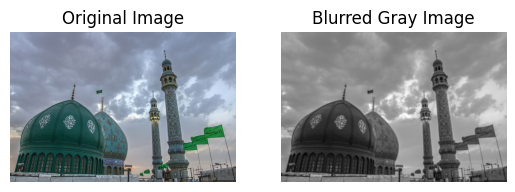

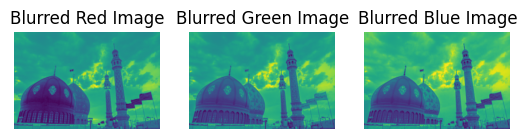

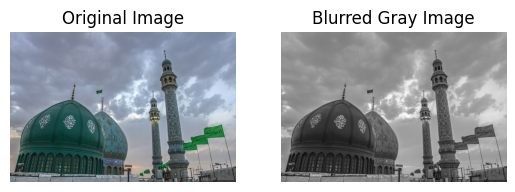

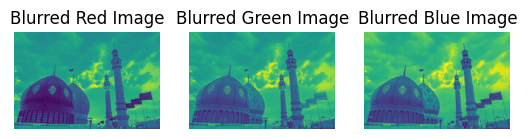

In [20]:
def convolve(img, kernel):
  h,w = np.shape(img)
  k = kernel.shape[0]
  pad = k // 2
  padded_img = np.pad(img,( (pad,pad),(pad,pad)),mode='reflect')

  H, W = img.shape
  out = np.zeros_like(img, dtype=np.float32)

  kernel_flipped = kernel[::-1, ::-1]

  for i in range(H):
      for j in range(W):
          region = padded_img[i:i+k, j:j+k]
          out[i,j] = np.sum(region * kernel_flipped)

  return out;

#TASK 2

def average_blur(img, ksize):
    kernel = np.ones((ksize, ksize)) / (ksize * ksize)
    return convolve(img, kernel)

gray= 0.299*img_np[:,:,0] + 0.587*img_np[:,:,1] + 0.114*img_np[:,:,2]

output_gray = average_blur(gray, 5)
output_gray = np.clip(output_gray, 0, 255).astype(np.uint8)

output_red = average_blur(img_np[:,:,0], 5)
output_red = np.clip(output_red,0,255).astype(np.uint8)

output_green = average_blur(img_np[:,:,1], 5)
output_green = np.clip(output_green,0,255).astype(np.uint8)

output_blue = average_blur(img_np[:,:,2],5)
output_blue = np.clip(output_blue,0,255).astype(np.uint8)

plt.subplot(1,2,1);plt.imshow(img_np);plt.title('Original Image');plt.axis('off')
plt.subplot(1,2,2);plt.imshow(output_gray , cmap = 'gray');plt.title('Blurred Gray Image');plt.axis('off')
plt.show()

plt.subplot(1,3,1);plt.imshow(output_red);plt.title('Blurred Red Image');plt.axis('off')
plt.subplot(1,3,2);plt.imshow(output_green);plt.title('Blurred Green Image');plt.axis('off')
plt.subplot(1,3,3);plt.imshow(output_blue);plt.title('Blurred Blue Image');plt.axis('off')
plt.show()

#TASK 3

def gaussian_kernel(ksize, sigma):

  kernel = np.zeros([ksize,ksize])
  for i in range(ksize):
    for j in range(ksize):
      kernel[i][j] = (1/2*np.pi*sigma**2)*np.exp(-(i**2 + j**2)/(2*sigma**2))
  return kernel/np.sum(kernel)

kernel_gauss = gaussian_kernel(5,1)

output_gray_gauss = convolve(gray, kernel_gauss)
output_gray_gauss = np.clip(output_gray_gauss, 0, 255).astype(np.uint8)

output_red_gauss = convolve(img_np[:,:,0], kernel_gauss)
output_red_gauss = np.clip(output_red_gauss,0,255).astype(np.uint8)

output_green_gauss = convolve(img_np[:,:,1], kernel_gauss)
output_green_gauss  = np.clip(output_green_gauss ,0,255).astype(np.uint8)

output_blue_gauss = convolve(img_np[:,:,2], kernel_gauss)
output_blue_gauss = np.clip(output_blue_gauss,0,255).astype(np.uint8)

plt.subplot(1,2,1);plt.imshow(img_np);plt.title('Original Image');plt.axis('off')
plt.subplot(1,2,2);plt.imshow(output_gray_gauss , cmap = 'gray');plt.title('Blurred Gray Image');plt.axis('off')
plt.show()

plt.subplot(1,3,1);plt.imshow(output_red_gauss);plt.title('Blurred Red Image');plt.axis('off')
plt.subplot(1,3,2);plt.imshow(output_green_gauss);plt.title('Blurred Green Image');plt.axis('off')
plt.subplot(1,3,3);plt.imshow(output_blue_gauss);plt.title('Blurred Blue Image');plt.axis('off')
plt.show()




### Part B

#### Task - Sobel Edge Detection (NumPy Only)
Implement Sobel X and Sobel Y filters manually using convolution. Apply on the grayscale image.

Compute:
1. Gx
2. Gy
3. Gradient magnitude

Normalize to 0–255 and save the edge map. Threshold if you wish to, if you do then make the thresholding part clear using code comments.

In [21]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

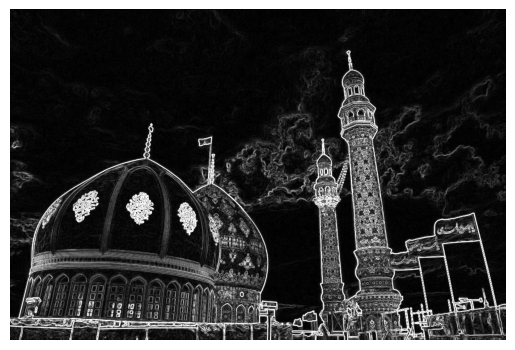

In [22]:
Gx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
Gy = np.transpose(Gx)

output_gray_Gx = convolve(output_gray_gauss,Gx)

output_gray_Gy = convolve(output_gray_gauss,Gy)

Gradient_magnitude = np.sqrt(output_gray_Gx**2 + output_gray_Gy**2)
Gradient_magnitude = np.clip(Gradient_magnitude,0,255).astype(np.uint8)

output_gray_GX = np.clip(output_gray_Gx,0,255).astype(np.uint8)
output_gray_Gy = np.clip(output_gray_Gy,0,255).astype(np.uint8)

plt.imshow(Gradient_magnitude, cmap='gray')
plt.axis('off')
plt.show()

### Part C

#### Task 1 — Laplacian Sharpening ( Only Numpy and Grayscale )
1. Use any 3×3 Laplacian kernel (4-connected or 8-connected).

2. Compute:
* <code>lap = convolve(img, laplacian_kernel)</code>
* <code>sharp = img - lap * alpha</code> where alpha ∈ [0.2, 1].

3. Now, put alpha = 1, if you had chosen a different value earlier. Get a new output. Then use the code in the lecture to do the same using cv2. Now, use python to verify if both numpy with alpha = 1 and cv2 give the exact same output ( Compare the matrices )

#### Task 2 - Unsharp Masking ( Only Numpy and Grayscale )
1. Apply Gaussian blur (from Part 1).
2. Subtract blurred image from original: <code> mask = img - blurred </code>
3. Add scaled mask back: <code>sharp = img + alpha * mask</code> , where you can choose any value of alpha.
4. See how negative values of alpha will give you a blurred image.  



In [23]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

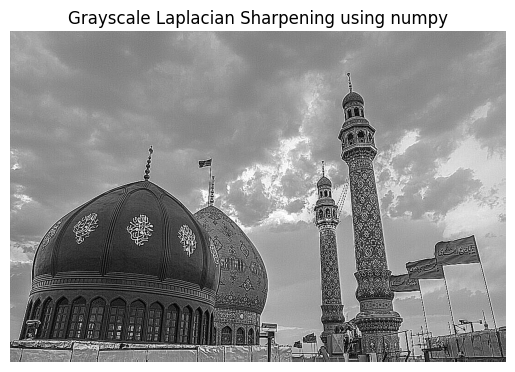

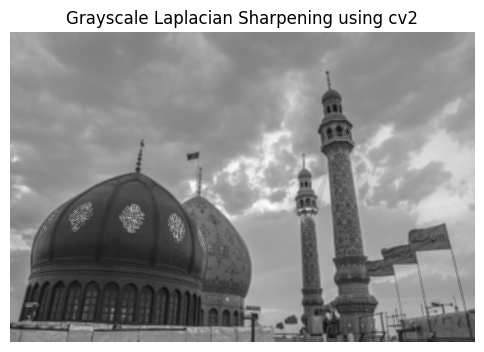

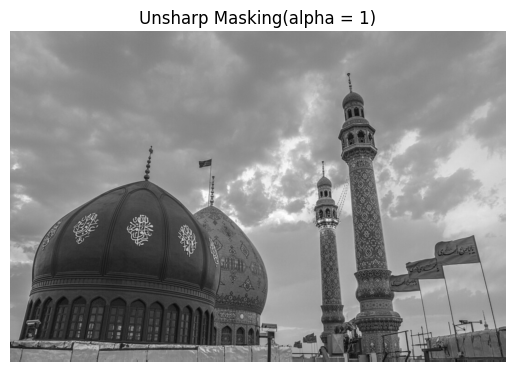

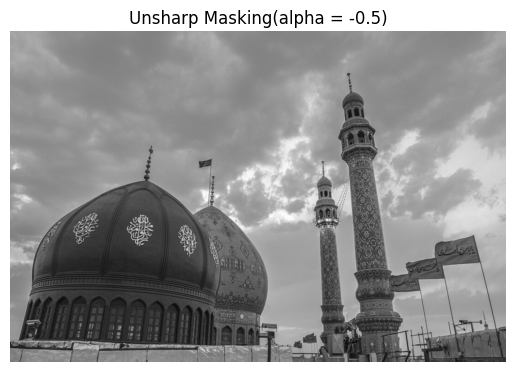

In [24]:
#TASK 1
import cv2

kernel_lap = np.array([[1,1,1],[1,-8,1],[1,1,1]],dtype = np.float32)
lap = convolve(output_gray_gauss, kernel_lap)
alpha = 1
sharp = output_gray_gauss - lap * alpha
plt.imshow(sharp, cmap='gray', vmin=0, vmax=255)
plt.title("Grayscale Laplacian Sharpening using numpy")
plt.axis("off")
plt.show()


lap_cv = cv2.Laplacian(output_gray_gauss, cv2.CV_32F)
sharp_cv = np.clip(output_gray_gauss + lap_cv, 0,255).astype(np.uint8)
plt.figure(figsize=(6,6))
plt.imshow(sharp_cv, cmap='gray')
plt.title("Grayscale Laplacian Sharpening using cv2")
plt.axis("off")
plt.show()

#TASK 2

mask  = output_gray_gauss - output_gray_gauss
sharp = output_gray_gauss + alpha * mask
plt.imshow(sharp, cmap = 'gray', vmin =0, vmax = 255);
plt.title("Unsharp Masking(alpha = 1)")
plt.axis('off')
plt.show()

sharp = output_gray_gauss + (-0.5) * mask
plt.imshow(sharp, cmap = 'gray', vmin =0, vmax = 255);
plt.title("Unsharp Masking(alpha = -0.5)")
plt.axis('off')
plt.show()

### Part D

#### Task - Frequency Analysis (LPF & HPF Verification)
Compute the magnitude spectrum of the original image, gaussian blurred image and the unsharp masking image. Now, play with the alpha value in sharpening and gaussian kernel and notice how the magntude spectrum changes.
Then, in code comments, explain your observations of dark and bright areas in the magnitude spectrum. In nutshell, verify how convolution is actually filtering frequencies depending on the kernel.

In [25]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

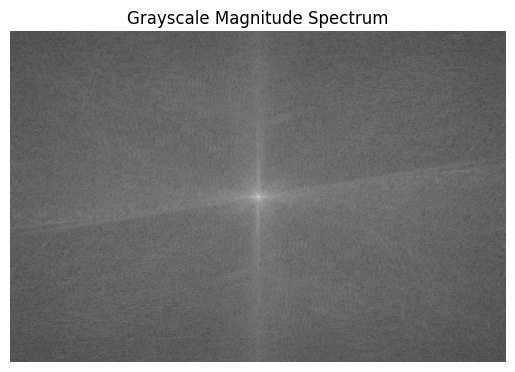

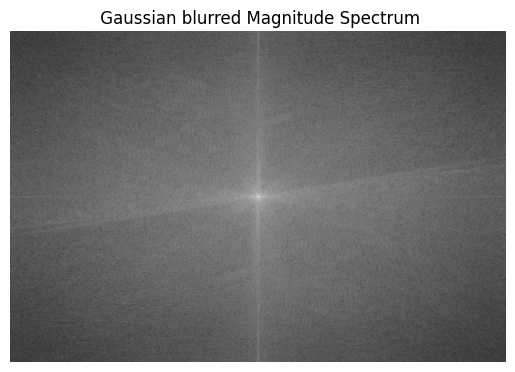

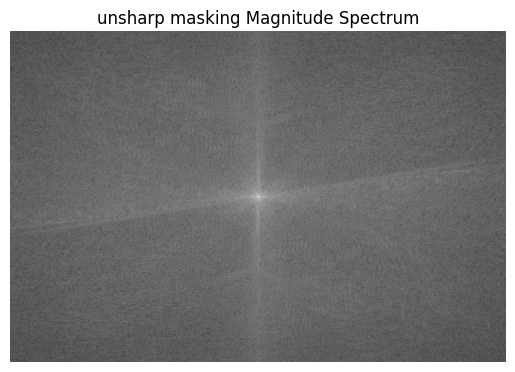

'\n\n1) Original Image:\n   Bright region at the center corresponds to low frequencies.Darker regions far from the center correspond to high frequencies.\n   thix is because it seems tht in most natural images,most of the energy lies in low frequencies and since i used fftshift the centre is bright\n\n2) Gaussian Blurred Image:\n  Central bright region becomes even brighter and more concentrated and outer regions (high frequencies) become darker.\n  This shows that Gaussian convolution acts as a Low pass filter, suppressing high-frequency components (edges and noise).\n  When I increased Gaussian kernel size or sigma, high-frequency areas becae more darker\n\n3) Unsharp Masking Image:\nBrightness increases in outer regions (high frequencies).this indicates amplification of edges and fine details. As i increase the alpha, these high-frequency components become brighter.\nThis confirms that unsharp masking boosts High-frequency content.\n\n\n'

In [26]:
# Convert images to float for FFT (already done correctly)
gray_float = gray.astype(np.float32)
output_gray_gauss_float = output_gray_gauss.astype(np.float32)
sharp_float = sharp.astype(np.float32)

# Compute FFTs
f_gray = np.fft.fft2(gray_float)
f_gray_shift = np.fft.fftshift(f_gray)

f_gauss = np.fft.fft2(output_gray_gauss_float)
f_gauss_shift = np.fft.fftshift(f_gauss)

f_sharp = np.fft.fft2(sharp_float)
f_sharp_shift = np.fft.fftshift(f_sharp)

# Compute magnitude spectrum (log scale for visibility)
gray_mag  = 20 * np.log(np.abs(f_gray_shift) + 1)
gauss_mag = 20 * np.log(np.abs(f_gauss_shift) + 1)
sharp_mag = 20 * np.log(np.abs(f_sharp_shift) + 1)

plt.imshow(gray_mag, cmap='gray')
plt.title("Grayscale Magnitude Spectrum")
plt.axis("off")
plt.show()

plt.imshow(gauss_mag, cmap='gray')
plt.title(" Gaussian blurred Magnitude Spectrum")
plt.axis("off")
plt.show()

plt.imshow(gray_mag, cmap='gray')
plt.title("unsharp masking Magnitude Spectrum")
plt.axis("off")
plt.show()

"""

1) Original Image:
   Bright region at the center corresponds to low frequencies.Darker regions far from the center correspond to high frequencies.
   thix is because it seems tht in most natural images,most of the energy lies in low frequencies and since i used fftshift the centre is bright

2) Gaussian Blurred Image:
  Central bright region becomes even brighter and more concentrated and outer regions (high frequencies) become darker.
  This shows that Gaussian convolution acts as a Low pass filter, suppressing high-frequency components (edges and noise).
  When I increased Gaussian kernel size or sigma, high-frequency areas becae more darker

3) Unsharp Masking Image:
Brightness increases in outer regions (high frequencies).this indicates amplification of edges and fine details. As i increase the alpha, these high-frequency components become brighter.
This confirms that unsharp masking boosts High-frequency content.


"""


### Part E

#### Task - Custom Colour Kernel (Detect Yellow Leaf Edges)

**Instructions :**
* At the start of the assignment .ipynb file, you will find a code cell in section 1, run it to see an image with a yellow leaf amongst green leaves.
* Design a 3×3 or 5×5 custom kernel applied separately to each channel that highlights the edges where any other colour transitions into a yellowish hue.

**Hints :**

* Yellow = (R high, G high, B low)

* Dark green = (G high, R low, B low)

**Steps:**

1. Analyze the RGB values of green & yellow regions.

2. Create a custom kernel that responds strongly to change from green to yellow in:
* Red matrices of RGB
* Green matrices of RGB
* Optionally R - G difference
* Think about the gradient in Red - Green. Is there a huge change the value of R-G when colour changes from Green to Yellow ? If yes, try to exploit it.

3. Combine the response maps.

4. Get a clean outline around the leaf.

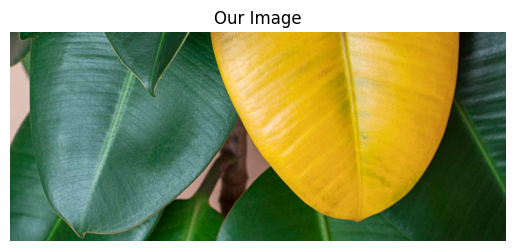

In [27]:
plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

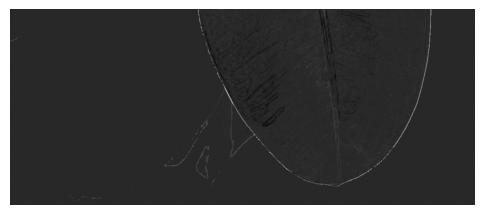

In [28]:
rgb = img_part5.astype(np.float32)
mask = np.zeros([rgb.shape[0],rgb.shape[1]])
mask = mask.astype(np.float32)
# I am creating a mask for yellow color based on HSV values

for i in range(3):
  rgb[:,:,i] = rgb[:,:,i]/255

for i in range(rgb.shape[0]):
  for j in range(rgb.shape[1]):
    c_max = np.max(rgb[i,j,:])
    c_min = np.min(rgb[i,j,:])
    delta = c_max - c_min

    #Hue calculation
    if delta == 0:
      hue =0
    elif c_max == rgb[i,j,0]:
      hue = 60*(((rgb[i,j,1]-rgb[i,j,2])/delta)%6)
    elif c_max == rgb[i,j,1]:
      hue =  60*( ((rgb[i,j,2]-rgb[i,j,0])/delta) + 2)
    else:
      hue = 60*( ((rgb[i,j,0]-rgb[i,j,1])/delta)+ 4)

    hue = hue % 360

    if c_max == 0:
      sat = 0
    else:
      sat = delta / c_max

    val = c_max

    if 18<=hue<=50 and sat>0.3 and val>0.3:
      mask[i,j] = 1

K = np.array([ [-1, -1, -1], [-1, 8, -1], [-1, -1, -1] ], dtype=np.float32)

R_edge = convolve(img_part5[:,:,0], K)
G_edge = convolve(img_part5[:,:,1], K)
B_edge = convolve(img_part5[:,:,2], K)

Rx = convolve(rgb[:, :, 0], Gx)
Ry = convolve(rgb[:, :, 0], Gy)

Gx_c = convolve(rgb[:, :, 1], Gx)
Gy_c = convolve(rgb[:, :, 1], Gy)

Bx = convolve(rgb[:, :, 2], Gx)
By = convolve(rgb[:, :, 2], Gy)

R_mag = np.sqrt(Rx**2 + Ry**2)
G_mag = np.sqrt(Gx_c**2 + Gy_c**2)
B_mag = np.sqrt(Bx**2 + By**2)

yellow_grad = R_mag + G_mag - B_mag

yellow_leaf_edge = yellow_grad * mask

plt.figure(figsize = (6,6))
plt.imshow(yellow_leaf_edge, cmap = 'gray')
plt.axis('off')
plt.show()

### Bonus - Part F

#### Task - Color Manipulation Using Lecture 2 Concepts

**NOTE :** only for this, you can use cv2 functions, no need of doing everything in Numpy. Although there are still more brownie parts for Numpy hardwork.

1. Convert the RGB image to HSV. Use your rgb_to_hsv() from Lecture 2 Assignment - free Numopy points ;)) .
2. Identify pixels belonging to the yellow leaf using an HSV mask. (maybe take help from Part E or design a new hue mask)
3. Now use your full brain and chnage the colour of the leaf to red.

Convert back to RGB.

Display the final result.

For reference, heres the image I expect as a result. And its not actually tough, easy 5 lines code.
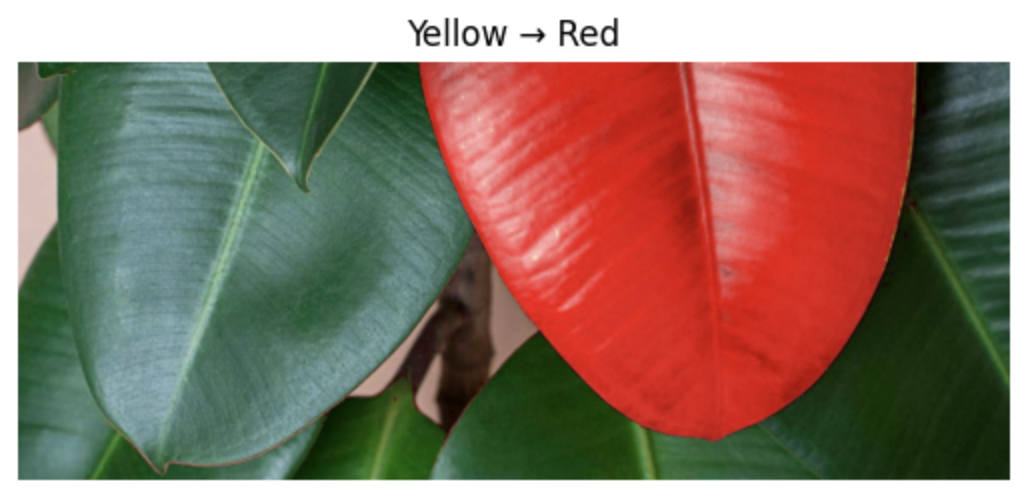

Also, we can change to a less brighter colour
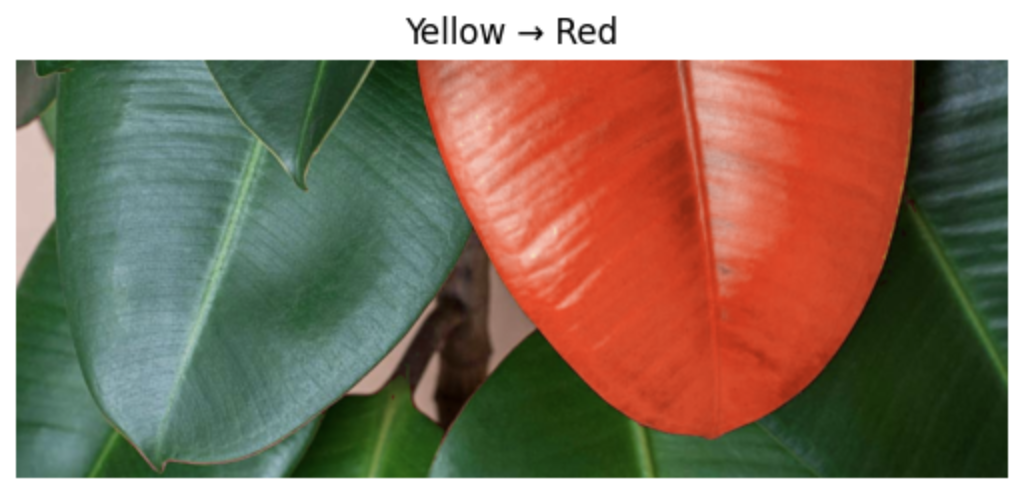

In [29]:
# Your BONUS PART codes follow here. You can create more cells under this. Write clean and commented code.